# Version 1.1
### Score :104

### 원본파일입니다. 수정 시 아래 수정사항을 입력해주세요~
<br>

- 임대상가 drop
- 단지코드별 보증금, 임대료 평균 수정
- test == 'C1267' drop 안함
- train(지하철), test(임대보증금,임대료) 결측치 채운 data 
- 지하철,버스 nan 값 '0'으로 채움
- 임대보증금, 임대료 '-' == 0 으로 채움

### 학습

- Minmax scaler
- r2 score


### 모델

- 1. KNN
- 2. CatBoost
- 3. Ridge
- 4. Lasso
- 5. ElasticNet
- 6. SVC
- 7. DecisionTree
- 8. RandomForest
- 9. AdaBoost
- 10. GradientBoost
- 11. LGBM
- 12. XGBoost
- 13. Voting (best model 13)

- *------------------------------------*
- 흐름상 미흡한 점이 있어 수정했습니다. 이 version으로 참고 부탁드립니다!
- 모두들 화이팅!! 열정열정열정!!!


### train.csv - 학습용 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수
﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿

### test.csv - 테스트 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수


### age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포

지역
10대미만(여자)
10대미만(남자)
20대(여자)
20대(남자)
30대(여자)
30대(남자)
40대(여자)
40대(남자)
50대(여자)
50대(남자)
60대(여자)
60대(남자)
70대(여자)
70대(남자)
80대(여자)
80대(남자)
90대(여자)
90대(남자)
100대(여자)
100대(남자)


### sample_submission.csv - 제출 양식

- code : 단지 코드
- num : 등록차량수


## 패키지

In [1]:
# pip install catboost

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
# from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from catboost import CatBoostRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# import pytagcloud
from IPython.display import Image

# 저장
import pickle

from tqdm import tqdm

## 데이터

In [2]:
train = pd.read_csv('data/train_null.csv', encoding='cp949')
test = pd.read_csv('data/test_null.csv', encoding='cp949')
submission = pd.read_csv('data/sample_submission.csv')
agegender_info= pd.read_csv('data/age_gender_info.csv')

In [3]:
agegender_info

지역  10대미만(여자)  10대미만(남자)   10대(여자)   10대(남자)   20대(여자)   20대(남자)  \
0      경상북도   0.030158   0.033195  0.056346  0.061360  0.060096  0.067859   
1      경상남도   0.027400   0.026902  0.053257  0.055568  0.064920  0.070618   
2     대전광역시   0.028197   0.029092  0.040490  0.042793  0.060834  0.064247   
3       경기도   0.038030   0.039507  0.052546  0.053990  0.058484  0.059894   
4      전라북도   0.028089   0.029065  0.059685  0.060080  0.066262  0.070322   
5       강원도   0.028888   0.030682  0.051287  0.052712  0.060374  0.063157   
6     광주광역시   0.031994   0.034566  0.049851  0.050254  0.065084  0.066875   
7      충청남도   0.031369   0.031711  0.059077  0.062422  0.067975  0.072622   
8     부산광역시   0.022003   0.022947  0.032681  0.035512  0.053796  0.057233   
9   제주특별자치도   0.034690   0.036695  0.060094  0.063080  0.069135  0.069667   
10    울산광역시   0.023991   0.025997  0.053874  0.056967  0.064240  0.074689   
11     충청북도   0.034678   0.035339  0.059808  0.061570  0.060824  0.064937   
12     전라남도   0.031930   0.034647  0.059154  0.063379  0.065517  0.070339   
13    대구광역시   0.023765   0.025626  0.034098  0.037897  0.062559  0.068251   
14    서울특별시   0.015323   0.015627  0.025210  0.026121  0.052712  0.056782   
15  세종특별자치시   0.037159   0.036601  0.053172  0.050047  0.079284  0.064833   

     30대(여자)   30대(남자)   40대(여자)  ...   60대(여자)   60대(남자)   70대(여자)   70대(남자)  \
0   0.053433  0.049572  0.083660  ...  0.082684  0.063889  0.047717  0.030172   
1   0.056414  0.057550  0.077092  ...  0.087201  0.069562  0.048357  0.033277   
2   0.068654  0.066848  0.074667  ...  0.088468  0.070261  0.051010  0.037143   
3   0.072331  0.068704  0.083208  ...  0.074237  0.058419  0.042422  0.032725   
4   0.052027  0.046596  0.077005  ...  0.076636  0.068042  0.051025  0.035748   
5   0.059821  0.054321  0.076201  ...  0.088423  0.070014  0.047732  0.032760   
6   0.066888  0.064416  0.080028  ...  0.075930  0.059586  0.048552  0.031754   
7   0.065095  0.067303  0.078860  ...  0.070278  0.057692  0.042296  0.028682   
8   0.047049  0.048866  0.061952  ...  0.109297  0.085294  0.078743  0.053388   
9   0.050808  0.048026  0.080548  ...  0.074248  0.055717  0.047944  0.033054   
10  0.052830  0.052412  0.078450  ...  0.096422  0.069088  0.052913  0.039413   
11  0.061069  0.056625  0.082318  ...  0.075390  0.062427  0.041814  0.027566   
12  0.057977  0.053471  0.078358  ...  0.071465  0.062352  0.042535  0.030704   
13  0.061825  0.071207  0.070090  ...  0.094511  0.073133  0.055914  0.036572   
14  0.047655  0.051877  0.054216  ...  0.119639  0.078939  0.097543  0.061050   
15  0.106121  0.104447  0.075155  ...  0.065279  0.051163  0.026056  0.026223   

     80대(여자)   80대(남자)   90대(여자)   90대(남자)  100대(여자)  100대(남자)  
0   0.029361  0.011211  0.005578  0.001553  0.000234  0.000014  
1   0.027361  0.011295  0.004910  0.001086  0.000179  0.000010  
2   0.032455  0.013751  0.006494  0.001740  0.000298  0.000066  
3   0.025136  0.012354  0.005390  0.001707  0.000290  0.000067  
4   0.035049  0.012641  0.007223  0.001898  0.000158  0.000013  
5   0.033515  0.013027  0.007628  0.001677  0.000319  0.000017  
6   0.029749  0.010341  0.006343  0.000895  0.000353  0.000013  
7   0.024514  0.010900  0.005429  0.001549  0.000219  0.000123  
8   0.047908  0.020228  0.008043  0.002240  0.000268  0.000028  
9   0.026836  0.011332  0.006832  0.000982  0.000368  0.000082  
10  0.026540  0.011912  0.004221  0.001087  0.000084  0.000000  
11  0.027762  0.011212  0.005386  0.001310  0.000257  0.000037  
12  0.027340  0.009312  0.005965  0.001458  0.000149  0.000464  
13  0.031887  0.012556  0.005364  0.001259  0.000219  0.000000  
14  0.047853  0.023463  0.011344  0.003326  0.000532  0.000152  
15  0.013893  0.007086  0.003459  0.001004  0.000279  0.000112  

[16 rows x 23 columns]

- age_gender_info.csv의 분포는 train, test 데이터에만 해당하는 인구 분포입니다.
- age_gender_info.csv는 해당 단지들에 살고있는 모든 인구의 분포입니다.

In [4]:
train.shape, test.shape

((2952, 16), (1022, 15))

In [5]:
train.head()

Unnamed: 0   단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형  \
0           0  C2483   900    아파트  경상북도  국민임대  39.72       134   38    A   
1           1  C2483   900    아파트  경상북도  국민임대  39.72        15   38    A   
2           2  C2483   900    아파트  경상북도  국민임대  51.93       385   38    A   
3           3  C2483   900    아파트  경상북도  국민임대  51.93        15   38    A   
4           4  C2483   900    아파트  경상북도  국민임대  51.93        41   38    A   

        임대보증금     임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  \
0  15667000.0  103680                           0.0                 3.0   
1  15667000.0  103680                           0.0                 3.0   
2  27304000.0  184330                           0.0                 3.0   
3  27304000.0  184330                           0.0                 3.0   
4  27304000.0  184330                           0.0                 3.0   

   단지내주차면수  등록차량수  
0     1425   1015  
1     1425   1015  
2     1425   1015  
3     1425   1015  
4     1425   1015

In [6]:
train.drop(['Unnamed: 0'], axis=1, inplace= True)

In [7]:
test.drop(['Unnamed: 0'], axis=1, inplace= True)

In [8]:
train

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형       임대보증금  \
0     C2483   900    아파트  경상북도  국민임대  39.72       134   38    A  15667000.0   
1     C2483   900    아파트  경상북도  국민임대  39.72        15   38    A  15667000.0   
2     C2483   900    아파트  경상북도  국민임대  51.93       385   38    A  27304000.0   
3     C2483   900    아파트  경상북도  국민임대  51.93        15   38    A  27304000.0   
4     C2483   900    아파트  경상북도  국민임대  51.93        41   38    A  27304000.0   
...     ...   ...    ...   ...   ...    ...       ...  ...  ...         ...   
2947  C2532   239    아파트   강원도  국민임대  49.20        19    7    A  11346000.0   
2948  C2532   239    아파트   강원도  국민임대  51.08        34    7    A  14005000.0   
2949  C2532   239    아파트   강원도  국민임대  51.73        34    7    A  14005000.0   
2950  C2532   239    아파트   강원도  국민임대  51.96       114    7    A  14005000.0   
2951  C2532   239    아파트   강원도  국민임대  54.95        19    7    A  14830000.0   

         임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  등록차량수  
0     103680                           0.0                 3.0     1425   1015  
1     103680                           0.0                 3.0     1425   1015  
2     184330                           0.0                 3.0     1425   1015  
3     184330                           0.0                 3.0     1425   1015  
4     184330                           0.0                 3.0     1425   1015  
...      ...                           ...                 ...      ...    ...  
2947  116090                           0.0                 1.0      166    146  
2948  142310                           0.0                 1.0      166    146  
2949  142310                           0.0                 1.0      166    146  
2950  142310                           0.0                 1.0      166    146  
2951  151030                           0.0                 1.0      166    146  

[2952 rows x 15 columns]

In [9]:
train['자격유형'].value_counts()

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

- 공가수 : 비어있는 집

## 결측치 확인

In [10]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    119
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [11]:
## 지하철 버스 공란 변경하기 
train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0,inplace=True)
train['도보 10분거리 내 버스정류장 수'].fillna(0,inplace=True)

In [12]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [13]:
## 지하철 버스 공란 변경하기 
test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0,inplace=True)
test['도보 10분거리 내 버스정류장 수'].fillna(0,inplace=True)

In [14]:
agegender_info.isna().sum()

지역           0
10대미만(여자)    0
10대미만(남자)    0
10대(여자)      0
10대(남자)      0
20대(여자)      0
20대(남자)      0
30대(여자)      0
30대(남자)      0
40대(여자)      0
40대(남자)      0
50대(여자)      0
50대(남자)      0
60대(여자)      0
60대(남자)      0
70대(여자)      0
70대(남자)      0
80대(여자)      0
80대(남자)      0
90대(여자)      0
90대(남자)      0
100대(여자)     0
100대(남자)     0
dtype: int64

In [15]:
train.shape, train.drop_duplicates().shape # 중복 존재

((2952, 15), (2632, 15))

In [16]:
test.shape, test.drop_duplicates().shape # 중복 존재

((1022, 14), (949, 14))

In [17]:
test.loc[test['임대건물구분']=='상가']

단지코드  총세대수 임대건물구분     지역  공급유형    전용면적  전용면적별세대수  공가수 자격유형 임대보증금  임대료  \
80   C1006  1505     상가  대전광역시  임대상가   38.00         1   27    D   NaN  NaN   
81   C1006  1505     상가  대전광역시  임대상가   38.00         1   27    D   NaN  NaN   
82   C1006  1505     상가  대전광역시  임대상가   37.26         1   27    D   NaN  NaN   
83   C1006  1505     상가  대전광역시  임대상가   37.41         1   27    D   NaN  NaN   
84   C1006  1505     상가  대전광역시  임대상가   37.41         1   27    D   NaN  NaN   
..     ...   ...    ...    ...   ...     ...       ...  ...  ...   ...  ...   
328  C1729   627     상가    강원도  임대상가   32.46         1    0    D   NaN  NaN   
329  C1729   627     상가    강원도  임대상가   34.86         1    0    D   NaN  NaN   
330  C1729   627     상가    강원도  임대상가   35.76         1    0    D   NaN  NaN   
331  C1729   627     상가    강원도  임대상가   50.08         1    0    D   NaN  NaN   
332  C1729   627     상가    강원도  임대상가  240.22         1    0    D   NaN  NaN   

     도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
80                            2.0                   5      428  
81                            2.0                   5      428  
82                            2.0                   5      428  
83                            2.0                   5      428  
84                            2.0                   5      428  
..                            ...                 ...      ...  
328                           0.0                   5      131  
329                           0.0                   5      131  
330                           0.0                   5      131  
331                           0.0                   5      131  
332                           0.0                   5      131  

[177 rows x 14 columns]

In [18]:
test.loc[test['자격유형']=='D']

단지코드  총세대수 임대건물구분     지역  공급유형    전용면적  전용면적별세대수  공가수 자격유형 임대보증금  임대료  \
76   C1006  1505    아파트  대전광역시  영구임대   26.37        10   27    D   NaN  NaN   
77   C1006  1505    아파트  대전광역시  영구임대   26.37        10   27    D   NaN  NaN   
79   C1006  1505    아파트  대전광역시  영구임대   52.74         6   27    D   NaN  NaN   
80   C1006  1505     상가  대전광역시  임대상가   38.00         1   27    D   NaN  NaN   
81   C1006  1505     상가  대전광역시  임대상가   38.00         1   27    D   NaN  NaN   
..     ...   ...    ...    ...   ...     ...       ...  ...  ...   ...  ...   
328  C1729   627     상가    강원도  임대상가   32.46         1    0    D   NaN  NaN   
329  C1729   627     상가    강원도  임대상가   34.86         1    0    D   NaN  NaN   
330  C1729   627     상가    강원도  임대상가   35.76         1    0    D   NaN  NaN   
331  C1729   627     상가    강원도  임대상가   50.08         1    0    D   NaN  NaN   
332  C1729   627     상가    강원도  임대상가  240.22         1    0    D   NaN  NaN   

     도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
76                            2.0                   5      428  
77                            2.0                   5      428  
79                            2.0                   5      428  
80                            2.0                   5      428  
81                            2.0                   5      428  
..                            ...                 ...      ...  
328                           0.0                   5      131  
329                           0.0                   5      131  
330                           0.0                   5      131  
331                           0.0                   5      131  
332                           0.0                   5      131  

[180 rows x 14 columns]

##### 신분 묶기

In [19]:
train.loc[train['자격유형']=='J']

단지코드  총세대수 임대건물구분       지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형  \
2534  C1210  1088    아파트    대구광역시  행복주택  21.56        85   39    J   
2535  C1210  1088    아파트    대구광역시  행복주택  21.56        57   39    J   
2536  C1210  1088    아파트    대구광역시  행복주택  21.56       498   39    J   
2537  C1210  1088    아파트    대구광역시  행복주택  26.62        76   39    J   
2538  C1210  1088    아파트    대구광역시  행복주택  36.74       372   39    J   
...     ...   ...    ...      ...   ...    ...       ...  ...  ...   
2932  C2586    90    아파트  제주특별자치도  행복주택  16.64        12    7    J   
2933  C2586    90    아파트  제주특별자치도  행복주택  26.52        14    7    J   
2934  C2586    90    아파트  제주특별자치도  행복주택  26.52        10    7    J   
2935  C2586    90    아파트  제주특별자치도  행복주택  26.68        18    7    J   
2936  C2586    90    아파트  제주특별자치도  행복주택  36.72        36    7    J   

           임대보증금     임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  \
2534  19880000.0  107680                           0.0                 4.0   
2535  19880000.0  107680                           0.0                 4.0   
2536  20680000.0  112010                           0.0                 4.0   
2537  24800000.0  134330                           0.0                 4.0   
2538  33920000.0  183730                           0.0                 4.0   
...          ...     ...                           ...                 ...   
2932  16800000.0   71400                           0.0                 3.0   
2933  26000000.0  110500                           0.0                 3.0   
2934  26000000.0  110500                           0.0                 3.0   
2935  26000000.0  110500                           0.0                 3.0   
2936  36000000.0  153000                           0.0                 3.0   

      단지내주차면수  등록차량수  
2534      773    586  
2535      773    586  
2536      773    586  
2537      773    586  
2538      773    586  
...       ...    ...  
2932       66     57  
2933       66     57  
2934       66     57  
2935       66     57  
2936       66     57  

[114 rows x 15 columns]

In [115]:
train.drop([train.단지코드 == 'C2085'])

KeyError: '[(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False)] not found in axis'

### 총세대수

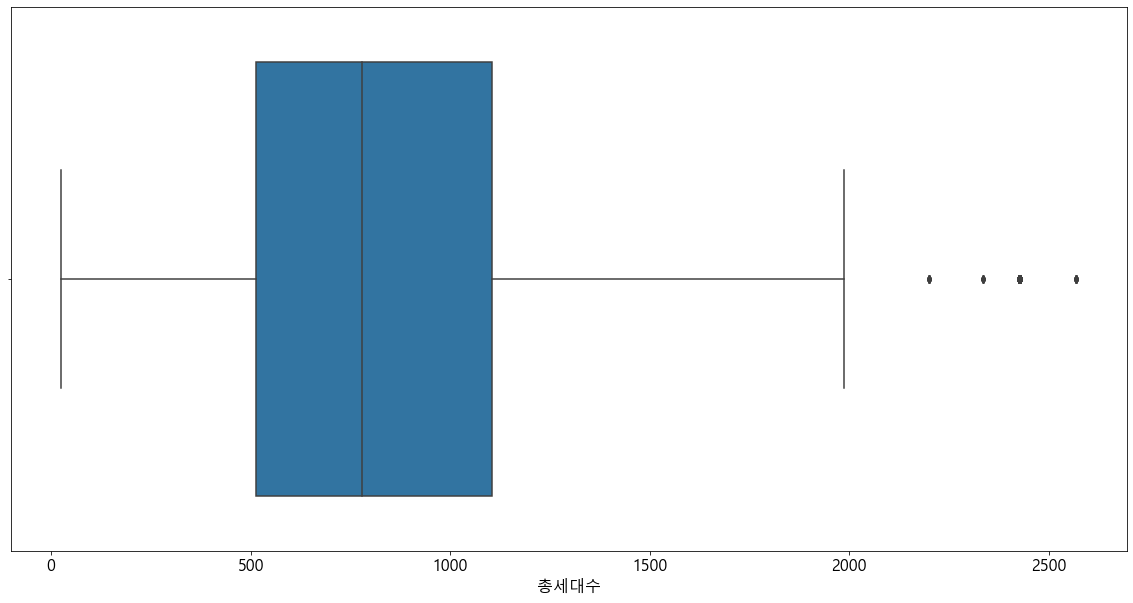

In [20]:
sns.boxplot(train['총세대수'])

In [21]:
train['총세대수'].describe()

count    2952.000000
mean      886.661247
std       513.540168
min        26.000000
25%       513.500000
50%       779.000000
75%      1106.000000
max      2568.000000
Name: 총세대수, dtype: float64

In [22]:
train.loc[train['총세대수']>=2500]

단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형       임대보증금  \
2511  C1363  2568    아파트  경기도  국민임대  26.85       150   11    H  17021000.0   
2512  C1363  2568    아파트  경기도  국민임대  26.85        88   11    H  17021000.0   
2513  C1363  2568    아파트  경기도  국민임대  29.92        90   11    H  19451000.0   
2514  C1363  2568    아파트  경기도  국민임대  29.92        72   11    H  19451000.0   
2515  C1363  2568    아파트  경기도  국민임대  29.92       340   11    H  19451000.0   
2516  C1363  2568    아파트  경기도  국민임대  36.96       375   11    H  23892000.0   
2517  C1363  2568    아파트  경기도  국민임대  36.96       144   11    H  23892000.0   
2518  C1363  2568    아파트  경기도  국민임대  36.96        45   11    H  23892000.0   
2519  C1363  2568    아파트  경기도  국민임대  46.49        58   11    H  51763000.0   
2520  C1363  2568    아파트  경기도  국민임대  46.49       141   11    H  51763000.0   
2521  C1363  2568    아파트  경기도  국민임대  46.77       515   11    H  51763000.0   
2522  C1363  2568    아파트  경기도  영구임대  21.95        86   11    I  10718000.0   
2523  C1363  2568    아파트  경기도  영구임대  26.85       300   11    I  12881000.0   
2524  C1363  2568    아파트  경기도  영구임대  26.85       164   11    I  12881000.0   

         임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  등록차량수  
2511  158060                           0.0                 6.0     1798   2550  
2512  158060                           0.0                 6.0     1798   2550  
2513  175260                           0.0                 6.0     1798   2550  
2514  175260                           0.0                 6.0     1798   2550  
2515  175260                           0.0                 6.0     1798   2550  
2516  224730                           0.0                 6.0     1798   2550  
2517  224730                           0.0                 6.0     1798   2550  
2518  224730                           0.0                 6.0     1798   2550  
2519  287090                           0.0                 6.0     1798   2550  
2520  287090                           0.0                 6.0     1798   2550  
2521  287090                           0.0                 6.0     1798   2550  
2522   71930                           0.0                 6.0     1798   2550  
2523   87840                           0.0                 6.0     1798   2550  
2524   87840                           0.0                 6.0     1798   2550

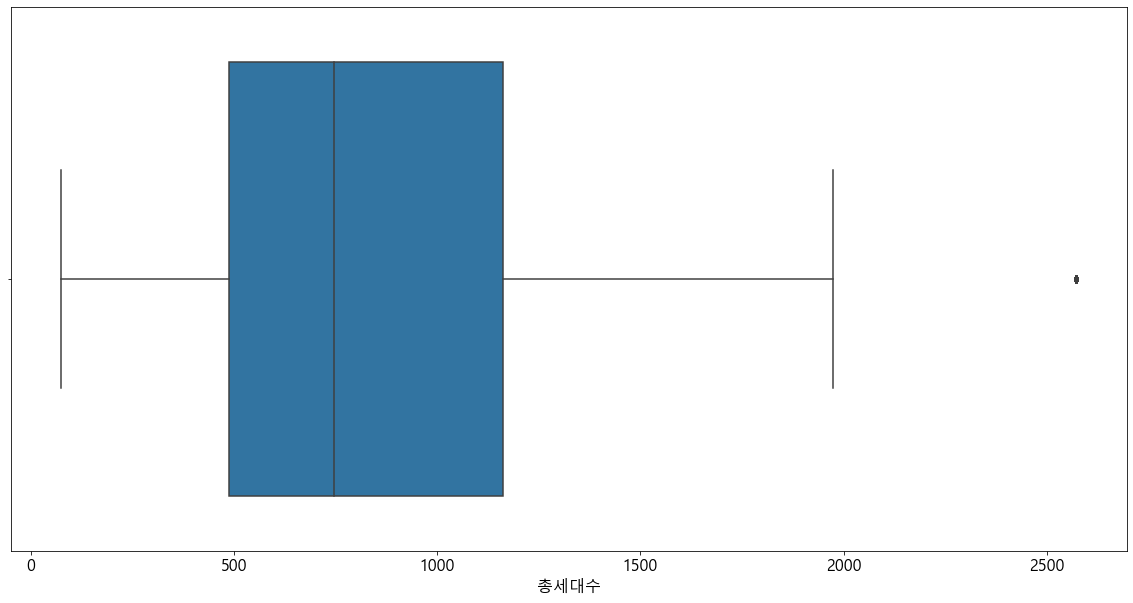

In [23]:
sns.boxplot(test['총세대수'])

In [24]:
test['총세대수'].describe()

count    1022.000000
mean      862.080235
std       536.340894
min        75.000000
25%       488.000000
50%       745.000000
75%      1161.000000
max      2572.000000
Name: 총세대수, dtype: float64

In [25]:
a=test.loc[test['총세대수']>=2500]

In [26]:
a['총세대수'].count()

46

In [27]:
test.loc[test['총세대수']>=2500]

단지코드  총세대수 임대건물구분     지역  공급유형    전용면적  전용면적별세대수  공가수 자격유형    임대보증금  \
113  C2676  2572    아파트  부산광역시  영구임대   26.37       294   25    C  5787000   
114  C2676  2572    아파트  부산광역시  영구임대   26.37      1341   25    C  5787000   
115  C2676  2572    아파트  부산광역시  영구임대   31.32       894   25    C  6873000   
116  C2676  2572     상가  부산광역시  임대상가   15.00         1   25    D      NaN   
117  C2676  2572     상가  부산광역시  임대상가   15.00         1   25    D      NaN   
118  C2676  2572     상가  부산광역시  임대상가   38.00         1   25    D      NaN   
119  C2676  2572     상가  부산광역시  임대상가   38.00         1   25    D      NaN   
120  C2676  2572     상가  부산광역시  임대상가   16.57         1   25    D      NaN   
121  C2676  2572     상가  부산광역시  임대상가   18.38         1   25    D      NaN   
122  C2676  2572     상가  부산광역시  임대상가   18.38         1   25    D      NaN   
123  C2676  2572     상가  부산광역시  임대상가   20.90         1   25    D      NaN   
124  C2676  2572     상가  부산광역시  임대상가   20.90         1   25    D      NaN   
125  C2676  2572     상가  부산광역시  임대상가   20.90         1   25    D      NaN   
126  C2676  2572     상가  부산광역시  임대상가   20.90         1   25    D      NaN   
127  C2676  2572     상가  부산광역시  임대상가   21.94         1   25    D      NaN   
128  C2676  2572     상가  부산광역시  임대상가   23.35         1   25    D      NaN   
129  C2676  2572     상가  부산광역시  임대상가   26.25         1   25    D      NaN   
130  C2676  2572     상가  부산광역시  임대상가   26.25         1   25    D      NaN   
131  C2676  2572     상가  부산광역시  임대상가   28.38         1   25    D      NaN   
132  C2676  2572     상가  부산광역시  임대상가   28.50         1   25    D      NaN   
133  C2676  2572     상가  부산광역시  임대상가   33.15         1   25    D      NaN   
134  C2676  2572     상가  부산광역시  임대상가   33.31         1   25    D      NaN   
135  C2676  2572     상가  부산광역시  임대상가   33.39         1   25    D      NaN   
136  C2676  2572     상가  부산광역시  임대상가   33.51         1   25    D      NaN   
137  C2676  2572     상가  부산광역시  임대상가   33.51         1   25    D      NaN   
138  C2676  2572     상가  부산광역시  임대상가   33.51         1   25    D      NaN   
139  C2676  2572     상가  부산광역시  임대상가   37.26         1   25    D      NaN   
140  C2676  2572     상가  부산광역시  임대상가   37.41         1   25    D      NaN   
141  C2676  2572     상가  부산광역시  임대상가   37.41         1   25    D      NaN   
142  C2676  2572     상가  부산광역시  임대상가   37.41         1   25    D      NaN   
143  C2676  2572     상가  부산광역시  임대상가   37.49         1   25    D      NaN   
144  C2676  2572     상가  부산광역시  임대상가   37.95         1   25    D      NaN   
145  C2676  2572     상가  부산광역시  임대상가   37.95         1   25    D      NaN   
146  C2676  2572     상가  부산광역시  임대상가   38.04         1   25    D      NaN   
147  C2676  2572     상가  부산광역시  임대상가   39.33         1   25    D      NaN   
148  C2676  2572     상가  부산광역시  임대상가   39.33         1   25    D      NaN   
149  C2676  2572     상가  부산광역시  임대상가   39.33         1   25    D      NaN   
150  C2676  2572     상가  부산광역시  임대상가   40.39         1   25    D      NaN   
151  C2676  2572     상가  부산광역시  임대상가   54.51         1   25    D      NaN   
152  C2676  2572     상가  부산광역시  임대상가   54.51         1   25    D      NaN   
153  C2676  2572     상가  부산광역시  임대상가   54.51         1   25    D      NaN   
154  C2676  2572     상가  부산광역시  임대상가   54.60         1   25    D      NaN   
155  C2676  2572     상가  부산광역시  임대상가   54.61         1   25    D      NaN   
156  C2676  2572     상가  부산광역시  임대상가   75.98         1   25    D      NaN   
157  C2676  2572     상가  부산광역시  임대상가  404.65         1   25    D      NaN   
158  C2676  2572     상가  부산광역시  임대상가  583.40         1   25    D      NaN   

       임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  
113  79980                           0.0                   2      418  
114  79980                           0.0                   2      418  
115  94990                           0.0                   2      418  
116    NaN                           0.0                   2      418  
117    NaN                

## apps 전처리를 위한 train, test 결합

In [28]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([train,test])
apps.shape

(3974, 15)

In [29]:
apps

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 자격유형       임대보증금  \
0     C2483   900    아파트  경상북도  국민임대  39.72       134   38    A  1.5667e+07   
1     C2483   900    아파트  경상북도  국민임대  39.72        15   38    A  1.5667e+07   
2     C2483   900    아파트  경상북도  국민임대  51.93       385   38    A  2.7304e+07   
3     C2483   900    아파트  경상북도  국민임대  51.93        15   38    A  2.7304e+07   
4     C2483   900    아파트  경상북도  국민임대  51.93        41   38    A  2.7304e+07   
...     ...   ...    ...   ...   ...    ...       ...  ...  ...         ...   
1017  C1267   675    아파트  경상남도  행복주택  36.77       126   38    L           -   
1018  C2189   382    아파트  전라북도  국민임대  29.19        96   45    H     6872000   
1019  C2189   382    아파트  전라북도  국민임대  29.19        20   45    H     6872000   
1020  C2189   382    아파트  전라북도  국민임대  39.45       202   45    H    13410000   
1021  C2189   382    아파트  전라북도  국민임대  46.23        60   45    H    18689000   

         임대료  도보 10분거리 내 지하철역 수(환승노선 수 반영)  도보 10분거리 내 버스정류장 수  단지내주차면수  \
0     103680                           0.0                 3.0     1425   
1     103680                           0.0                 3.0     1425   
2     184330                           0.0                 3.0     1425   
3     184330                           0.0                 3.0     1425   
4     184330                           0.0                 3.0     1425   
...      ...                           ...                 ...      ...   
1017       -                           0.0                 1.0      467   
1018  106400                           0.0                 2.0      300   
1019  106400                           0.0                 2.0      300   
1020  144600                           0.0                 2.0      300   
1021  166500                           0.0                 2.0      300   

       등록차량수  
0     1015.0  
1     1015.0  
2     1015.0  
3     1015.0  
4     1015.0  
...      ...  
1017     NaN  
1018     NaN  
1019     NaN  
1020     NaN  
1021     NaN  

[3974 rows x 15 columns]

## 결측치 확인

In [30]:
apps.isna().sum()

단지코드                               0
총세대수                               0
임대건물구분                             0
지역                                 0
공급유형                               0
전용면적                               0
전용면적별세대수                           0
공가수                                0
자격유형                               2
임대보증금                            749
임대료                              749
도보 10분거리 내 지하철역 수(환승노선 수 반영)       0
도보 10분거리 내 버스정류장 수                 0
단지내주차면수                            0
등록차량수                           1022
dtype: int64

In [31]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 1021
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          3974 non-null   object 
 1   총세대수                          3974 non-null   int64  
 2   임대건물구분                        3974 non-null   object 
 3   지역                            3974 non-null   object 
 4   공급유형                          3974 non-null   object 
 5   전용면적                          3974 non-null   float64
 6   전용면적별세대수                      3974 non-null   int64  
 7   공가수                           3974 non-null   int64  
 8   자격유형                          3972 non-null   object 
 9   임대보증금                         3225 non-null   object 
 10  임대료                           3225 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  3974 non-null   float64
 12  도보 10분거리 내 버스정류장 수            3974 non-null   float64
 13  단지내

In [32]:
apps['지역'].value_counts()

경기도        880
경상남도       454
부산광역시      416
대전광역시      322
강원도        293
충청북도       214
충청남도       199
전라남도       188
광주광역시      187
경상북도       177
전라북도       150
대구광역시      138
제주특별자치도    117
울산광역시      109
세종특별자치시     66
서울특별시       64
Name: 지역, dtype: int64

In [33]:
apps['임대건물구분'].value_counts()

아파트    3235
상가      739
Name: 임대건물구분, dtype: int64

In [34]:
apps['공급유형'].value_counts()

국민임대         2380
임대상가          739
행복주택          337
공공임대(10년)     240
영구임대          197
공공임대(50년)      44
공공임대(분납)       18
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [35]:
apps['단지내주차면수'].value_counts()

166    71
270    60
756    47
131    46
418    46
       ..
552     2
380     2
136     1
420     1
30      1
Name: 단지내주차면수, Length: 453, dtype: int64

In [36]:
apps['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     1032
3.0      942
4.0      627
1.0      387
5.0      276
6.0      241
8.0      132
7.0      113
10.0      84
12.0      27
15.0      21
16.0      19
20.0      15
11.0      14
50.0       9
14.0       8
18.0       7
19.0       7
0.0        6
17.0       4
13.0       3
Name: 도보 10분거리 내 버스정류장 수, dtype: int64

In [37]:
apps['자격유형'].value_counts()

A    2373
D     749
H     247
J     198
C     129
I      56
K      49
E      47
L      45
N      40
B      21
G      10
M       4
F       3
O       1
Name: 자격유형, dtype: int64

## 컬럼명 변경

지하쳘역 수와 버스 정류장 수의 컬럼명을 지하철, 버스로 변경하였습니다.

In [38]:
apps.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [39]:
apps.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수'
]

In [40]:
apps['단지코드'].describe()

count      3974
unique      573
top       C1439
freq         48
Name: 단지코드, dtype: object

### 지하철 버스 Nan값 0처리

In [41]:
cols = ['지하철', '버스']
apps[cols] = apps[cols].fillna(0)

### 임대료의 '-'값 Nan값으로 처리

In [42]:
apps.loc[apps['임대보증금']=='-']

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 신분 임대보증금 임대료  지하철  \
1014  C1267   675    아파트  경상남도  행복주택  16.94        50   38  L     -   -  0.0   
1015  C1267   675    아파트  경상남도  행복주택  26.85        66   38  L     -   -  0.0   
1016  C1267   675    아파트  경상남도  행복주택  26.85         8   38  L     -   -  0.0   
1017  C1267   675    아파트  경상남도  행복주택  36.77       126   38  L     -   -  0.0   

       버스  단지내주차면수  등록차량수  
1014  1.0      467    NaN  
1015  1.0      467    NaN  
1016  1.0      467    NaN  
1017  1.0      467    NaN

In [43]:
apps[apps['단지코드']=='C1267']

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 신분     임대보증금  \
1007  C1267   675    아파트  경상남도  국민임대  24.87        28   38  H   6882000   
1008  C1267   675    아파트  경상남도  국민임대  24.99        90   38  H   6882000   
1009  C1267   675    아파트  경상남도  국민임대  24.99        12   38  H   6882000   
1010  C1267   675    아파트  경상남도  국민임대  46.72        68   38  H  24420000   
1011  C1267   675    아파트  경상남도  국민임대  46.72       112   38  H  24420000   
1012  C1267   675    아파트  경상남도  영구임대  22.86        96   38  C  10876000   
1013  C1267   675    아파트  경상남도  영구임대  22.86        14   38  C  10876000   
1014  C1267   675    아파트  경상남도  행복주택  16.94        50   38  L         -   
1015  C1267   675    아파트  경상남도  행복주택  26.85        66   38  L         -   
1016  C1267   675    아파트  경상남도  행복주택  26.85         8   38  L         -   
1017  C1267   675    아파트  경상남도  행복주택  36.77       126   38  L         -   

         임대료  지하철   버스  단지내주차면수  등록차량수  
1007  104370  0.0  1.0      467    NaN  
1008  104370  0.0  1.0      467    NaN  
1009  104370  0.0  1.0      467    NaN  
1010  219230  0.0  1.0      467    NaN  
1011  219230  0.0  1.0      467    NaN  
1012   89230  0.0  1.0      467    NaN  
1013   89230  0.0  1.0      467    NaN  
1014       -  0.0  1.0      467    NaN  
1015       -  0.0  1.0      467    NaN  
1016       -  0.0  1.0      467    NaN  
1017       -  0.0  1.0      467    NaN

In [44]:
apps.loc[apps['임대보증금']=='-'].index

Int64Index([1014, 1015, 1016, 1017], dtype='int64')

In [45]:
apps['임대보증금'] = apps['임대보증금'].replace('-', 0)

In [46]:
# index로 삭제하면 안된다.
apps[apps['임대보증금']=='-']

Empty DataFrame
Columns: [단지코드, 총세대수, 임대건물구분, 지역, 공급유형, 전용면적, 전용면적별세대수, 공가수, 신분, 임대보증금, 임대료, 지하철, 버스, 단지내주차면수, 등록차량수]
Index: []

In [47]:
apps.reset_index(drop = True, inplace = True)

In [48]:
# apps = apps.drop(apps.loc[apps['임대보증금']=='-'].index)

In [49]:
# train C1350단지의 자격유형 A 반영을 위한 자격유형 D(이상치?) 처리
apps[(apps['단지코드']=='C1350') & (apps['신분']=='D')].index

Int64Index([2331, 2332, 2333, 2334, 2335, 2336, 2337], dtype='int64')

In [50]:
# train C1350단지의 자격유형 A 반영을 위한 자격유형 D(이상치?) 처리
apps.drop(apps[(apps['단지코드']=='C1350') & (apps['신분']=='D')].index, inplace=True)

In [51]:
apps.loc[apps['임대료']=='-']

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수  공가수 신분        임대보증금  \
2043  C1397   370    아파트  서울특별시  장기전세  23.32        51    9  A   8.7444e+07   
2044  C1397   370    아파트  서울특별시  장기전세  46.79         4    9  A  1.74888e+08   
2045  C1397   370    아파트  서울특별시  장기전세  46.91        69    9  A  1.74888e+08   
2046  C1397   370    아파트  서울특별시  장기전세  51.96        24    9  A  1.94562e+08   
2047  C1397   370    아파트  서울특별시  장기전세  51.99        80    9  A  1.94562e+08   
2048  C1397   370    아파트  서울특별시  장기전세  59.93       142    9  A  2.16423e+08   
2100  C1039   790    아파트  서울특별시  장기전세  51.32       126   13  A  1.87694e+08   
2101  C1039   790    아파트  서울특별시  장기전세  59.88        49   13  A  2.13863e+08   
2102  C1039   790    아파트  서울특별시  장기전세  59.94        75   13  A  2.13863e+08   
3966  C1267   675    아파트   경상남도  행복주택  16.94        50   38  L            0   
3967  C1267   675    아파트   경상남도  행복주택  26.85        66   38  L            0   
3968  C1267   675    아파트   경상남도  행복주택  26.85         8   38  L            0   
3969  C1267   675    아파트   경상남도  행복주택  36.77       126   38  L            0   

     임대료  지하철   버스  단지내주차면수   등록차량수  
2043   -  0.0  3.0     1590  1595.0  
2044   -  0.0  3.0     1590  1595.0  
2045   -  0.0  3.0     1590  1595.0  
2046   -  0.0  3.0     1590  1595.0  
2047   -  0.0  3.0     1590  1595.0  
2048   -  0.0  3.0     1590  1595.0  
2100   -  0.0  3.0      673   645.0  
2101   -  0.0  3.0      673   645.0  
2102   -  0.0  3.0      673   645.0  
3966   -  0.0  1.0      467     NaN  
3967   -  0.0  1.0      467     NaN  
3968   -  0.0  1.0      467     NaN  
3969   -  0.0  1.0      467     NaN

In [52]:
# 장기 전세이므로 임대료는 0으로 처리
apps['임대료'] = apps['임대료'].replace('-', 0)

In [53]:
apps.loc[apps['임대료']=='-']

Empty DataFrame
Columns: [단지코드, 총세대수, 임대건물구분, 지역, 공급유형, 전용면적, 전용면적별세대수, 공가수, 신분, 임대보증금, 임대료, 지하철, 버스, 단지내주차면수, 등록차량수]
Index: []

In [54]:
# 위와 동일한 결과를 볼 수 있다.
# train['임대료'].replace('-', 'nan',inplace = True )

In [55]:
apps.reset_index(drop = True, inplace = True)
apps

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 신분       임대보증금  \
0     C2483   900    아파트  경상북도  국민임대  39.72       134   38  A  1.5667e+07   
1     C2483   900    아파트  경상북도  국민임대  39.72        15   38  A  1.5667e+07   
2     C2483   900    아파트  경상북도  국민임대  51.93       385   38  A  2.7304e+07   
3     C2483   900    아파트  경상북도  국민임대  51.93        15   38  A  2.7304e+07   
4     C2483   900    아파트  경상북도  국민임대  51.93        41   38  A  2.7304e+07   
...     ...   ...    ...   ...   ...    ...       ...  ... ..         ...   
3962  C1267   675    아파트  경상남도  행복주택  36.77       126   38  L           0   
3963  C2189   382    아파트  전라북도  국민임대  29.19        96   45  H     6872000   
3964  C2189   382    아파트  전라북도  국민임대  29.19        20   45  H     6872000   
3965  C2189   382    아파트  전라북도  국민임대  39.45       202   45  H    13410000   
3966  C2189   382    아파트  전라북도  국민임대  46.23        60   45  H    18689000   

         임대료  지하철   버스  단지내주차면수   등록차량수  
0     103680  0.0  3.0     1425  1015.0  
1     103680  0.0  3.0     1425  1015.0  
2     184330  0.0  3.0     1425  1015.0  
3     184330  0.0  3.0     1425  1015.0  
4     184330  0.0  3.0     1425  1015.0  
...      ...  ...  ...      ...     ...  
3962       0  0.0  1.0      467     NaN  
3963  106400  0.0  2.0      300     NaN  
3964  106400  0.0  2.0      300     NaN  
3965  144600  0.0  2.0      300     NaN  
3966  166500  0.0  2.0      300     NaN  

[3967 rows x 15 columns]

In [56]:
apps['임대료'].value_counts()

79980     23
149810    22
187260    22
167230    22
111470    20
          ..
184680     1
149010     1
158000     1
115130     1
72610      1
Name: 임대료, Length: 1286, dtype: int64

In [57]:
apps['임대보증금'].value_counts()

24775000.0    22
14418000.0    21
5787000.0     18
18726000.0    17
43000000.0    17
              ..
18280000.0     1
123711000      1
11370000.0     1
17389000.0     1
9216000.0      1
Name: 임대보증금, Length: 1369, dtype: int64

In [58]:
print(apps[apps['임대보증금'] == '-']['임대보증금'].count())

0


In [59]:
apps['임대보증금'].isnull().sum()

742

#### object 타입을 float 로 바꿔준다.

In [60]:
apps['임대료']=apps['임대료'].astype('float')
apps['임대보증금']=apps['임대보증금'].astype('float')

In [61]:
subway_null_codes = apps[apps['지하철'].isnull()].단지코드.unique()
apps.loc[apps.단지코드.isin(subway_null_codes), '지하철'].value_counts(dropna=False)

Series([], Name: 지하철, dtype: int64)

In [62]:
bus_null_codes = apps[apps['버스'].isnull()].단지코드.unique()
apps.loc[apps.단지코드.isin(bus_null_codes), '버스'].value_counts(dropna=False)

Series([], Name: 버스, dtype: int64)

## 자격유형

In [63]:
apps[apps.신분.isnull()]

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수   신분       임대보증금  \
3141  C2411   962    아파트  경상남도  국민임대  46.90       240   25  NaN  71950000.0   
3203  C2253  1161    아파트   강원도  영구임대  26.37       745    0  NaN   2249000.0   

          임대료  지하철   버스  단지내주차면수  등록차량수  
3141  37470.0  0.0  2.0      840    NaN  
3203  44770.0  0.0  2.0      173    NaN

In [64]:
apps[apps.단지코드=='C2411'] 

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수   신분       임대보증금  \
3138  C2411   962    아파트  경상남도  국민임대  39.43        56   25    A  11992000.0   
3139  C2411   962    아파트  경상남도  국민임대  39.72       336   25    A  11992000.0   
3140  C2411   962    아파트  경상남도  국민임대  39.82       179   25    A  11992000.0   
3141  C2411   962    아파트  경상남도  국민임대  46.90       240   25  NaN  71950000.0   
3142  C2411   962    아파트  경상남도  국민임대  51.93       150   25    A  21586000.0   

           임대료  지하철   버스  단지내주차면수  등록차량수  
3138  100720.0  0.0  2.0      840    NaN  
3139  100720.0  0.0  2.0      840    NaN  
3140  100720.0  0.0  2.0      840    NaN  
3141   37470.0  0.0  2.0      840    NaN  
3142  171480.0  0.0  2.0      840    NaN

In [65]:
apps.loc[apps.단지코드.isin(['C2411']) & apps.신분.isnull(), '신분'] = 'A'

In [66]:
apps[apps.단지코드=='C2411'] 

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 신분       임대보증금  \
3138  C2411   962    아파트  경상남도  국민임대  39.43        56   25  A  11992000.0   
3139  C2411   962    아파트  경상남도  국민임대  39.72       336   25  A  11992000.0   
3140  C2411   962    아파트  경상남도  국민임대  39.82       179   25  A  11992000.0   
3141  C2411   962    아파트  경상남도  국민임대  46.90       240   25  A  71950000.0   
3142  C2411   962    아파트  경상남도  국민임대  51.93       150   25  A  21586000.0   

           임대료  지하철   버스  단지내주차면수  등록차량수  
3138  100720.0  0.0  2.0      840    NaN  
3139  100720.0  0.0  2.0      840    NaN  
3140  100720.0  0.0  2.0      840    NaN  
3141   37470.0  0.0  2.0      840    NaN  
3142  171480.0  0.0  2.0      840    NaN

In [67]:
apps[apps.단지코드=='C2253'].head()

단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수  공가수   신분      임대보증금  \
3203  C2253  1161    아파트  강원도  영구임대  26.37       745    0  NaN  2249000.0   
3204  C2253  1161    아파트  강원도  영구임대  31.32       239    0    C  3731000.0   
3205  C2253  1161    아파트  강원도  영구임대  31.32       149    0    C  3731000.0   
3206  C2253  1161     상가  강원도  임대상가  13.77         1    0    D        NaN   
3207  C2253  1161     상가  강원도  임대상가  22.89         1    0    D        NaN   

          임대료  지하철   버스  단지내주차면수  등록차량수  
3203  44770.0  0.0  2.0      173    NaN  
3204  83020.0  0.0  2.0      173    NaN  
3205  83020.0  0.0  2.0      173    NaN  
3206      NaN  0.0  2.0      173    NaN  
3207      NaN  0.0  2.0      173    NaN

In [68]:
apps.loc[apps.단지코드.isin(['C2253']) & apps.신분.isnull(), '신분'] = 'C'

In [69]:
apps[apps.단지코드=='C2253'].head()

단지코드  총세대수 임대건물구분   지역  공급유형   전용면적  전용면적별세대수  공가수 신분      임대보증금  \
3203  C2253  1161    아파트  강원도  영구임대  26.37       745    0  C  2249000.0   
3204  C2253  1161    아파트  강원도  영구임대  31.32       239    0  C  3731000.0   
3205  C2253  1161    아파트  강원도  영구임대  31.32       149    0  C  3731000.0   
3206  C2253  1161     상가  강원도  임대상가  13.77         1    0  D        NaN   
3207  C2253  1161     상가  강원도  임대상가  22.89         1    0  D        NaN   

          임대료  지하철   버스  단지내주차면수  등록차량수  
3203  44770.0  0.0  2.0      173    NaN  
3204  83020.0  0.0  2.0      173    NaN  
3205  83020.0  0.0  2.0      173    NaN  
3206      NaN  0.0  2.0      173    NaN  
3207      NaN  0.0  2.0      173    NaN

## 컬럼추가

### 총세대별주차면수

In [70]:
# apps['총세대별주차면수']=apps['단지내주차면수'] / apps['총세대수']

In [71]:
# apps

### 총세대별등록차량수

In [72]:
# apps['총세대별등록차량수']=apps['단지내주차면수'] / apps['등록차량수']

In [73]:
# apps

## 상가데이터 drop
- 상가 입주민은 주차 공간을 주지않는다.

In [74]:
apps.drop(apps.loc[apps['임대건물구분']== '상가'].index, inplace=True)

In [75]:
apps

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 신분       임대보증금  \
0     C2483   900    아파트  경상북도  국민임대  39.72       134   38  A  15667000.0   
1     C2483   900    아파트  경상북도  국민임대  39.72        15   38  A  15667000.0   
2     C2483   900    아파트  경상북도  국민임대  51.93       385   38  A  27304000.0   
3     C2483   900    아파트  경상북도  국민임대  51.93        15   38  A  27304000.0   
4     C2483   900    아파트  경상북도  국민임대  51.93        41   38  A  27304000.0   
...     ...   ...    ...   ...   ...    ...       ...  ... ..         ...   
3962  C1267   675    아파트  경상남도  행복주택  36.77       126   38  L         0.0   
3963  C2189   382    아파트  전라북도  국민임대  29.19        96   45  H   6872000.0   
3964  C2189   382    아파트  전라북도  국민임대  29.19        20   45  H   6872000.0   
3965  C2189   382    아파트  전라북도  국민임대  39.45       202   45  H  13410000.0   
3966  C2189   382    아파트  전라북도  국민임대  46.23        60   45  H  18689000.0   

           임대료  지하철   버스  단지내주차면수   등록차량수  
0     103680.0  0.0  3.0     1425  1015.0  
1     103680.0  0.0  3.0     1425  1015.0  
2     184330.0  0.0  3.0     1425  1015.0  
3     184330.0  0.0  3.0     1425  1015.0  
4     184330.0  0.0  3.0     1425  1015.0  
...        ...  ...  ...      ...     ...  
3962       0.0  0.0  1.0      467     NaN  
3963  106400.0  0.0  2.0      300     NaN  
3964  106400.0  0.0  2.0      300     NaN  
3965  144600.0  0.0  2.0      300     NaN  
3966  166500.0  0.0  2.0      300     NaN  

[3228 rows x 15 columns]

In [76]:
apps.loc[apps['임대건물구분']== '아파트']

단지코드  총세대수 임대건물구분    지역  공급유형   전용면적  전용면적별세대수  공가수 신분       임대보증금  \
0     C2483   900    아파트  경상북도  국민임대  39.72       134   38  A  15667000.0   
1     C2483   900    아파트  경상북도  국민임대  39.72        15   38  A  15667000.0   
2     C2483   900    아파트  경상북도  국민임대  51.93       385   38  A  27304000.0   
3     C2483   900    아파트  경상북도  국민임대  51.93        15   38  A  27304000.0   
4     C2483   900    아파트  경상북도  국민임대  51.93        41   38  A  27304000.0   
...     ...   ...    ...   ...   ...    ...       ...  ... ..         ...   
3962  C1267   675    아파트  경상남도  행복주택  36.77       126   38  L         0.0   
3963  C2189   382    아파트  전라북도  국민임대  29.19        96   45  H   6872000.0   
3964  C2189   382    아파트  전라북도  국민임대  29.19        20   45  H   6872000.0   
3965  C2189   382    아파트  전라북도  국민임대  39.45       202   45  H  13410000.0   
3966  C2189   382    아파트  전라북도  국민임대  46.23        60   45  H  18689000.0   

           임대료  지하철   버스  단지내주차면수   등록차량수  
0     103680.0  0.0  3.0     1425  1015.0  
1     103680.0  0.0  3.0     1425  1015.0  
2     184330.0  0.0  3.0     1425  1015.0  
3     184330.0  0.0  3.0     1425  1015.0  
4     184330.0  0.0  3.0     1425  1015.0  
...        ...  ...  ...      ...     ...  
3962       0.0  0.0  1.0      467     NaN  
3963  106400.0  0.0  2.0      300     NaN  
3964  106400.0  0.0  2.0      300     NaN  
3965  144600.0  0.0  2.0      300     NaN  
3966  166500.0  0.0  2.0      300     NaN  

[3228 rows x 15 columns]

# 이상치 처리

#### 임대료 임대보증금

In [77]:
apps[apps['임대보증금'].isna()]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수  공가수 신분  임대보증금  임대료  \
3021  C1006  1505    아파트  대전광역시  영구임대  26.37        10   27  D    NaN  NaN   
3022  C1006  1505    아파트  대전광역시  영구임대  26.37        10   27  D    NaN  NaN   
3024  C1006  1505    아파트  대전광역시  영구임대  52.74         6   27  D    NaN  NaN   

      지하철   버스  단지내주차면수  등록차량수  
3021  2.0  5.0      428    NaN  
3022  2.0  5.0      428    NaN  
3024  2.0  5.0      428    NaN

In [78]:
apps[apps['임대료'].isna()]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수  공가수 신분  임대보증금  임대료  \
3021  C1006  1505    아파트  대전광역시  영구임대  26.37        10   27  D    NaN  NaN   
3022  C1006  1505    아파트  대전광역시  영구임대  26.37        10   27  D    NaN  NaN   
3024  C1006  1505    아파트  대전광역시  영구임대  52.74         6   27  D    NaN  NaN   

      지하철   버스  단지내주차면수  등록차량수  
3021  2.0  5.0      428    NaN  
3022  2.0  5.0      428    NaN  
3024  2.0  5.0      428    NaN

In [79]:
apps['임대보증금'].describe()

count    3.225000e+03
mean     2.630802e+07
std      2.037952e+07
min      0.000000e+00
25%      1.444000e+07
50%      2.097100e+07
75%      3.237600e+07
max      2.164230e+08
Name: 임대보증금, dtype: float64

In [80]:
apps['임대보증금']=apps['임대보증금']/10000

In [81]:
apps['임대료']=apps['임대료']/10000

In [82]:
apps['임대보증금'].describe()

count     3225.000000
mean      2630.801898
std       2037.951652
min          0.000000
25%       1444.000000
50%       2097.100000
75%       3237.600000
max      21642.300000
Name: 임대보증금, dtype: float64

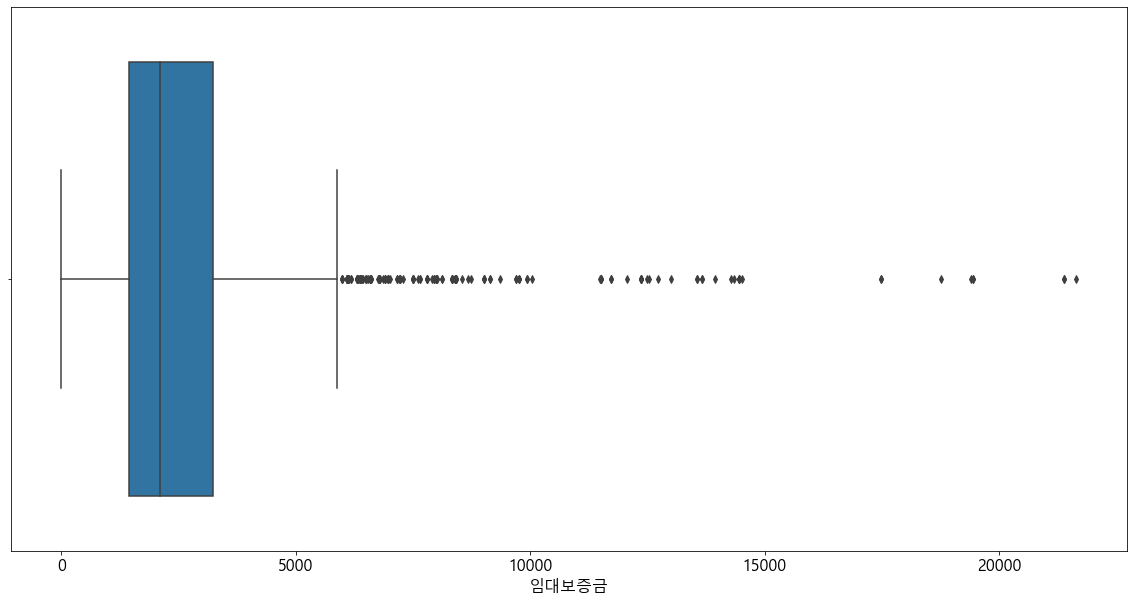

In [83]:
sns.boxplot(apps['임대보증금'])

In [84]:
apps['임대료'].describe()

count    3225.000000
mean       18.999180
std        12.333023
min         0.000000
25%        11.053000
50%        15.806000
75%        23.220000
max       105.803000
Name: 임대료, dtype: float64

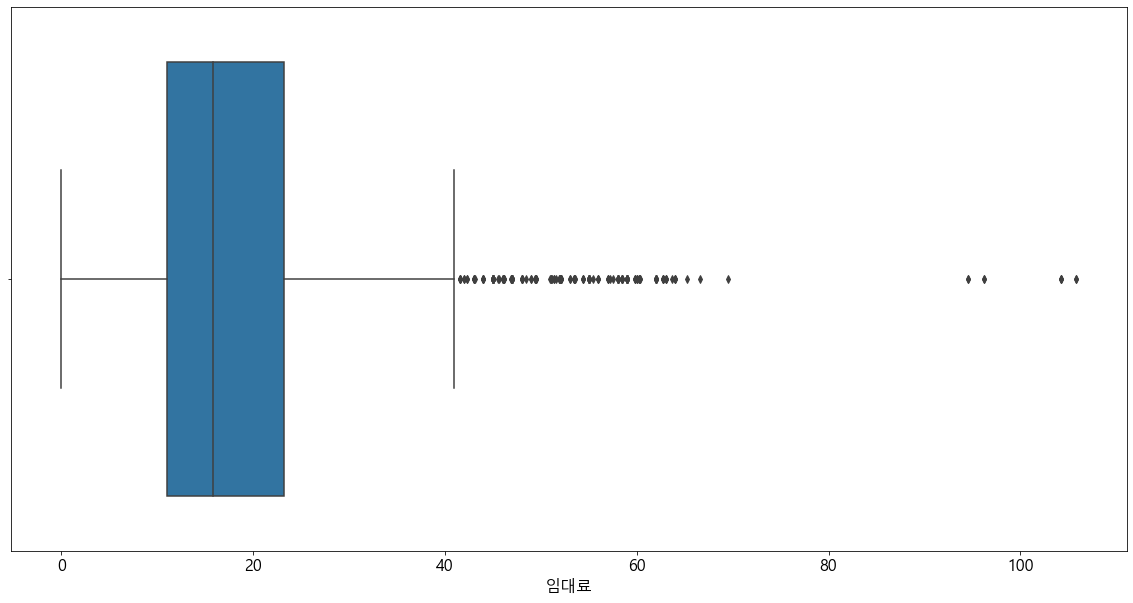

In [85]:
sns.boxplot(apps['임대료'])

In [86]:
apps.loc[apps['임대보증금']>=15000]

단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수  공가수 신분    임대보증금  \
2026  C2357   533    아파트  부산광역시  국민임대  51.30       165   25  E  19408.0   
2044  C1397   370    아파트  서울특별시  장기전세  46.79         4    9  A  17488.8   
2045  C1397   370    아파트  서울특별시  장기전세  46.91        69    9  A  17488.8   
2046  C1397   370    아파트  서울특별시  장기전세  51.96        24    9  A  19456.2   
2047  C1397   370    아파트  서울특별시  장기전세  51.99        80    9  A  19456.2   
2048  C1397   370    아파트  서울특별시  장기전세  59.93       142    9  A  21642.3   
2100  C1039   790    아파트  서울특별시  장기전세  51.32       126   13  A  18769.4   
2101  C1039   790    아파트  서울특별시  장기전세  59.88        49   13  A  21386.3   
2102  C1039   790    아파트  서울특별시  장기전세  59.94        75   13  A  21386.3   

         임대료  지하철   버스  단지내주차면수   등록차량수  
2026  10.108  1.0  2.0      484   345.0  
2044   0.000  0.0  3.0     1590  1595.0  
2045   0.000  0.0  3.0     1590  1595.0  
2046   0.000  0.0  3.0     1590  1595.0  
2047   0.000  0.0  3.0     1590  1595.0  
2048   0.000  0.0  3.0     1590  1595.0  
2100   0.000  0.0  3.0      673   645.0  
2101   0.000  0.0  3.0      673   645.0  
2102   0.000  0.0  3.0      673   645.0

In [87]:
apps.loc[apps['임대료']>= 80]

단지코드  총세대수 임대건물구분     지역       공급유형   전용면적  전용면적별세대수  공가수 신분    임대보증금  \
2163  C1024   680    아파트  서울특별시  공공임대(10년)  74.89        41    2  A   9700.5   
2164  C1024   680    아파트  서울특별시  공공임대(10년)  74.89         8    2  A   9926.1   
2165  C1024   680    아파트  서울특별시  공공임대(10년)  74.97       102    2  A   9700.5   
2166  C1024   680    아파트  서울특별시  공공임대(10년)  74.97        65    2  A   9926.1   
2167  C1024   680    아파트  서울특별시  공공임대(10년)  84.83        34    2  A  11505.2   
2168  C1024   680    아파트  서울특별시  공공임대(10년)  84.92        20    2  A  11505.2   
2169  C1024   680    아파트  서울특별시  공공임대(10년)  84.92        35    2  A  11730.9   
2170  C1024   680    아파트  서울특별시  공공임대(10년)  84.92         5    2  A  11505.2   
2171  C1024   680    아파트  서울특별시  공공임대(10년)  84.96        17    2  A  11730.9   

          임대료  지하철   버스  단지내주차면수  등록차량수  
2163   94.523  0.0  3.0      877  957.0  
2164   96.215  0.0  3.0      877  957.0  
2165   94.523  0.0  3.0      877  957.0  
2166   96.215  0.0  3.0      877  957.0  
2167  104.223  0.0  3.0      877  957.0  
2168  104.223  0.0  3.0      877  957.0  
2169  105.803  0.0  3.0      877  957.0  
2170  104.223  0.0  3.0      877  957.0  
2171  105.803  0.0  3.0      877  957.0

In [88]:
a= apps.loc[apps['임대보증금']>=15000]
a['임대보증금'].count()

9

In [89]:
a= apps.loc[apps['임대료']>= 80]
a['임대료'].count()

9

In [90]:
apps.drop(apps.loc[apps['임대보증금']>=15000].index, inplace=True)

In [91]:
apps.drop(apps.loc[apps['임대료']>=80].index, inplace=True)

#### 전용면적

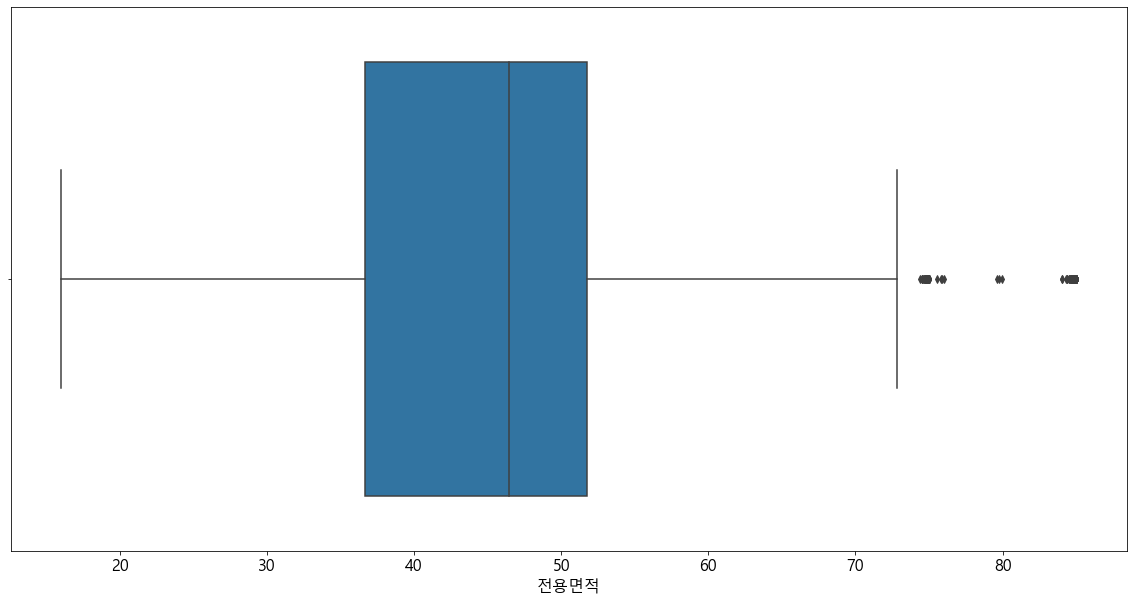

In [92]:
sns.boxplot(apps['전용면적'])

In [93]:
apps['전용면적'].describe()

count    3210.000000
mean       43.899143
std        12.792667
min        16.020000
25%        36.630000
50%        46.470000
75%        51.720000
max        84.990000
Name: 전용면적, dtype: float64

In [94]:
a= apps.loc[apps['전용면적']>=84]
a['공급유형'].value_counts()

공공임대(10년)    77
공공임대(분납)      7
Name: 공급유형, dtype: int64

In [95]:
apps.loc[apps['전용면적']>=80]

단지코드  총세대수 임대건물구분     지역       공급유형   전용면적  전용면적별세대수  공가수 신분    임대보증금  \
1960  C1344   424    아파트  서울특별시   공공임대(분납)  84.95        39    0  A  14354.5   
1961  C1344   424    아파트  서울특별시   공공임대(분납)  84.97        42    0  A  14526.4   
1962  C1344   424    아파트  서울특별시   공공임대(분납)  84.99       100    0  A  14274.4   
2040  C1804   478    아파트    경기도  공공임대(10년)  84.64         4    3  A   9023.7   
2041  C1804   478    아파트    경기도  공공임대(10년)  84.97        13    3  A   9023.7   
...     ...   ...    ...    ...        ...    ...       ...  ... ..      ...   
3772  C2303   963    아파트    경기도  공공임대(10년)  84.91       400   16  A   5990.0   
3773  C2303   963    아파트    경기도  공공임대(10년)  84.91       150   16  A   5990.0   
3774  C2303   963    아파트    경기도  공공임대(10년)  84.91        70   16  A   5990.0   
3787  C1496   565    아파트   충청북도  공공임대(10년)  84.64        98   11  A   3560.0   
3788  C1496   565    아파트   충청북도  공공임대(10년)  84.88       349   11  A   3560.0   

         임대료  지하철   버스  단지내주차면수  등록차량수  
1960  36.384  0.0  3.0      467  509.0  
1961  36.819  0.0  3.0      467  509.0  
1962  36.180  0.0  3.0      467  509.0  
2040  59.782  0.0  3.0      629  951.0  
2041  59.782  0.0  3.0      629  951.0  
...      ...  ...  ...      ...    ...  
3772  54.400  0.0  6.0     1161    NaN  
3773  54.400  0.0  6.0     1161    NaN  
3774  54.400  0.0  6.0     1161    NaN  
3787  48.000  0.0  3.0      582    NaN  
3788  48.000  0.0  3.0      582    NaN  

[84 rows x 15 columns]

#### 단지내 주차면수

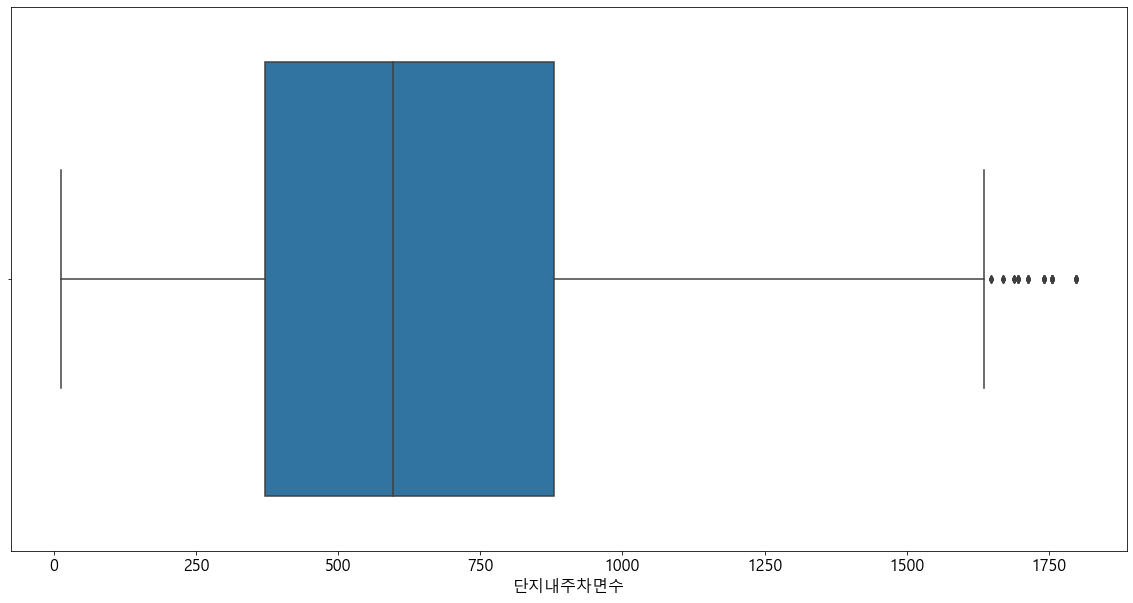

In [96]:
sns.boxplot(apps['단지내주차면수'])

In [97]:
a=apps.loc[apps['단지내주차면수']>=1700]
a['단지내주차면수'].count()

53

In [98]:
apps['단지내주차면수'].describe()

count    3210.000000
mean      656.557321
std       379.557315
min        13.000000
25%       372.000000
50%       596.000000
75%       879.000000
max      1798.000000
Name: 단지내주차면수, dtype: float64

In [99]:
# idx = store[store['단지내주차면수']>=500].index
# store.loc[idx, '전용면적'] = 500

In [100]:
a=apps[apps['단지내주차면수'] >= 1700]
a['단지내주차면수'].mean()

1755.8301886792453

In [101]:
#1700이상 값을 평균값으로 대체
idx = apps[apps['단지내주차면수'] >= 1700].index
apps.loc[idx, '단지내주차면수'] = 1755

In [102]:
apps['단지내주차면수'].describe()

count    3210.000000
mean      656.543614
std       379.499352
min        13.000000
25%       372.000000
50%       596.000000
75%       879.000000
max      1755.000000
Name: 단지내주차면수, dtype: float64

## 전용면적을 10의 배수로 변경

In [103]:
apps['전용면적'].describe()

count    3210.000000
mean       43.899143
std        12.792667
min        16.020000
25%        36.630000
50%        46.470000
75%        51.720000
max        84.990000
Name: 전용면적, dtype: float64

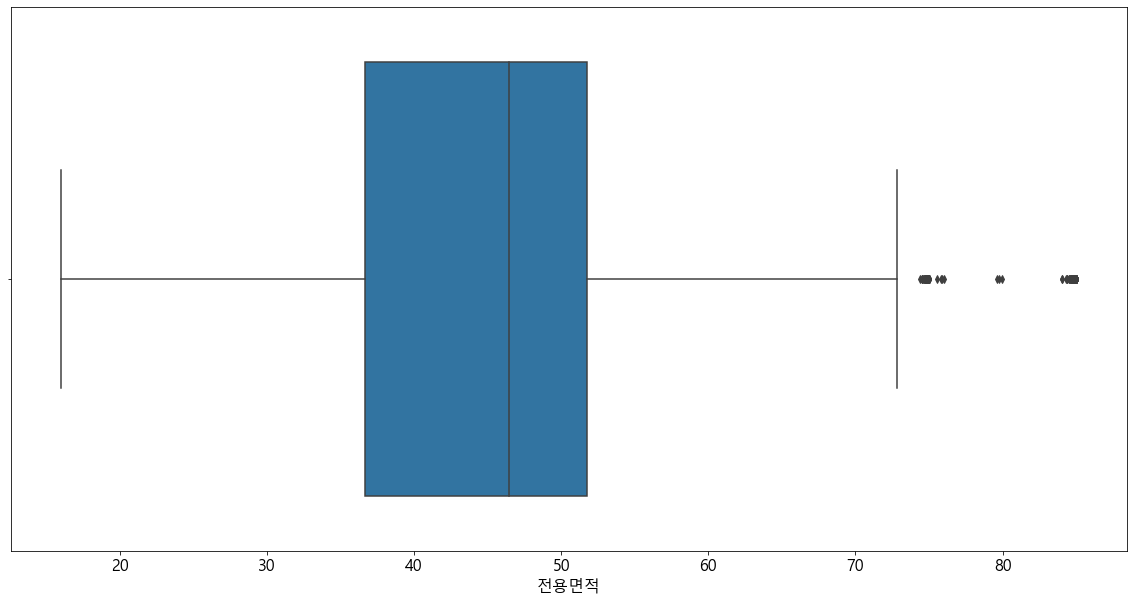

In [104]:
sns.boxplot(apps['전용면적'])

In [105]:
apps.loc[apps['전용면적'] >=80]

단지코드  총세대수 임대건물구분     지역       공급유형   전용면적  전용면적별세대수  공가수 신분    임대보증금  \
1960  C1344   424    아파트  서울특별시   공공임대(분납)  84.95        39    0  A  14354.5   
1961  C1344   424    아파트  서울특별시   공공임대(분납)  84.97        42    0  A  14526.4   
1962  C1344   424    아파트  서울특별시   공공임대(분납)  84.99       100    0  A  14274.4   
2040  C1804   478    아파트    경기도  공공임대(10년)  84.64         4    3  A   9023.7   
2041  C1804   478    아파트    경기도  공공임대(10년)  84.97        13    3  A   9023.7   
...     ...   ...    ...    ...        ...    ...       ...  ... ..      ...   
3772  C2303   963    아파트    경기도  공공임대(10년)  84.91       400   16  A   5990.0   
3773  C2303   963    아파트    경기도  공공임대(10년)  84.91       150   16  A   5990.0   
3774  C2303   963    아파트    경기도  공공임대(10년)  84.91        70   16  A   5990.0   
3787  C1496   565    아파트   충청북도  공공임대(10년)  84.64        98   11  A   3560.0   
3788  C1496   565    아파트   충청북도  공공임대(10년)  84.88       349   11  A   3560.0   

         임대료  지하철   버스  단지내주차면수  등록차량수  
1960  36.384  0.0  3.0      467  509.0  
1961  36.819  0.0  3.0      467  509.0  
1962  36.180  0.0  3.0      467  509.0  
2040  59.782  0.0  3.0      629  951.0  
2041  59.782  0.0  3.0      629  951.0  
...      ...  ...  ...      ...    ...  
3772  54.400  0.0  6.0     1161    NaN  
3773  54.400  0.0  6.0     1161    NaN  
3774  54.400  0.0  6.0     1161    NaN  
3787  48.000  0.0  3.0      582    NaN  
3788  48.000  0.0  3.0      582    NaN  

[84 rows x 15 columns]

In [106]:
a=apps.loc[apps['전용면적'] >=80]
a['공급유형'].count()

84

In [107]:
a['공급유형'].value_counts()

공공임대(10년)    77
공공임대(분납)      7
Name: 공급유형, dtype: int64

In [108]:
apps['전용면적'] = apps['전용면적']//5*5

In [109]:
apps['전용면적'].unique()

array([35., 50., 55., 30., 45., 40., 25., 70., 80., 75., 20., 65., 15.])

In [110]:
numeric_cols = []
for col in apps.columns:
    if apps[col].dtypes != 'object':
        numeric_cols.append(col)

In [112]:
numeric_cols

['총세대수',
 '전용면적',
 '전용면적별세대수',
 '공가수',
 '임대보증금',
 '임대료',
 '지하철',
 '버스',
 '단지내주차면수',
 '등록차량수']

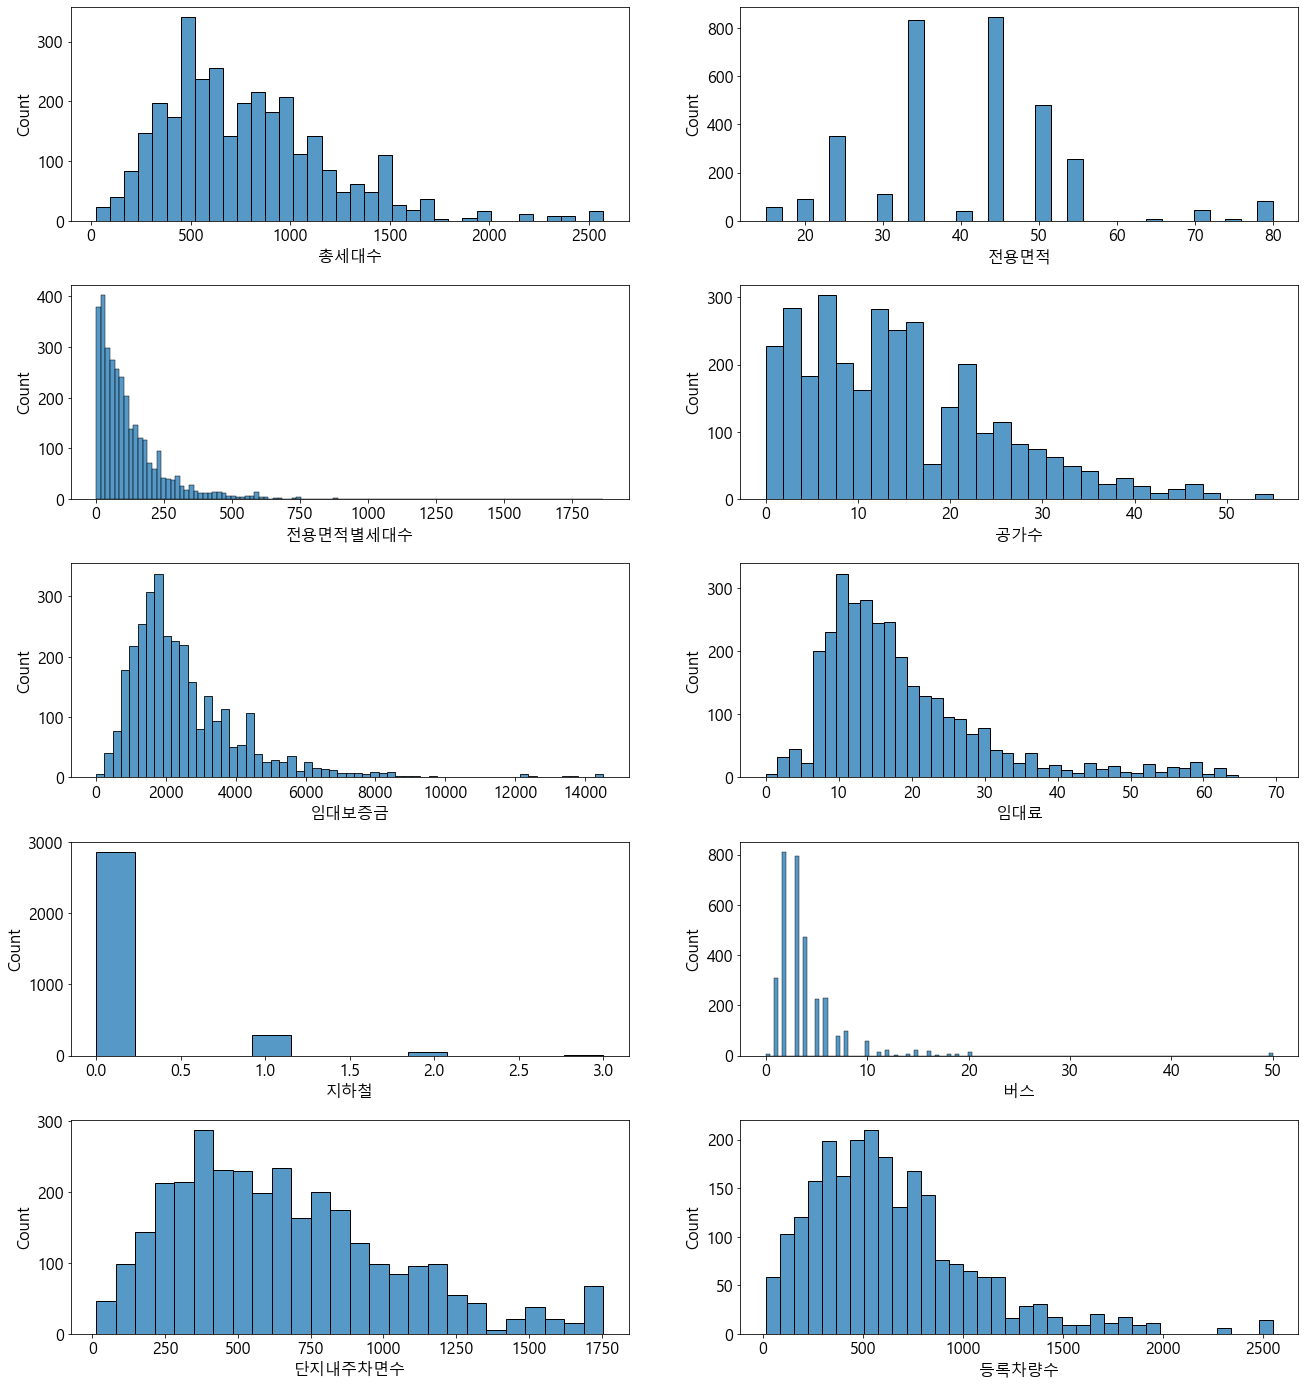

In [113]:
#standard
fig = plt.figure(figsize=(22, 50))
for i, n in enumerate(numeric_cols):
    plt.subplot(10, 2, i+1)
    plt.subplots_adjust(hspace=0.3)
    sns.histplot(apps[n])

## 전용면적 상/하한 적용

상한100, 하한 15

In [114]:
# apps['전용면적']

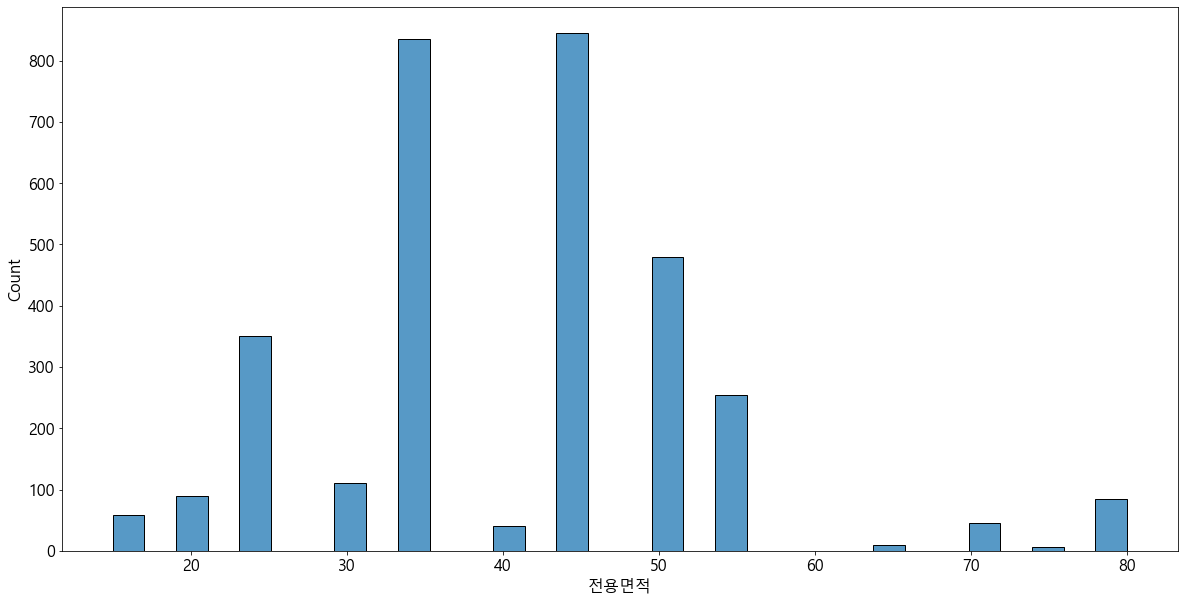

In [115]:
plt.subplots_adjust(hspace=0.3)
sns.histplot(apps['전용면적'])

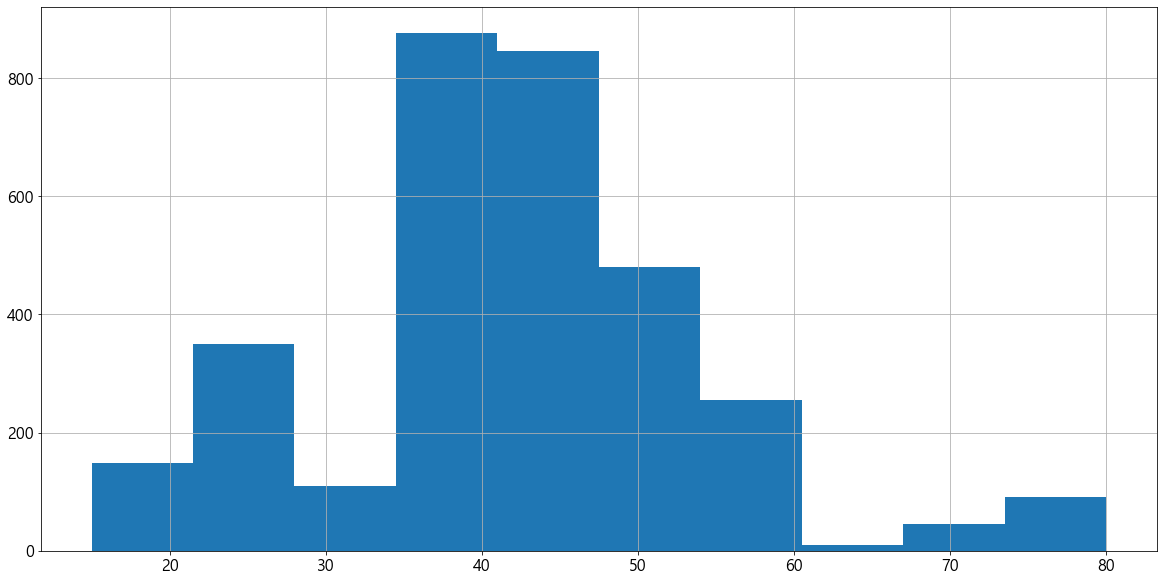

In [116]:
apps['전용면적'].hist()

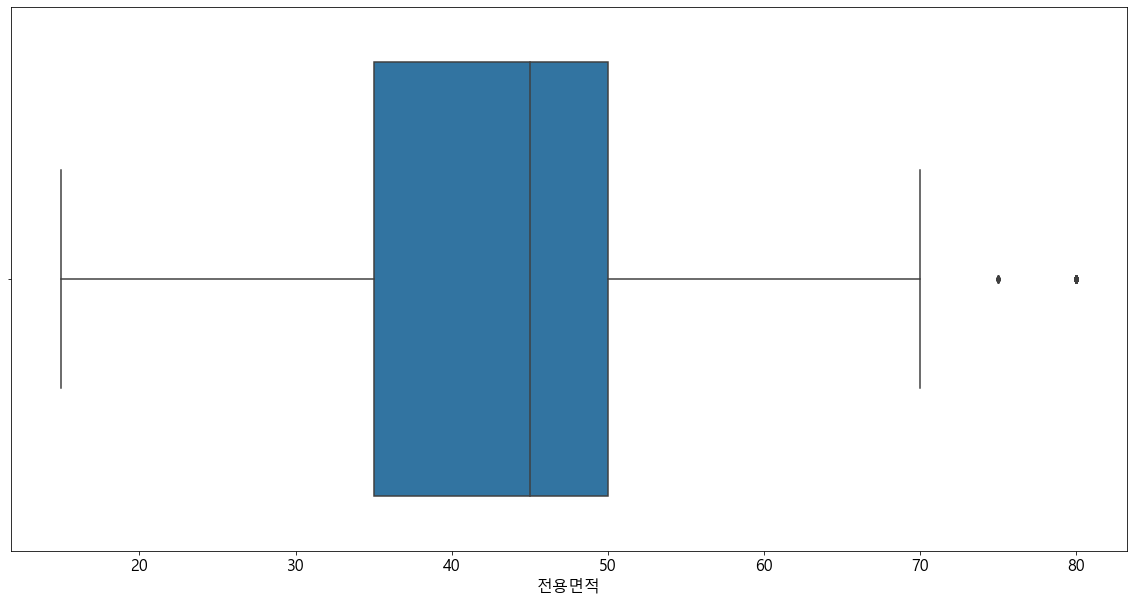

In [117]:
sns.boxplot(apps['전용면적'])

In [118]:
apps['전용면적'].describe()

count    3210.000000
mean       41.317757
std        12.401383
min        15.000000
25%        35.000000
50%        45.000000
75%        50.000000
max        80.000000
Name: 전용면적, dtype: float64

- max        580
- min         5

In [119]:
a=apps.loc[apps['전용면적'] <= 15]
a['전용면적'].count()

59

In [120]:
b=apps.loc[apps['전용면적']>=80]
b['전용면적'].count()

84

## label_encoder

In [121]:
# from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()

In [122]:
# Label 인코딩을 위해 object 유형의 컬럼만 추출 
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
object_columns

['단지코드', '임대건물구분', '지역', '공급유형', '신분']

In [123]:
object_columns.remove('단지코드')

In [124]:
object_columns

['임대건물구분', '지역', '공급유형', '신분']

In [125]:
# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [126]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3210 entries, 0 to 3966
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      3210 non-null   object 
 1   총세대수      3210 non-null   int64  
 2   임대건물구분    3210 non-null   int64  
 3   지역        3210 non-null   int64  
 4   공급유형      3210 non-null   int64  
 5   전용면적      3210 non-null   float64
 6   전용면적별세대수  3210 non-null   int64  
 7   공가수       3210 non-null   int64  
 8   신분        3210 non-null   int64  
 9   임대보증금     3207 non-null   float64
 10  임대료       3207 non-null   float64
 11  지하철       3210 non-null   float64
 12  버스        3210 non-null   float64
 13  단지내주차면수   3210 non-null   int64  
 14  등록차량수     2365 non-null   float64
dtypes: float64(6), int64(8), object(1)
memory usage: 561.2+ KB


## Skewness Kurtosis

Skewness: 1.147
Kurtosis: 2.037


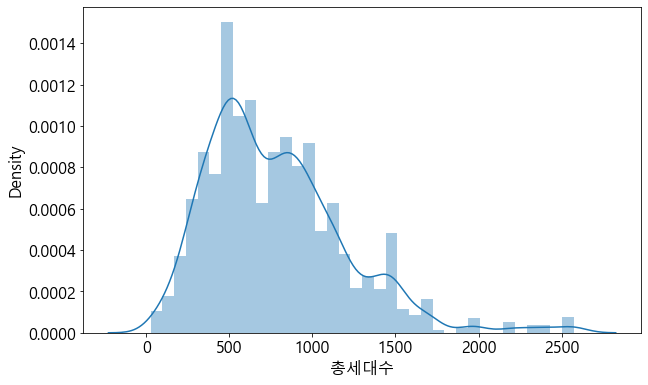

In [127]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["총세대수"])
print("Skewness: {:.3f}".format(apps["총세대수"].skew())) 
print("Kurtosis: {:.3f}".format(apps["총세대수"].kurt()))

In [128]:
#apps["총세대수"] = np.log1p(apps["총세대수"]) 

#f, ax = plt.subplots(figsize = (10, 6)) 

#sns.distplot(apps["총세대수"]) 

#print("Skewness: {:.3f}".format(apps["총세대수"].skew()))
#print("Kurtosis: {:.3f}".format(apps["총세대수"].kurt()))

- Skewness: -0.866
- Kurtosis: 1.868
- 더 안좋아지는 것 같아서 주석처리함

Skewness: 0.845
Kurtosis: 0.481


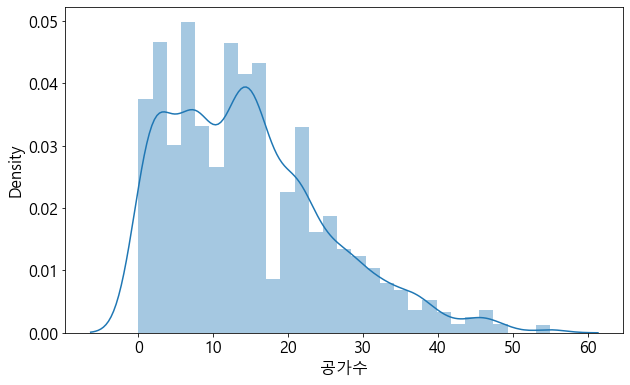

In [129]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["공가수"])
print("Skewness: {:.3f}".format(apps["공가수"].skew())) 
print("Kurtosis: {:.3f}".format(apps["공가수"].kurt()))

Skewness: 1.672
Kurtosis: 3.079


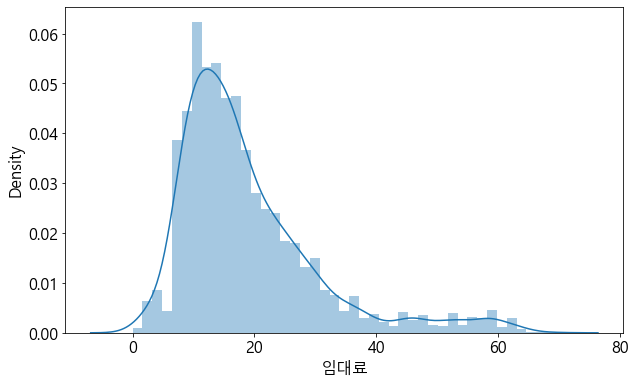

In [130]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["임대료"])
print("Skewness: {:.3f}".format(apps["임대료"].skew())) 
print("Kurtosis: {:.3f}".format(apps["임대료"].kurt()))

In [131]:
# apps["임대료"] = np.log1p(apps["임대료"]) 

# f, ax = plt.subplots(figsize = (10, 6)) 

# sns.distplot(apps["임대료"]) 

# print("Skewness: {:.3f}".format(apps["임대료"].skew()))
# print("Kurtosis: {:.3f}".format(apps["임대료"].kurt()))

Skewness: 2.470
Kurtosis: 9.918


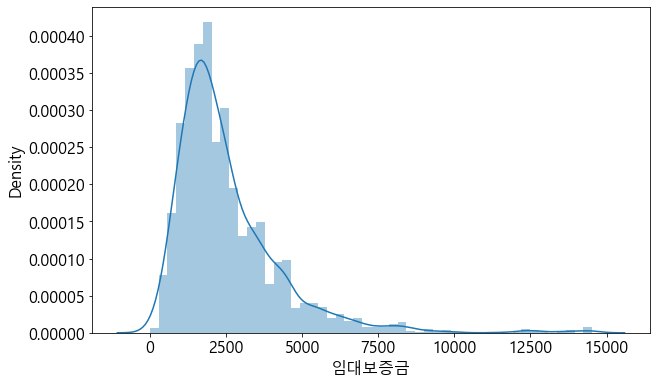

In [132]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["임대보증금"])
print("Skewness: {:.3f}".format(apps["임대보증금"].skew())) 
print("Kurtosis: {:.3f}".format(apps["임대보증금"].kurt()))

Skewness: -1.833
Kurtosis: 20.270


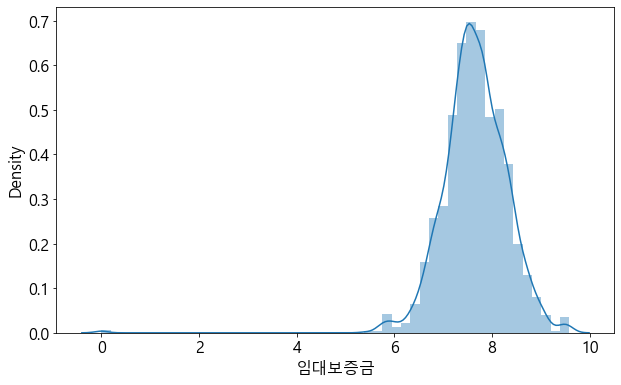

In [133]:
apps["임대보증금"] = np.log1p(apps["임대보증금"]) 

f, ax = plt.subplots(figsize = (10, 6)) 

sns.distplot(apps["임대보증금"]) 

print("Skewness: {:.3f}".format(apps["임대보증금"].skew()))
print("Kurtosis: {:.3f}".format(apps["임대보증금"].kurt()))

Skewness: -0.168
Kurtosis: 1.378


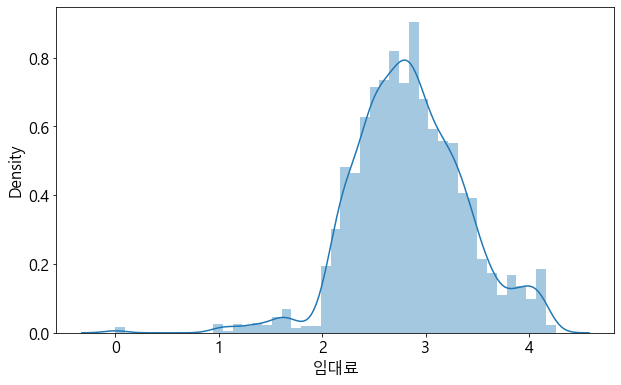

In [134]:
apps["임대료"] = np.log1p(apps["임대료"]) 

f, ax = plt.subplots(figsize = (10, 6)) 

sns.distplot(apps["임대료"]) 

print("Skewness: {:.3f}".format(apps["임대료"].skew()))
print("Kurtosis: {:.3f}".format(apps["임대료"].kurt()))

Skewness: 0.804
Kurtosis: 0.288


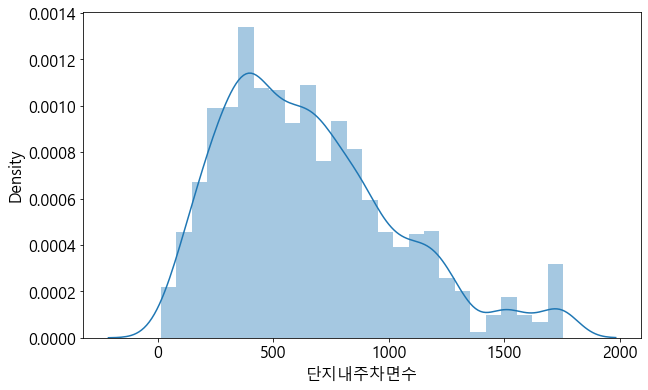

In [135]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["단지내주차면수"])
print("Skewness: {:.3f}".format(apps["단지내주차면수"].skew())) 
print("Kurtosis: {:.3f}".format(apps["단지내주차면수"].kurt()))

Skewness: 0.569
Kurtosis: 1.182


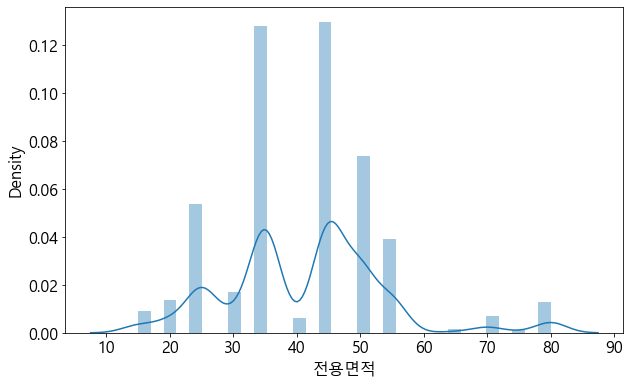

In [136]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(apps["전용면적"])
print("Skewness: {:.3f}".format(apps["전용면적"].skew())) 
print("Kurtosis: {:.3f}".format(apps["전용면적"].kurt()))

## Null값 추가처리 필요

In [137]:
apps.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금         3
임대료           3
지하철           0
버스            0
단지내주차면수       0
등록차량수       845
dtype: int64

In [138]:
apps['임대보증금'] = apps['임대보증금'].fillna(0)

In [139]:
apps['임대료'] = apps['임대료'].fillna(0)

In [140]:
apps.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금         0
임대료           0
지하철           0
버스            0
단지내주차면수       0
등록차량수       845
dtype: int64

## 등록차량수 Null값을 기준으로 train, test분리

In [141]:
# -999로 모든 컬럼들의 Null값 변환
apps['등록차량수'] = apps['등록차량수'].fillna(-999)

In [142]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['등록차량수'] != -999]
app_test = apps[apps['등록차량수']== -999]
app_train.shape, app_test.shape

((2365, 15), (845, 15))

In [143]:
# app_test의 TARGET컬럼을 Drop
app_test = app_test.drop('등록차량수', axis=1)

In [144]:
app_train.shape, app_test.shape

((2365, 15), (845, 14))

In [145]:
app_train.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
신분          0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
등록차량수       0
dtype: int64

In [146]:
app_test.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
신분          0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
dtype: int64

### 상관관계

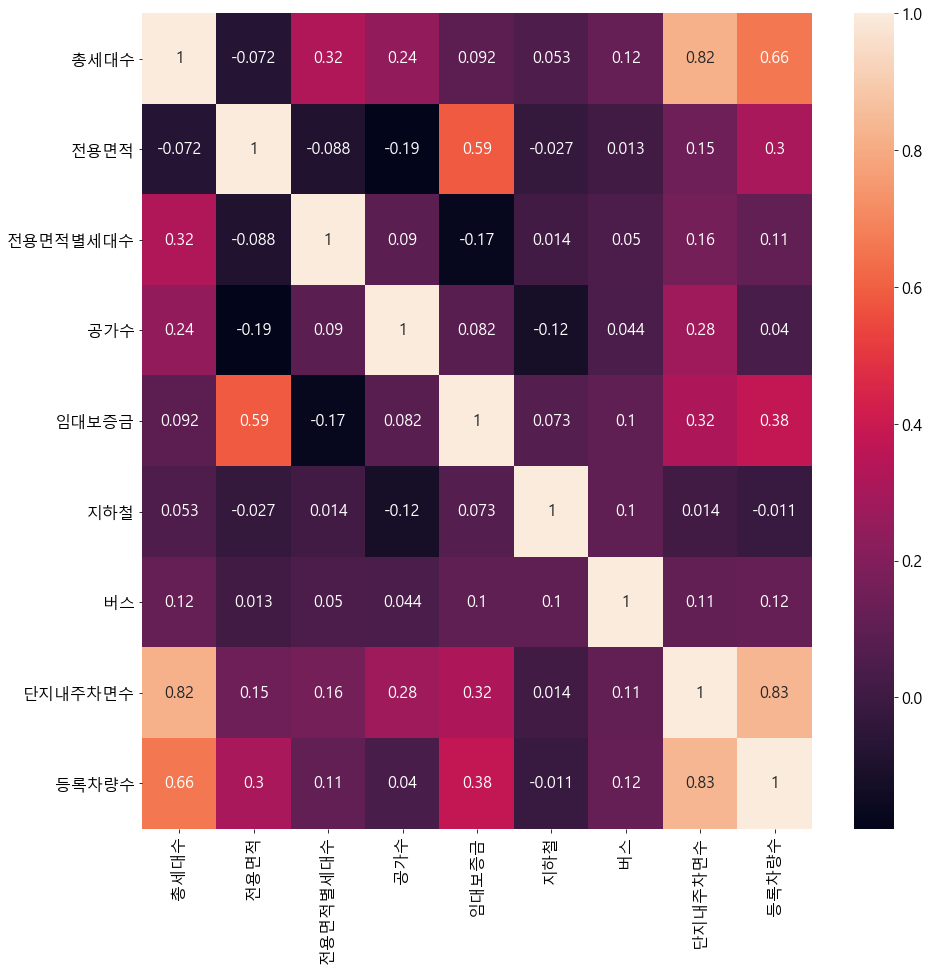

In [147]:
corr_columns = ['총세대수',  '전용면적', '전용면적별세대수', '공가수',
    '임대보증금', '지하철', '버스',
    '단지내주차면수','등록차량수']


corr = app_train[corr_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
# plt.savefig('apps_상관관계도_상가drop_보증금평균_외도척도안하면_임대료drop.png')

## 단지별 데이터 1차원으로 취합

In [148]:
columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스','단지내주차면수']
target = '등록차량수'
area_columns = []
for area in app_train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [149]:
area_columns

['면적_35.0',
 '면적_50.0',
 '면적_55.0',
 '면적_30.0',
 '면적_45.0',
 '면적_40.0',
 '면적_25.0',
 '면적_70.0',
 '면적_80.0',
 '면적_75.0',
 '면적_20.0',
 '면적_65.0',
 '면적_15.0']

In [150]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [151]:
# train.loc[train['단지코드']=='C2532']

In [152]:
app_train['임대건물구분'].value_counts()

0    2365
Name: 임대건물구분, dtype: int64

In [153]:
app_train.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
신분          0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
등록차량수       0
dtype: int64

In [154]:
len(app_train['단지코드'].unique())

423

In [155]:
for i,code in tqdm(enumerate(app_train['단지코드'].unique())):
    temp=app_train[app_train['단지코드']==code]
    temp.index = range(temp.shape[0])
    
    for col in columns:
        new_train.loc[i,col]=temp.loc[0,col]
    for j,area in enumerate(temp['전용면적'].unique()):
        area_temp=temp[temp['전용면적']==area]
        home=0
        for _,k in area_temp.iterrows():
            home = home + k['전용면적별세대수']
        for aa in area_columns:
            area_item = float(aa.split('_')[-1])
            if area_item==area:
                new_train.loc[i,aa]=home
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대보증금']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_train.loc[i,'임대보증금']=cal
        
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대료']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_train.loc[i,'임대료']=cal   
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']

    
    
for i,code in tqdm(enumerate(app_test['단지코드'].unique())):
    temp=app_test[app_test['단지코드']==code]
    temp.index = range(temp.shape[0])
    
    for col in columns:
        new_test.loc[i,col]=temp.loc[0,col]
    for j,area in enumerate(temp['전용면적'].unique()):
        area_temp=temp[temp['전용면적']==area]
        home=0
        for _,k in area_temp.iterrows():
            home = home + k['전용면적별세대수']
        for aa in area_columns:
            area_item = float(aa.split('_')[-1])
            if area_item==area:
                new_test.loc[i,aa]=home
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대보증금']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_test.loc[i,'임대보증금']=cal
    
    
    cal =0
    for _,k in temp.iterrows():
        cal = cal + (k['임대료']*k['전용면적별세대수'])
    cal= cal/temp['전용면적별세대수'].sum()
    new_test.loc[i,'임대료']=cal

423it [00:03, 107.64it/s]
150it [00:01, 113.52it/s]


In [156]:
a = new_train['등록차량수']

In [157]:
a

0      1015.0
1       205.0
2      1064.0
3       730.0
4       553.0
        ...  
418      57.0
419     246.0
420      19.0
421      16.0
422     146.0
Name: 등록차량수, Length: 423, dtype: float64

In [158]:
new_train.drop(['등록차량수'],axis=1,inplace=True)

In [159]:
new_train['등록차량수']= a

In [1]:
new_train

NameError: name 'new_train' is not defined

In [161]:
new_test

단지코드    총세대수  임대건물구분    지역  공급유형  전용면적  전용면적별세대수   공가수   신분     임대보증금  \
0    C1072   754.0     0.0   3.0   0.0  35.0     116.0  14.0  6.0  8.213698   
1    C1128  1354.0     0.0   3.0   0.0  35.0     368.0   9.0  6.0  8.128826   
2    C1456   619.0     0.0   8.0   0.0  30.0      82.0  18.0  0.0  8.096922   
3    C1840   593.0     0.0   4.0   0.0  35.0     253.0   7.0  0.0  7.472497   
4    C1332  1297.0     0.0   3.0   0.0  35.0     282.0  11.0  6.0  8.271552   
..     ...     ...     ...   ...   ...   ...       ...   ...  ...       ...   
145  C2456   349.0     0.0   9.0   0.0  25.0      24.0  17.0  6.0  7.127024   
146  C1266   596.0     0.0  11.0   0.0  25.0     164.0  35.0  6.0  7.236003   
147  C2152   120.0     0.0   5.0   2.0  20.0      66.0   9.0  2.0  6.892647   
148  C1267   675.0     0.0   1.0   0.0  20.0      28.0  38.0  6.0  4.511921   
149  C2189   382.0     0.0   4.0   0.0  25.0      96.0  45.0  6.0  7.049626   

     ...  면적_50.0  면적_30.0  면적_55.0  면적_25.0  면적_40.0  면적_70.0  면적_80.0  \
0    ...    376.0      NaN      NaN      NaN      NaN      NaN      NaN   
1    ...    578.0      NaN      NaN      NaN      NaN      NaN      NaN   
2    ...    132.0     82.0     44.0      NaN      NaN      NaN      NaN   
3    ...     84.0      NaN      NaN      NaN      NaN      NaN      NaN   
4    ...    304.0      NaN      NaN      NaN      NaN      NaN      NaN   
..   ...      ...      ...      ...      ...      ...      ...      ...   
145  ...      NaN      NaN      NaN    112.0      NaN      NaN      NaN   
146  ...      NaN      NaN      NaN    180.0      NaN      NaN      NaN   
147  ...      NaN     54.0      NaN      NaN      NaN      NaN      NaN   
148  ...      NaN      NaN      NaN     74.0      NaN      NaN      NaN   
149  ...      NaN      NaN      NaN    116.0      NaN      NaN      NaN   

     면적_20.0  면적_75.0  면적_15.0  
0        NaN      NaN      NaN  
1        NaN      NaN      NaN  
2        NaN      NaN      NaN  
3        NaN      NaN      NaN  
4        NaN      NaN      NaN  
..       ...      ...      ...  
145      NaN      NaN      NaN  
146      NaN      NaN      NaN  
147     66.0      NaN      NaN  
148    240.0      NaN     50.0  
149      NaN      NaN      NaN  

[150 rows x 26 columns]

In [162]:
new_train.drop(['전용면적','전용면적별세대수'],axis=1,inplace=True)

In [163]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     423 non-null    object 
 1   총세대수     423 non-null    float64
 2   임대건물구분   423 non-null    float64
 3   지역       423 non-null    float64
 4   공급유형     423 non-null    float64
 5   공가수      423 non-null    float64
 6   신분       423 non-null    float64
 7   임대보증금    423 non-null    float64
 8   임대료      423 non-null    float64
 9   지하철      423 non-null    float64
 10  버스       423 non-null    float64
 11  단지내주차면수  423 non-null    float64
 12  면적_35.0  278 non-null    float64
 13  면적_50.0  188 non-null    float64
 14  면적_55.0  114 non-null    float64
 15  면적_30.0  66 non-null     float64
 16  면적_45.0  263 non-null    float64
 17  면적_40.0  20 non-null     float64
 18  면적_25.0  122 non-null    float64
 19  면적_70.0  22 non-null     float64
 20  면적_80.0  25 non-null     float64
 21  면적_75.0  3 non-n

In [164]:
new_test.drop(['전용면적','전용면적별세대수'],axis=1,inplace=True)

In [165]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     150 non-null    object 
 1   총세대수     150 non-null    float64
 2   임대건물구분   150 non-null    float64
 3   지역       150 non-null    float64
 4   공급유형     150 non-null    float64
 5   공가수      150 non-null    float64
 6   신분       150 non-null    float64
 7   임대보증금    150 non-null    float64
 8   임대료      150 non-null    float64
 9   지하철      150 non-null    float64
 10  버스       150 non-null    float64
 11  단지내주차면수  150 non-null    float64
 12  면적_35.0  103 non-null    float64
 13  면적_45.0  90 non-null     float64
 14  면적_50.0  67 non-null     float64
 15  면적_30.0  15 non-null     float64
 16  면적_55.0  48 non-null     float64
 17  면적_25.0  44 non-null     float64
 18  면적_40.0  5 non-null      float64
 19  면적_70.0  5 non-null      float64
 20  면적_80.0  5 non-null      float64
 21  면적_20.0  11 non-

In [166]:
new_train.shape, new_test.shape

((423, 26), (150, 24))

## 결측치 처리

In [167]:
new_train = new_train.fillna(0)
new_test = new_test.fillna(0)

In [168]:
new_train

단지코드    총세대수  임대건물구분    지역  공급유형   공가수    신분     임대보증금       임대료  지하철  \
0    C2483   900.0     0.0   0.0   0.0  38.0   0.0  7.830777  2.891899  0.0   
1    C2515   545.0     0.0   1.0   0.0  17.0   0.0  7.168132  2.505706  0.0   
2    C1407  1216.0     0.0   2.0   0.0  13.0   0.0  7.858838  2.874221  1.0   
3    C1945   755.0     0.0   3.0   0.0   6.0   1.0  7.687395  2.956077  1.0   
4    C1470   696.0     0.0   4.0   0.0  14.0   0.0  7.519697  2.596458  0.0   
..     ...     ...     ...   ...   ...   ...   ...       ...       ...  ...   
418  C2586    90.0     0.0   9.0   6.0   7.0   8.0  7.935577  2.557602  0.0   
419  C2035   492.0     0.0   5.0   0.0  24.0   0.0  7.419456  2.853326  0.0   
420  C2020    40.0     0.0   8.0   6.0   7.0  10.0  7.835323  2.585673  1.0   
421  C2437    90.0     0.0  11.0   2.0  12.0   2.0  6.942736  2.464109  0.0   
422  C2532   239.0     0.0   5.0   0.0   7.0   0.0  7.216396  2.697721  0.0   

     ...  면적_45.0  면적_40.0  면적_25.0  면적_70.0  면적_80.0  면적_75.0  면적_20.0  \
0    ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1    ...     57.0      0.0      0.0      0.0      0.0      0.0      0.0   
2    ...    340.0    362.0      0.0      0.0      0.0      0.0      0.0   
3    ...      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4    ...    196.0      0.0      0.0      0.0      0.0      0.0      0.0   
..   ...      ...      ...      ...      ...      ...      ...      ...   
418  ...      0.0      0.0     42.0      0.0      0.0      0.0      0.0   
419  ...    180.0      0.0    156.0      0.0      0.0      0.0      0.0   
420  ...      0.0      0.0      5.0      0.0      0.0      0.0      0.0   
421  ...      0.0      0.0      0.0      0.0      0.0      0.0     90.0   
422  ...     38.0      0.0      0.0      0.0      0.0      0.0      0.0   

     면적_65.0  면적_15.0   등록차량수  
0        0.0      0.0  1015.0  
1        0.0      0.0   205.0  
2        0.0      0.0  1064.0  
3        0.0      0.0   730.0  
4        0.0      0.0   553.0  
..       ...      ...     ...  
418      0.0     12.0    57.0  
419      0.0      0.0   246.0  
420      0.0     20.0    19.0  
421      0.0      0.0    16.0  
422      0.0      0.0   146.0  

[423 rows x 26 columns]

In [169]:
new_test

단지코드    총세대수  임대건물구분    지역  공급유형   공가수   신분     임대보증금       임대료  지하철  \
0    C1072   754.0     0.0   3.0   0.0  14.0  6.0  8.213698  3.300021  0.0   
1    C1128  1354.0     0.0   3.0   0.0   9.0  6.0  8.128826  3.247022  0.0   
2    C1456   619.0     0.0   8.0   0.0  18.0  0.0  8.096922  3.138893  0.0   
3    C1840   593.0     0.0   4.0   0.0   7.0  0.0  7.472497  2.561260  0.0   
4    C1332  1297.0     0.0   3.0   0.0  11.0  6.0  8.271552  3.358312  0.0   
..     ...     ...     ...   ...   ...   ...  ...       ...       ...  ...   
145  C2456   349.0     0.0   9.0   0.0  17.0  6.0  7.127024  2.840256  0.0   
146  C1266   596.0     0.0  11.0   0.0  35.0  6.0  7.236003  3.046286  0.0   
147  C2152   120.0     0.0   5.0   2.0   9.0  2.0  6.892647  2.399356  0.0   
148  C1267   675.0     0.0   1.0   0.0  38.0  6.0  4.511921  1.691060  0.0   
149  C2189   382.0     0.0   4.0   0.0  45.0  6.0  7.049626  2.672190  0.0   

     ...  면적_50.0  면적_30.0  면적_55.0  면적_25.0  면적_40.0  면적_70.0  면적_80.0  \
0    ...    376.0      0.0      0.0      0.0      0.0      0.0      0.0   
1    ...    578.0      0.0      0.0      0.0      0.0      0.0      0.0   
2    ...    132.0     82.0     44.0      0.0      0.0      0.0      0.0   
3    ...     84.0      0.0      0.0      0.0      0.0      0.0      0.0   
4    ...    304.0      0.0      0.0      0.0      0.0      0.0      0.0   
..   ...      ...      ...      ...      ...      ...      ...      ...   
145  ...      0.0      0.0      0.0    112.0      0.0      0.0      0.0   
146  ...      0.0      0.0      0.0    180.0      0.0      0.0      0.0   
147  ...      0.0     54.0      0.0      0.0      0.0      0.0      0.0   
148  ...      0.0      0.0      0.0     74.0      0.0      0.0      0.0   
149  ...      0.0      0.0      0.0    116.0      0.0      0.0      0.0   

     면적_20.0  면적_75.0  면적_15.0  
0        0.0      0.0      0.0  
1        0.0      0.0      0.0  
2        0.0      0.0      0.0  
3        0.0      0.0      0.0  
4        0.0      0.0      0.0  
..       ...      ...      ...  
145      0.0      0.0      0.0  
146      0.0      0.0      0.0  
147     66.0      0.0      0.0  
148    240.0      0.0     50.0  
149      0.0      0.0      0.0  

[150 rows x 24 columns]

## 기본모델 사용

In [170]:
X = new_train.iloc[:, 1:-1]
y= new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]

In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 422
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총세대수     423 non-null    float64
 1   임대건물구분   423 non-null    float64
 2   지역       423 non-null    float64
 3   공급유형     423 non-null    float64
 4   공가수      423 non-null    float64
 5   신분       423 non-null    float64
 6   임대보증금    423 non-null    float64
 7   임대료      423 non-null    float64
 8   지하철      423 non-null    float64
 9   버스       423 non-null    float64
 10  단지내주차면수  423 non-null    float64
 11  면적_35.0  423 non-null    float64
 12  면적_50.0  423 non-null    float64
 13  면적_55.0  423 non-null    float64
 14  면적_30.0  423 non-null    float64
 15  면적_45.0  423 non-null    float64
 16  면적_40.0  423 non-null    float64
 17  면적_25.0  423 non-null    float64
 18  면적_70.0  423 non-null    float64
 19  면적_80.0  423 non-null    float64
 20  면적_75.0  423 non-null    float64
 21  면적_20.0  423 non

In [172]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[0.34382376, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20416994, 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.46813533, 0.        , 0.13333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00550747, 0.        , 0.53333333, ..., 0.        , 0.        ,
        0.03968254],
       [0.02517703, 0.        , 0.73333333, ..., 0.11627907, 0.        ,
        0.        ],
       [0.08379229, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [173]:
# 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 이전에 만든 예제들이 X, y로 사용하고 있기 때문에 변수에 담아준다.
X = X_train
y = y_train

In [174]:
params = {
    # 이웃의 개수
    'n_neighbors' : list(range(1, 11))
}

model1 = KNeighborsRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 7}
최적의 모델 평균성능 : 0.668398264147213


In [175]:
# CatBoostRegressor 
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model2 = CatBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf2.best_score_}')

0:	learn: 389.7051855	total: 82.3ms	remaining: 4.03s
1:	learn: 389.6837713	total: 84.1ms	remaining: 2.02s
2:	learn: 389.6614703	total: 85.5ms	remaining: 1.34s
3:	learn: 389.6417966	total: 87.2ms	remaining: 1s
4:	learn: 389.6215685	total: 88.7ms	remaining: 799ms
5:	learn: 389.5993468	total: 90.2ms	remaining: 662ms
6:	learn: 389.5804042	total: 91.7ms	remaining: 563ms
7:	learn: 389.5592368	total: 93.2ms	remaining: 489ms
8:	learn: 389.5392637	total: 94.7ms	remaining: 431ms
9:	learn: 389.5188380	total: 96.3ms	remaining: 385ms
10:	learn: 389.5003276	total: 98ms	remaining: 347ms
11:	learn: 389.4822675	total: 99.8ms	remaining: 316ms
12:	learn: 389.4622289	total: 101ms	remaining: 288ms
13:	learn: 389.4415557	total: 103ms	remaining: 265ms
14:	learn: 389.4203946	total: 105ms	remaining: 244ms
15:	learn: 389.4024803	total: 106ms	remaining: 226ms
16:	learn: 389.3857502	total: 108ms	remaining: 209ms
17:	learn: 389.3651812	total: 110ms	remaining: 195ms
18:	learn: 389.3471504	total: 111ms	remaining: 18

0:	learn: 389.5417729	total: 24.5ms	remaining: 1.2s
1:	learn: 389.5222748	total: 25.8ms	remaining: 620ms
2:	learn: 389.5006756	total: 27.3ms	remaining: 427ms
3:	learn: 389.4808340	total: 28.3ms	remaining: 326ms
4:	learn: 389.4602363	total: 29.7ms	remaining: 267ms
5:	learn: 389.4399689	total: 31.6ms	remaining: 232ms
6:	learn: 389.4209863	total: 32.9ms	remaining: 202ms
7:	learn: 389.4021640	total: 34.3ms	remaining: 180ms
8:	learn: 389.3844732	total: 35.5ms	remaining: 162ms
9:	learn: 389.3653151	total: 36.8ms	remaining: 147ms
10:	learn: 389.3463054	total: 37.8ms	remaining: 134ms
11:	learn: 389.3255094	total: 39.2ms	remaining: 124ms
12:	learn: 389.3065891	total: 40.3ms	remaining: 115ms
13:	learn: 389.2858456	total: 41.6ms	remaining: 107ms
14:	learn: 389.2647748	total: 42.9ms	remaining: 100ms
15:	learn: 389.2487393	total: 44.1ms	remaining: 93.8ms
16:	learn: 389.2307863	total: 45.3ms	remaining: 87.9ms
17:	learn: 389.2136067	total: 46.6ms	remaining: 82.8ms
18:	learn: 389.1952147	total: 47.8ms

1:	learn: 372.5529164	total: 4.26ms	remaining: 102ms
2:	learn: 372.5329625	total: 5.46ms	remaining: 85.5ms
3:	learn: 372.5145087	total: 6.54ms	remaining: 75.3ms
4:	learn: 372.4960429	total: 7.62ms	remaining: 68.6ms
5:	learn: 372.4745346	total: 8.82ms	remaining: 64.7ms
6:	learn: 372.4534253	total: 10.4ms	remaining: 64ms
7:	learn: 372.4344809	total: 11.8ms	remaining: 61.8ms
8:	learn: 372.4167539	total: 12.9ms	remaining: 59ms
9:	learn: 372.3982276	total: 14.2ms	remaining: 56.9ms
10:	learn: 372.3810319	total: 16ms	remaining: 56.7ms
11:	learn: 372.3640951	total: 17.1ms	remaining: 54ms
12:	learn: 372.3461085	total: 19ms	remaining: 54.1ms
13:	learn: 372.3254323	total: 21.1ms	remaining: 54.2ms
14:	learn: 372.3044622	total: 23.4ms	remaining: 54.7ms
15:	learn: 372.2854576	total: 25.7ms	remaining: 54.6ms
16:	learn: 372.2688635	total: 27.9ms	remaining: 54.2ms
17:	learn: 372.2499678	total: 30.3ms	remaining: 53.8ms
18:	learn: 372.2323576	total: 32.4ms	remaining: 52.8ms
19:	learn: 372.2133123	total: 

54:	learn: 388.6451028	total: 82.1ms	remaining: 67.2ms
55:	learn: 388.6254082	total: 83.6ms	remaining: 65.6ms
56:	learn: 388.6040154	total: 84.8ms	remaining: 64ms
57:	learn: 388.5828309	total: 86.3ms	remaining: 62.5ms
58:	learn: 388.5643840	total: 87.5ms	remaining: 60.8ms
59:	learn: 388.5447389	total: 88.6ms	remaining: 59.1ms
60:	learn: 388.5243973	total: 89.7ms	remaining: 57.3ms
61:	learn: 388.5046828	total: 90.7ms	remaining: 55.6ms
62:	learn: 388.4853989	total: 91.6ms	remaining: 53.8ms
63:	learn: 388.4669938	total: 92.8ms	remaining: 52.2ms
64:	learn: 388.4487232	total: 94ms	remaining: 50.6ms
65:	learn: 388.4298810	total: 95.1ms	remaining: 49ms
66:	learn: 388.4093884	total: 96.4ms	remaining: 47.5ms
67:	learn: 388.3872543	total: 97.4ms	remaining: 45.8ms
68:	learn: 388.3701957	total: 98.5ms	remaining: 44.3ms
69:	learn: 388.3524540	total: 99.5ms	remaining: 42.6ms
70:	learn: 388.3319253	total: 101ms	remaining: 41.1ms
71:	learn: 388.3147115	total: 102ms	remaining: 39.5ms
72:	learn: 388.293

0:	learn: 402.6776986	total: 10.3ms	remaining: 1.02s
1:	learn: 402.6571399	total: 11.7ms	remaining: 575ms
2:	learn: 402.6368458	total: 13.1ms	remaining: 423ms
3:	learn: 402.6169677	total: 14ms	remaining: 337ms
4:	learn: 402.5982523	total: 15.4ms	remaining: 293ms
5:	learn: 402.5778032	total: 16.5ms	remaining: 258ms
6:	learn: 402.5563838	total: 17.6ms	remaining: 233ms
7:	learn: 402.5372868	total: 18.5ms	remaining: 213ms
8:	learn: 402.5151473	total: 19.8ms	remaining: 201ms
9:	learn: 402.4948324	total: 20.9ms	remaining: 188ms
10:	learn: 402.4742135	total: 22ms	remaining: 178ms
11:	learn: 402.4546806	total: 23.1ms	remaining: 169ms
12:	learn: 402.4340359	total: 24.3ms	remaining: 163ms
13:	learn: 402.4120228	total: 25.4ms	remaining: 156ms
14:	learn: 402.3942133	total: 26.5ms	remaining: 150ms
15:	learn: 402.3747988	total: 27.7ms	remaining: 146ms
16:	learn: 402.3536834	total: 29ms	remaining: 141ms
17:	learn: 402.3326156	total: 30.1ms	remaining: 137ms
18:	learn: 402.3142714	total: 31.3ms	remaini

68:	learn: 388.2439770	total: 183ms	remaining: 82.2ms
69:	learn: 388.2255622	total: 184ms	remaining: 78.9ms
70:	learn: 388.2045907	total: 185ms	remaining: 75.7ms
71:	learn: 388.1823922	total: 186ms	remaining: 72.5ms
72:	learn: 388.1629285	total: 188ms	remaining: 69.6ms
73:	learn: 388.1411266	total: 189ms	remaining: 66.6ms
74:	learn: 388.1200564	total: 190ms	remaining: 63.5ms
75:	learn: 388.0997929	total: 192ms	remaining: 60.5ms
76:	learn: 388.0790644	total: 193ms	remaining: 57.6ms
77:	learn: 388.0592165	total: 194ms	remaining: 54.7ms
78:	learn: 388.0396882	total: 195ms	remaining: 51.9ms
79:	learn: 388.0205310	total: 196ms	remaining: 49.1ms
80:	learn: 388.0022463	total: 198ms	remaining: 46.4ms
81:	learn: 387.9828777	total: 199ms	remaining: 43.6ms
82:	learn: 387.9647257	total: 200ms	remaining: 41ms
83:	learn: 387.9456420	total: 201ms	remaining: 38.4ms
84:	learn: 387.9248823	total: 202ms	remaining: 35.7ms
85:	learn: 387.9045438	total: 204ms	remaining: 33.2ms
86:	learn: 387.8856580	total: 

0:	learn: 399.1181080	total: 6.92ms	remaining: 685ms
1:	learn: 399.0966940	total: 8.31ms	remaining: 407ms
2:	learn: 399.0746099	total: 9.25ms	remaining: 299ms
3:	learn: 399.0543836	total: 10.5ms	remaining: 251ms
4:	learn: 399.0340074	total: 11.4ms	remaining: 216ms
5:	learn: 399.0120369	total: 12.6ms	remaining: 197ms
6:	learn: 398.9917078	total: 14ms	remaining: 186ms
7:	learn: 398.9701412	total: 15.7ms	remaining: 180ms
8:	learn: 398.9512787	total: 17.4ms	remaining: 176ms
9:	learn: 398.9309260	total: 19.1ms	remaining: 172ms
10:	learn: 398.9130792	total: 21.1ms	remaining: 171ms
11:	learn: 398.8945103	total: 22.9ms	remaining: 168ms
12:	learn: 398.8745935	total: 24.5ms	remaining: 164ms
13:	learn: 398.8524666	total: 26.3ms	remaining: 162ms
14:	learn: 398.8312182	total: 28.2ms	remaining: 160ms
15:	learn: 398.8115631	total: 30ms	remaining: 158ms
16:	learn: 398.7921695	total: 31.8ms	remaining: 155ms
17:	learn: 398.7728711	total: 33.7ms	remaining: 154ms
18:	learn: 398.7534162	total: 35.5ms	remai

1:	learn: 394.6528153	total: 5.97ms	remaining: 292ms
2:	learn: 394.6322672	total: 7.41ms	remaining: 239ms
3:	learn: 394.6127113	total: 8.91ms	remaining: 214ms
4:	learn: 394.5922738	total: 10.4ms	remaining: 197ms
5:	learn: 394.5699200	total: 12ms	remaining: 187ms
6:	learn: 394.5503156	total: 13.4ms	remaining: 178ms
7:	learn: 394.5284648	total: 14.8ms	remaining: 170ms
8:	learn: 394.5099516	total: 16.2ms	remaining: 164ms
9:	learn: 394.4890418	total: 17.6ms	remaining: 159ms
10:	learn: 394.4706286	total: 18.9ms	remaining: 153ms
11:	learn: 394.4530074	total: 20.2ms	remaining: 148ms
12:	learn: 394.4351418	total: 21.7ms	remaining: 145ms
13:	learn: 394.4137544	total: 23ms	remaining: 142ms
14:	learn: 394.3937227	total: 24.5ms	remaining: 139ms
15:	learn: 394.3747905	total: 25.8ms	remaining: 136ms
16:	learn: 394.3571832	total: 27.2ms	remaining: 133ms
17:	learn: 394.3364644	total: 28.7ms	remaining: 131ms
18:	learn: 394.3167184	total: 30.5ms	remaining: 130ms
19:	learn: 394.2951185	total: 32ms	remain

143:	learn: 386.8942452	total: 166ms	remaining: 6.94ms
144:	learn: 386.8752076	total: 168ms	remaining: 5.78ms
145:	learn: 386.8563526	total: 169ms	remaining: 4.62ms
146:	learn: 386.8355805	total: 169ms	remaining: 3.46ms
147:	learn: 386.8189676	total: 171ms	remaining: 2.3ms
148:	learn: 386.8018910	total: 171ms	remaining: 1.15ms
149:	learn: 386.7825624	total: 173ms	remaining: 0us
0:	learn: 397.3960621	total: 9.53ms	remaining: 1.42s
1:	learn: 397.3739260	total: 10.5ms	remaining: 780ms
2:	learn: 397.3547097	total: 11.6ms	remaining: 569ms
3:	learn: 397.3360162	total: 12.6ms	remaining: 460ms
4:	learn: 397.3172270	total: 13.7ms	remaining: 397ms
5:	learn: 397.2970145	total: 14.7ms	remaining: 354ms
6:	learn: 397.2746886	total: 16.1ms	remaining: 329ms
7:	learn: 397.2541845	total: 17.1ms	remaining: 304ms
8:	learn: 397.2326398	total: 18.4ms	remaining: 288ms
9:	learn: 397.2108213	total: 19.5ms	remaining: 273ms
10:	learn: 397.1909054	total: 20.4ms	remaining: 258ms
11:	learn: 397.1709329	total: 21.5m

77:	learn: 399.7764964	total: 89.5ms	remaining: 82.6ms
78:	learn: 399.7536937	total: 90.6ms	remaining: 81.4ms
79:	learn: 399.7338510	total: 91.7ms	remaining: 80.2ms
80:	learn: 399.7137886	total: 92.6ms	remaining: 78.9ms
81:	learn: 399.6931075	total: 93.9ms	remaining: 77.8ms
82:	learn: 399.6720388	total: 95ms	remaining: 76.7ms
83:	learn: 399.6518230	total: 96.1ms	remaining: 75.5ms
84:	learn: 399.6296779	total: 97.3ms	remaining: 74.4ms
85:	learn: 399.6081220	total: 98.7ms	remaining: 73.4ms
86:	learn: 399.5899777	total: 99.6ms	remaining: 72.2ms
87:	learn: 399.5692521	total: 101ms	remaining: 71.2ms
88:	learn: 399.5504691	total: 102ms	remaining: 70ms
89:	learn: 399.5307676	total: 103ms	remaining: 68.9ms
90:	learn: 399.5106370	total: 104ms	remaining: 67.6ms
91:	learn: 399.4890461	total: 105ms	remaining: 66.4ms
92:	learn: 399.4699742	total: 107ms	remaining: 65.5ms
93:	learn: 399.4489026	total: 108ms	remaining: 64.3ms
94:	learn: 399.4283199	total: 109ms	remaining: 63.2ms
95:	learn: 399.4082609

136:	learn: 399.9001290	total: 182ms	remaining: 17.2ms
137:	learn: 399.8799497	total: 183ms	remaining: 15.9ms
138:	learn: 399.8583938	total: 184ms	remaining: 14.6ms
139:	learn: 399.8388921	total: 186ms	remaining: 13.3ms
140:	learn: 399.8190381	total: 187ms	remaining: 11.9ms
141:	learn: 399.7982606	total: 188ms	remaining: 10.6ms
142:	learn: 399.7783252	total: 189ms	remaining: 9.27ms
143:	learn: 399.7565130	total: 191ms	remaining: 7.97ms
144:	learn: 399.7384415	total: 193ms	remaining: 6.66ms
145:	learn: 399.7196671	total: 195ms	remaining: 5.33ms
146:	learn: 399.6995350	total: 196ms	remaining: 4ms
147:	learn: 399.6765021	total: 197ms	remaining: 2.66ms
148:	learn: 399.6557797	total: 198ms	remaining: 1.33ms
149:	learn: 399.6374516	total: 200ms	remaining: 0us
0:	learn: 389.5417729	total: 1.74ms	remaining: 260ms
1:	learn: 389.5222748	total: 3.38ms	remaining: 250ms
2:	learn: 389.5006756	total: 4.53ms	remaining: 222ms
3:	learn: 389.4808340	total: 6.03ms	remaining: 220ms
4:	learn: 389.4602363	to

2:	learn: 372.0230062	total: 22.9ms	remaining: 1.12s
3:	learn: 372.0053336	total: 28.8ms	remaining: 1.05s
4:	learn: 371.9888056	total: 34.5ms	remaining: 1s
5:	learn: 371.9696461	total: 39.5ms	remaining: 948ms
6:	learn: 371.9522787	total: 45.5ms	remaining: 930ms
7:	learn: 371.9362879	total: 51.1ms	remaining: 908ms
8:	learn: 371.9179616	total: 56.6ms	remaining: 887ms
9:	learn: 371.9002168	total: 62ms	remaining: 868ms
10:	learn: 371.8835907	total: 67.7ms	remaining: 856ms
11:	learn: 371.8651635	total: 73.4ms	remaining: 845ms
12:	learn: 371.8485622	total: 78.9ms	remaining: 832ms
13:	learn: 371.8288301	total: 84.3ms	remaining: 819ms
14:	learn: 371.8093030	total: 87.9ms	remaining: 791ms
15:	learn: 371.7907248	total: 91.8ms	remaining: 769ms
16:	learn: 371.7737983	total: 95ms	remaining: 743ms
17:	learn: 371.7547682	total: 97.6ms	remaining: 716ms
18:	learn: 371.7370668	total: 100ms	remaining: 692ms
19:	learn: 371.7192417	total: 103ms	remaining: 667ms
20:	learn: 371.6998082	total: 105ms	remaining

20:	learn: 391.6159315	total: 30.7ms	remaining: 188ms
21:	learn: 391.5952969	total: 31.8ms	remaining: 185ms
22:	learn: 391.5775945	total: 32.8ms	remaining: 181ms
23:	learn: 391.5559909	total: 33.9ms	remaining: 178ms
24:	learn: 391.5368786	total: 35ms	remaining: 175ms
25:	learn: 391.5165854	total: 36.2ms	remaining: 173ms
26:	learn: 391.4948108	total: 37.6ms	remaining: 171ms
27:	learn: 391.4746944	total: 38.9ms	remaining: 169ms
28:	learn: 391.4581024	total: 40.1ms	remaining: 167ms
29:	learn: 391.4386504	total: 41.6ms	remaining: 167ms
30:	learn: 391.4199309	total: 43ms	remaining: 165ms
31:	learn: 391.4002519	total: 44.3ms	remaining: 163ms
32:	learn: 391.3791763	total: 45.7ms	remaining: 162ms
33:	learn: 391.3574579	total: 47ms	remaining: 160ms
34:	learn: 391.3356545	total: 48.3ms	remaining: 159ms
35:	learn: 391.3181267	total: 49.5ms	remaining: 157ms
36:	learn: 391.2989945	total: 50.7ms	remaining: 155ms
37:	learn: 391.2769619	total: 51.9ms	remaining: 153ms
38:	learn: 391.2580960	total: 53.3

43:	learn: 398.2568684	total: 170ms	remaining: 409ms
44:	learn: 398.2374424	total: 174ms	remaining: 406ms
45:	learn: 398.2192451	total: 178ms	remaining: 402ms
46:	learn: 398.2001399	total: 181ms	remaining: 398ms
47:	learn: 398.1792364	total: 185ms	remaining: 394ms
48:	learn: 398.1594044	total: 189ms	remaining: 390ms
49:	learn: 398.1375807	total: 193ms	remaining: 386ms
50:	learn: 398.1176231	total: 197ms	remaining: 382ms
51:	learn: 398.0977690	total: 201ms	remaining: 378ms
52:	learn: 398.0751122	total: 205ms	remaining: 375ms
53:	learn: 398.0558060	total: 208ms	remaining: 371ms
54:	learn: 398.0362410	total: 212ms	remaining: 366ms
55:	learn: 398.0148431	total: 216ms	remaining: 362ms
56:	learn: 397.9926497	total: 220ms	remaining: 358ms
57:	learn: 397.9718919	total: 223ms	remaining: 354ms
58:	learn: 397.9531244	total: 227ms	remaining: 350ms
59:	learn: 397.9333486	total: 231ms	remaining: 347ms
60:	learn: 397.9118190	total: 235ms	remaining: 343ms
61:	learn: 397.8916471	total: 239ms	remaining:

0:	learn: 394.6729713	total: 9.71ms	remaining: 1.45s
1:	learn: 394.6528153	total: 15.2ms	remaining: 1.13s
2:	learn: 394.6322672	total: 20.8ms	remaining: 1.02s
3:	learn: 394.6127113	total: 26.3ms	remaining: 959ms
4:	learn: 394.5922738	total: 31.7ms	remaining: 920ms
5:	learn: 394.5699200	total: 37.4ms	remaining: 898ms
6:	learn: 394.5503156	total: 43.3ms	remaining: 885ms
7:	learn: 394.5284648	total: 49.2ms	remaining: 873ms
8:	learn: 394.5099516	total: 54.9ms	remaining: 860ms
9:	learn: 394.4890418	total: 60.5ms	remaining: 846ms
10:	learn: 394.4706286	total: 66.3ms	remaining: 837ms
11:	learn: 394.4530074	total: 71.8ms	remaining: 826ms
12:	learn: 394.4351418	total: 77.5ms	remaining: 817ms
13:	learn: 394.4137544	total: 83ms	remaining: 806ms
14:	learn: 394.3937227	total: 88.5ms	remaining: 797ms
15:	learn: 394.3747905	total: 94.6ms	remaining: 792ms
16:	learn: 394.3571832	total: 101ms	remaining: 787ms
17:	learn: 394.3364644	total: 106ms	remaining: 777ms
18:	learn: 394.3167184	total: 110ms	remain

58:	learn: 388.5643840	total: 172ms	remaining: 410ms
59:	learn: 388.5447389	total: 173ms	remaining: 404ms
60:	learn: 388.5243973	total: 174ms	remaining: 397ms
61:	learn: 388.5046828	total: 176ms	remaining: 391ms
62:	learn: 388.4853989	total: 177ms	remaining: 384ms
63:	learn: 388.4669938	total: 178ms	remaining: 379ms
64:	learn: 388.4487232	total: 180ms	remaining: 373ms
65:	learn: 388.4298810	total: 181ms	remaining: 367ms
66:	learn: 388.4093884	total: 182ms	remaining: 362ms
67:	learn: 388.3872543	total: 184ms	remaining: 356ms
68:	learn: 388.3701957	total: 185ms	remaining: 351ms
69:	learn: 388.3524540	total: 186ms	remaining: 346ms
70:	learn: 388.3319253	total: 188ms	remaining: 341ms
71:	learn: 388.3147115	total: 189ms	remaining: 336ms
72:	learn: 388.2939757	total: 190ms	remaining: 331ms
73:	learn: 388.2737113	total: 192ms	remaining: 327ms
74:	learn: 388.2530728	total: 193ms	remaining: 322ms
75:	learn: 388.2315446	total: 195ms	remaining: 317ms
76:	learn: 388.2122101	total: 196ms	remaining:

117:	learn: 395.0385059	total: 160ms	remaining: 111ms
118:	learn: 395.0173380	total: 161ms	remaining: 110ms
119:	learn: 394.9963039	total: 162ms	remaining: 108ms
120:	learn: 394.9765415	total: 163ms	remaining: 107ms
121:	learn: 394.9530569	total: 164ms	remaining: 105ms
122:	learn: 394.9343037	total: 165ms	remaining: 103ms
123:	learn: 394.9138948	total: 166ms	remaining: 102ms
124:	learn: 394.8945290	total: 167ms	remaining: 100ms
125:	learn: 394.8761339	total: 169ms	remaining: 99.1ms
126:	learn: 394.8557374	total: 170ms	remaining: 97.6ms
127:	learn: 394.8377356	total: 171ms	remaining: 96.1ms
128:	learn: 394.8201050	total: 172ms	remaining: 94.7ms
129:	learn: 394.8000139	total: 173ms	remaining: 93.3ms
130:	learn: 394.7790654	total: 174ms	remaining: 91.9ms
131:	learn: 394.7579271	total: 176ms	remaining: 90.5ms
132:	learn: 394.7387546	total: 177ms	remaining: 89.1ms
133:	learn: 394.7194533	total: 178ms	remaining: 87.6ms
134:	learn: 394.7002689	total: 179ms	remaining: 86.1ms
135:	learn: 394.68

195:	learn: 397.3749981	total: 234ms	remaining: 4.77ms
196:	learn: 397.3549598	total: 235ms	remaining: 3.58ms
197:	learn: 397.3361232	total: 237ms	remaining: 2.39ms
198:	learn: 397.3164461	total: 238ms	remaining: 1.2ms
199:	learn: 397.2943622	total: 239ms	remaining: 0us
0:	learn: 402.6776986	total: 3.84ms	remaining: 764ms
1:	learn: 402.6571399	total: 4.84ms	remaining: 479ms
2:	learn: 402.6368458	total: 5.88ms	remaining: 386ms
3:	learn: 402.6169677	total: 7.06ms	remaining: 346ms
4:	learn: 402.5982523	total: 8.49ms	remaining: 331ms
5:	learn: 402.5778032	total: 9.45ms	remaining: 306ms
6:	learn: 402.5563838	total: 10.6ms	remaining: 291ms
7:	learn: 402.5372868	total: 11.7ms	remaining: 281ms
8:	learn: 402.5151473	total: 12.9ms	remaining: 274ms
9:	learn: 402.4948324	total: 14.3ms	remaining: 271ms
10:	learn: 402.4742135	total: 15.5ms	remaining: 266ms
11:	learn: 402.4546806	total: 16.6ms	remaining: 260ms
12:	learn: 402.4340359	total: 17.6ms	remaining: 253ms
13:	learn: 402.4120228	total: 18.9ms	

0:	learn: 389.5417729	total: 17.2ms	remaining: 3.43s
1:	learn: 389.5222748	total: 22.9ms	remaining: 2.27s
2:	learn: 389.5006756	total: 28.4ms	remaining: 1.86s
3:	learn: 389.4808340	total: 34.1ms	remaining: 1.67s
4:	learn: 389.4602363	total: 39.7ms	remaining: 1.55s
5:	learn: 389.4399689	total: 45.3ms	remaining: 1.46s
6:	learn: 389.4209863	total: 50.9ms	remaining: 1.4s
7:	learn: 389.4021640	total: 56.6ms	remaining: 1.36s
8:	learn: 389.3844732	total: 61.6ms	remaining: 1.31s
9:	learn: 389.3653151	total: 66.9ms	remaining: 1.27s
10:	learn: 389.3463054	total: 71.3ms	remaining: 1.23s
11:	learn: 389.3255094	total: 76.4ms	remaining: 1.2s
12:	learn: 389.3065891	total: 81.4ms	remaining: 1.17s
13:	learn: 389.2858456	total: 86.7ms	remaining: 1.15s
14:	learn: 389.2647748	total: 92.3ms	remaining: 1.14s
15:	learn: 389.2487393	total: 97.5ms	remaining: 1.12s
16:	learn: 389.2307863	total: 103ms	remaining: 1.1s
17:	learn: 389.2136067	total: 108ms	remaining: 1.09s
18:	learn: 389.1952147	total: 114ms	remaini

14:	learn: 371.8093030	total: 31.1ms	remaining: 384ms
15:	learn: 371.7907248	total: 32.6ms	remaining: 375ms
16:	learn: 371.7737983	total: 34.5ms	remaining: 371ms
17:	learn: 371.7547682	total: 36.1ms	remaining: 365ms
18:	learn: 371.7370668	total: 37.5ms	remaining: 357ms
19:	learn: 371.7192417	total: 38.9ms	remaining: 350ms
20:	learn: 371.6998082	total: 40.8ms	remaining: 348ms
21:	learn: 371.6778110	total: 43.8ms	remaining: 355ms
22:	learn: 371.6598460	total: 46ms	remaining: 354ms
23:	learn: 371.6395821	total: 47.7ms	remaining: 350ms
24:	learn: 371.6191173	total: 49.7ms	remaining: 348ms
25:	learn: 371.5983517	total: 52.2ms	remaining: 349ms
26:	learn: 371.5768068	total: 54.1ms	remaining: 346ms
27:	learn: 371.5577480	total: 55.6ms	remaining: 342ms
28:	learn: 371.5402236	total: 56.9ms	remaining: 336ms
29:	learn: 371.5207548	total: 58.4ms	remaining: 331ms
30:	learn: 371.5027948	total: 59.8ms	remaining: 326ms
31:	learn: 371.4849320	total: 61ms	remaining: 320ms
32:	learn: 371.4647539	total: 62

2:	learn: 391.9702926	total: 19.5ms	remaining: 1.28s
3:	learn: 391.9505886	total: 25.1ms	remaining: 1.23s
4:	learn: 391.9312868	total: 30.2ms	remaining: 1.18s
5:	learn: 391.9089979	total: 36.7ms	remaining: 1.19s
6:	learn: 391.8885854	total: 43ms	remaining: 1.19s
7:	learn: 391.8701612	total: 48.9ms	remaining: 1.17s
8:	learn: 391.8509449	total: 54.6ms	remaining: 1.16s
9:	learn: 391.8304877	total: 60.2ms	remaining: 1.14s
10:	learn: 391.8112456	total: 65.9ms	remaining: 1.13s
11:	learn: 391.7927267	total: 72.2ms	remaining: 1.13s
12:	learn: 391.7746236	total: 77.9ms	remaining: 1.12s
13:	learn: 391.7540489	total: 83.6ms	remaining: 1.11s
14:	learn: 391.7324933	total: 88.8ms	remaining: 1.09s
15:	learn: 391.7131724	total: 94.5ms	remaining: 1.09s
16:	learn: 391.6953115	total: 101ms	remaining: 1.08s
17:	learn: 391.6747715	total: 106ms	remaining: 1.08s
18:	learn: 391.6563165	total: 112ms	remaining: 1.06s
19:	learn: 391.6344458	total: 118ms	remaining: 1.06s
20:	learn: 391.6159315	total: 125ms	remain

0:	learn: 399.1181080	total: 6.06ms	remaining: 1.21s
1:	learn: 399.0966940	total: 7.21ms	remaining: 713ms
2:	learn: 399.0746099	total: 8.46ms	remaining: 555ms
3:	learn: 399.0543836	total: 9.66ms	remaining: 474ms
4:	learn: 399.0340074	total: 10.8ms	remaining: 420ms
5:	learn: 399.0120369	total: 12.4ms	remaining: 400ms
6:	learn: 398.9917078	total: 13.3ms	remaining: 368ms
7:	learn: 398.9701412	total: 14.8ms	remaining: 354ms
8:	learn: 398.9512787	total: 15.8ms	remaining: 336ms
9:	learn: 398.9309260	total: 17.1ms	remaining: 324ms
10:	learn: 398.9130792	total: 18.2ms	remaining: 313ms
11:	learn: 398.8945103	total: 19.4ms	remaining: 304ms
12:	learn: 398.8745935	total: 20.6ms	remaining: 296ms
13:	learn: 398.8524666	total: 21.9ms	remaining: 291ms
14:	learn: 398.8312182	total: 23.1ms	remaining: 285ms
15:	learn: 398.8115631	total: 24.3ms	remaining: 279ms
16:	learn: 398.7921695	total: 25.3ms	remaining: 273ms
17:	learn: 398.7728711	total: 26.4ms	remaining: 267ms
18:	learn: 398.7534162	total: 27.6ms	r

4:	learn: 372.4960429	total: 29.6ms	remaining: 1.16s
5:	learn: 372.4745346	total: 35ms	remaining: 1.13s
6:	learn: 372.4534253	total: 40.7ms	remaining: 1.12s
7:	learn: 372.4344809	total: 46.6ms	remaining: 1.12s
8:	learn: 372.4167539	total: 52.2ms	remaining: 1.11s
9:	learn: 372.3982276	total: 58.1ms	remaining: 1.1s
10:	learn: 372.3810319	total: 63.9ms	remaining: 1.1s
11:	learn: 372.3640951	total: 71ms	remaining: 1.11s
12:	learn: 372.3461085	total: 80.1ms	remaining: 1.15s
13:	learn: 372.3254323	total: 90.8ms	remaining: 1.21s
14:	learn: 372.3044622	total: 101ms	remaining: 1.25s
15:	learn: 372.2854576	total: 109ms	remaining: 1.25s
16:	learn: 372.2688635	total: 113ms	remaining: 1.22s
17:	learn: 372.2499678	total: 117ms	remaining: 1.18s
18:	learn: 372.2323576	total: 121ms	remaining: 1.15s
19:	learn: 372.2133123	total: 125ms	remaining: 1.12s
20:	learn: 372.1941267	total: 128ms	remaining: 1.09s
21:	learn: 372.1747724	total: 130ms	remaining: 1.05s
22:	learn: 372.1576235	total: 135ms	remaining: 1

1:	learn: 394.6528153	total: 6.12ms	remaining: 606ms
2:	learn: 394.6322672	total: 7.53ms	remaining: 494ms
3:	learn: 394.6127113	total: 8.57ms	remaining: 420ms
4:	learn: 394.5922738	total: 9.47ms	remaining: 369ms
5:	learn: 394.5699200	total: 10.6ms	remaining: 342ms
6:	learn: 394.5503156	total: 11.5ms	remaining: 317ms
7:	learn: 394.5284648	total: 12.8ms	remaining: 308ms
8:	learn: 394.5099516	total: 14.3ms	remaining: 304ms
9:	learn: 394.4890418	total: 15.3ms	remaining: 290ms
10:	learn: 394.4706286	total: 16.3ms	remaining: 281ms
11:	learn: 394.4530074	total: 17.3ms	remaining: 272ms
12:	learn: 394.4351418	total: 18.9ms	remaining: 271ms
13:	learn: 394.4137544	total: 19.9ms	remaining: 265ms
14:	learn: 394.3937227	total: 21ms	remaining: 259ms
15:	learn: 394.3747905	total: 22.2ms	remaining: 255ms
16:	learn: 394.3571832	total: 23.4ms	remaining: 252ms
17:	learn: 394.3364644	total: 24.7ms	remaining: 250ms
18:	learn: 394.3167184	total: 26.1ms	remaining: 248ms
19:	learn: 394.2951185	total: 27.4ms	re

172:	learn: 391.2569813	total: 340ms	remaining: 53.1ms
173:	learn: 391.2377854	total: 342ms	remaining: 51.1ms
174:	learn: 391.2158823	total: 343ms	remaining: 49ms
175:	learn: 391.1953607	total: 344ms	remaining: 46.9ms
176:	learn: 391.1762712	total: 345ms	remaining: 44.9ms
177:	learn: 391.1549326	total: 347ms	remaining: 42.8ms
178:	learn: 391.1341752	total: 348ms	remaining: 40.8ms
179:	learn: 391.1126733	total: 349ms	remaining: 38.8ms
180:	learn: 391.0923612	total: 350ms	remaining: 36.8ms
181:	learn: 391.0727448	total: 352ms	remaining: 34.8ms
182:	learn: 391.0540506	total: 354ms	remaining: 32.8ms
183:	learn: 391.0358487	total: 355ms	remaining: 30.9ms
184:	learn: 391.0144672	total: 357ms	remaining: 28.9ms
185:	learn: 390.9939267	total: 358ms	remaining: 26.9ms
186:	learn: 390.9740551	total: 359ms	remaining: 25ms
187:	learn: 390.9548000	total: 361ms	remaining: 23ms
188:	learn: 390.9372052	total: 362ms	remaining: 21.1ms
189:	learn: 390.9166385	total: 363ms	remaining: 19.1ms
190:	learn: 390.

150:	learn: 386.7644158	total: 297ms	remaining: 195ms
151:	learn: 386.7448073	total: 303ms	remaining: 195ms
152:	learn: 386.7271437	total: 308ms	remaining: 195ms
153:	learn: 386.7048800	total: 314ms	remaining: 196ms
154:	learn: 386.6890714	total: 320ms	remaining: 196ms
155:	learn: 386.6691289	total: 325ms	remaining: 196ms
156:	learn: 386.6484943	total: 331ms	remaining: 196ms
157:	learn: 386.6295656	total: 336ms	remaining: 196ms
158:	learn: 386.6130638	total: 342ms	remaining: 196ms
159:	learn: 386.5951235	total: 347ms	remaining: 195ms
160:	learn: 386.5766615	total: 353ms	remaining: 195ms
161:	learn: 386.5579379	total: 358ms	remaining: 195ms
162:	learn: 386.5377229	total: 364ms	remaining: 194ms
163:	learn: 386.5180989	total: 369ms	remaining: 193ms
164:	learn: 386.5013941	total: 374ms	remaining: 193ms
165:	learn: 386.4822826	total: 380ms	remaining: 192ms
166:	learn: 386.4618378	total: 385ms	remaining: 191ms
167:	learn: 386.4400211	total: 390ms	remaining: 190ms
168:	learn: 386.4206400	tota

163:	learn: 394.1128500	total: 189ms	remaining: 99.2ms
164:	learn: 394.0917732	total: 190ms	remaining: 98.1ms
165:	learn: 394.0720067	total: 192ms	remaining: 97ms
166:	learn: 394.0506950	total: 193ms	remaining: 95.9ms
167:	learn: 394.0310657	total: 194ms	remaining: 94.6ms
168:	learn: 394.0107073	total: 195ms	remaining: 93.4ms
169:	learn: 393.9908190	total: 196ms	remaining: 92.2ms
170:	learn: 393.9690132	total: 197ms	remaining: 91.1ms
171:	learn: 393.9494921	total: 199ms	remaining: 90.1ms
172:	learn: 393.9306931	total: 200ms	remaining: 88.9ms
173:	learn: 393.9121750	total: 201ms	remaining: 87.7ms
174:	learn: 393.8912911	total: 202ms	remaining: 86.6ms
175:	learn: 393.8710782	total: 203ms	remaining: 85.4ms
176:	learn: 393.8528235	total: 204ms	remaining: 84.2ms
177:	learn: 393.8321282	total: 205ms	remaining: 83ms
178:	learn: 393.8155705	total: 206ms	remaining: 81.9ms
179:	learn: 393.7957777	total: 208ms	remaining: 80.7ms
180:	learn: 393.7760878	total: 209ms	remaining: 79.5ms
181:	learn: 39

197:	learn: 397.3361232	total: 351ms	remaining: 92.2ms
198:	learn: 397.3164461	total: 353ms	remaining: 90.5ms
199:	learn: 397.2943622	total: 354ms	remaining: 88.6ms
200:	learn: 397.2753383	total: 356ms	remaining: 86.8ms
201:	learn: 397.2557473	total: 357ms	remaining: 84.9ms
202:	learn: 397.2356185	total: 359ms	remaining: 83ms
203:	learn: 397.2153272	total: 360ms	remaining: 81.1ms
204:	learn: 397.1934474	total: 361ms	remaining: 79.3ms
205:	learn: 397.1773470	total: 362ms	remaining: 77.4ms
206:	learn: 397.1553250	total: 364ms	remaining: 75.5ms
207:	learn: 397.1360697	total: 365ms	remaining: 73.7ms
208:	learn: 397.1140665	total: 366ms	remaining: 71.8ms
209:	learn: 397.0932083	total: 367ms	remaining: 70ms
210:	learn: 397.0738380	total: 369ms	remaining: 68.2ms
211:	learn: 397.0526563	total: 370ms	remaining: 66.3ms
212:	learn: 397.0336947	total: 371ms	remaining: 64.5ms
213:	learn: 397.0114867	total: 373ms	remaining: 62.7ms
214:	learn: 396.9941154	total: 374ms	remaining: 60.9ms
215:	learn: 39

135:	learn: 399.9171014	total: 375ms	remaining: 314ms
136:	learn: 399.9001290	total: 376ms	remaining: 310ms
137:	learn: 399.8799497	total: 377ms	remaining: 306ms
138:	learn: 399.8583938	total: 379ms	remaining: 302ms
139:	learn: 399.8388921	total: 380ms	remaining: 298ms
140:	learn: 399.8190381	total: 381ms	remaining: 294ms
141:	learn: 399.7982606	total: 382ms	remaining: 291ms
142:	learn: 399.7783252	total: 384ms	remaining: 287ms
143:	learn: 399.7565130	total: 385ms	remaining: 283ms
144:	learn: 399.7384415	total: 386ms	remaining: 279ms
145:	learn: 399.7196671	total: 387ms	remaining: 276ms
146:	learn: 399.6995350	total: 388ms	remaining: 272ms
147:	learn: 399.6765021	total: 390ms	remaining: 268ms
148:	learn: 399.6557797	total: 391ms	remaining: 265ms
149:	learn: 399.6374516	total: 392ms	remaining: 261ms
150:	learn: 399.6141886	total: 393ms	remaining: 258ms
151:	learn: 399.5920461	total: 394ms	remaining: 254ms
152:	learn: 399.5719733	total: 395ms	remaining: 251ms
153:	learn: 399.5499164	tota

134:	learn: 386.9798696	total: 168ms	remaining: 144ms
135:	learn: 386.9600864	total: 170ms	remaining: 142ms
136:	learn: 386.9407741	total: 171ms	remaining: 141ms
137:	learn: 386.9222984	total: 172ms	remaining: 140ms
138:	learn: 386.9050124	total: 173ms	remaining: 138ms
139:	learn: 386.8861557	total: 175ms	remaining: 137ms
140:	learn: 386.8659468	total: 176ms	remaining: 136ms
141:	learn: 386.8466595	total: 177ms	remaining: 135ms
142:	learn: 386.8306629	total: 178ms	remaining: 133ms
143:	learn: 386.8155483	total: 179ms	remaining: 132ms
144:	learn: 386.7971116	total: 181ms	remaining: 131ms
145:	learn: 386.7788386	total: 182ms	remaining: 130ms
146:	learn: 386.7596532	total: 183ms	remaining: 128ms
147:	learn: 386.7399694	total: 184ms	remaining: 127ms
148:	learn: 386.7222231	total: 186ms	remaining: 126ms
149:	learn: 386.7014796	total: 187ms	remaining: 124ms
150:	learn: 386.6834573	total: 188ms	remaining: 123ms
151:	learn: 386.6644738	total: 189ms	remaining: 122ms
152:	learn: 386.6439701	tota

42:	learn: 371.2766040	total: 47ms	remaining: 226ms
43:	learn: 371.2573956	total: 48.5ms	remaining: 227ms
44:	learn: 371.2386890	total: 49.7ms	remaining: 226ms
45:	learn: 371.2209560	total: 50.9ms	remaining: 226ms
46:	learn: 371.2030499	total: 52.2ms	remaining: 225ms
47:	learn: 371.1841680	total: 53.4ms	remaining: 225ms
48:	learn: 371.1665700	total: 54.8ms	remaining: 225ms
49:	learn: 371.1470407	total: 56.1ms	remaining: 224ms
50:	learn: 371.1297475	total: 57.3ms	remaining: 224ms
51:	learn: 371.1123366	total: 58.7ms	remaining: 223ms
52:	learn: 371.0916370	total: 60.1ms	remaining: 224ms
53:	learn: 371.0740267	total: 61.4ms	remaining: 223ms
54:	learn: 371.0551811	total: 62.6ms	remaining: 222ms
55:	learn: 371.0364079	total: 63.9ms	remaining: 221ms
56:	learn: 371.0172838	total: 65.2ms	remaining: 221ms
57:	learn: 370.9962130	total: 66.4ms	remaining: 220ms
58:	learn: 370.9782747	total: 67.7ms	remaining: 219ms
59:	learn: 370.9594133	total: 69ms	remaining: 219ms
60:	learn: 370.9406810	total: 70

1:	learn: 391.9915063	total: 24.8ms	remaining: 3.07s
2:	learn: 391.9702926	total: 30.5ms	remaining: 2.51s
3:	learn: 391.9505886	total: 36.1ms	remaining: 2.22s
4:	learn: 391.9312868	total: 42ms	remaining: 2.06s
5:	learn: 391.9089979	total: 47.8ms	remaining: 1.94s
6:	learn: 391.8885854	total: 53.4ms	remaining: 1.85s
7:	learn: 391.8701612	total: 59.1ms	remaining: 1.79s
8:	learn: 391.8509449	total: 65.1ms	remaining: 1.74s
9:	learn: 391.8304877	total: 70.7ms	remaining: 1.7s
10:	learn: 391.8112456	total: 76.9ms	remaining: 1.67s
11:	learn: 391.7927267	total: 82.7ms	remaining: 1.64s
12:	learn: 391.7746236	total: 88.5ms	remaining: 1.61s
13:	learn: 391.7540489	total: 94.3ms	remaining: 1.59s
14:	learn: 391.7324933	total: 100ms	remaining: 1.57s
15:	learn: 391.7131724	total: 107ms	remaining: 1.56s
16:	learn: 391.6953115	total: 113ms	remaining: 1.54s
17:	learn: 391.6747715	total: 118ms	remaining: 1.52s
18:	learn: 391.6563165	total: 123ms	remaining: 1.5s
19:	learn: 391.6344458	total: 128ms	remaining:

211:	learn: 387.7916903	total: 358ms	remaining: 64.2ms
212:	learn: 387.7715091	total: 359ms	remaining: 62.4ms
213:	learn: 387.7490557	total: 360ms	remaining: 60.6ms
214:	learn: 387.7312311	total: 362ms	remaining: 58.9ms
215:	learn: 387.7134409	total: 363ms	remaining: 57.1ms
216:	learn: 387.6927867	total: 364ms	remaining: 55.4ms
217:	learn: 387.6733471	total: 365ms	remaining: 53.6ms
218:	learn: 387.6538692	total: 366ms	remaining: 51.9ms
219:	learn: 387.6334706	total: 368ms	remaining: 50.1ms
220:	learn: 387.6154900	total: 369ms	remaining: 48.4ms
221:	learn: 387.5957986	total: 370ms	remaining: 46.7ms
222:	learn: 387.5743619	total: 371ms	remaining: 45ms
223:	learn: 387.5555829	total: 372ms	remaining: 43.2ms
224:	learn: 387.5350609	total: 374ms	remaining: 41.5ms
225:	learn: 387.5145068	total: 375ms	remaining: 39.8ms
226:	learn: 387.4946069	total: 376ms	remaining: 38.1ms
227:	learn: 387.4767060	total: 377ms	remaining: 36.4ms
228:	learn: 387.4591956	total: 378ms	remaining: 34.7ms
229:	learn: 

0:	learn: 372.5715727	total: 5.75ms	remaining: 1.43s
1:	learn: 372.5529164	total: 11.3ms	remaining: 1.41s
2:	learn: 372.5329625	total: 16.7ms	remaining: 1.37s
3:	learn: 372.5145087	total: 22ms	remaining: 1.35s
4:	learn: 372.4960429	total: 27.3ms	remaining: 1.34s
5:	learn: 372.4745346	total: 32.9ms	remaining: 1.34s
6:	learn: 372.4534253	total: 38.3ms	remaining: 1.33s
7:	learn: 372.4344809	total: 42.7ms	remaining: 1.29s
8:	learn: 372.4167539	total: 46.6ms	remaining: 1.25s
9:	learn: 372.3982276	total: 50.1ms	remaining: 1.2s
10:	learn: 372.3810319	total: 53.3ms	remaining: 1.16s
11:	learn: 372.3640951	total: 56.2ms	remaining: 1.11s
12:	learn: 372.3461085	total: 59.3ms	remaining: 1.08s
13:	learn: 372.3254323	total: 62.4ms	remaining: 1.05s
14:	learn: 372.3044622	total: 65ms	remaining: 1.02s
15:	learn: 372.2854576	total: 67.9ms	remaining: 993ms
16:	learn: 372.2688635	total: 70.9ms	remaining: 972ms
17:	learn: 372.2499678	total: 74ms	remaining: 953ms
18:	learn: 372.2323576	total: 76.9ms	remainin

156:	learn: 369.5785575	total: 351ms	remaining: 208ms
157:	learn: 369.5590683	total: 352ms	remaining: 205ms
158:	learn: 369.5434609	total: 353ms	remaining: 202ms
159:	learn: 369.5255813	total: 354ms	remaining: 199ms
160:	learn: 369.5062852	total: 355ms	remaining: 196ms
161:	learn: 369.4870733	total: 356ms	remaining: 194ms
162:	learn: 369.4668983	total: 357ms	remaining: 191ms
163:	learn: 369.4479844	total: 358ms	remaining: 188ms
164:	learn: 369.4271842	total: 360ms	remaining: 185ms
165:	learn: 369.4065655	total: 361ms	remaining: 183ms
166:	learn: 369.3888992	total: 362ms	remaining: 180ms
167:	learn: 369.3702131	total: 363ms	remaining: 177ms
168:	learn: 369.3511437	total: 364ms	remaining: 175ms
169:	learn: 369.3299366	total: 365ms	remaining: 172ms
170:	learn: 369.3105027	total: 366ms	remaining: 169ms
171:	learn: 369.2923784	total: 367ms	remaining: 167ms
172:	learn: 369.2735743	total: 369ms	remaining: 164ms
173:	learn: 369.2542949	total: 370ms	remaining: 161ms
174:	learn: 369.2332263	tota

177:	learn: 391.1549326	total: 213ms	remaining: 86.1ms
178:	learn: 391.1341752	total: 214ms	remaining: 85ms
179:	learn: 391.1126733	total: 216ms	remaining: 83.8ms
180:	learn: 391.0923612	total: 217ms	remaining: 82.6ms
181:	learn: 391.0727448	total: 218ms	remaining: 81.3ms
182:	learn: 391.0540506	total: 219ms	remaining: 80.1ms
183:	learn: 391.0358487	total: 220ms	remaining: 78.9ms
184:	learn: 391.0144672	total: 221ms	remaining: 77.7ms
185:	learn: 390.9939267	total: 222ms	remaining: 76.5ms
186:	learn: 390.9740551	total: 223ms	remaining: 75.3ms
187:	learn: 390.9548000	total: 225ms	remaining: 74ms
188:	learn: 390.9372052	total: 226ms	remaining: 72.9ms
189:	learn: 390.9166385	total: 227ms	remaining: 71.6ms
190:	learn: 390.8971951	total: 228ms	remaining: 70.4ms
191:	learn: 390.8770898	total: 229ms	remaining: 69.2ms
192:	learn: 390.8553418	total: 230ms	remaining: 68ms
193:	learn: 390.8384860	total: 232ms	remaining: 66.8ms
194:	learn: 390.8168864	total: 233ms	remaining: 65.7ms
195:	learn: 390.

129:	learn: 387.1582389	total: 356ms	remaining: 466ms
130:	learn: 387.1378298	total: 358ms	remaining: 462ms
131:	learn: 387.1181826	total: 359ms	remaining: 457ms
132:	learn: 387.0996222	total: 361ms	remaining: 453ms
133:	learn: 387.0796856	total: 362ms	remaining: 449ms
134:	learn: 387.0609319	total: 364ms	remaining: 444ms
135:	learn: 387.0400890	total: 365ms	remaining: 440ms
136:	learn: 387.0220829	total: 366ms	remaining: 436ms
137:	learn: 387.0023902	total: 368ms	remaining: 432ms
138:	learn: 386.9848369	total: 370ms	remaining: 428ms
139:	learn: 386.9663168	total: 371ms	remaining: 424ms
140:	learn: 386.9457085	total: 372ms	remaining: 420ms
141:	learn: 386.9266662	total: 374ms	remaining: 416ms
142:	learn: 386.9104079	total: 375ms	remaining: 412ms
143:	learn: 386.8942452	total: 377ms	remaining: 408ms
144:	learn: 386.8752076	total: 378ms	remaining: 404ms
145:	learn: 386.8563526	total: 380ms	remaining: 401ms
146:	learn: 386.8355805	total: 381ms	remaining: 397ms
147:	learn: 386.8189676	tota

10:	learn: 397.1909054	total: 65.5ms	remaining: 1.72s
11:	learn: 397.1709329	total: 71.5ms	remaining: 1.72s
12:	learn: 397.1519201	total: 77ms	remaining: 1.7s
13:	learn: 397.1325292	total: 83ms	remaining: 1.69s
14:	learn: 397.1132282	total: 89ms	remaining: 1.69s
15:	learn: 397.0904184	total: 95.3ms	remaining: 1.69s
16:	learn: 397.0695722	total: 101ms	remaining: 1.68s
17:	learn: 397.0509978	total: 106ms	remaining: 1.67s
18:	learn: 397.0324814	total: 112ms	remaining: 1.65s
19:	learn: 397.0109715	total: 117ms	remaining: 1.64s
20:	learn: 396.9911449	total: 123ms	remaining: 1.63s
21:	learn: 396.9702176	total: 129ms	remaining: 1.63s
22:	learn: 396.9520252	total: 135ms	remaining: 1.62s
23:	learn: 396.9332071	total: 141ms	remaining: 1.63s
24:	learn: 396.9121647	total: 148ms	remaining: 1.63s
25:	learn: 396.8925756	total: 152ms	remaining: 1.61s
26:	learn: 396.8703886	total: 157ms	remaining: 1.58s
27:	learn: 396.8516642	total: 160ms	remaining: 1.55s
28:	learn: 396.8322291	total: 163ms	remaining: 

222:	learn: 392.9250320	total: 405ms	remaining: 140ms
223:	learn: 392.9052976	total: 406ms	remaining: 138ms
224:	learn: 392.8847771	total: 407ms	remaining: 136ms
225:	learn: 392.8638211	total: 408ms	remaining: 134ms
226:	learn: 392.8459006	total: 409ms	remaining: 132ms
227:	learn: 392.8251347	total: 410ms	remaining: 130ms
228:	learn: 392.8053527	total: 411ms	remaining: 128ms
229:	learn: 392.7853439	total: 412ms	remaining: 125ms
230:	learn: 392.7660620	total: 414ms	remaining: 124ms
231:	learn: 392.7457570	total: 415ms	remaining: 122ms
232:	learn: 392.7264631	total: 416ms	remaining: 120ms
233:	learn: 392.7057162	total: 417ms	remaining: 118ms
234:	learn: 392.6889186	total: 419ms	remaining: 116ms
235:	learn: 392.6724921	total: 421ms	remaining: 114ms
236:	learn: 392.6527112	total: 422ms	remaining: 112ms
237:	learn: 392.6327040	total: 424ms	remaining: 110ms
238:	learn: 392.6137006	total: 425ms	remaining: 109ms
239:	learn: 392.5946596	total: 427ms	remaining: 107ms
240:	learn: 392.5740775	tota

195:	learn: 397.3749981	total: 344ms	remaining: 183ms
196:	learn: 397.3549598	total: 346ms	remaining: 181ms
197:	learn: 397.3361232	total: 347ms	remaining: 179ms
198:	learn: 397.3164461	total: 348ms	remaining: 177ms
199:	learn: 397.2943622	total: 349ms	remaining: 175ms
200:	learn: 397.2753383	total: 350ms	remaining: 173ms
201:	learn: 397.2557473	total: 351ms	remaining: 171ms
202:	learn: 397.2356185	total: 353ms	remaining: 168ms
203:	learn: 397.2153272	total: 354ms	remaining: 166ms
204:	learn: 397.1934474	total: 355ms	remaining: 165ms
205:	learn: 397.1773470	total: 356ms	remaining: 163ms
206:	learn: 397.1553250	total: 357ms	remaining: 161ms
207:	learn: 397.1360697	total: 358ms	remaining: 159ms
208:	learn: 397.1140665	total: 360ms	remaining: 157ms
209:	learn: 397.0932083	total: 361ms	remaining: 155ms
210:	learn: 397.0738380	total: 362ms	remaining: 153ms
211:	learn: 397.0526563	total: 363ms	remaining: 151ms
212:	learn: 397.0336947	total: 365ms	remaining: 149ms
213:	learn: 397.0114867	tota

110:	learn: 400.4276304	total: 345ms	remaining: 587ms
111:	learn: 400.4072268	total: 346ms	remaining: 581ms
112:	learn: 400.3859097	total: 347ms	remaining: 575ms
113:	learn: 400.3649962	total: 349ms	remaining: 569ms
114:	learn: 400.3451909	total: 350ms	remaining: 563ms
115:	learn: 400.3264437	total: 351ms	remaining: 557ms
116:	learn: 400.3046226	total: 352ms	remaining: 551ms
117:	learn: 400.2829361	total: 353ms	remaining: 545ms
118:	learn: 400.2630051	total: 354ms	remaining: 539ms
119:	learn: 400.2424459	total: 355ms	remaining: 533ms
120:	learn: 400.2196449	total: 357ms	remaining: 528ms
121:	learn: 400.1987402	total: 358ms	remaining: 522ms
122:	learn: 400.1772863	total: 360ms	remaining: 517ms
123:	learn: 400.1569921	total: 361ms	remaining: 512ms
124:	learn: 400.1370871	total: 362ms	remaining: 507ms
125:	learn: 400.1149985	total: 363ms	remaining: 501ms
126:	learn: 400.0952017	total: 364ms	remaining: 496ms
127:	learn: 400.0739190	total: 365ms	remaining: 491ms
128:	learn: 400.0553471	tota

3:	learn: 389.4808340	total: 28.8ms	remaining: 2.13s
4:	learn: 389.4602363	total: 34.6ms	remaining: 2.04s
5:	learn: 389.4399689	total: 41ms	remaining: 2.01s
6:	learn: 389.4209863	total: 46.5ms	remaining: 1.95s
7:	learn: 389.4021640	total: 52.3ms	remaining: 1.91s
8:	learn: 389.3844732	total: 58ms	remaining: 1.87s
9:	learn: 389.3653151	total: 63.9ms	remaining: 1.85s
10:	learn: 389.3463054	total: 67.8ms	remaining: 1.78s
11:	learn: 389.3255094	total: 73.5ms	remaining: 1.76s
12:	learn: 389.3065891	total: 79.7ms	remaining: 1.76s
13:	learn: 389.2858456	total: 85.5ms	remaining: 1.75s
14:	learn: 389.2647748	total: 91.4ms	remaining: 1.74s
15:	learn: 389.2487393	total: 96.8ms	remaining: 1.72s
16:	learn: 389.2307863	total: 102ms	remaining: 1.7s
17:	learn: 389.2136067	total: 108ms	remaining: 1.7s
18:	learn: 389.1952147	total: 113ms	remaining: 1.67s
19:	learn: 389.1747431	total: 117ms	remaining: 1.64s
20:	learn: 389.1540366	total: 120ms	remaining: 1.6s
21:	learn: 389.1333385	total: 123ms	remaining: 

186:	learn: 386.0029552	total: 369ms	remaining: 223ms
187:	learn: 385.9820231	total: 370ms	remaining: 221ms
188:	learn: 385.9624460	total: 372ms	remaining: 218ms
189:	learn: 385.9432389	total: 373ms	remaining: 216ms
190:	learn: 385.9233863	total: 374ms	remaining: 213ms
191:	learn: 385.9029177	total: 375ms	remaining: 211ms
192:	learn: 385.8839591	total: 376ms	remaining: 209ms
193:	learn: 385.8676286	total: 377ms	remaining: 206ms
194:	learn: 385.8483917	total: 379ms	remaining: 204ms
195:	learn: 385.8293668	total: 380ms	remaining: 201ms
196:	learn: 385.8113543	total: 381ms	remaining: 199ms
197:	learn: 385.7934742	total: 382ms	remaining: 197ms
198:	learn: 385.7751017	total: 384ms	remaining: 195ms
199:	learn: 385.7547780	total: 385ms	remaining: 193ms
200:	learn: 385.7346451	total: 387ms	remaining: 190ms
201:	learn: 385.7152117	total: 388ms	remaining: 188ms
202:	learn: 385.6948598	total: 389ms	remaining: 186ms
203:	learn: 385.6758645	total: 391ms	remaining: 184ms
204:	learn: 385.6559732	tota

66:	learn: 370.8254604	total: 350ms	remaining: 1.22s
67:	learn: 370.8063583	total: 356ms	remaining: 1.21s
68:	learn: 370.7885246	total: 361ms	remaining: 1.21s
69:	learn: 370.7698224	total: 366ms	remaining: 1.2s
70:	learn: 370.7506215	total: 372ms	remaining: 1.2s
71:	learn: 370.7317127	total: 378ms	remaining: 1.2s
72:	learn: 370.7118985	total: 384ms	remaining: 1.19s
73:	learn: 370.6928370	total: 389ms	remaining: 1.19s
74:	learn: 370.6716445	total: 395ms	remaining: 1.18s
75:	learn: 370.6520415	total: 400ms	remaining: 1.18s
76:	learn: 370.6324539	total: 405ms	remaining: 1.17s
77:	learn: 370.6147733	total: 411ms	remaining: 1.17s
78:	learn: 370.5967689	total: 416ms	remaining: 1.16s
79:	learn: 370.5783625	total: 421ms	remaining: 1.16s
80:	learn: 370.5586759	total: 426ms	remaining: 1.15s
81:	learn: 370.5380066	total: 431ms	remaining: 1.14s
82:	learn: 370.5182103	total: 434ms	remaining: 1.14s
83:	learn: 370.4981787	total: 438ms	remaining: 1.13s
84:	learn: 370.4797000	total: 441ms	remaining: 1.

242:	learn: 367.5112647	total: 681ms	remaining: 160ms
243:	learn: 367.4936570	total: 681ms	remaining: 156ms
244:	learn: 367.4753466	total: 682ms	remaining: 153ms
245:	learn: 367.4564985	total: 683ms	remaining: 150ms
246:	learn: 367.4389189	total: 684ms	remaining: 147ms
247:	learn: 367.4204041	total: 685ms	remaining: 144ms
248:	learn: 367.4009145	total: 686ms	remaining: 141ms
249:	learn: 367.3842171	total: 687ms	remaining: 137ms
250:	learn: 367.3642785	total: 688ms	remaining: 134ms
251:	learn: 367.3469767	total: 690ms	remaining: 131ms
252:	learn: 367.3293616	total: 690ms	remaining: 128ms
253:	learn: 367.3136893	total: 692ms	remaining: 125ms
254:	learn: 367.2938226	total: 693ms	remaining: 122ms
255:	learn: 367.2742751	total: 694ms	remaining: 119ms
256:	learn: 367.2553486	total: 695ms	remaining: 116ms
257:	learn: 367.2373051	total: 696ms	remaining: 113ms
258:	learn: 367.2195977	total: 697ms	remaining: 110ms
259:	learn: 367.2000563	total: 698ms	remaining: 107ms
260:	learn: 367.1783629	tota

214:	learn: 387.7312311	total: 265ms	remaining: 105ms
215:	learn: 387.7134409	total: 267ms	remaining: 104ms
216:	learn: 387.6927867	total: 269ms	remaining: 103ms
217:	learn: 387.6733471	total: 270ms	remaining: 102ms
218:	learn: 387.6538692	total: 272ms	remaining: 101ms
219:	learn: 387.6334706	total: 273ms	remaining: 99.4ms
220:	learn: 387.6154900	total: 275ms	remaining: 98.3ms
221:	learn: 387.5957986	total: 277ms	remaining: 97.2ms
222:	learn: 387.5743619	total: 278ms	remaining: 96.1ms
223:	learn: 387.5555829	total: 280ms	remaining: 95ms
224:	learn: 387.5350609	total: 282ms	remaining: 93.9ms
225:	learn: 387.5145068	total: 284ms	remaining: 92.9ms
226:	learn: 387.4946069	total: 285ms	remaining: 91.8ms
227:	learn: 387.4767060	total: 287ms	remaining: 90.7ms
228:	learn: 387.4591956	total: 289ms	remaining: 89.5ms
229:	learn: 387.4423225	total: 290ms	remaining: 88.2ms
230:	learn: 387.4205812	total: 291ms	remaining: 87ms
231:	learn: 387.4002896	total: 293ms	remaining: 85.8ms
232:	learn: 387.379

136:	learn: 396.3586087	total: 355ms	remaining: 422ms
137:	learn: 396.3383182	total: 356ms	remaining: 418ms
138:	learn: 396.3212070	total: 357ms	remaining: 413ms
139:	learn: 396.3008595	total: 358ms	remaining: 409ms
140:	learn: 396.2792163	total: 359ms	remaining: 405ms
141:	learn: 396.2583111	total: 360ms	remaining: 401ms
142:	learn: 396.2412968	total: 361ms	remaining: 397ms
143:	learn: 396.2208724	total: 362ms	remaining: 393ms
144:	learn: 396.2006076	total: 363ms	remaining: 388ms
145:	learn: 396.1804479	total: 365ms	remaining: 384ms
146:	learn: 396.1597295	total: 366ms	remaining: 381ms
147:	learn: 396.1376946	total: 367ms	remaining: 377ms
148:	learn: 396.1200855	total: 368ms	remaining: 373ms
149:	learn: 396.0980197	total: 369ms	remaining: 369ms
150:	learn: 396.0776200	total: 370ms	remaining: 365ms
151:	learn: 396.0575864	total: 371ms	remaining: 362ms
152:	learn: 396.0376747	total: 373ms	remaining: 358ms
153:	learn: 396.0197158	total: 374ms	remaining: 354ms
154:	learn: 396.0002858	tota

108:	learn: 370.4884801	total: 130ms	remaining: 228ms
109:	learn: 370.4670465	total: 131ms	remaining: 226ms
110:	learn: 370.4468473	total: 132ms	remaining: 225ms
111:	learn: 370.4286712	total: 133ms	remaining: 224ms
112:	learn: 370.4101537	total: 134ms	remaining: 222ms
113:	learn: 370.3893514	total: 135ms	remaining: 220ms
114:	learn: 370.3714259	total: 136ms	remaining: 219ms
115:	learn: 370.3510868	total: 137ms	remaining: 218ms
116:	learn: 370.3308309	total: 138ms	remaining: 216ms
117:	learn: 370.3111262	total: 140ms	remaining: 215ms
118:	learn: 370.2929650	total: 141ms	remaining: 214ms
119:	learn: 370.2727581	total: 142ms	remaining: 213ms
120:	learn: 370.2539367	total: 143ms	remaining: 212ms
121:	learn: 370.2362730	total: 144ms	remaining: 211ms
122:	learn: 370.2145681	total: 146ms	remaining: 209ms
123:	learn: 370.1946042	total: 147ms	remaining: 208ms
124:	learn: 370.1729732	total: 148ms	remaining: 207ms
125:	learn: 370.1526921	total: 149ms	remaining: 206ms
126:	learn: 370.1345202	tota

263:	learn: 367.5340338	total: 301ms	remaining: 41ms
264:	learn: 367.5122203	total: 302ms	remaining: 39.9ms
265:	learn: 367.4911968	total: 304ms	remaining: 38.8ms
266:	learn: 367.4725918	total: 305ms	remaining: 37.7ms
267:	learn: 367.4524066	total: 306ms	remaining: 36.5ms
268:	learn: 367.4312700	total: 307ms	remaining: 35.4ms
269:	learn: 367.4134265	total: 308ms	remaining: 34.2ms
270:	learn: 367.3935975	total: 309ms	remaining: 33.1ms
271:	learn: 367.3781815	total: 310ms	remaining: 31.9ms
272:	learn: 367.3592546	total: 311ms	remaining: 30.8ms
273:	learn: 367.3404765	total: 312ms	remaining: 29.6ms
274:	learn: 367.3211824	total: 313ms	remaining: 28.5ms
275:	learn: 367.3024458	total: 314ms	remaining: 27.3ms
276:	learn: 367.2815262	total: 316ms	remaining: 26.2ms
277:	learn: 367.2619877	total: 317ms	remaining: 25.1ms
278:	learn: 367.2447286	total: 318ms	remaining: 23.9ms
279:	learn: 367.2266793	total: 319ms	remaining: 22.8ms
280:	learn: 367.2056382	total: 321ms	remaining: 21.7ms
281:	learn: 

234:	learn: 390.0203070	total: 275ms	remaining: 76.1ms
235:	learn: 390.0013674	total: 276ms	remaining: 74.9ms
236:	learn: 389.9830728	total: 277ms	remaining: 73.7ms
237:	learn: 389.9653794	total: 278ms	remaining: 72.5ms
238:	learn: 389.9447719	total: 279ms	remaining: 71.2ms
239:	learn: 389.9251013	total: 280ms	remaining: 70.1ms
240:	learn: 389.9021034	total: 281ms	remaining: 68.9ms
241:	learn: 389.8816809	total: 282ms	remaining: 67.6ms
242:	learn: 389.8622693	total: 283ms	remaining: 66.5ms
243:	learn: 389.8450620	total: 285ms	remaining: 65.3ms
244:	learn: 389.8252515	total: 286ms	remaining: 64.1ms
245:	learn: 389.8058810	total: 287ms	remaining: 63ms
246:	learn: 389.7872811	total: 288ms	remaining: 61.8ms
247:	learn: 389.7685097	total: 289ms	remaining: 60.7ms
248:	learn: 389.7481284	total: 290ms	remaining: 59.5ms
249:	learn: 389.7293503	total: 291ms	remaining: 58.3ms
250:	learn: 389.7083955	total: 293ms	remaining: 57.1ms
251:	learn: 389.6891802	total: 294ms	remaining: 55.9ms
252:	learn: 

14:	learn: 371.8223256	total: 3.95ms	remaining: 9.23ms
15:	learn: 371.8104055	total: 4.16ms	remaining: 8.84ms
16:	learn: 371.7926738	total: 4.37ms	remaining: 8.47ms
17:	learn: 371.7760014	total: 4.56ms	remaining: 8.11ms
18:	learn: 371.7586921	total: 4.78ms	remaining: 7.8ms
19:	learn: 371.7407284	total: 5.03ms	remaining: 7.54ms
20:	learn: 371.7240870	total: 5.25ms	remaining: 7.25ms
21:	learn: 371.7064695	total: 5.47ms	remaining: 6.97ms
22:	learn: 371.6888490	total: 5.71ms	remaining: 6.71ms
23:	learn: 371.6722580	total: 5.96ms	remaining: 6.45ms
24:	learn: 371.6540076	total: 6.19ms	remaining: 6.19ms
25:	learn: 371.6363996	total: 6.43ms	remaining: 5.94ms
26:	learn: 371.6192822	total: 6.67ms	remaining: 5.68ms
27:	learn: 371.6018901	total: 6.94ms	remaining: 5.45ms
28:	learn: 371.5852400	total: 7.21ms	remaining: 5.22ms
29:	learn: 371.5672975	total: 7.53ms	remaining: 5.02ms
30:	learn: 371.5498362	total: 7.85ms	remaining: 4.81ms
31:	learn: 371.5321843	total: 8.1ms	remaining: 4.55ms
32:	learn: 3

3:	learn: 389.6574373	total: 861us	remaining: 20.7ms
4:	learn: 389.6401266	total: 1.05ms	remaining: 20ms
5:	learn: 389.6231541	total: 1.25ms	remaining: 19.7ms
6:	learn: 389.6118292	total: 1.44ms	remaining: 19.2ms
7:	learn: 389.5953440	total: 1.68ms	remaining: 19.4ms
8:	learn: 389.5783772	total: 1.93ms	remaining: 19.5ms
9:	learn: 389.5623758	total: 2.16ms	remaining: 19.4ms
10:	learn: 389.5446513	total: 2.38ms	remaining: 19.2ms
11:	learn: 389.5278955	total: 2.6ms	remaining: 19.1ms
12:	learn: 389.5119681	total: 2.81ms	remaining: 18.8ms
13:	learn: 389.4951483	total: 3.02ms	remaining: 18.6ms
14:	learn: 389.4783311	total: 3.26ms	remaining: 18.5ms
15:	learn: 389.4670607	total: 3.47ms	remaining: 18.2ms
16:	learn: 389.4496436	total: 3.68ms	remaining: 18ms
17:	learn: 389.4331780	total: 3.93ms	remaining: 17.9ms
18:	learn: 389.4164135	total: 4.17ms	remaining: 17.8ms
19:	learn: 389.3996339	total: 4.4ms	remaining: 17.6ms
20:	learn: 389.3826232	total: 4.63ms	remaining: 17.4ms
21:	learn: 389.3665530	t

45:	learn: 401.8844476	total: 10.5ms	remaining: 12.3ms
46:	learn: 401.8660812	total: 10.7ms	remaining: 12.1ms
47:	learn: 401.8534976	total: 10.9ms	remaining: 11.8ms
48:	learn: 401.8348813	total: 11.1ms	remaining: 11.6ms
49:	learn: 401.8171631	total: 11.3ms	remaining: 11.3ms
50:	learn: 401.8004072	total: 11.5ms	remaining: 11.1ms
51:	learn: 401.7826932	total: 11.8ms	remaining: 10.9ms
52:	learn: 401.7649290	total: 12ms	remaining: 10.6ms
53:	learn: 401.7463235	total: 12.2ms	remaining: 10.4ms
54:	learn: 401.7295490	total: 12.5ms	remaining: 10.2ms
55:	learn: 401.7116072	total: 12.7ms	remaining: 9.96ms
56:	learn: 401.6933035	total: 12.9ms	remaining: 9.72ms
57:	learn: 401.6750738	total: 13.1ms	remaining: 9.5ms
58:	learn: 401.6568407	total: 13.3ms	remaining: 9.25ms
59:	learn: 401.6387716	total: 13.6ms	remaining: 9.06ms
60:	learn: 401.6203662	total: 13.8ms	remaining: 8.85ms
61:	learn: 401.6027683	total: 14.1ms	remaining: 8.63ms
62:	learn: 401.5840578	total: 14.3ms	remaining: 8.41ms
63:	learn: 40

1:	learn: 399.1021383	total: 550us	remaining: 27ms
2:	learn: 399.0898596	total: 755us	remaining: 24.4ms
3:	learn: 399.0713296	total: 960us	remaining: 23.1ms
4:	learn: 399.0534259	total: 1.21ms	remaining: 22.9ms
5:	learn: 399.0353667	total: 1.47ms	remaining: 23ms
6:	learn: 399.0234891	total: 1.72ms	remaining: 22.9ms
7:	learn: 399.0046767	total: 1.96ms	remaining: 22.5ms
8:	learn: 398.9861756	total: 2.19ms	remaining: 22.1ms
9:	learn: 398.9682406	total: 2.43ms	remaining: 21.9ms
10:	learn: 398.9494834	total: 2.68ms	remaining: 21.7ms
11:	learn: 398.9317378	total: 3ms	remaining: 22ms
12:	learn: 398.9149518	total: 3.23ms	remaining: 21.6ms
13:	learn: 398.8974335	total: 3.46ms	remaining: 21.2ms
14:	learn: 398.8799179	total: 3.7ms	remaining: 21ms
15:	learn: 398.8678469	total: 3.95ms	remaining: 20.7ms
16:	learn: 398.8494136	total: 4.2ms	remaining: 20.5ms
17:	learn: 398.8320427	total: 4.45ms	remaining: 20.3ms
18:	learn: 398.8144099	total: 4.68ms	remaining: 20ms
19:	learn: 398.7966235	total: 4.95ms	

1:	learn: 389.6915765	total: 621us	remaining: 46ms
2:	learn: 389.6739841	total: 878us	remaining: 43ms
3:	learn: 389.6574373	total: 1.14ms	remaining: 41.5ms
4:	learn: 389.6401266	total: 1.47ms	remaining: 42.5ms
5:	learn: 389.6231541	total: 1.67ms	remaining: 40.2ms
6:	learn: 389.6118292	total: 1.87ms	remaining: 38.2ms
7:	learn: 389.5953440	total: 2.07ms	remaining: 36.8ms
8:	learn: 389.5783772	total: 2.39ms	remaining: 37.5ms
9:	learn: 389.5623758	total: 2.7ms	remaining: 37.9ms
10:	learn: 389.5446513	total: 3.07ms	remaining: 38.8ms
11:	learn: 389.5278955	total: 3.39ms	remaining: 39ms
12:	learn: 389.5119681	total: 3.72ms	remaining: 39.2ms
13:	learn: 389.4951483	total: 4.03ms	remaining: 39.1ms
14:	learn: 389.4783311	total: 4.34ms	remaining: 39ms
15:	learn: 389.4670607	total: 4.58ms	remaining: 38.3ms
16:	learn: 389.4496436	total: 4.8ms	remaining: 37.6ms
17:	learn: 389.4331780	total: 5.06ms	remaining: 37.1ms
18:	learn: 389.4164135	total: 5.3ms	remaining: 36.5ms
19:	learn: 389.3996339	total: 5.

94:	learn: 399.7033963	total: 22.2ms	remaining: 12.9ms
95:	learn: 399.6854957	total: 22.5ms	remaining: 12.6ms
96:	learn: 399.6732031	total: 22.7ms	remaining: 12.4ms
97:	learn: 399.6552284	total: 22.9ms	remaining: 12.2ms
98:	learn: 399.6375053	total: 23.2ms	remaining: 11.9ms
99:	learn: 399.6194860	total: 23.4ms	remaining: 11.7ms
100:	learn: 399.6013537	total: 23.6ms	remaining: 11.5ms
101:	learn: 399.5832241	total: 23.9ms	remaining: 11.2ms
102:	learn: 399.5659566	total: 24.1ms	remaining: 11ms
103:	learn: 399.5490494	total: 24.3ms	remaining: 10.8ms
104:	learn: 399.5371587	total: 24.5ms	remaining: 10.5ms
105:	learn: 399.5189927	total: 24.8ms	remaining: 10.3ms
106:	learn: 399.5015486	total: 25ms	remaining: 10ms
107:	learn: 399.4853476	total: 25.2ms	remaining: 9.8ms
108:	learn: 399.4679110	total: 25.5ms	remaining: 9.58ms
109:	learn: 399.4499036	total: 25.7ms	remaining: 9.35ms
110:	learn: 399.4315901	total: 25.9ms	remaining: 9.12ms
111:	learn: 399.4158323	total: 26.2ms	remaining: 8.88ms
112:	

7:	learn: 371.9450980	total: 1.9ms	remaining: 33.7ms
8:	learn: 371.9267215	total: 2.14ms	remaining: 33.5ms
9:	learn: 371.9093984	total: 2.37ms	remaining: 33.2ms
10:	learn: 371.8911941	total: 2.58ms	remaining: 32.6ms
11:	learn: 371.8743256	total: 2.85ms	remaining: 32.8ms
12:	learn: 371.8564381	total: 3.04ms	remaining: 32.1ms
13:	learn: 371.8393806	total: 3.27ms	remaining: 31.8ms
14:	learn: 371.8223256	total: 3.49ms	remaining: 31.4ms
15:	learn: 371.8104055	total: 3.71ms	remaining: 31.1ms
16:	learn: 371.7926738	total: 4.06ms	remaining: 31.7ms
17:	learn: 371.7760014	total: 4.3ms	remaining: 31.6ms
18:	learn: 371.7586921	total: 4.57ms	remaining: 31.5ms
19:	learn: 371.7407284	total: 4.83ms	remaining: 31.4ms
20:	learn: 371.7240870	total: 5.04ms	remaining: 30.9ms
21:	learn: 371.7064695	total: 5.24ms	remaining: 30.5ms
22:	learn: 371.6888490	total: 5.46ms	remaining: 30.2ms
23:	learn: 371.6722580	total: 5.67ms	remaining: 29.8ms
24:	learn: 371.6540076	total: 5.88ms	remaining: 29.4ms
25:	learn: 371.

1:	learn: 372.5607581	total: 618us	remaining: 45.8ms
2:	learn: 372.5438161	total: 854us	remaining: 41.8ms
3:	learn: 372.5283647	total: 1.04ms	remaining: 38.2ms
4:	learn: 372.5107645	total: 1.24ms	remaining: 36.1ms
5:	learn: 372.4947942	total: 1.44ms	remaining: 34.4ms
6:	learn: 372.4843236	total: 1.66ms	remaining: 34ms
7:	learn: 372.4685263	total: 1.89ms	remaining: 33.6ms
8:	learn: 372.4509382	total: 2.17ms	remaining: 34.1ms
9:	learn: 372.4338277	total: 2.4ms	remaining: 33.6ms
10:	learn: 372.4164019	total: 2.61ms	remaining: 32.9ms
11:	learn: 372.3991420	total: 2.81ms	remaining: 32.3ms
12:	learn: 372.3837592	total: 3.01ms	remaining: 31.7ms
13:	learn: 372.3665917	total: 3.24ms	remaining: 31.5ms
14:	learn: 372.3494268	total: 3.47ms	remaining: 31.2ms
15:	learn: 372.3390646	total: 3.69ms	remaining: 30.9ms
16:	learn: 372.3224966	total: 3.97ms	remaining: 31ms
17:	learn: 372.3062368	total: 4.23ms	remaining: 31ms
18:	learn: 372.2892302	total: 4.49ms	remaining: 31ms
19:	learn: 372.2718491	total: 

1:	learn: 389.6915765	total: 782us	remaining: 77.4ms
2:	learn: 389.6739841	total: 1.04ms	remaining: 68.2ms
3:	learn: 389.6574373	total: 1.3ms	remaining: 63.8ms
4:	learn: 389.6401266	total: 1.57ms	remaining: 61.3ms
5:	learn: 389.6231541	total: 1.82ms	remaining: 58.8ms
6:	learn: 389.6118292	total: 2.08ms	remaining: 57.3ms
7:	learn: 389.5953440	total: 2.29ms	remaining: 55.1ms
8:	learn: 389.5783772	total: 2.58ms	remaining: 54.7ms
9:	learn: 389.5623758	total: 2.87ms	remaining: 54.6ms
10:	learn: 389.5446513	total: 3.2ms	remaining: 55ms
11:	learn: 389.5278955	total: 3.43ms	remaining: 53.7ms
12:	learn: 389.5119681	total: 3.68ms	remaining: 53ms
13:	learn: 389.4951483	total: 4.02ms	remaining: 53.4ms
14:	learn: 389.4783311	total: 4.29ms	remaining: 52.9ms
15:	learn: 389.4670607	total: 4.49ms	remaining: 51.6ms
16:	learn: 389.4496436	total: 4.7ms	remaining: 50.6ms
17:	learn: 389.4331780	total: 4.92ms	remaining: 49.8ms
18:	learn: 389.4164135	total: 5.16ms	remaining: 49.2ms
19:	learn: 389.3996339	tota

1:	learn: 401.3382533	total: 542us	remaining: 53.7ms
2:	learn: 401.3196596	total: 794us	remaining: 52.2ms
3:	learn: 401.3010303	total: 1.04ms	remaining: 50.9ms
4:	learn: 401.2823016	total: 1.27ms	remaining: 49.7ms
5:	learn: 401.2637154	total: 1.54ms	remaining: 49.7ms
6:	learn: 401.2520300	total: 1.74ms	remaining: 48ms
7:	learn: 401.2345745	total: 2.02ms	remaining: 48.5ms
8:	learn: 401.2160777	total: 2.27ms	remaining: 48.2ms
9:	learn: 401.1983738	total: 2.54ms	remaining: 48.4ms
10:	learn: 401.1799113	total: 2.78ms	remaining: 47.8ms
11:	learn: 401.1611985	total: 3.02ms	remaining: 47.3ms
12:	learn: 401.1446084	total: 3.26ms	remaining: 46.9ms
13:	learn: 401.1267168	total: 3.5ms	remaining: 46.5ms
14:	learn: 401.1088278	total: 3.72ms	remaining: 45.9ms
15:	learn: 401.0973031	total: 3.98ms	remaining: 45.7ms
16:	learn: 401.0788170	total: 4.19ms	remaining: 45.1ms
17:	learn: 401.0613074	total: 4.4ms	remaining: 44.5ms
18:	learn: 401.0434061	total: 4.62ms	remaining: 44.1ms
19:	learn: 401.0249202	to

1:	learn: 389.5298755	total: 691us	remaining: 68.4ms
2:	learn: 389.5127017	total: 945us	remaining: 62.1ms
3:	learn: 389.4956799	total: 1.2ms	remaining: 58.8ms
4:	learn: 389.4792902	total: 1.5ms	remaining: 58.4ms
5:	learn: 389.4633761	total: 1.77ms	remaining: 57.2ms
6:	learn: 389.4525851	total: 2.02ms	remaining: 55.6ms
7:	learn: 389.4362013	total: 2.3ms	remaining: 55.2ms
8:	learn: 389.4202927	total: 2.6ms	remaining: 55.3ms
9:	learn: 389.4044172	total: 2.9ms	remaining: 55.1ms
10:	learn: 389.3869849	total: 3.2ms	remaining: 55ms
11:	learn: 389.3701730	total: 3.43ms	remaining: 53.8ms
12:	learn: 389.3548986	total: 3.71ms	remaining: 53.4ms
13:	learn: 389.3379928	total: 3.99ms	remaining: 53ms
14:	learn: 389.3210896	total: 4.3ms	remaining: 53.1ms
15:	learn: 389.3103829	total: 4.59ms	remaining: 52.8ms
16:	learn: 389.2934356	total: 4.91ms	remaining: 52.9ms
17:	learn: 389.2773076	total: 5.13ms	remaining: 51.9ms
18:	learn: 389.2605210	total: 5.35ms	remaining: 51ms
19:	learn: 389.2437404	total: 5.56

28:	learn: 391.5386797	total: 6.59ms	remaining: 38.9ms
29:	learn: 391.5209478	total: 6.84ms	remaining: 38.8ms
30:	learn: 391.5038372	total: 7.1ms	remaining: 38.7ms
31:	learn: 391.4864741	total: 7.33ms	remaining: 38.5ms
32:	learn: 391.4695178	total: 7.76ms	remaining: 39.3ms
33:	learn: 391.4529914	total: 8.02ms	remaining: 39.2ms
34:	learn: 391.4349998	total: 8.33ms	remaining: 39.3ms
35:	learn: 391.4171876	total: 8.55ms	remaining: 39ms
36:	learn: 391.3986786	total: 8.77ms	remaining: 38.6ms
37:	learn: 391.3805930	total: 9.07ms	remaining: 38.7ms
38:	learn: 391.3622546	total: 9.3ms	remaining: 38.4ms
39:	learn: 391.3491877	total: 9.52ms	remaining: 38.1ms
40:	learn: 391.3320864	total: 9.76ms	remaining: 37.8ms
41:	learn: 391.3146708	total: 9.99ms	remaining: 37.6ms
42:	learn: 391.2970105	total: 10.2ms	remaining: 37.3ms
43:	learn: 391.2792212	total: 10.4ms	remaining: 37.1ms
44:	learn: 391.2613930	total: 10.7ms	remaining: 36.8ms
45:	learn: 391.2435593	total: 10.9ms	remaining: 36.6ms
46:	learn: 391

26:	learn: 372.1564134	total: 6.81ms	remaining: 43.6ms
27:	learn: 372.1395461	total: 7.06ms	remaining: 43.4ms
28:	learn: 372.1224345	total: 7.35ms	remaining: 43.4ms
29:	learn: 372.1063358	total: 7.65ms	remaining: 43.3ms
30:	learn: 372.0896935	total: 7.87ms	remaining: 42.9ms
31:	learn: 372.0729992	total: 8.2ms	remaining: 43.1ms
32:	learn: 372.0575516	total: 8.44ms	remaining: 42.7ms
33:	learn: 372.0404873	total: 8.74ms	remaining: 42.7ms
34:	learn: 372.0233499	total: 9.03ms	remaining: 42.6ms
35:	learn: 372.0063728	total: 9.26ms	remaining: 42.2ms
36:	learn: 371.9889199	total: 9.52ms	remaining: 41.9ms
37:	learn: 371.9718644	total: 9.73ms	remaining: 41.5ms
38:	learn: 371.9550637	total: 9.99ms	remaining: 41.2ms
39:	learn: 371.9378098	total: 10.2ms	remaining: 41ms
40:	learn: 371.9211686	total: 10.4ms	remaining: 40.5ms
41:	learn: 371.9039904	total: 10.7ms	remaining: 40.1ms
42:	learn: 371.8871117	total: 10.9ms	remaining: 39.8ms
43:	learn: 371.8695840	total: 11.1ms	remaining: 39.4ms
44:	learn: 37

38:	learn: 389.0808925	total: 8.92ms	remaining: 48.3ms
39:	learn: 389.0636068	total: 9.14ms	remaining: 48ms
40:	learn: 389.0469687	total: 9.34ms	remaining: 47.6ms
41:	learn: 389.0304898	total: 9.57ms	remaining: 47.4ms
42:	learn: 389.0138157	total: 9.78ms	remaining: 47.1ms
43:	learn: 388.9974239	total: 9.97ms	remaining: 46.7ms
44:	learn: 388.9801484	total: 10.2ms	remaining: 46.5ms
45:	learn: 388.9629383	total: 10.4ms	remaining: 46.3ms
46:	learn: 388.9480699	total: 10.7ms	remaining: 46.1ms
47:	learn: 388.9304180	total: 10.9ms	remaining: 45.9ms
48:	learn: 388.9137562	total: 11.1ms	remaining: 45.5ms
49:	learn: 388.8975244	total: 11.3ms	remaining: 45.1ms
50:	learn: 388.8864495	total: 11.5ms	remaining: 44.8ms
51:	learn: 388.8689643	total: 11.7ms	remaining: 44.6ms
52:	learn: 388.8514593	total: 11.9ms	remaining: 44.2ms
53:	learn: 388.8345617	total: 12.1ms	remaining: 44ms
54:	learn: 388.8174929	total: 12.3ms	remaining: 43.7ms
55:	learn: 388.8010916	total: 12.5ms	remaining: 43.5ms
56:	learn: 388

246:	learn: 393.1652629	total: 59.6ms	remaining: 723us
247:	learn: 393.1481003	total: 59.8ms	remaining: 482us
248:	learn: 393.1296576	total: 60ms	remaining: 240us
249:	learn: 393.1126086	total: 60.2ms	remaining: 0us
0:	learn: 401.3569890	total: 286us	remaining: 71.3ms
1:	learn: 401.3382533	total: 528us	remaining: 65.6ms
2:	learn: 401.3196596	total: 785us	remaining: 64.7ms
3:	learn: 401.3010303	total: 1.01ms	remaining: 62.1ms
4:	learn: 401.2823016	total: 1.25ms	remaining: 61.4ms
5:	learn: 401.2637154	total: 1.48ms	remaining: 60.3ms
6:	learn: 401.2520300	total: 1.73ms	remaining: 60ms
7:	learn: 401.2345745	total: 1.98ms	remaining: 59.9ms
8:	learn: 401.2160777	total: 2.21ms	remaining: 59.3ms
9:	learn: 401.1983738	total: 2.45ms	remaining: 58.9ms
10:	learn: 401.1799113	total: 2.68ms	remaining: 58.2ms
11:	learn: 401.1611985	total: 2.94ms	remaining: 58.2ms
12:	learn: 401.1446084	total: 3.19ms	remaining: 58.2ms
13:	learn: 401.1267168	total: 3.44ms	remaining: 58.1ms
14:	learn: 401.1088278	total:

185:	learn: 399.4810818	total: 40.6ms	remaining: 14ms
186:	learn: 399.4637712	total: 40.8ms	remaining: 13.7ms
187:	learn: 399.4459592	total: 41.1ms	remaining: 13.5ms
188:	learn: 399.4279768	total: 41.3ms	remaining: 13.3ms
189:	learn: 399.4095223	total: 41.5ms	remaining: 13.1ms
190:	learn: 399.3914228	total: 41.8ms	remaining: 12.9ms
191:	learn: 399.3737215	total: 42ms	remaining: 12.7ms
192:	learn: 399.3559221	total: 42.2ms	remaining: 12.5ms
193:	learn: 399.3380647	total: 42.4ms	remaining: 12.3ms
194:	learn: 399.3200953	total: 42.6ms	remaining: 12ms
195:	learn: 399.3020634	total: 42.9ms	remaining: 11.8ms
196:	learn: 399.2847238	total: 43.1ms	remaining: 11.6ms
197:	learn: 399.2675526	total: 43.3ms	remaining: 11.4ms
198:	learn: 399.2495729	total: 43.4ms	remaining: 11.1ms
199:	learn: 399.2316797	total: 43.6ms	remaining: 10.9ms
200:	learn: 399.2135070	total: 43.8ms	remaining: 10.7ms
201:	learn: 399.1955490	total: 44.1ms	remaining: 10.5ms
202:	learn: 399.1775295	total: 44.2ms	remaining: 10.2m

160:	learn: 369.3598044	total: 35.3ms	remaining: 19.5ms
161:	learn: 369.3423625	total: 35.5ms	remaining: 19.3ms
162:	learn: 369.3250056	total: 35.7ms	remaining: 19.1ms
163:	learn: 369.3070441	total: 36ms	remaining: 18.9ms
164:	learn: 369.2889936	total: 36.2ms	remaining: 18.6ms
165:	learn: 369.2770254	total: 36.4ms	remaining: 18.4ms
166:	learn: 369.2596764	total: 36.6ms	remaining: 18.2ms
167:	learn: 369.2470346	total: 36.8ms	remaining: 18ms
168:	learn: 369.2343949	total: 37.1ms	remaining: 17.8ms
169:	learn: 369.2164610	total: 37.3ms	remaining: 17.5ms
170:	learn: 369.1991194	total: 37.5ms	remaining: 17.3ms
171:	learn: 369.1811741	total: 37.7ms	remaining: 17.1ms
172:	learn: 369.1635801	total: 37.9ms	remaining: 16.9ms
173:	learn: 369.1465878	total: 38.1ms	remaining: 16.6ms
174:	learn: 369.1301057	total: 38.3ms	remaining: 16.4ms
175:	learn: 369.1129182	total: 38.5ms	remaining: 16.2ms
176:	learn: 369.0953332	total: 38.7ms	remaining: 16ms
177:	learn: 369.0776939	total: 38.9ms	remaining: 15.8m

102:	learn: 397.3635465	total: 23.9ms	remaining: 34.1ms
103:	learn: 397.3452485	total: 24.1ms	remaining: 33.9ms
104:	learn: 397.3325735	total: 24.3ms	remaining: 33.6ms
105:	learn: 397.3146988	total: 24.5ms	remaining: 33.3ms
106:	learn: 397.2968332	total: 24.8ms	remaining: 33.1ms
107:	learn: 397.2806650	total: 25ms	remaining: 32.9ms
108:	learn: 397.2628881	total: 25.4ms	remaining: 32.9ms
109:	learn: 397.2445783	total: 25.7ms	remaining: 32.7ms
110:	learn: 397.2269628	total: 26ms	remaining: 32.6ms
111:	learn: 397.2086510	total: 26.3ms	remaining: 32.4ms
112:	learn: 397.1920054	total: 26.5ms	remaining: 32.2ms
113:	learn: 397.1762719	total: 26.8ms	remaining: 32ms
114:	learn: 397.1579875	total: 27.1ms	remaining: 31.8ms
115:	learn: 397.1394661	total: 27.4ms	remaining: 31.6ms
116:	learn: 397.1216350	total: 27.6ms	remaining: 31.4ms
117:	learn: 397.1033936	total: 27.9ms	remaining: 31.3ms
118:	learn: 397.0855451	total: 28.2ms	remaining: 31ms
119:	learn: 397.0672573	total: 28.4ms	remaining: 30.8ms


1:	learn: 394.6576990	total: 624us	remaining: 77.5ms
2:	learn: 394.6402500	total: 875us	remaining: 72.1ms
3:	learn: 394.6221744	total: 1.12ms	remaining: 69ms
4:	learn: 394.6046750	total: 1.38ms	remaining: 67.6ms
5:	learn: 394.5879580	total: 1.6ms	remaining: 65.1ms
6:	learn: 394.5752881	total: 1.88ms	remaining: 65.1ms
7:	learn: 394.5581154	total: 2.11ms	remaining: 63.7ms
8:	learn: 394.5402469	total: 2.31ms	remaining: 61.9ms
9:	learn: 394.5227935	total: 2.52ms	remaining: 60.4ms
10:	learn: 394.5048170	total: 2.75ms	remaining: 59.8ms
11:	learn: 394.4872143	total: 2.99ms	remaining: 59.4ms
12:	learn: 394.4718363	total: 3.24ms	remaining: 59.1ms
13:	learn: 394.4542718	total: 3.51ms	remaining: 59.1ms
14:	learn: 394.4367100	total: 3.78ms	remaining: 59.2ms
15:	learn: 394.4249406	total: 4.01ms	remaining: 58.7ms
16:	learn: 394.4071805	total: 4.23ms	remaining: 58ms
17:	learn: 394.3901801	total: 4.44ms	remaining: 57.2ms
18:	learn: 394.3728316	total: 4.63ms	remaining: 56.2ms
19:	learn: 394.3553708	tot

231:	learn: 386.0047120	total: 54ms	remaining: 15.8ms
232:	learn: 385.9875221	total: 54.3ms	remaining: 15.6ms
233:	learn: 385.9716991	total: 54.6ms	remaining: 15.4ms
234:	learn: 385.9558785	total: 54.9ms	remaining: 15.2ms
235:	learn: 385.9391620	total: 55.2ms	remaining: 15ms
236:	learn: 385.9225461	total: 55.5ms	remaining: 14.7ms
237:	learn: 385.9059235	total: 55.7ms	remaining: 14.5ms
238:	learn: 385.8892860	total: 56ms	remaining: 14.3ms
239:	learn: 385.8721178	total: 56.2ms	remaining: 14ms
240:	learn: 385.8557293	total: 56.4ms	remaining: 13.8ms
241:	learn: 385.8388898	total: 56.7ms	remaining: 13.6ms
242:	learn: 385.8228489	total: 56.9ms	remaining: 13.4ms
243:	learn: 385.8073535	total: 57.2ms	remaining: 13.1ms
244:	learn: 385.7910082	total: 57.4ms	remaining: 12.9ms
245:	learn: 385.7753582	total: 57.7ms	remaining: 12.7ms
246:	learn: 385.7587359	total: 58ms	remaining: 12.4ms
247:	learn: 385.7419699	total: 58.2ms	remaining: 12.2ms
248:	learn: 385.7246992	total: 58.4ms	remaining: 12ms
249:

63:	learn: 400.2487701	total: 13.8ms	remaining: 50.9ms
64:	learn: 400.2308080	total: 14ms	remaining: 50.8ms
65:	learn: 400.2136957	total: 14.3ms	remaining: 50.7ms
66:	learn: 400.1951624	total: 14.5ms	remaining: 50.5ms
67:	learn: 400.1768959	total: 14.7ms	remaining: 50.3ms
68:	learn: 400.1661591	total: 14.9ms	remaining: 50ms
69:	learn: 400.1483076	total: 15.2ms	remaining: 49.8ms
70:	learn: 400.1307340	total: 15.4ms	remaining: 49.7ms
71:	learn: 400.1122410	total: 15.6ms	remaining: 49.5ms
72:	learn: 400.0946723	total: 15.8ms	remaining: 49.2ms
73:	learn: 400.0769812	total: 16ms	remaining: 48.9ms
74:	learn: 400.0585380	total: 16.2ms	remaining: 48.6ms
75:	learn: 400.0401817	total: 16.4ms	remaining: 48.3ms
76:	learn: 400.0221159	total: 16.6ms	remaining: 48.1ms
77:	learn: 400.0103942	total: 16.9ms	remaining: 48ms
78:	learn: 399.9919602	total: 17.1ms	remaining: 47.9ms
79:	learn: 399.9737811	total: 17.3ms	remaining: 47.7ms
80:	learn: 399.9550957	total: 17.6ms	remaining: 47.5ms
81:	learn: 399.936

248:	learn: 398.4338102	total: 59ms	remaining: 12.1ms
249:	learn: 398.4164907	total: 59.2ms	remaining: 11.8ms
250:	learn: 398.3981560	total: 59.4ms	remaining: 11.6ms
251:	learn: 398.3803617	total: 59.7ms	remaining: 11.4ms
252:	learn: 398.3625163	total: 60ms	remaining: 11.1ms
253:	learn: 398.3450055	total: 60.2ms	remaining: 10.9ms
254:	learn: 398.3277564	total: 60.5ms	remaining: 10.7ms
255:	learn: 398.3105099	total: 60.7ms	remaining: 10.4ms
256:	learn: 398.2932033	total: 60.9ms	remaining: 10.2ms
257:	learn: 398.2766002	total: 61.2ms	remaining: 9.96ms
258:	learn: 398.2586689	total: 61.4ms	remaining: 9.72ms
259:	learn: 398.2407023	total: 61.6ms	remaining: 9.48ms
260:	learn: 398.2231116	total: 61.8ms	remaining: 9.24ms
261:	learn: 398.2052516	total: 62ms	remaining: 9ms
262:	learn: 398.1879025	total: 62.2ms	remaining: 8.75ms
263:	learn: 398.1700793	total: 62.4ms	remaining: 8.51ms
264:	learn: 398.1525157	total: 62.6ms	remaining: 8.27ms
265:	learn: 398.1352842	total: 62.8ms	remaining: 8.03ms
2

34:	learn: 371.4821839	total: 9.66ms	remaining: 73.2ms
35:	learn: 371.4643527	total: 9.87ms	remaining: 72.4ms
36:	learn: 371.4460579	total: 10.1ms	remaining: 71.8ms
37:	learn: 371.4282217	total: 10.3ms	remaining: 71.1ms
38:	learn: 371.4103524	total: 10.6ms	remaining: 70.7ms
39:	learn: 371.3921698	total: 10.8ms	remaining: 70.3ms
40:	learn: 371.3754668	total: 11.2ms	remaining: 70.7ms
41:	learn: 371.3583784	total: 11.5ms	remaining: 70.5ms
42:	learn: 371.3411941	total: 11.7ms	remaining: 70.2ms
43:	learn: 371.3239843	total: 12ms	remaining: 69.8ms
44:	learn: 371.3058126	total: 12.3ms	remaining: 69.5ms
45:	learn: 371.2881520	total: 12.5ms	remaining: 69.2ms
46:	learn: 371.2710556	total: 12.8ms	remaining: 68.9ms
47:	learn: 371.2529291	total: 13.1ms	remaining: 68.6ms
48:	learn: 371.2357584	total: 13.4ms	remaining: 68.4ms
49:	learn: 371.2191202	total: 13.6ms	remaining: 68.2ms
50:	learn: 371.2070678	total: 13.9ms	remaining: 67.7ms
51:	learn: 371.1888752	total: 14.1ms	remaining: 67.2ms
52:	learn: 3

177:	learn: 389.0168538	total: 47.7ms	remaining: 32.7ms
178:	learn: 388.9993293	total: 47.9ms	remaining: 32.4ms
179:	learn: 388.9820742	total: 48.2ms	remaining: 32.2ms
180:	learn: 388.9639332	total: 48.5ms	remaining: 31.9ms
181:	learn: 388.9459866	total: 48.7ms	remaining: 31.6ms
182:	learn: 388.9286790	total: 49.1ms	remaining: 31.4ms
183:	learn: 388.9108586	total: 49.4ms	remaining: 31.2ms
184:	learn: 388.8929197	total: 49.7ms	remaining: 30.9ms
185:	learn: 388.8756193	total: 50ms	remaining: 30.6ms
186:	learn: 388.8590437	total: 50.3ms	remaining: 30.4ms
187:	learn: 388.8415384	total: 50.6ms	remaining: 30.2ms
188:	learn: 388.8295902	total: 50.9ms	remaining: 29.9ms
189:	learn: 388.8118718	total: 51.2ms	remaining: 29.6ms
190:	learn: 388.7944605	total: 51.4ms	remaining: 29.3ms
191:	learn: 388.7776109	total: 51.7ms	remaining: 29.1ms
192:	learn: 388.7594223	total: 51.9ms	remaining: 28.8ms
193:	learn: 388.7419301	total: 52.2ms	remaining: 28.5ms
194:	learn: 388.7309843	total: 52.5ms	remaining: 2

282:	learn: 394.3060302	total: 75.4ms	remaining: 4.53ms
283:	learn: 394.2886342	total: 75.6ms	remaining: 4.26ms
284:	learn: 394.2716148	total: 75.9ms	remaining: 3.99ms
285:	learn: 394.2537860	total: 76.1ms	remaining: 3.73ms
286:	learn: 394.2363639	total: 76.3ms	remaining: 3.46ms
287:	learn: 394.2185907	total: 76.5ms	remaining: 3.19ms
288:	learn: 394.2018204	total: 76.8ms	remaining: 2.92ms
289:	learn: 394.1849515	total: 77ms	remaining: 2.65ms
290:	learn: 394.1670101	total: 77.2ms	remaining: 2.39ms
291:	learn: 394.1518602	total: 77.5ms	remaining: 2.12ms
292:	learn: 394.1362440	total: 77.7ms	remaining: 1.85ms
293:	learn: 394.1192503	total: 77.9ms	remaining: 1.59ms
294:	learn: 394.1016075	total: 78.1ms	remaining: 1.32ms
295:	learn: 394.0843166	total: 78.3ms	remaining: 1.06ms
296:	learn: 394.0668582	total: 78.5ms	remaining: 792us
297:	learn: 394.0492216	total: 78.7ms	remaining: 528us
298:	learn: 394.0313581	total: 78.9ms	remaining: 263us
299:	learn: 394.0139786	total: 79.1ms	remaining: 0us


1:	learn: 394.6576990	total: 562us	remaining: 83.8ms
2:	learn: 394.6402500	total: 861us	remaining: 85.3ms
3:	learn: 394.6221744	total: 1.08ms	remaining: 80ms
4:	learn: 394.6046750	total: 1.35ms	remaining: 80ms
5:	learn: 394.5879580	total: 1.61ms	remaining: 78.8ms
6:	learn: 394.5752881	total: 1.89ms	remaining: 79.2ms
7:	learn: 394.5581154	total: 2.17ms	remaining: 79.2ms
8:	learn: 394.5402469	total: 2.47ms	remaining: 80ms
9:	learn: 394.5227935	total: 2.77ms	remaining: 80.3ms
10:	learn: 394.5048170	total: 3ms	remaining: 78.7ms
11:	learn: 394.4872143	total: 3.27ms	remaining: 78.5ms
12:	learn: 394.4718363	total: 3.62ms	remaining: 79.9ms
13:	learn: 394.4542718	total: 3.84ms	remaining: 78.5ms
14:	learn: 394.4367100	total: 4.1ms	remaining: 78ms
15:	learn: 394.4249406	total: 4.34ms	remaining: 77.1ms
16:	learn: 394.4071805	total: 4.6ms	remaining: 76.6ms
17:	learn: 394.3901801	total: 4.87ms	remaining: 76.2ms
18:	learn: 394.3728316	total: 5.1ms	remaining: 75.4ms
19:	learn: 394.3553708	total: 5.34m

1:	learn: 397.3767357	total: 651us	remaining: 15.6ms
2:	learn: 397.3592608	total: 985us	remaining: 15.4ms
3:	learn: 397.3404990	total: 1.31ms	remaining: 15.1ms
4:	learn: 397.3195945	total: 1.73ms	remaining: 15.6ms
5:	learn: 397.3014965	total: 2.15ms	remaining: 15.8ms
6:	learn: 397.2828755	total: 2.56ms	remaining: 15.7ms
7:	learn: 397.2649037	total: 2.89ms	remaining: 15.2ms
8:	learn: 397.2458042	total: 3.23ms	remaining: 14.7ms
9:	learn: 397.2274984	total: 3.69ms	remaining: 14.7ms
10:	learn: 397.2090829	total: 4.07ms	remaining: 14.4ms
11:	learn: 397.1913327	total: 4.42ms	remaining: 14ms
12:	learn: 397.1720792	total: 4.83ms	remaining: 13.8ms
13:	learn: 397.1527353	total: 5.25ms	remaining: 13.5ms
14:	learn: 397.1307209	total: 5.64ms	remaining: 13.2ms
15:	learn: 397.1109632	total: 6.05ms	remaining: 12.9ms
16:	learn: 397.0897528	total: 6.45ms	remaining: 12.5ms
17:	learn: 397.0708287	total: 6.9ms	remaining: 12.3ms
18:	learn: 397.0524262	total: 7.22ms	remaining: 11.8ms
19:	learn: 397.0328117	t

8:	learn: 371.9122916	total: 3.19ms	remaining: 14.5ms
9:	learn: 371.8949987	total: 3.61ms	remaining: 14.4ms
10:	learn: 371.8771294	total: 4.01ms	remaining: 14.2ms
11:	learn: 371.8596380	total: 4.39ms	remaining: 13.9ms
12:	learn: 371.8418040	total: 4.92ms	remaining: 14ms
13:	learn: 371.8240412	total: 5.39ms	remaining: 13.9ms
14:	learn: 371.8068139	total: 5.73ms	remaining: 13.4ms
15:	learn: 371.7888760	total: 6.08ms	remaining: 12.9ms
16:	learn: 371.7705151	total: 6.41ms	remaining: 12.4ms
17:	learn: 371.7525854	total: 6.73ms	remaining: 12ms
18:	learn: 371.7373554	total: 7.07ms	remaining: 11.5ms
19:	learn: 371.7198785	total: 7.4ms	remaining: 11.1ms
20:	learn: 371.7018910	total: 7.73ms	remaining: 10.7ms
21:	learn: 371.6828354	total: 8.03ms	remaining: 10.2ms
22:	learn: 371.6633383	total: 8.34ms	remaining: 9.79ms
23:	learn: 371.6448163	total: 8.65ms	remaining: 9.37ms
24:	learn: 371.6293558	total: 8.95ms	remaining: 8.95ms
25:	learn: 371.6119923	total: 9.27ms	remaining: 8.55ms
26:	learn: 371.59

20:	learn: 394.2966891	total: 7.51ms	remaining: 10.4ms
21:	learn: 394.2777576	total: 7.87ms	remaining: 10ms
22:	learn: 394.2575458	total: 8.23ms	remaining: 9.66ms
23:	learn: 394.2358975	total: 8.63ms	remaining: 9.35ms
24:	learn: 394.2191196	total: 8.94ms	remaining: 8.94ms
25:	learn: 394.2014861	total: 9.23ms	remaining: 8.52ms
26:	learn: 394.1842074	total: 9.6ms	remaining: 8.18ms
27:	learn: 394.1652160	total: 9.95ms	remaining: 7.82ms
28:	learn: 394.1424389	total: 10.2ms	remaining: 7.4ms
29:	learn: 394.1242666	total: 10.5ms	remaining: 7ms
30:	learn: 394.1061262	total: 10.8ms	remaining: 6.62ms
31:	learn: 394.0877193	total: 11.1ms	remaining: 6.23ms
32:	learn: 394.0656406	total: 11.4ms	remaining: 5.87ms
33:	learn: 394.0462778	total: 11.7ms	remaining: 5.51ms
34:	learn: 394.0293782	total: 12.1ms	remaining: 5.18ms
35:	learn: 394.0099820	total: 12.4ms	remaining: 4.83ms
36:	learn: 393.9884666	total: 12.9ms	remaining: 4.52ms
37:	learn: 393.9692136	total: 13.3ms	remaining: 4.19ms
38:	learn: 393.95

41:	learn: 400.5613432	total: 13.9ms	remaining: 19.3ms
42:	learn: 400.5424751	total: 14.4ms	remaining: 19.1ms
43:	learn: 400.5232278	total: 14.9ms	remaining: 19ms
44:	learn: 400.5041292	total: 15.4ms	remaining: 18.8ms
45:	learn: 400.4868118	total: 15.8ms	remaining: 18.5ms
46:	learn: 400.4683446	total: 16.1ms	remaining: 18.2ms
47:	learn: 400.4522233	total: 16.5ms	remaining: 17.8ms
48:	learn: 400.4322228	total: 16.8ms	remaining: 17.5ms
49:	learn: 400.4136906	total: 17.1ms	remaining: 17.1ms
50:	learn: 400.3945745	total: 17.5ms	remaining: 16.8ms
51:	learn: 400.3749372	total: 17.8ms	remaining: 16.4ms
52:	learn: 400.3521565	total: 18.1ms	remaining: 16ms
53:	learn: 400.3298011	total: 18.4ms	remaining: 15.7ms
54:	learn: 400.3121234	total: 18.7ms	remaining: 15.3ms
55:	learn: 400.2927757	total: 19.1ms	remaining: 15ms
56:	learn: 400.2744282	total: 19.4ms	remaining: 14.6ms
57:	learn: 400.2560735	total: 19.7ms	remaining: 14.3ms
58:	learn: 400.2386708	total: 20.1ms	remaining: 14ms
59:	learn: 400.220

1:	learn: 372.0430612	total: 674us	remaining: 33.1ms
2:	learn: 372.0247665	total: 985us	remaining: 31.9ms
3:	learn: 372.0092666	total: 1.27ms	remaining: 30.5ms
4:	learn: 371.9894694	total: 1.57ms	remaining: 29.9ms
5:	learn: 371.9716388	total: 1.89ms	remaining: 29.6ms
6:	learn: 371.9523694	total: 2.2ms	remaining: 29.2ms
7:	learn: 371.9334483	total: 2.46ms	remaining: 28.3ms
8:	learn: 371.9122916	total: 2.73ms	remaining: 27.6ms
9:	learn: 371.8949987	total: 3.04ms	remaining: 27.4ms
10:	learn: 371.8771294	total: 3.37ms	remaining: 27.3ms
11:	learn: 371.8596380	total: 3.66ms	remaining: 26.8ms
12:	learn: 371.8418040	total: 3.95ms	remaining: 26.4ms
13:	learn: 371.8240412	total: 4.26ms	remaining: 26.2ms
14:	learn: 371.8068139	total: 4.58ms	remaining: 26ms
15:	learn: 371.7888760	total: 4.88ms	remaining: 25.6ms
16:	learn: 371.7705151	total: 5.25ms	remaining: 25.6ms
17:	learn: 371.7525854	total: 5.6ms	remaining: 25.5ms
18:	learn: 371.7373554	total: 6ms	remaining: 25.6ms
19:	learn: 371.7198785	total

1:	learn: 372.5534210	total: 836us	remaining: 41ms
2:	learn: 372.5339548	total: 1.17ms	remaining: 37.9ms
3:	learn: 372.5185603	total: 1.52ms	remaining: 36.4ms
4:	learn: 372.4985028	total: 1.83ms	remaining: 34.8ms
5:	learn: 372.4810154	total: 2.2ms	remaining: 34.5ms
6:	learn: 372.4642515	total: 2.63ms	remaining: 35ms
7:	learn: 372.4466952	total: 2.95ms	remaining: 34ms
8:	learn: 372.4260177	total: 3.4ms	remaining: 34.4ms
9:	learn: 372.4078536	total: 3.71ms	remaining: 33.4ms
10:	learn: 372.3898305	total: 4ms	remaining: 32.4ms
11:	learn: 372.3734765	total: 4.33ms	remaining: 31.8ms
12:	learn: 372.3565319	total: 4.67ms	remaining: 31.3ms
13:	learn: 372.3352374	total: 4.98ms	remaining: 30.6ms
14:	learn: 372.3138331	total: 5.28ms	remaining: 29.9ms
15:	learn: 372.2964227	total: 5.61ms	remaining: 29.5ms
16:	learn: 372.2782040	total: 5.92ms	remaining: 28.9ms
17:	learn: 372.2613614	total: 6.23ms	remaining: 28.4ms
18:	learn: 372.2462716	total: 6.52ms	remaining: 27.8ms
19:	learn: 372.2289342	total: 6

94:	learn: 388.0072768	total: 36.8ms	remaining: 21.3ms
95:	learn: 387.9882717	total: 37.1ms	remaining: 20.9ms
96:	learn: 387.9714530	total: 37.5ms	remaining: 20.5ms
97:	learn: 387.9514237	total: 37.8ms	remaining: 20.1ms
98:	learn: 387.9309398	total: 38.2ms	remaining: 19.7ms
99:	learn: 387.9128937	total: 38.6ms	remaining: 19.3ms
100:	learn: 387.8959894	total: 38.9ms	remaining: 18.9ms
101:	learn: 387.8786843	total: 39.2ms	remaining: 18.4ms
102:	learn: 387.8596224	total: 39.5ms	remaining: 18ms
103:	learn: 387.8420412	total: 39.8ms	remaining: 17.6ms
104:	learn: 387.8223427	total: 40.2ms	remaining: 17.2ms
105:	learn: 387.8049791	total: 40.5ms	remaining: 16.8ms
106:	learn: 387.7864487	total: 40.9ms	remaining: 16.5ms
107:	learn: 387.7687653	total: 41.4ms	remaining: 16.1ms
108:	learn: 387.7467445	total: 41.7ms	remaining: 15.7ms
109:	learn: 387.7292914	total: 42.1ms	remaining: 15.3ms
110:	learn: 387.7132486	total: 42.5ms	remaining: 14.9ms
111:	learn: 387.6933028	total: 42.9ms	remaining: 14.6ms


121:	learn: 399.0412153	total: 43.8ms	remaining: 10ms
122:	learn: 399.0223719	total: 44.2ms	remaining: 9.7ms
123:	learn: 399.0044556	total: 44.5ms	remaining: 9.32ms
124:	learn: 398.9852189	total: 44.9ms	remaining: 8.98ms
125:	learn: 398.9656063	total: 45.3ms	remaining: 8.63ms
126:	learn: 398.9459906	total: 45.8ms	remaining: 8.29ms
127:	learn: 398.9280549	total: 46.1ms	remaining: 7.93ms
128:	learn: 398.9058186	total: 46.6ms	remaining: 7.58ms
129:	learn: 398.8876028	total: 47ms	remaining: 7.23ms
130:	learn: 398.8697610	total: 47.4ms	remaining: 6.88ms
131:	learn: 398.8516380	total: 47.8ms	remaining: 6.52ms
132:	learn: 398.8310384	total: 48.1ms	remaining: 6.15ms
133:	learn: 398.8130672	total: 48.5ms	remaining: 5.79ms
134:	learn: 398.7946264	total: 48.9ms	remaining: 5.43ms
135:	learn: 398.7782669	total: 49.3ms	remaining: 5.08ms
136:	learn: 398.7567987	total: 49.7ms	remaining: 4.71ms
137:	learn: 398.7357007	total: 50ms	remaining: 4.35ms
138:	learn: 398.7166048	total: 50.4ms	remaining: 3.98ms

140:	learn: 387.0219997	total: 47.2ms	remaining: 3.01ms
141:	learn: 387.0056558	total: 47.6ms	remaining: 2.68ms
142:	learn: 386.9849485	total: 48ms	remaining: 2.35ms
143:	learn: 386.9663354	total: 48.4ms	remaining: 2.02ms
144:	learn: 386.9491189	total: 48.7ms	remaining: 1.68ms
145:	learn: 386.9286356	total: 49.1ms	remaining: 1.34ms
146:	learn: 386.9070854	total: 49.4ms	remaining: 1.01ms
147:	learn: 386.8906105	total: 49.8ms	remaining: 673us
148:	learn: 386.8754163	total: 50.3ms	remaining: 337us
149:	learn: 386.8583969	total: 50.8ms	remaining: 0us
0:	learn: 372.0623105	total: 398us	remaining: 59.4ms
1:	learn: 372.0430612	total: 791us	remaining: 58.6ms
2:	learn: 372.0247665	total: 1.13ms	remaining: 55.4ms
3:	learn: 372.0092666	total: 1.48ms	remaining: 54ms
4:	learn: 371.9894694	total: 1.81ms	remaining: 52.5ms
5:	learn: 371.9716388	total: 2.16ms	remaining: 51.8ms
6:	learn: 371.9523694	total: 2.47ms	remaining: 50.5ms
7:	learn: 371.9334483	total: 2.81ms	remaining: 49.9ms
8:	learn: 371.91229

143:	learn: 389.3394172	total: 58.7ms	remaining: 2.44ms
144:	learn: 389.3222604	total: 59.1ms	remaining: 2.04ms
145:	learn: 389.3009203	total: 59.6ms	remaining: 1.63ms
146:	learn: 389.2792119	total: 59.9ms	remaining: 1.22ms
147:	learn: 389.2625963	total: 60.2ms	remaining: 813us
148:	learn: 389.2428478	total: 60.6ms	remaining: 406us
149:	learn: 389.2254415	total: 61ms	remaining: 0us
0:	learn: 399.1186367	total: 372us	remaining: 55.5ms
1:	learn: 399.0995486	total: 808us	remaining: 59.9ms
2:	learn: 399.0794760	total: 1.19ms	remaining: 58.5ms
3:	learn: 399.0623834	total: 1.59ms	remaining: 58ms
4:	learn: 399.0410096	total: 1.99ms	remaining: 57.6ms
5:	learn: 399.0227283	total: 2.35ms	remaining: 56.4ms
6:	learn: 399.0021981	total: 2.73ms	remaining: 55.8ms
7:	learn: 398.9836844	total: 3.07ms	remaining: 54.5ms
8:	learn: 398.9621119	total: 3.37ms	remaining: 52.8ms
9:	learn: 398.9436124	total: 3.81ms	remaining: 53.3ms
10:	learn: 398.9249173	total: 4.29ms	remaining: 54.2ms
11:	learn: 398.9073206	t

0:	learn: 394.6746098	total: 368us	remaining: 54.8ms
1:	learn: 394.6554665	total: 666us	remaining: 49.4ms
2:	learn: 394.6336834	total: 974us	remaining: 47.8ms
3:	learn: 394.6174276	total: 1.29ms	remaining: 47.2ms
4:	learn: 394.5969519	total: 1.6ms	remaining: 46.4ms
5:	learn: 394.5795924	total: 1.91ms	remaining: 45.9ms
6:	learn: 394.5622103	total: 2.24ms	remaining: 45.8ms
7:	learn: 394.5421657	total: 2.53ms	remaining: 44.9ms
8:	learn: 394.5209455	total: 2.91ms	remaining: 45.6ms
9:	learn: 394.5023529	total: 3.21ms	remaining: 44.9ms
10:	learn: 394.4815192	total: 3.47ms	remaining: 43.9ms
11:	learn: 394.4648893	total: 3.82ms	remaining: 44ms
12:	learn: 394.4459860	total: 4.13ms	remaining: 43.5ms
13:	learn: 394.4246610	total: 4.45ms	remaining: 43.2ms
14:	learn: 394.4052415	total: 4.73ms	remaining: 42.6ms
15:	learn: 394.3866475	total: 5.01ms	remaining: 42ms
16:	learn: 394.3682304	total: 5.28ms	remaining: 41.3ms
17:	learn: 394.3501131	total: 5.57ms	remaining: 40.8ms
18:	learn: 394.3329780	total

3:	learn: 397.3404990	total: 1.32ms	remaining: 64.9ms
4:	learn: 397.3195945	total: 1.62ms	remaining: 63.1ms
5:	learn: 397.3014965	total: 1.92ms	remaining: 61.9ms
6:	learn: 397.2828755	total: 2.21ms	remaining: 61ms
7:	learn: 397.2649037	total: 2.48ms	remaining: 59.5ms
8:	learn: 397.2458042	total: 2.83ms	remaining: 60.1ms
9:	learn: 397.2274984	total: 3.16ms	remaining: 60ms
10:	learn: 397.2090829	total: 3.48ms	remaining: 59.8ms
11:	learn: 397.1913327	total: 3.84ms	remaining: 60.1ms
12:	learn: 397.1720792	total: 4.14ms	remaining: 59.5ms
13:	learn: 397.1527353	total: 4.43ms	remaining: 58.9ms
14:	learn: 397.1307209	total: 4.81ms	remaining: 59.3ms
15:	learn: 397.1109632	total: 5.12ms	remaining: 58.8ms
16:	learn: 397.0897528	total: 5.43ms	remaining: 58.4ms
17:	learn: 397.0708287	total: 5.75ms	remaining: 58.2ms
18:	learn: 397.0524262	total: 6.09ms	remaining: 58ms
19:	learn: 397.0328117	total: 6.41ms	remaining: 57.7ms
20:	learn: 397.0143542	total: 6.75ms	remaining: 57.5ms
21:	learn: 396.9923577	

1:	learn: 402.6574386	total: 892us	remaining: 88.4ms
2:	learn: 402.6376018	total: 1.22ms	remaining: 80.2ms
3:	learn: 402.6195211	total: 1.51ms	remaining: 73.8ms
4:	learn: 402.5983169	total: 1.85ms	remaining: 72.1ms
5:	learn: 402.5806625	total: 2.12ms	remaining: 68.5ms
6:	learn: 402.5628477	total: 2.44ms	remaining: 67.2ms
7:	learn: 402.5442750	total: 2.81ms	remaining: 67.5ms
8:	learn: 402.5255600	total: 3.19ms	remaining: 67.7ms
9:	learn: 402.5066646	total: 3.55ms	remaining: 67.5ms
10:	learn: 402.4843696	total: 3.84ms	remaining: 66ms
11:	learn: 402.4659654	total: 4.16ms	remaining: 65.1ms
12:	learn: 402.4470775	total: 4.46ms	remaining: 64.1ms
13:	learn: 402.4270279	total: 4.78ms	remaining: 63.5ms
14:	learn: 402.4035884	total: 5.12ms	remaining: 63.2ms
15:	learn: 402.3811954	total: 5.46ms	remaining: 62.8ms
16:	learn: 402.3587985	total: 5.83ms	remaining: 62.7ms
17:	learn: 402.3396261	total: 6.29ms	remaining: 63.6ms
18:	learn: 402.3195083	total: 6.59ms	remaining: 62.7ms
19:	learn: 402.3004130

161:	learn: 386.6406768	total: 52.9ms	remaining: 12.4ms
162:	learn: 386.6239421	total: 53.2ms	remaining: 12.1ms
163:	learn: 386.6115601	total: 53.7ms	remaining: 11.8ms
164:	learn: 386.5926724	total: 54ms	remaining: 11.5ms
165:	learn: 386.5710711	total: 54.4ms	remaining: 11.2ms
166:	learn: 386.5568267	total: 54.8ms	remaining: 10.8ms
167:	learn: 386.5414656	total: 55.1ms	remaining: 10.5ms
168:	learn: 386.5219756	total: 55.4ms	remaining: 10.2ms
169:	learn: 386.5042241	total: 55.7ms	remaining: 9.83ms
170:	learn: 386.4831824	total: 56ms	remaining: 9.5ms
171:	learn: 386.4647121	total: 56.4ms	remaining: 9.18ms
172:	learn: 386.4449545	total: 56.7ms	remaining: 8.85ms
173:	learn: 386.4261288	total: 57.1ms	remaining: 8.53ms
174:	learn: 386.4082240	total: 57.4ms	remaining: 8.2ms
175:	learn: 386.3910429	total: 57.7ms	remaining: 7.87ms
176:	learn: 386.3738116	total: 58ms	remaining: 7.54ms
177:	learn: 386.3564337	total: 58.5ms	remaining: 7.23ms
178:	learn: 386.3383151	total: 59ms	remaining: 6.92ms
17

100:	learn: 390.1396088	total: 31.4ms	remaining: 30.8ms
101:	learn: 390.1218928	total: 31.7ms	remaining: 30.5ms
102:	learn: 390.1020168	total: 32.1ms	remaining: 30.2ms
103:	learn: 390.0840789	total: 32.4ms	remaining: 29.9ms
104:	learn: 390.0628212	total: 32.8ms	remaining: 29.6ms
105:	learn: 390.0421559	total: 33.2ms	remaining: 29.4ms
106:	learn: 390.0243091	total: 33.5ms	remaining: 29.1ms
107:	learn: 390.0052897	total: 33.8ms	remaining: 28.8ms
108:	learn: 389.9831665	total: 34.1ms	remaining: 28.4ms
109:	learn: 389.9649376	total: 34.5ms	remaining: 28.2ms
110:	learn: 389.9474152	total: 34.8ms	remaining: 27.9ms
111:	learn: 389.9295413	total: 35.1ms	remaining: 27.6ms
112:	learn: 389.9105333	total: 35.5ms	remaining: 27.4ms
113:	learn: 389.8927212	total: 35.9ms	remaining: 27.1ms
114:	learn: 389.8750103	total: 36.2ms	remaining: 26.8ms
115:	learn: 389.8566094	total: 36.6ms	remaining: 26.5ms
116:	learn: 389.8423552	total: 37ms	remaining: 26.2ms
117:	learn: 389.8246445	total: 37.4ms	remaining: 2

39:	learn: 371.8604171	total: 12.1ms	remaining: 48.5ms
40:	learn: 371.8435587	total: 12.4ms	remaining: 48.2ms
41:	learn: 371.8251633	total: 12.7ms	remaining: 47.9ms
42:	learn: 371.8072284	total: 13.1ms	remaining: 47.6ms
43:	learn: 371.7887525	total: 13.4ms	remaining: 47.5ms
44:	learn: 371.7701276	total: 13.8ms	remaining: 47.4ms
45:	learn: 371.7532868	total: 14.1ms	remaining: 47.3ms
46:	learn: 371.7359743	total: 14.4ms	remaining: 47ms
47:	learn: 371.7189063	total: 14.7ms	remaining: 46.7ms
48:	learn: 371.7025884	total: 15.1ms	remaining: 46.4ms
49:	learn: 371.6859589	total: 15.4ms	remaining: 46.1ms
50:	learn: 371.6672585	total: 15.7ms	remaining: 45.8ms
51:	learn: 371.6483244	total: 15.9ms	remaining: 45.4ms
52:	learn: 371.6260816	total: 16.2ms	remaining: 45ms
53:	learn: 371.6089355	total: 16.5ms	remaining: 44.5ms
54:	learn: 371.5921133	total: 16.7ms	remaining: 44.1ms
55:	learn: 371.5738756	total: 17ms	remaining: 43.7ms
56:	learn: 371.5562740	total: 17.3ms	remaining: 43.4ms
57:	learn: 371.5

1:	learn: 389.6888522	total: 1.05ms	remaining: 130ms
2:	learn: 389.6712377	total: 1.46ms	remaining: 120ms
3:	learn: 389.6553602	total: 1.87ms	remaining: 115ms
4:	learn: 389.6346500	total: 2.34ms	remaining: 115ms
5:	learn: 389.6169586	total: 2.76ms	remaining: 112ms
6:	learn: 389.5972387	total: 3.2ms	remaining: 111ms
7:	learn: 389.5770882	total: 3.6ms	remaining: 109ms
8:	learn: 389.5560038	total: 3.98ms	remaining: 107ms
9:	learn: 389.5389045	total: 4.35ms	remaining: 104ms
10:	learn: 389.5181110	total: 4.67ms	remaining: 102ms
11:	learn: 389.5015714	total: 4.99ms	remaining: 98.9ms
12:	learn: 389.4848410	total: 5.35ms	remaining: 97.5ms
13:	learn: 389.4666587	total: 5.71ms	remaining: 96.3ms
14:	learn: 389.4496933	total: 6.02ms	remaining: 94.3ms
15:	learn: 389.4317685	total: 6.28ms	remaining: 91.8ms
16:	learn: 389.4142395	total: 6.84ms	remaining: 93.7ms
17:	learn: 389.3958147	total: 7.4ms	remaining: 95.3ms
18:	learn: 389.3790152	total: 7.77ms	remaining: 94.5ms
19:	learn: 389.3611675	total: 8.

46:	learn: 396.5129311	total: 16.3ms	remaining: 70.4ms
47:	learn: 396.4949509	total: 16.6ms	remaining: 69.9ms
48:	learn: 396.4756771	total: 16.9ms	remaining: 69.4ms
49:	learn: 396.4567784	total: 17.2ms	remaining: 69ms
50:	learn: 396.4350074	total: 17.6ms	remaining: 68.6ms
51:	learn: 396.4149034	total: 17.9ms	remaining: 68.2ms
52:	learn: 396.3952812	total: 18.2ms	remaining: 67.7ms
53:	learn: 396.3772037	total: 18.5ms	remaining: 67.2ms
54:	learn: 396.3591500	total: 18.9ms	remaining: 66.9ms
55:	learn: 396.3411503	total: 21.8ms	remaining: 75.7ms
56:	learn: 396.3229518	total: 22.3ms	remaining: 75.3ms
57:	learn: 396.3028037	total: 22.6ms	remaining: 74.9ms
58:	learn: 396.2821056	total: 23ms	remaining: 74.5ms
59:	learn: 396.2637622	total: 23.4ms	remaining: 74.2ms
60:	learn: 396.2447347	total: 23.8ms	remaining: 73.8ms
61:	learn: 396.2261290	total: 24.2ms	remaining: 73.4ms
62:	learn: 396.2030803	total: 24.6ms	remaining: 72.9ms
63:	learn: 396.1842839	total: 24.9ms	remaining: 72.5ms
64:	learn: 396

101:	learn: 399.4229785	total: 36ms	remaining: 52.3ms
102:	learn: 399.4024860	total: 36.6ms	remaining: 52.3ms
103:	learn: 399.3853069	total: 37.1ms	remaining: 52.1ms
104:	learn: 399.3635373	total: 37.6ms	remaining: 51.9ms
105:	learn: 399.3425791	total: 37.9ms	remaining: 51.5ms
106:	learn: 399.3239313	total: 38.4ms	remaining: 51.3ms
107:	learn: 399.3044185	total: 38.8ms	remaining: 51ms
108:	learn: 399.2818421	total: 39.3ms	remaining: 50.8ms
109:	learn: 399.2603705	total: 39.7ms	remaining: 50.5ms
110:	learn: 399.2428922	total: 40.1ms	remaining: 50.2ms
111:	learn: 399.2244384	total: 40.5ms	remaining: 49.9ms
112:	learn: 399.2055208	total: 40.9ms	remaining: 49.6ms
113:	learn: 399.1871924	total: 41.3ms	remaining: 49.3ms
114:	learn: 399.1687633	total: 41.7ms	remaining: 49ms
115:	learn: 399.1510855	total: 42.1ms	remaining: 48.7ms
116:	learn: 399.1333749	total: 42.6ms	remaining: 48.4ms
117:	learn: 399.1176990	total: 43ms	remaining: 48.1ms
118:	learn: 399.0962639	total: 43.4ms	remaining: 47.8ms


174:	learn: 399.3250972	total: 62.6ms	remaining: 26.8ms
175:	learn: 399.3051027	total: 63.1ms	remaining: 26.5ms
176:	learn: 399.2861789	total: 63.5ms	remaining: 26.2ms
177:	learn: 399.2649126	total: 63.9ms	remaining: 25.8ms
178:	learn: 399.2433741	total: 64.3ms	remaining: 25.5ms
179:	learn: 399.2240688	total: 64.7ms	remaining: 25.2ms
180:	learn: 399.2052404	total: 65.1ms	remaining: 24.8ms
181:	learn: 399.1864039	total: 65.5ms	remaining: 24.5ms
182:	learn: 399.1644654	total: 66ms	remaining: 24.2ms
183:	learn: 399.1430251	total: 66.4ms	remaining: 23.8ms
184:	learn: 399.1246427	total: 66.8ms	remaining: 23.5ms
185:	learn: 399.1069905	total: 67.2ms	remaining: 23.1ms
186:	learn: 399.0887157	total: 67.6ms	remaining: 22.8ms
187:	learn: 399.0697067	total: 68.1ms	remaining: 22.5ms
188:	learn: 399.0518064	total: 68.5ms	remaining: 22.1ms
189:	learn: 399.0300893	total: 68.9ms	remaining: 21.8ms
190:	learn: 399.0116743	total: 69.4ms	remaining: 21.4ms
191:	learn: 398.9939140	total: 69.8ms	remaining: 2

0:	learn: 372.0623105	total: 1.75ms	remaining: 436ms
1:	learn: 372.0430612	total: 3.71ms	remaining: 460ms
2:	learn: 372.0247665	total: 6.09ms	remaining: 502ms
3:	learn: 372.0092666	total: 7.89ms	remaining: 485ms
4:	learn: 371.9894694	total: 9.6ms	remaining: 471ms
5:	learn: 371.9716388	total: 11.4ms	remaining: 463ms
6:	learn: 371.9523694	total: 12.9ms	remaining: 448ms
7:	learn: 371.9334483	total: 14.6ms	remaining: 441ms
8:	learn: 371.9122916	total: 16.3ms	remaining: 437ms
9:	learn: 371.8949987	total: 18.1ms	remaining: 434ms
10:	learn: 371.8771294	total: 19.7ms	remaining: 427ms
11:	learn: 371.8596380	total: 21.3ms	remaining: 423ms
12:	learn: 371.8418040	total: 23.1ms	remaining: 421ms
13:	learn: 371.8240412	total: 25ms	remaining: 421ms
14:	learn: 371.8068139	total: 26.6ms	remaining: 417ms
15:	learn: 371.7888760	total: 28.3ms	remaining: 414ms
16:	learn: 371.7705151	total: 30.2ms	remaining: 414ms
17:	learn: 371.7525854	total: 32ms	remaining: 413ms
18:	learn: 371.7373554	total: 33.5ms	remain

188:	learn: 388.4827851	total: 58.1ms	remaining: 18.8ms
189:	learn: 388.4640913	total: 58.4ms	remaining: 18.5ms
190:	learn: 388.4464849	total: 58.7ms	remaining: 18.1ms
191:	learn: 388.4295128	total: 59ms	remaining: 17.8ms
192:	learn: 388.4115032	total: 59.4ms	remaining: 17.5ms
193:	learn: 388.3965832	total: 59.7ms	remaining: 17.2ms
194:	learn: 388.3757710	total: 60ms	remaining: 16.9ms
195:	learn: 388.3586794	total: 60.4ms	remaining: 16.6ms
196:	learn: 388.3404050	total: 60.8ms	remaining: 16.3ms
197:	learn: 388.3218052	total: 61.1ms	remaining: 16ms
198:	learn: 388.3006234	total: 61.4ms	remaining: 15.7ms
199:	learn: 388.2818536	total: 61.7ms	remaining: 15.4ms
200:	learn: 388.2645828	total: 62ms	remaining: 15.1ms
201:	learn: 388.2471805	total: 62.3ms	remaining: 14.8ms
202:	learn: 388.2312613	total: 62.6ms	remaining: 14.5ms
203:	learn: 388.2137488	total: 62.9ms	remaining: 14.2ms
204:	learn: 388.1962807	total: 63.3ms	remaining: 13.9ms
205:	learn: 388.1795417	total: 63.6ms	remaining: 13.6ms


115:	learn: 396.9456556	total: 224ms	remaining: 259ms
116:	learn: 396.9312580	total: 226ms	remaining: 257ms
117:	learn: 396.9130004	total: 229ms	remaining: 256ms
118:	learn: 396.8920078	total: 230ms	remaining: 254ms
119:	learn: 396.8743544	total: 232ms	remaining: 252ms
120:	learn: 396.8568792	total: 234ms	remaining: 250ms
121:	learn: 396.8375106	total: 236ms	remaining: 248ms
122:	learn: 396.8181039	total: 238ms	remaining: 246ms
123:	learn: 396.8004045	total: 240ms	remaining: 244ms
124:	learn: 396.7798672	total: 242ms	remaining: 242ms
125:	learn: 396.7604255	total: 244ms	remaining: 240ms
126:	learn: 396.7403426	total: 245ms	remaining: 238ms
127:	learn: 396.7226409	total: 247ms	remaining: 236ms
128:	learn: 396.7001642	total: 249ms	remaining: 234ms
129:	learn: 396.6822242	total: 251ms	remaining: 232ms
130:	learn: 396.6647849	total: 253ms	remaining: 230ms
131:	learn: 396.6463965	total: 255ms	remaining: 228ms
132:	learn: 396.6250355	total: 257ms	remaining: 226ms
133:	learn: 396.6072272	tota

228:	learn: 368.4866334	total: 73.7ms	remaining: 6.76ms
229:	learn: 368.4696366	total: 74ms	remaining: 6.44ms
230:	learn: 368.4550021	total: 74.3ms	remaining: 6.11ms
231:	learn: 368.4368437	total: 74.6ms	remaining: 5.79ms
232:	learn: 368.4230162	total: 74.9ms	remaining: 5.46ms
233:	learn: 368.4063664	total: 75.3ms	remaining: 5.15ms
234:	learn: 368.3892515	total: 75.7ms	remaining: 4.83ms
235:	learn: 368.3720658	total: 76.1ms	remaining: 4.51ms
236:	learn: 368.3548481	total: 76.5ms	remaining: 4.2ms
237:	learn: 368.3371122	total: 76.9ms	remaining: 3.88ms
238:	learn: 368.3168797	total: 77.2ms	remaining: 3.55ms
239:	learn: 368.2984599	total: 77.5ms	remaining: 3.23ms
240:	learn: 368.2813394	total: 77.8ms	remaining: 2.9ms
241:	learn: 368.2602951	total: 78.1ms	remaining: 2.58ms
242:	learn: 368.2450663	total: 78.4ms	remaining: 2.26ms
243:	learn: 368.2284158	total: 78.8ms	remaining: 1.94ms
244:	learn: 368.2098984	total: 79.1ms	remaining: 1.61ms
245:	learn: 368.1930594	total: 79.4ms	remaining: 1.2

0:	learn: 389.7072711	total: 1.81ms	remaining: 542ms
1:	learn: 389.6888522	total: 3.33ms	remaining: 496ms
2:	learn: 389.6712377	total: 5.15ms	remaining: 510ms
3:	learn: 389.6553602	total: 6.96ms	remaining: 515ms
4:	learn: 389.6346500	total: 8.69ms	remaining: 513ms
5:	learn: 389.6169586	total: 10.5ms	remaining: 514ms
6:	learn: 389.5972387	total: 12.3ms	remaining: 514ms
7:	learn: 389.5770882	total: 14.2ms	remaining: 517ms
8:	learn: 389.5560038	total: 15.9ms	remaining: 515ms
9:	learn: 389.5389045	total: 17.7ms	remaining: 512ms
10:	learn: 389.5181110	total: 19.5ms	remaining: 513ms
11:	learn: 389.5015714	total: 21.5ms	remaining: 517ms
12:	learn: 389.4848410	total: 23ms	remaining: 509ms
13:	learn: 389.4666587	total: 24.8ms	remaining: 507ms
14:	learn: 389.4496933	total: 26.7ms	remaining: 508ms
15:	learn: 389.4317685	total: 28.6ms	remaining: 507ms
16:	learn: 389.4142395	total: 30.3ms	remaining: 505ms
17:	learn: 389.3958147	total: 32.1ms	remaining: 503ms
18:	learn: 389.3790152	total: 33.9ms	rem

183:	learn: 386.4059556	total: 311ms	remaining: 196ms
184:	learn: 386.3880934	total: 312ms	remaining: 194ms
185:	learn: 386.3698186	total: 313ms	remaining: 192ms
186:	learn: 386.3479160	total: 314ms	remaining: 190ms
187:	learn: 386.3291851	total: 315ms	remaining: 187ms
188:	learn: 386.3073273	total: 316ms	remaining: 185ms
189:	learn: 386.2887697	total: 316ms	remaining: 183ms
190:	learn: 386.2717481	total: 317ms	remaining: 181ms
191:	learn: 386.2552375	total: 318ms	remaining: 179ms
192:	learn: 386.2378325	total: 319ms	remaining: 177ms
193:	learn: 386.2226977	total: 320ms	remaining: 175ms
194:	learn: 386.2027536	total: 321ms	remaining: 173ms
195:	learn: 386.1859271	total: 322ms	remaining: 171ms
196:	learn: 386.1692341	total: 323ms	remaining: 169ms
197:	learn: 386.1507213	total: 324ms	remaining: 167ms
198:	learn: 386.1337138	total: 326ms	remaining: 165ms
199:	learn: 386.1157954	total: 327ms	remaining: 163ms
200:	learn: 386.0994052	total: 328ms	remaining: 161ms
201:	learn: 386.0827177	tota

61:	learn: 400.1790318	total: 19.6ms	remaining: 75.3ms
62:	learn: 400.1609980	total: 19.9ms	remaining: 75ms
63:	learn: 400.1432068	total: 20.3ms	remaining: 74.7ms
64:	learn: 400.1221780	total: 20.6ms	remaining: 74.4ms
65:	learn: 400.1009953	total: 20.9ms	remaining: 74ms
66:	learn: 400.0781772	total: 21.2ms	remaining: 73.7ms
67:	learn: 400.0560823	total: 21.5ms	remaining: 73.3ms
68:	learn: 400.0343518	total: 21.8ms	remaining: 73ms
69:	learn: 400.0162194	total: 22.1ms	remaining: 72.7ms
70:	learn: 399.9973800	total: 22.4ms	remaining: 72.4ms
71:	learn: 399.9793774	total: 22.8ms	remaining: 72.1ms
72:	learn: 399.9615944	total: 23.1ms	remaining: 71.8ms
73:	learn: 399.9439013	total: 23.4ms	remaining: 71.5ms
74:	learn: 399.9239347	total: 23.7ms	remaining: 71.1ms
75:	learn: 399.9056033	total: 24ms	remaining: 70.8ms
76:	learn: 399.8871120	total: 24.5ms	remaining: 70.9ms
77:	learn: 399.8654260	total: 24.8ms	remaining: 70.5ms
78:	learn: 399.8474060	total: 25.1ms	remaining: 70.2ms
79:	learn: 399.827

167:	learn: 399.4504958	total: 48.9ms	remaining: 38.4ms
168:	learn: 399.4314155	total: 49.2ms	remaining: 38.2ms
169:	learn: 399.4138523	total: 49.6ms	remaining: 37.9ms
170:	learn: 399.3990288	total: 49.9ms	remaining: 37.6ms
171:	learn: 399.3804245	total: 50.1ms	remaining: 37.3ms
172:	learn: 399.3616581	total: 50.5ms	remaining: 37.1ms
173:	learn: 399.3436984	total: 50.8ms	remaining: 36.8ms
174:	learn: 399.3250972	total: 51.2ms	remaining: 36.5ms
175:	learn: 399.3051027	total: 51.5ms	remaining: 36.3ms
176:	learn: 399.2861789	total: 51.8ms	remaining: 36ms
177:	learn: 399.2649126	total: 52.2ms	remaining: 35.8ms
178:	learn: 399.2433741	total: 52.5ms	remaining: 35.5ms
179:	learn: 399.2240688	total: 52.9ms	remaining: 35.3ms
180:	learn: 399.2052404	total: 53.2ms	remaining: 35ms
181:	learn: 399.1864039	total: 53.6ms	remaining: 34.7ms
182:	learn: 399.1644654	total: 53.9ms	remaining: 34.5ms
183:	learn: 399.1430251	total: 54.2ms	remaining: 34.2ms
184:	learn: 399.1246427	total: 54.6ms	remaining: 33.

250:	learn: 385.0759518	total: 79.5ms	remaining: 15.5ms
251:	learn: 385.0580738	total: 79.8ms	remaining: 15.2ms
252:	learn: 385.0394085	total: 80.1ms	remaining: 14.9ms
253:	learn: 385.0207724	total: 80.4ms	remaining: 14.6ms
254:	learn: 385.0051328	total: 80.7ms	remaining: 14.2ms
255:	learn: 384.9847553	total: 81ms	remaining: 13.9ms
256:	learn: 384.9680571	total: 81.4ms	remaining: 13.6ms
257:	learn: 384.9466207	total: 81.7ms	remaining: 13.3ms
258:	learn: 384.9260447	total: 82.1ms	remaining: 13ms
259:	learn: 384.9048480	total: 82.4ms	remaining: 12.7ms
260:	learn: 384.8856095	total: 82.7ms	remaining: 12.4ms
261:	learn: 384.8672788	total: 83.3ms	remaining: 12.1ms
262:	learn: 384.8472778	total: 83.7ms	remaining: 11.8ms
263:	learn: 384.8276168	total: 84ms	remaining: 11.5ms
264:	learn: 384.8083113	total: 84.4ms	remaining: 11.1ms
265:	learn: 384.7918770	total: 84.7ms	remaining: 10.8ms
266:	learn: 384.7748503	total: 85ms	remaining: 10.5ms
267:	learn: 384.7607610	total: 85.4ms	remaining: 10.2ms


1:	learn: 391.9947202	total: 758us	remaining: 113ms
2:	learn: 391.9757991	total: 1.09ms	remaining: 108ms
3:	learn: 391.9587122	total: 1.46ms	remaining: 108ms
4:	learn: 391.9373588	total: 1.82ms	remaining: 107ms
5:	learn: 391.9195810	total: 2.1ms	remaining: 103ms
6:	learn: 391.9022545	total: 2.41ms	remaining: 101ms
7:	learn: 391.8818439	total: 2.8ms	remaining: 102ms
8:	learn: 391.8604390	total: 3.18ms	remaining: 103ms
9:	learn: 391.8414143	total: 3.56ms	remaining: 103ms
10:	learn: 391.8198475	total: 3.86ms	remaining: 101ms
11:	learn: 391.8018019	total: 4.13ms	remaining: 99.2ms
12:	learn: 391.7822928	total: 4.42ms	remaining: 97.5ms
13:	learn: 391.7631808	total: 4.71ms	remaining: 96.2ms
14:	learn: 391.7447509	total: 4.99ms	remaining: 94.8ms
15:	learn: 391.7259343	total: 5.48ms	remaining: 97.2ms
16:	learn: 391.7065732	total: 5.8ms	remaining: 96.6ms
17:	learn: 391.6876350	total: 6.08ms	remaining: 95.3ms
18:	learn: 391.6692296	total: 6.36ms	remaining: 94.1ms
19:	learn: 391.6506461	total: 6.6

1:	learn: 399.0995486	total: 761us	remaining: 113ms
2:	learn: 399.0794760	total: 1.07ms	remaining: 106ms
3:	learn: 399.0623834	total: 1.39ms	remaining: 103ms
4:	learn: 399.0410096	total: 1.82ms	remaining: 108ms
5:	learn: 399.0227283	total: 2.15ms	remaining: 105ms
6:	learn: 399.0021981	total: 2.51ms	remaining: 105ms
7:	learn: 398.9836844	total: 2.89ms	remaining: 105ms
8:	learn: 398.9621119	total: 3.26ms	remaining: 106ms
9:	learn: 398.9436124	total: 3.63ms	remaining: 105ms
10:	learn: 398.9249173	total: 3.98ms	remaining: 105ms
11:	learn: 398.9073206	total: 4.31ms	remaining: 103ms
12:	learn: 398.8875985	total: 4.64ms	remaining: 102ms
13:	learn: 398.8686059	total: 4.99ms	remaining: 102ms
14:	learn: 398.8466681	total: 5.34ms	remaining: 101ms
15:	learn: 398.8274828	total: 5.67ms	remaining: 101ms
16:	learn: 398.8085552	total: 6.09ms	remaining: 101ms
17:	learn: 398.7896063	total: 6.43ms	remaining: 101ms
18:	learn: 398.7711362	total: 6.78ms	remaining: 100ms
19:	learn: 398.7526841	total: 7.13ms	r

48:	learn: 371.7025884	total: 17ms	remaining: 86.9ms
49:	learn: 371.6859589	total: 17.3ms	remaining: 86.5ms
50:	learn: 371.6672585	total: 17.7ms	remaining: 86.3ms
51:	learn: 371.6483244	total: 18ms	remaining: 86ms
52:	learn: 371.6260816	total: 18.3ms	remaining: 85.4ms
53:	learn: 371.6089355	total: 18.6ms	remaining: 84.6ms
54:	learn: 371.5921133	total: 18.9ms	remaining: 84ms
55:	learn: 371.5738756	total: 19.1ms	remaining: 83.4ms
56:	learn: 371.5562740	total: 19.5ms	remaining: 83ms
57:	learn: 371.5380325	total: 19.8ms	remaining: 82.5ms
58:	learn: 371.5225347	total: 20.1ms	remaining: 82ms
59:	learn: 371.5012459	total: 20.4ms	remaining: 81.6ms
60:	learn: 371.4825279	total: 20.7ms	remaining: 81.1ms
61:	learn: 371.4654902	total: 21ms	remaining: 80.6ms
62:	learn: 371.4490354	total: 21.4ms	remaining: 80.5ms
63:	learn: 371.4324769	total: 21.7ms	remaining: 80.1ms
64:	learn: 371.4141362	total: 22.1ms	remaining: 79.9ms
65:	learn: 371.3933193	total: 22.5ms	remaining: 79.7ms
66:	learn: 371.3723967	t

122:	learn: 392.3946527	total: 38.9ms	remaining: 56ms
123:	learn: 392.3773767	total: 39.3ms	remaining: 55.7ms
124:	learn: 392.3567945	total: 39.5ms	remaining: 55.4ms
125:	learn: 392.3375874	total: 39.8ms	remaining: 55ms
126:	learn: 392.3190811	total: 40.2ms	remaining: 54.7ms
127:	learn: 392.3017339	total: 40.6ms	remaining: 54.6ms
128:	learn: 392.2803708	total: 40.9ms	remaining: 54.2ms
129:	learn: 392.2625788	total: 41.3ms	remaining: 54ms
130:	learn: 392.2464770	total: 41.6ms	remaining: 53.7ms
131:	learn: 392.2284268	total: 42ms	remaining: 53.4ms
132:	learn: 392.2074384	total: 42.4ms	remaining: 53.3ms
133:	learn: 392.1894269	total: 42.8ms	remaining: 53ms
134:	learn: 392.1719346	total: 43.2ms	remaining: 52.8ms
135:	learn: 392.1539370	total: 43.5ms	remaining: 52.5ms
136:	learn: 392.1319902	total: 43.9ms	remaining: 52.2ms
137:	learn: 392.1105932	total: 44.2ms	remaining: 51.9ms
138:	learn: 392.0911722	total: 44.5ms	remaining: 51.6ms
139:	learn: 392.0738792	total: 44.9ms	remaining: 51.3ms
14

25:	learn: 396.8877769	total: 10.8ms	remaining: 9.97ms
26:	learn: 396.8689701	total: 11.2ms	remaining: 9.54ms
27:	learn: 396.8488039	total: 11.7ms	remaining: 9.23ms
28:	learn: 396.8308553	total: 12.2ms	remaining: 8.84ms
29:	learn: 396.8085740	total: 12.6ms	remaining: 8.4ms
30:	learn: 396.7861511	total: 13ms	remaining: 7.96ms
31:	learn: 396.7630098	total: 13.4ms	remaining: 7.54ms
32:	learn: 396.7444051	total: 13.8ms	remaining: 7.11ms
33:	learn: 396.7265628	total: 14.2ms	remaining: 6.68ms
34:	learn: 396.7059118	total: 14.6ms	remaining: 6.26ms
35:	learn: 396.6861670	total: 15ms	remaining: 5.84ms
36:	learn: 396.6644676	total: 15.5ms	remaining: 5.44ms
37:	learn: 396.6457616	total: 16ms	remaining: 5.05ms
38:	learn: 396.6233486	total: 16.6ms	remaining: 4.67ms
39:	learn: 396.6036256	total: 17ms	remaining: 4.24ms
40:	learn: 396.5829094	total: 17.4ms	remaining: 3.81ms
41:	learn: 396.5631364	total: 17.8ms	remaining: 3.38ms
42:	learn: 396.5403478	total: 18.2ms	remaining: 2.96ms
43:	learn: 396.5195

14:	learn: 371.7993875	total: 6.06ms	remaining: 14.1ms
15:	learn: 371.7806927	total: 6.44ms	remaining: 13.7ms
16:	learn: 371.7623901	total: 6.83ms	remaining: 13.3ms
17:	learn: 371.7420360	total: 7.2ms	remaining: 12.8ms
18:	learn: 371.7211998	total: 7.63ms	remaining: 12.5ms
19:	learn: 371.7045190	total: 8.12ms	remaining: 12.2ms
20:	learn: 371.6858138	total: 8.6ms	remaining: 11.9ms
21:	learn: 371.6681207	total: 8.98ms	remaining: 11.4ms
22:	learn: 371.6499479	total: 9.5ms	remaining: 11.2ms
23:	learn: 371.6313710	total: 9.97ms	remaining: 10.8ms
24:	learn: 371.6144462	total: 10.4ms	remaining: 10.4ms
25:	learn: 371.5960711	total: 10.8ms	remaining: 10ms
26:	learn: 371.5779884	total: 11.3ms	remaining: 9.58ms
27:	learn: 371.5578735	total: 11.8ms	remaining: 9.24ms
28:	learn: 371.5385979	total: 12.3ms	remaining: 8.93ms
29:	learn: 371.5186177	total: 12.8ms	remaining: 8.56ms
30:	learn: 371.4997908	total: 13.4ms	remaining: 8.19ms
31:	learn: 371.4810617	total: 13.8ms	remaining: 7.76ms
32:	learn: 371.

25:	learn: 394.1953778	total: 10.3ms	remaining: 9.54ms
26:	learn: 394.1776523	total: 10.9ms	remaining: 9.25ms
27:	learn: 394.1574342	total: 11.3ms	remaining: 8.88ms
28:	learn: 394.1377659	total: 11.7ms	remaining: 8.49ms
29:	learn: 394.1203017	total: 12.3ms	remaining: 8.22ms
30:	learn: 394.0985863	total: 12.9ms	remaining: 7.91ms
31:	learn: 394.0806568	total: 13.3ms	remaining: 7.47ms
32:	learn: 394.0617973	total: 13.7ms	remaining: 7.04ms
33:	learn: 394.0451163	total: 14.1ms	remaining: 6.62ms
34:	learn: 394.0235613	total: 14.6ms	remaining: 6.24ms
35:	learn: 394.0032069	total: 15ms	remaining: 5.83ms
36:	learn: 393.9857102	total: 15.6ms	remaining: 5.46ms
37:	learn: 393.9636012	total: 16.1ms	remaining: 5.07ms
38:	learn: 393.9414697	total: 16.5ms	remaining: 4.64ms
39:	learn: 393.9188247	total: 16.9ms	remaining: 4.21ms
40:	learn: 393.9012442	total: 17.2ms	remaining: 3.78ms
41:	learn: 393.8792582	total: 17.7ms	remaining: 3.37ms
42:	learn: 393.8575774	total: 18.1ms	remaining: 2.95ms
43:	learn: 3

2:	learn: 401.3178478	total: 1.34ms	remaining: 43.3ms
3:	learn: 401.2980009	total: 1.77ms	remaining: 42.4ms
4:	learn: 401.2792346	total: 2.16ms	remaining: 41.1ms
5:	learn: 401.2602916	total: 2.55ms	remaining: 40ms
6:	learn: 401.2435432	total: 3.1ms	remaining: 41.2ms
7:	learn: 401.2245924	total: 3.56ms	remaining: 40.9ms
8:	learn: 401.2056335	total: 3.95ms	remaining: 40ms
9:	learn: 401.1834805	total: 4.33ms	remaining: 39ms
10:	learn: 401.1610682	total: 4.74ms	remaining: 38.3ms
11:	learn: 401.1421825	total: 5.14ms	remaining: 37.7ms
12:	learn: 401.1216226	total: 5.56ms	remaining: 37.2ms
13:	learn: 401.1027670	total: 5.98ms	remaining: 36.7ms
14:	learn: 401.0833537	total: 6.42ms	remaining: 36.4ms
15:	learn: 401.0614548	total: 6.84ms	remaining: 35.9ms
16:	learn: 401.0417079	total: 7.33ms	remaining: 35.8ms
17:	learn: 401.0195094	total: 7.73ms	remaining: 35.2ms
18:	learn: 400.9981468	total: 8.14ms	remaining: 34.7ms
19:	learn: 400.9784595	total: 8.7ms	remaining: 34.8ms
20:	learn: 400.9607779	tot

93:	learn: 387.7839401	total: 38.5ms	remaining: 2.46ms
94:	learn: 387.7625753	total: 38.9ms	remaining: 2.05ms
95:	learn: 387.7444908	total: 39.4ms	remaining: 1.64ms
96:	learn: 387.7253837	total: 40ms	remaining: 1.24ms
97:	learn: 387.7078456	total: 40.6ms	remaining: 827us
98:	learn: 387.6908719	total: 41.1ms	remaining: 414us
99:	learn: 387.6743954	total: 41.5ms	remaining: 0us
0:	learn: 372.0621294	total: 437us	remaining: 43.3ms
1:	learn: 372.0427806	total: 834us	remaining: 40.9ms
2:	learn: 372.0251223	total: 1.22ms	remaining: 39.5ms
3:	learn: 372.0072459	total: 1.68ms	remaining: 40.3ms
4:	learn: 371.9886962	total: 2.04ms	remaining: 38.7ms
5:	learn: 371.9702541	total: 2.44ms	remaining: 38.2ms
6:	learn: 371.9527043	total: 2.82ms	remaining: 37.4ms
7:	learn: 371.9329181	total: 3.24ms	remaining: 37.3ms
8:	learn: 371.9147739	total: 3.66ms	remaining: 37ms
9:	learn: 371.8937367	total: 4.07ms	remaining: 36.7ms
10:	learn: 371.8721261	total: 4.47ms	remaining: 36.2ms
11:	learn: 371.8538259	total: 4

20:	learn: 398.7306249	total: 10ms	remaining: 37.8ms
21:	learn: 398.7136276	total: 10.6ms	remaining: 37.4ms
22:	learn: 398.6951690	total: 11ms	remaining: 36.9ms
23:	learn: 398.6754175	total: 11.7ms	remaining: 37ms
24:	learn: 398.6565742	total: 12.2ms	remaining: 36.7ms
25:	learn: 398.6348824	total: 12.7ms	remaining: 36.2ms
26:	learn: 398.6158357	total: 13.2ms	remaining: 35.7ms
27:	learn: 398.5951590	total: 13.7ms	remaining: 35.1ms
28:	learn: 398.5747035	total: 14.1ms	remaining: 34.6ms
29:	learn: 398.5573047	total: 14.6ms	remaining: 34ms
30:	learn: 398.5377173	total: 15ms	remaining: 33.3ms
31:	learn: 398.5196273	total: 15.4ms	remaining: 32.7ms
32:	learn: 398.5026914	total: 15.9ms	remaining: 32.2ms
33:	learn: 398.4857851	total: 16.3ms	remaining: 31.7ms
34:	learn: 398.4635963	total: 16.7ms	remaining: 31.1ms
35:	learn: 398.4426106	total: 17.2ms	remaining: 30.6ms
36:	learn: 398.4202357	total: 17.7ms	remaining: 30.1ms
37:	learn: 398.4001558	total: 18.1ms	remaining: 29.5ms
38:	learn: 398.37777

1:	learn: 389.6899316	total: 973us	remaining: 72.1ms
2:	learn: 389.6727328	total: 1.35ms	remaining: 66.1ms
3:	learn: 389.6535790	total: 1.75ms	remaining: 63.9ms
4:	learn: 389.6348924	total: 2.19ms	remaining: 63.6ms
5:	learn: 389.6172770	total: 2.59ms	remaining: 62.2ms
6:	learn: 389.6013569	total: 3.08ms	remaining: 62.8ms
7:	learn: 389.5845047	total: 3.69ms	remaining: 65.5ms
8:	learn: 389.5669913	total: 4.06ms	remaining: 63.6ms
9:	learn: 389.5451705	total: 4.43ms	remaining: 62.1ms
10:	learn: 389.5237663	total: 4.81ms	remaining: 60.7ms
11:	learn: 389.5057109	total: 5.19ms	remaining: 59.7ms
12:	learn: 389.4859700	total: 5.57ms	remaining: 58.7ms
13:	learn: 389.4695538	total: 5.94ms	remaining: 57.7ms
14:	learn: 389.4477404	total: 6.32ms	remaining: 56.8ms
15:	learn: 389.4282666	total: 6.67ms	remaining: 55.9ms
16:	learn: 389.4086535	total: 7.04ms	remaining: 55.1ms
17:	learn: 389.3864803	total: 7.44ms	remaining: 54.5ms
18:	learn: 389.3656530	total: 7.81ms	remaining: 53.9ms
19:	learn: 389.34627

1:	learn: 401.3363645	total: 981us	remaining: 72.6ms
2:	learn: 401.3178478	total: 1.39ms	remaining: 68ms
3:	learn: 401.2980009	total: 1.8ms	remaining: 65.6ms
4:	learn: 401.2792346	total: 2.22ms	remaining: 64.3ms
5:	learn: 401.2602916	total: 2.57ms	remaining: 61.7ms
6:	learn: 401.2435432	total: 2.96ms	remaining: 60.4ms
7:	learn: 401.2245924	total: 3.52ms	remaining: 62.5ms
8:	learn: 401.2056335	total: 3.96ms	remaining: 62.1ms
9:	learn: 401.1834805	total: 4.32ms	remaining: 60.5ms
10:	learn: 401.1610682	total: 4.72ms	remaining: 59.6ms
11:	learn: 401.1421825	total: 5.14ms	remaining: 59.1ms
12:	learn: 401.1216226	total: 5.53ms	remaining: 58.3ms
13:	learn: 401.1027670	total: 5.95ms	remaining: 57.8ms
14:	learn: 401.0833537	total: 6.37ms	remaining: 57.3ms
15:	learn: 401.0614548	total: 6.81ms	remaining: 57ms
16:	learn: 401.0417079	total: 7.37ms	remaining: 57.6ms
17:	learn: 401.0195094	total: 7.8ms	remaining: 57.2ms
18:	learn: 400.9981468	total: 8.19ms	remaining: 56.5ms
19:	learn: 400.9784595	tot

1:	learn: 389.5226958	total: 1.61ms	remaining: 119ms
2:	learn: 389.5052908	total: 2.08ms	remaining: 102ms
3:	learn: 389.4838176	total: 2.54ms	remaining: 92.8ms
4:	learn: 389.4652791	total: 2.99ms	remaining: 86.8ms
5:	learn: 389.4476735	total: 3.48ms	remaining: 83.4ms
6:	learn: 389.4322025	total: 3.89ms	remaining: 79.5ms
7:	learn: 389.4150376	total: 4.32ms	remaining: 76.7ms
8:	learn: 389.3978022	total: 4.76ms	remaining: 74.7ms
9:	learn: 389.3780855	total: 5.2ms	remaining: 72.8ms
10:	learn: 389.3572406	total: 5.66ms	remaining: 71.5ms
11:	learn: 389.3396166	total: 6.11ms	remaining: 70.2ms
12:	learn: 389.3190054	total: 6.51ms	remaining: 68.6ms
13:	learn: 389.3012296	total: 6.95ms	remaining: 67.5ms
14:	learn: 389.2824005	total: 7.35ms	remaining: 66.2ms
15:	learn: 389.2618347	total: 7.82ms	remaining: 65.5ms
16:	learn: 389.2423494	total: 8.26ms	remaining: 64.6ms
17:	learn: 389.2208033	total: 8.74ms	remaining: 64.1ms
18:	learn: 389.2008530	total: 9.2ms	remaining: 63.5ms
19:	learn: 389.1820493	

1:	learn: 391.9960768	total: 1.01ms	remaining: 75.1ms
2:	learn: 391.9781790	total: 1.42ms	remaining: 69.4ms
3:	learn: 391.9570292	total: 1.81ms	remaining: 66.2ms
4:	learn: 391.9379520	total: 2.19ms	remaining: 63.7ms
5:	learn: 391.9194147	total: 2.58ms	remaining: 61.9ms
6:	learn: 391.9030464	total: 3.1ms	remaining: 63.4ms
7:	learn: 391.8841489	total: 3.56ms	remaining: 63.3ms
8:	learn: 391.8656001	total: 3.96ms	remaining: 62.1ms
9:	learn: 391.8453241	total: 4.42ms	remaining: 61.9ms
10:	learn: 391.8261199	total: 4.8ms	remaining: 60.7ms
11:	learn: 391.8078631	total: 5.19ms	remaining: 59.7ms
12:	learn: 391.7865614	total: 5.56ms	remaining: 58.6ms
13:	learn: 391.7679818	total: 5.92ms	remaining: 57.5ms
14:	learn: 391.7484273	total: 6.26ms	remaining: 56.4ms
15:	learn: 391.7280749	total: 6.61ms	remaining: 55.4ms
16:	learn: 391.7080044	total: 6.95ms	remaining: 54.4ms
17:	learn: 391.6865454	total: 7.33ms	remaining: 53.8ms
18:	learn: 391.6658351	total: 7.7ms	remaining: 53.1ms
19:	learn: 391.6464831

131:	learn: 396.5449771	total: 55.9ms	remaining: 7.62ms
132:	learn: 396.5248063	total: 56.3ms	remaining: 7.19ms
133:	learn: 396.5074188	total: 56.7ms	remaining: 6.76ms
134:	learn: 396.4893577	total: 57.1ms	remaining: 6.34ms
135:	learn: 396.4686869	total: 57.6ms	remaining: 5.92ms
136:	learn: 396.4502019	total: 58ms	remaining: 5.5ms
137:	learn: 396.4303230	total: 58.4ms	remaining: 5.08ms
138:	learn: 396.4122127	total: 58.8ms	remaining: 4.65ms
139:	learn: 396.3931715	total: 59.2ms	remaining: 4.23ms
140:	learn: 396.3720358	total: 59.8ms	remaining: 3.81ms
141:	learn: 396.3521774	total: 60.4ms	remaining: 3.4ms
142:	learn: 396.3300412	total: 60.9ms	remaining: 2.98ms
143:	learn: 396.3094966	total: 61.2ms	remaining: 2.55ms
144:	learn: 396.2909614	total: 61.7ms	remaining: 2.13ms
145:	learn: 396.2725350	total: 62.1ms	remaining: 1.7ms
146:	learn: 396.2530561	total: 62.5ms	remaining: 1.27ms
147:	learn: 396.2337130	total: 63ms	remaining: 851us
148:	learn: 396.2146301	total: 63.4ms	remaining: 425us
1

107:	learn: 392.5790453	total: 44.1ms	remaining: 17.2ms
108:	learn: 392.5595427	total: 44.6ms	remaining: 16.8ms
109:	learn: 392.5421370	total: 45.2ms	remaining: 16.4ms
110:	learn: 392.5212882	total: 45.7ms	remaining: 16.1ms
111:	learn: 392.5000859	total: 46.1ms	remaining: 15.7ms
112:	learn: 392.4814619	total: 46.6ms	remaining: 15.3ms
113:	learn: 392.4615511	total: 47ms	remaining: 14.8ms
114:	learn: 392.4431128	total: 47.4ms	remaining: 14.4ms
115:	learn: 392.4212636	total: 47.7ms	remaining: 14ms
116:	learn: 392.4007230	total: 48.1ms	remaining: 13.6ms
117:	learn: 392.3806164	total: 48.5ms	remaining: 13.2ms
118:	learn: 392.3577725	total: 49.1ms	remaining: 12.8ms
119:	learn: 392.3376616	total: 49.8ms	remaining: 12.4ms
120:	learn: 392.3199379	total: 50.2ms	remaining: 12ms
121:	learn: 392.3008070	total: 50.7ms	remaining: 11.6ms
122:	learn: 392.2823575	total: 51.2ms	remaining: 11.2ms
123:	learn: 392.2640244	total: 51.7ms	remaining: 10.8ms
124:	learn: 392.2446795	total: 52.2ms	remaining: 10.4m

0:	learn: 397.3958248	total: 2.17ms	remaining: 432ms
1:	learn: 397.3766031	total: 4.29ms	remaining: 425ms
2:	learn: 397.3554342	total: 6.83ms	remaining: 449ms
3:	learn: 397.3333472	total: 9.14ms	remaining: 448ms
4:	learn: 397.3115964	total: 11.4ms	remaining: 446ms
5:	learn: 397.2901753	total: 13.7ms	remaining: 442ms
6:	learn: 397.2689329	total: 16ms	remaining: 441ms
7:	learn: 397.2455631	total: 18.3ms	remaining: 438ms
8:	learn: 397.2266009	total: 20.7ms	remaining: 439ms
9:	learn: 397.2072840	total: 22.9ms	remaining: 435ms
10:	learn: 397.1842962	total: 25.3ms	remaining: 435ms
11:	learn: 397.1648404	total: 27.8ms	remaining: 436ms
12:	learn: 397.1434789	total: 30.1ms	remaining: 434ms
13:	learn: 397.1244368	total: 32.7ms	remaining: 434ms
14:	learn: 397.1041440	total: 34.6ms	remaining: 427ms
15:	learn: 397.0826265	total: 36.7ms	remaining: 423ms
16:	learn: 397.0643144	total: 38.8ms	remaining: 418ms
17:	learn: 397.0424091	total: 41.2ms	remaining: 416ms
18:	learn: 397.0247850	total: 43.5ms	rem

1:	learn: 401.3363645	total: 1.5ms	remaining: 149ms
2:	learn: 401.3178478	total: 1.97ms	remaining: 130ms
3:	learn: 401.2980009	total: 2.48ms	remaining: 121ms
4:	learn: 401.2792346	total: 3.1ms	remaining: 121ms
5:	learn: 401.2602916	total: 3.54ms	remaining: 115ms
6:	learn: 401.2435432	total: 3.98ms	remaining: 110ms
7:	learn: 401.2245924	total: 4.64ms	remaining: 111ms
8:	learn: 401.2056335	total: 5.33ms	remaining: 113ms
9:	learn: 401.1834805	total: 5.76ms	remaining: 109ms
10:	learn: 401.1610682	total: 6.37ms	remaining: 109ms
11:	learn: 401.1421825	total: 6.83ms	remaining: 107ms
12:	learn: 401.1216226	total: 7.21ms	remaining: 104ms
13:	learn: 401.1027670	total: 7.76ms	remaining: 103ms
14:	learn: 401.0833537	total: 8.25ms	remaining: 102ms
15:	learn: 401.0614548	total: 8.61ms	remaining: 99.1ms
16:	learn: 401.0417079	total: 9.06ms	remaining: 97.5ms
17:	learn: 401.0195094	total: 9.63ms	remaining: 97.3ms
18:	learn: 400.9981468	total: 9.99ms	remaining: 95.1ms
19:	learn: 400.9784595	total: 10.4m

83:	learn: 401.0116981	total: 34.7ms	remaining: 47.9ms
84:	learn: 400.9916443	total: 35.2ms	remaining: 47.6ms
85:	learn: 400.9702204	total: 35.6ms	remaining: 47.2ms
86:	learn: 400.9470656	total: 36ms	remaining: 46.8ms
87:	learn: 400.9248479	total: 36.6ms	remaining: 46.5ms
88:	learn: 400.9021764	total: 37ms	remaining: 46.2ms
89:	learn: 400.8803881	total: 37.4ms	remaining: 45.7ms
90:	learn: 400.8615465	total: 37.9ms	remaining: 45.4ms
91:	learn: 400.8394574	total: 38.3ms	remaining: 45ms
92:	learn: 400.8189768	total: 38.8ms	remaining: 44.6ms
93:	learn: 400.8005408	total: 39.2ms	remaining: 44.2ms
94:	learn: 400.7788371	total: 39.7ms	remaining: 43.9ms
95:	learn: 400.7587111	total: 40.2ms	remaining: 43.5ms
96:	learn: 400.7369901	total: 40.6ms	remaining: 43.1ms
97:	learn: 400.7178754	total: 41.1ms	remaining: 42.8ms
98:	learn: 400.6985874	total: 41.6ms	remaining: 42.4ms
99:	learn: 400.6796347	total: 42.1ms	remaining: 42.1ms
100:	learn: 400.6593448	total: 42.5ms	remaining: 41.7ms
101:	learn: 400

199:	learn: 385.7850905	total: 85ms	remaining: 0us
0:	learn: 372.0621294	total: 437us	remaining: 87.1ms
1:	learn: 372.0427806	total: 983us	remaining: 97.3ms
2:	learn: 372.0251223	total: 1.46ms	remaining: 96.2ms
3:	learn: 372.0072459	total: 1.96ms	remaining: 95.9ms
4:	learn: 371.9886962	total: 2.41ms	remaining: 94.2ms
5:	learn: 371.9702541	total: 2.97ms	remaining: 96ms
6:	learn: 371.9527043	total: 3.58ms	remaining: 98.8ms
7:	learn: 371.9329181	total: 4.09ms	remaining: 98.2ms
8:	learn: 371.9147739	total: 4.6ms	remaining: 97.6ms
9:	learn: 371.8937367	total: 5.19ms	remaining: 98.5ms
10:	learn: 371.8721261	total: 5.71ms	remaining: 98.1ms
11:	learn: 371.8538259	total: 6.21ms	remaining: 97.3ms
12:	learn: 371.8342652	total: 6.71ms	remaining: 96.5ms
13:	learn: 371.8164154	total: 7.22ms	remaining: 95.9ms
14:	learn: 371.7993875	total: 7.74ms	remaining: 95.5ms
15:	learn: 371.7806927	total: 8.27ms	remaining: 95.1ms
16:	learn: 371.7623901	total: 8.76ms	remaining: 94.3ms
17:	learn: 371.7420360	total:

6:	learn: 391.9030464	total: 3.76ms	remaining: 104ms
7:	learn: 391.8841489	total: 4.14ms	remaining: 99.3ms
8:	learn: 391.8656001	total: 4.53ms	remaining: 96.1ms
9:	learn: 391.8453241	total: 4.9ms	remaining: 93.2ms
10:	learn: 391.8261199	total: 5.29ms	remaining: 90.8ms
11:	learn: 391.8078631	total: 5.65ms	remaining: 88.5ms
12:	learn: 391.7865614	total: 6.02ms	remaining: 86.7ms
13:	learn: 391.7679818	total: 6.4ms	remaining: 85.1ms
14:	learn: 391.7484273	total: 6.89ms	remaining: 85ms
15:	learn: 391.7280749	total: 7.41ms	remaining: 85.2ms
16:	learn: 391.7080044	total: 7.88ms	remaining: 84.8ms
17:	learn: 391.6865454	total: 8.36ms	remaining: 84.5ms
18:	learn: 391.6658351	total: 8.84ms	remaining: 84.2ms
19:	learn: 391.6464831	total: 9.36ms	remaining: 84.3ms
20:	learn: 391.6293919	total: 9.81ms	remaining: 83.7ms
21:	learn: 391.6120813	total: 10.3ms	remaining: 83.3ms
22:	learn: 391.5944114	total: 10.8ms	remaining: 83.1ms
23:	learn: 391.5753893	total: 11.2ms	remaining: 82.3ms
24:	learn: 391.5573

1:	learn: 399.1004312	total: 8.18ms	remaining: 810ms
2:	learn: 399.0817655	total: 10.9ms	remaining: 713ms
3:	learn: 399.0607704	total: 13.6ms	remaining: 664ms
4:	learn: 399.0423476	total: 16.1ms	remaining: 628ms
5:	learn: 399.0236440	total: 18.8ms	remaining: 609ms
6:	learn: 399.0065923	total: 21.7ms	remaining: 597ms
7:	learn: 398.9881019	total: 24.1ms	remaining: 578ms
8:	learn: 398.9698281	total: 26.5ms	remaining: 562ms
9:	learn: 398.9472495	total: 29.1ms	remaining: 552ms
10:	learn: 398.9287832	total: 31.9ms	remaining: 547ms
11:	learn: 398.9102624	total: 34.1ms	remaining: 535ms
12:	learn: 398.8898379	total: 36.7ms	remaining: 528ms
13:	learn: 398.8711009	total: 39.2ms	remaining: 520ms
14:	learn: 398.8527704	total: 41.5ms	remaining: 512ms
15:	learn: 398.8319177	total: 44ms	remaining: 506ms
16:	learn: 398.8122577	total: 46.4ms	remaining: 500ms
17:	learn: 398.7898039	total: 49.1ms	remaining: 496ms
18:	learn: 398.7680814	total: 51.4ms	remaining: 490ms
19:	learn: 398.7481896	total: 53.9ms	re

26:	learn: 372.1032171	total: 11ms	remaining: 70.4ms
27:	learn: 372.0825980	total: 11.4ms	remaining: 70.1ms
28:	learn: 372.0633130	total: 11.8ms	remaining: 69.8ms
29:	learn: 372.0453072	total: 12.3ms	remaining: 69.7ms
30:	learn: 372.0277106	total: 12.8ms	remaining: 69.6ms
31:	learn: 372.0097898	total: 13.2ms	remaining: 69.1ms
32:	learn: 371.9923168	total: 13.6ms	remaining: 68.9ms
33:	learn: 371.9758892	total: 14.2ms	remaining: 69.5ms
34:	learn: 371.9559574	total: 14.7ms	remaining: 69.4ms
35:	learn: 371.9356693	total: 15.2ms	remaining: 69.4ms
36:	learn: 371.9189616	total: 15.7ms	remaining: 69.2ms
37:	learn: 371.8982795	total: 16.3ms	remaining: 69.5ms
38:	learn: 371.8767376	total: 16.8ms	remaining: 69.3ms
39:	learn: 371.8540105	total: 17.3ms	remaining: 69.2ms
40:	learn: 371.8357270	total: 17.8ms	remaining: 68.9ms
41:	learn: 371.8145128	total: 18.3ms	remaining: 68.8ms
42:	learn: 371.7928285	total: 18.8ms	remaining: 68.6ms
43:	learn: 371.7715262	total: 19.3ms	remaining: 68.3ms
44:	learn: 3

77:	learn: 393.1788673	total: 33.2ms	remaining: 51.9ms
78:	learn: 393.1567093	total: 33.6ms	remaining: 51.5ms
79:	learn: 393.1353607	total: 34.1ms	remaining: 51.1ms
80:	learn: 393.1175550	total: 34.5ms	remaining: 50.7ms
81:	learn: 393.0956722	total: 35ms	remaining: 50.3ms
82:	learn: 393.0775653	total: 35.4ms	remaining: 49.9ms
83:	learn: 393.0573024	total: 35.8ms	remaining: 49.5ms
84:	learn: 393.0363500	total: 36.2ms	remaining: 49ms
85:	learn: 393.0178546	total: 36.6ms	remaining: 48.5ms
86:	learn: 392.9969468	total: 37ms	remaining: 48.1ms
87:	learn: 392.9759415	total: 37.4ms	remaining: 47.6ms
88:	learn: 392.9564999	total: 37.9ms	remaining: 47.2ms
89:	learn: 392.9356486	total: 38.3ms	remaining: 46.9ms
90:	learn: 392.9204999	total: 38.8ms	remaining: 46.4ms
91:	learn: 392.8984367	total: 39.2ms	remaining: 46ms
92:	learn: 392.8773331	total: 39.6ms	remaining: 45.6ms
93:	learn: 392.8577578	total: 40.1ms	remaining: 45.2ms
94:	learn: 392.8355909	total: 40.5ms	remaining: 44.7ms
95:	learn: 392.816

159:	learn: 386.7198755	total: 68.3ms	remaining: 38.4ms
160:	learn: 386.7025086	total: 68.7ms	remaining: 38ms
161:	learn: 386.6828604	total: 69.1ms	remaining: 37.5ms
162:	learn: 386.6613055	total: 69.5ms	remaining: 37.1ms
163:	learn: 386.6441231	total: 70ms	remaining: 36.7ms
164:	learn: 386.6259812	total: 70.4ms	remaining: 36.3ms
165:	learn: 386.6047156	total: 71ms	remaining: 35.9ms
166:	learn: 386.5878662	total: 71.4ms	remaining: 35.5ms
167:	learn: 386.5669589	total: 71.9ms	remaining: 35.1ms
168:	learn: 386.5483497	total: 72.4ms	remaining: 34.7ms
169:	learn: 386.5302351	total: 73ms	remaining: 34.3ms
170:	learn: 386.5138925	total: 73.5ms	remaining: 34ms
171:	learn: 386.4994776	total: 74ms	remaining: 33.6ms
172:	learn: 386.4823696	total: 74.5ms	remaining: 33.2ms
173:	learn: 386.4596489	total: 74.9ms	remaining: 32.7ms
174:	learn: 386.4417535	total: 75.3ms	remaining: 32.3ms
175:	learn: 386.4246201	total: 75.9ms	remaining: 31.9ms
176:	learn: 386.4029675	total: 76.3ms	remaining: 31.5ms
177:

84:	learn: 395.6920190	total: 216ms	remaining: 419ms
85:	learn: 395.6697100	total: 219ms	remaining: 417ms
86:	learn: 395.6484531	total: 221ms	remaining: 415ms
87:	learn: 395.6296382	total: 224ms	remaining: 412ms
88:	learn: 395.6087778	total: 226ms	remaining: 410ms
89:	learn: 395.5875052	total: 229ms	remaining: 407ms
90:	learn: 395.5694535	total: 232ms	remaining: 405ms
91:	learn: 395.5469951	total: 234ms	remaining: 402ms
92:	learn: 395.5289064	total: 237ms	remaining: 399ms
93:	learn: 395.5104198	total: 239ms	remaining: 397ms
94:	learn: 395.4893740	total: 242ms	remaining: 394ms
95:	learn: 395.4690485	total: 244ms	remaining: 392ms
96:	learn: 395.4475839	total: 247ms	remaining: 389ms
97:	learn: 395.4271047	total: 249ms	remaining: 387ms
98:	learn: 395.4060054	total: 252ms	remaining: 384ms
99:	learn: 395.3863105	total: 255ms	remaining: 382ms
100:	learn: 395.3644379	total: 257ms	remaining: 380ms
101:	learn: 395.3448141	total: 260ms	remaining: 377ms
102:	learn: 395.3272098	total: 262ms	remaini

0:	learn: 401.3559349	total: 2.44ms	remaining: 607ms
1:	learn: 401.3363645	total: 5.09ms	remaining: 632ms
2:	learn: 401.3178478	total: 7.79ms	remaining: 641ms
3:	learn: 401.2980009	total: 10.2ms	remaining: 625ms
4:	learn: 401.2792346	total: 12.7ms	remaining: 621ms
5:	learn: 401.2602916	total: 15.2ms	remaining: 619ms
6:	learn: 401.2435432	total: 17.4ms	remaining: 605ms
7:	learn: 401.2245924	total: 19.9ms	remaining: 603ms
8:	learn: 401.2056335	total: 22.4ms	remaining: 600ms
9:	learn: 401.1834805	total: 24.9ms	remaining: 598ms
10:	learn: 401.1610682	total: 27.4ms	remaining: 595ms
11:	learn: 401.1421825	total: 29.8ms	remaining: 590ms
12:	learn: 401.1216226	total: 31.9ms	remaining: 581ms
13:	learn: 401.1027670	total: 34.4ms	remaining: 579ms
14:	learn: 401.0833537	total: 37.3ms	remaining: 585ms
15:	learn: 401.0614548	total: 39.7ms	remaining: 581ms
16:	learn: 401.0417079	total: 42.2ms	remaining: 579ms
17:	learn: 401.0195094	total: 44.7ms	remaining: 576ms
18:	learn: 400.9981468	total: 47.1ms	r

217:	learn: 397.0624595	total: 319ms	remaining: 46.8ms
218:	learn: 397.0419025	total: 320ms	remaining: 45.3ms
219:	learn: 397.0199775	total: 321ms	remaining: 43.7ms
220:	learn: 397.0000359	total: 321ms	remaining: 42.2ms
221:	learn: 396.9794283	total: 322ms	remaining: 40.6ms
222:	learn: 396.9589939	total: 323ms	remaining: 39.1ms
223:	learn: 396.9382940	total: 324ms	remaining: 37.6ms
224:	learn: 396.9165365	total: 325ms	remaining: 36.1ms
225:	learn: 396.8946264	total: 326ms	remaining: 34.6ms
226:	learn: 396.8761584	total: 326ms	remaining: 33.1ms
227:	learn: 396.8588955	total: 327ms	remaining: 31.6ms
228:	learn: 396.8407934	total: 328ms	remaining: 30.1ms
229:	learn: 396.8186308	total: 329ms	remaining: 28.6ms
230:	learn: 396.7983448	total: 330ms	remaining: 27.1ms
231:	learn: 396.7808562	total: 330ms	remaining: 25.6ms
232:	learn: 396.7621237	total: 331ms	remaining: 24.1ms
233:	learn: 396.7403703	total: 331ms	remaining: 22.6ms
234:	learn: 396.7227650	total: 331ms	remaining: 21.2ms
235:	learn

242:	learn: 397.8603042	total: 103ms	remaining: 2.98ms
243:	learn: 397.8383677	total: 104ms	remaining: 2.55ms
244:	learn: 397.8201115	total: 104ms	remaining: 2.13ms
245:	learn: 397.8012261	total: 105ms	remaining: 1.7ms
246:	learn: 397.7817744	total: 105ms	remaining: 1.27ms
247:	learn: 397.7609394	total: 105ms	remaining: 850us
248:	learn: 397.7437009	total: 106ms	remaining: 425us
249:	learn: 397.7241994	total: 106ms	remaining: 0us
0:	learn: 389.5405195	total: 381us	remaining: 94.9ms
1:	learn: 389.5226958	total: 745us	remaining: 92.4ms
2:	learn: 389.5052908	total: 1.17ms	remaining: 96ms
3:	learn: 389.4838176	total: 1.55ms	remaining: 95.6ms
4:	learn: 389.4652791	total: 2.03ms	remaining: 99.4ms
5:	learn: 389.4476735	total: 2.46ms	remaining: 100ms
6:	learn: 389.4322025	total: 2.88ms	remaining: 100ms
7:	learn: 389.4150376	total: 3.29ms	remaining: 99.6ms
8:	learn: 389.3978022	total: 3.7ms	remaining: 99.2ms
9:	learn: 389.3780855	total: 4.13ms	remaining: 99.1ms
10:	learn: 389.3572406	total: 4.5

0:	learn: 372.0621294	total: 2.03ms	remaining: 506ms
1:	learn: 372.0427806	total: 4.99ms	remaining: 619ms
2:	learn: 372.0251223	total: 7.43ms	remaining: 612ms
3:	learn: 372.0072459	total: 9.89ms	remaining: 608ms
4:	learn: 371.9886962	total: 12.4ms	remaining: 606ms
5:	learn: 371.9702541	total: 14.8ms	remaining: 601ms
6:	learn: 371.9527043	total: 17.2ms	remaining: 597ms
7:	learn: 371.9329181	total: 19.6ms	remaining: 592ms
8:	learn: 371.9147739	total: 22ms	remaining: 589ms
9:	learn: 371.8937367	total: 24.4ms	remaining: 584ms
10:	learn: 371.8721261	total: 26.8ms	remaining: 582ms
11:	learn: 371.8538259	total: 29.3ms	remaining: 582ms
12:	learn: 371.8342652	total: 31.7ms	remaining: 578ms
13:	learn: 371.8164154	total: 34.2ms	remaining: 576ms
14:	learn: 371.7993875	total: 36.5ms	remaining: 572ms
15:	learn: 371.7806927	total: 39.1ms	remaining: 572ms
16:	learn: 371.7623901	total: 41.5ms	remaining: 569ms
17:	learn: 371.7420360	total: 44.1ms	remaining: 568ms
18:	learn: 371.7211998	total: 46.5ms	rem

1:	learn: 391.9960768	total: 993us	remaining: 123ms
2:	learn: 391.9781790	total: 1.4ms	remaining: 115ms
3:	learn: 391.9570292	total: 1.79ms	remaining: 110ms
4:	learn: 391.9379520	total: 2.32ms	remaining: 114ms
5:	learn: 391.9194147	total: 2.87ms	remaining: 117ms
6:	learn: 391.9030464	total: 3.26ms	remaining: 113ms
7:	learn: 391.8841489	total: 3.65ms	remaining: 110ms
8:	learn: 391.8656001	total: 4.23ms	remaining: 113ms
9:	learn: 391.8453241	total: 4.74ms	remaining: 114ms
10:	learn: 391.8261199	total: 5.13ms	remaining: 111ms
11:	learn: 391.8078631	total: 5.64ms	remaining: 112ms
12:	learn: 391.7865614	total: 6.08ms	remaining: 111ms
13:	learn: 391.7679818	total: 6.49ms	remaining: 109ms
14:	learn: 391.7484273	total: 6.9ms	remaining: 108ms
15:	learn: 391.7280749	total: 7.28ms	remaining: 106ms
16:	learn: 391.7080044	total: 7.68ms	remaining: 105ms
17:	learn: 391.6865454	total: 8.09ms	remaining: 104ms
18:	learn: 391.6658351	total: 8.52ms	remaining: 104ms
19:	learn: 391.6464831	total: 8.97ms	rem

0:	learn: 399.1194235	total: 560us	remaining: 140ms
1:	learn: 399.1004312	total: 1.07ms	remaining: 133ms
2:	learn: 399.0817655	total: 1.42ms	remaining: 117ms
3:	learn: 399.0607704	total: 1.78ms	remaining: 110ms
4:	learn: 399.0423476	total: 2.13ms	remaining: 105ms
5:	learn: 399.0236440	total: 2.47ms	remaining: 100ms
6:	learn: 399.0065923	total: 2.88ms	remaining: 99.9ms
7:	learn: 398.9881019	total: 3.29ms	remaining: 99.4ms
8:	learn: 398.9698281	total: 3.67ms	remaining: 98.2ms
9:	learn: 398.9472495	total: 4.04ms	remaining: 97ms
10:	learn: 398.9287832	total: 4.56ms	remaining: 99ms
11:	learn: 398.9102624	total: 5.01ms	remaining: 99.4ms
12:	learn: 398.8898379	total: 5.42ms	remaining: 98.7ms
13:	learn: 398.8711009	total: 5.85ms	remaining: 98.6ms
14:	learn: 398.8527704	total: 6.33ms	remaining: 99.2ms
15:	learn: 398.8319177	total: 6.82ms	remaining: 99.8ms
16:	learn: 398.8122577	total: 7.26ms	remaining: 99.6ms
17:	learn: 398.7898039	total: 7.66ms	remaining: 98.8ms
18:	learn: 398.7680814	total: 8

25:	learn: 372.1205853	total: 10.4ms	remaining: 89.2ms
26:	learn: 372.1032171	total: 10.8ms	remaining: 89.2ms
27:	learn: 372.0825980	total: 11.2ms	remaining: 89.1ms
28:	learn: 372.0633130	total: 11.7ms	remaining: 89.1ms
29:	learn: 372.0453072	total: 12.5ms	remaining: 91.8ms
30:	learn: 372.0277106	total: 12.9ms	remaining: 91.3ms
31:	learn: 372.0097898	total: 13.3ms	remaining: 90.9ms
32:	learn: 371.9923168	total: 13.7ms	remaining: 90.2ms
33:	learn: 371.9758892	total: 14.1ms	remaining: 89.6ms
34:	learn: 371.9559574	total: 14.5ms	remaining: 89ms
35:	learn: 371.9356693	total: 14.9ms	remaining: 88.5ms
36:	learn: 371.9189616	total: 15.3ms	remaining: 87.9ms
37:	learn: 371.8982795	total: 15.7ms	remaining: 87.4ms
38:	learn: 371.8767376	total: 16.1ms	remaining: 87ms
39:	learn: 371.8540105	total: 16.6ms	remaining: 86.9ms
40:	learn: 371.8357270	total: 17ms	remaining: 86.5ms
41:	learn: 371.8145128	total: 17.4ms	remaining: 86ms
42:	learn: 371.7928285	total: 17.7ms	remaining: 85.4ms
43:	learn: 371.771

23:	learn: 394.2352973	total: 9.98ms	remaining: 94ms
24:	learn: 394.2167426	total: 10.5ms	remaining: 94.1ms
25:	learn: 394.1953778	total: 10.9ms	remaining: 93.7ms
26:	learn: 394.1776523	total: 11.4ms	remaining: 94ms
27:	learn: 394.1574342	total: 12ms	remaining: 94.9ms
28:	learn: 394.1377659	total: 12.6ms	remaining: 95.7ms
29:	learn: 394.1203017	total: 13ms	remaining: 95.7ms
30:	learn: 394.0985863	total: 13.5ms	remaining: 95.7ms
31:	learn: 394.0806568	total: 14.1ms	remaining: 95.9ms
32:	learn: 394.0617973	total: 14.7ms	remaining: 96.8ms
33:	learn: 394.0451163	total: 15.5ms	remaining: 98.3ms
34:	learn: 394.0235613	total: 16.1ms	remaining: 98.9ms
35:	learn: 394.0032069	total: 16.8ms	remaining: 100ms
36:	learn: 393.9857102	total: 17.4ms	remaining: 100ms
37:	learn: 393.9636012	total: 17.9ms	remaining: 99.9ms
38:	learn: 393.9414697	total: 18.3ms	remaining: 99.2ms
39:	learn: 393.9188247	total: 18.8ms	remaining: 98.5ms
40:	learn: 393.9012442	total: 19.2ms	remaining: 97.7ms
41:	learn: 393.87925

9:	learn: 389.5451705	total: 4.17ms	remaining: 121ms
10:	learn: 389.5237663	total: 4.6ms	remaining: 121ms
11:	learn: 389.5057109	total: 5ms	remaining: 120ms
12:	learn: 389.4859700	total: 5.4ms	remaining: 119ms
13:	learn: 389.4695538	total: 5.82ms	remaining: 119ms
14:	learn: 389.4477404	total: 6.21ms	remaining: 118ms
15:	learn: 389.4282666	total: 6.73ms	remaining: 119ms
16:	learn: 389.4086535	total: 7.13ms	remaining: 119ms
17:	learn: 389.3864803	total: 7.67ms	remaining: 120ms
18:	learn: 389.3656530	total: 8.1ms	remaining: 120ms
19:	learn: 389.3462708	total: 8.51ms	remaining: 119ms
20:	learn: 389.3296922	total: 8.9ms	remaining: 118ms
21:	learn: 389.3127054	total: 9.29ms	remaining: 117ms
22:	learn: 389.2938974	total: 9.74ms	remaining: 117ms
23:	learn: 389.2746837	total: 10.1ms	remaining: 117ms
24:	learn: 389.2569139	total: 10.5ms	remaining: 116ms
25:	learn: 389.2355530	total: 10.9ms	remaining: 115ms
26:	learn: 389.2183219	total: 11.3ms	remaining: 115ms
27:	learn: 389.1982429	total: 11.7ms

0:	learn: 397.3958248	total: 2.19ms	remaining: 655ms
1:	learn: 397.3766031	total: 5.09ms	remaining: 758ms
2:	learn: 397.3554342	total: 7.53ms	remaining: 746ms
3:	learn: 397.3333472	total: 10ms	remaining: 742ms
4:	learn: 397.3115964	total: 12.7ms	remaining: 749ms
5:	learn: 397.2901753	total: 15.3ms	remaining: 750ms
6:	learn: 397.2689329	total: 17.8ms	remaining: 745ms
7:	learn: 397.2455631	total: 20.4ms	remaining: 745ms
8:	learn: 397.2266009	total: 23ms	remaining: 743ms
9:	learn: 397.2072840	total: 25.4ms	remaining: 737ms
10:	learn: 397.1842962	total: 27.8ms	remaining: 729ms
11:	learn: 397.1648404	total: 30.2ms	remaining: 725ms
12:	learn: 397.1434789	total: 31.3ms	remaining: 692ms
13:	learn: 397.1244368	total: 32.3ms	remaining: 660ms
14:	learn: 397.1041440	total: 33.3ms	remaining: 632ms
15:	learn: 397.0826265	total: 34.3ms	remaining: 608ms
16:	learn: 397.0643144	total: 35.1ms	remaining: 584ms
17:	learn: 397.0424091	total: 35.9ms	remaining: 563ms
18:	learn: 397.0247850	total: 36.8ms	remai

253:	learn: 392.3891110	total: 155ms	remaining: 28.1ms
254:	learn: 392.3721588	total: 156ms	remaining: 27.5ms
255:	learn: 392.3504945	total: 157ms	remaining: 26.9ms
256:	learn: 392.3321222	total: 157ms	remaining: 26.3ms
257:	learn: 392.3136329	total: 158ms	remaining: 25.7ms
258:	learn: 392.2949422	total: 158ms	remaining: 25ms
259:	learn: 392.2741682	total: 159ms	remaining: 24.4ms
260:	learn: 392.2569206	total: 159ms	remaining: 23.8ms
261:	learn: 392.2374144	total: 160ms	remaining: 23.1ms
262:	learn: 392.2151805	total: 160ms	remaining: 22.5ms
263:	learn: 392.1968497	total: 160ms	remaining: 21.9ms
264:	learn: 392.1782256	total: 161ms	remaining: 21.3ms
265:	learn: 392.1601414	total: 162ms	remaining: 20.7ms
266:	learn: 392.1374262	total: 162ms	remaining: 20.1ms
267:	learn: 392.1149888	total: 163ms	remaining: 19.4ms
268:	learn: 392.0975218	total: 163ms	remaining: 18.8ms
269:	learn: 392.0812839	total: 164ms	remaining: 18.2ms
270:	learn: 392.0631676	total: 164ms	remaining: 17.6ms
271:	learn: 

208:	learn: 397.2375718	total: 103ms	remaining: 44.8ms
209:	learn: 397.2173522	total: 104ms	remaining: 44.4ms
210:	learn: 397.1988683	total: 104ms	remaining: 43.9ms
211:	learn: 397.1773478	total: 105ms	remaining: 43.5ms
212:	learn: 397.1593485	total: 105ms	remaining: 43ms
213:	learn: 397.1394670	total: 106ms	remaining: 42.5ms
214:	learn: 397.1205714	total: 106ms	remaining: 42.1ms
215:	learn: 397.0992241	total: 107ms	remaining: 41.6ms
216:	learn: 397.0798527	total: 108ms	remaining: 41.1ms
217:	learn: 397.0624595	total: 108ms	remaining: 40.7ms
218:	learn: 397.0419025	total: 109ms	remaining: 40.2ms
219:	learn: 397.0199775	total: 109ms	remaining: 39.7ms
220:	learn: 397.0000359	total: 110ms	remaining: 39.3ms
221:	learn: 396.9794283	total: 110ms	remaining: 38.8ms
222:	learn: 396.9589939	total: 111ms	remaining: 38.3ms
223:	learn: 396.9382940	total: 112ms	remaining: 37.8ms
224:	learn: 396.9165365	total: 112ms	remaining: 37.4ms
225:	learn: 396.8946264	total: 113ms	remaining: 36.9ms
226:	learn: 

72:	learn: 401.2269039	total: 185ms	remaining: 577ms
73:	learn: 401.2089902	total: 188ms	remaining: 575ms
74:	learn: 401.1871954	total: 190ms	remaining: 571ms
75:	learn: 401.1666053	total: 193ms	remaining: 569ms
76:	learn: 401.1488832	total: 195ms	remaining: 565ms
77:	learn: 401.1291964	total: 198ms	remaining: 563ms
78:	learn: 401.1081758	total: 201ms	remaining: 561ms
79:	learn: 401.0881316	total: 203ms	remaining: 558ms
80:	learn: 401.0689412	total: 205ms	remaining: 555ms
81:	learn: 401.0499676	total: 208ms	remaining: 553ms
82:	learn: 401.0303770	total: 210ms	remaining: 550ms
83:	learn: 401.0116981	total: 213ms	remaining: 548ms
84:	learn: 400.9916443	total: 216ms	remaining: 545ms
85:	learn: 400.9702204	total: 218ms	remaining: 543ms
86:	learn: 400.9470656	total: 220ms	remaining: 540ms
87:	learn: 400.9248479	total: 223ms	remaining: 538ms
88:	learn: 400.9021764	total: 226ms	remaining: 535ms
89:	learn: 400.8803881	total: 228ms	remaining: 533ms
90:	learn: 400.8615465	total: 231ms	remaining:

1:	learn: 389.5226958	total: 796us	remaining: 119ms
2:	learn: 389.5052908	total: 1.15ms	remaining: 114ms
3:	learn: 389.4838176	total: 1.51ms	remaining: 112ms
4:	learn: 389.4652791	total: 1.88ms	remaining: 111ms
5:	learn: 389.4476735	total: 2.3ms	remaining: 113ms
6:	learn: 389.4322025	total: 2.69ms	remaining: 113ms
7:	learn: 389.4150376	total: 3.15ms	remaining: 115ms
8:	learn: 389.3978022	total: 3.52ms	remaining: 114ms
9:	learn: 389.3780855	total: 3.94ms	remaining: 114ms
10:	learn: 389.3572406	total: 4.45ms	remaining: 117ms
11:	learn: 389.3396166	total: 4.85ms	remaining: 116ms
12:	learn: 389.3190054	total: 5.25ms	remaining: 116ms
13:	learn: 389.3012296	total: 5.7ms	remaining: 116ms
14:	learn: 389.2824005	total: 6.18ms	remaining: 117ms
15:	learn: 389.2618347	total: 6.53ms	remaining: 116ms
16:	learn: 389.2423494	total: 6.92ms	remaining: 115ms
17:	learn: 389.2208033	total: 7.29ms	remaining: 114ms
18:	learn: 389.2008530	total: 7.68ms	remaining: 114ms
19:	learn: 389.1820493	total: 8.22ms	rem

0:	learn: 372.0621294	total: 2.03ms	remaining: 607ms
1:	learn: 372.0427806	total: 4.35ms	remaining: 648ms
2:	learn: 372.0251223	total: 6.73ms	remaining: 666ms
3:	learn: 372.0072459	total: 8.92ms	remaining: 660ms
4:	learn: 371.9886962	total: 11.2ms	remaining: 663ms
5:	learn: 371.9702541	total: 13.4ms	remaining: 655ms
6:	learn: 371.9527043	total: 15.6ms	remaining: 655ms
7:	learn: 371.9329181	total: 18ms	remaining: 657ms
8:	learn: 371.9147739	total: 20.3ms	remaining: 657ms
9:	learn: 371.8937367	total: 22.7ms	remaining: 657ms
10:	learn: 371.8721261	total: 24.8ms	remaining: 653ms
11:	learn: 371.8538259	total: 27.3ms	remaining: 654ms
12:	learn: 371.8342652	total: 29.5ms	remaining: 652ms
13:	learn: 371.8164154	total: 31.7ms	remaining: 648ms
14:	learn: 371.7993875	total: 42ms	remaining: 799ms
15:	learn: 371.7806927	total: 44.5ms	remaining: 789ms
16:	learn: 371.7623901	total: 46.8ms	remaining: 779ms
17:	learn: 371.7420360	total: 49.3ms	remaining: 773ms
18:	learn: 371.7211998	total: 51.5ms	remai

1:	learn: 391.9960768	total: 1.03ms	remaining: 154ms
2:	learn: 391.9781790	total: 1.43ms	remaining: 141ms
3:	learn: 391.9570292	total: 1.86ms	remaining: 138ms
4:	learn: 391.9379520	total: 2.3ms	remaining: 135ms
5:	learn: 391.9194147	total: 2.78ms	remaining: 136ms
6:	learn: 391.9030464	total: 3.18ms	remaining: 133ms
7:	learn: 391.8841489	total: 3.56ms	remaining: 130ms
8:	learn: 391.8656001	total: 3.9ms	remaining: 126ms
9:	learn: 391.8453241	total: 4.22ms	remaining: 123ms
10:	learn: 391.8261199	total: 4.57ms	remaining: 120ms
11:	learn: 391.8078631	total: 4.91ms	remaining: 118ms
12:	learn: 391.7865614	total: 5.26ms	remaining: 116ms
13:	learn: 391.7679818	total: 5.61ms	remaining: 115ms
14:	learn: 391.7484273	total: 6.04ms	remaining: 115ms
15:	learn: 391.7280749	total: 6.45ms	remaining: 114ms
16:	learn: 391.7080044	total: 6.96ms	remaining: 116ms
17:	learn: 391.6865454	total: 7.51ms	remaining: 118ms
18:	learn: 391.6658351	total: 8ms	remaining: 118ms
19:	learn: 391.6464831	total: 8.54ms	remai

241:	learn: 387.3272242	total: 154ms	remaining: 36.8ms
242:	learn: 387.3080203	total: 154ms	remaining: 36.1ms
243:	learn: 387.2862446	total: 155ms	remaining: 35.5ms
244:	learn: 387.2689254	total: 156ms	remaining: 34.9ms
245:	learn: 387.2536641	total: 156ms	remaining: 34.3ms
246:	learn: 387.2344975	total: 157ms	remaining: 33.7ms
247:	learn: 387.2173581	total: 157ms	remaining: 33ms
248:	learn: 387.1983603	total: 158ms	remaining: 32.4ms
249:	learn: 387.1771530	total: 159ms	remaining: 31.8ms
250:	learn: 387.1569808	total: 159ms	remaining: 31.1ms
251:	learn: 387.1382665	total: 160ms	remaining: 30.5ms
252:	learn: 387.1195975	total: 160ms	remaining: 29.8ms
253:	learn: 387.0984940	total: 161ms	remaining: 29.1ms
254:	learn: 387.0804255	total: 161ms	remaining: 28.5ms
255:	learn: 387.0592008	total: 162ms	remaining: 27.9ms
256:	learn: 387.0377586	total: 163ms	remaining: 27.2ms
257:	learn: 387.0168411	total: 163ms	remaining: 26.6ms
258:	learn: 386.9991899	total: 164ms	remaining: 25.9ms
259:	learn: 

154:	learn: 396.1016227	total: 85.6ms	remaining: 80.1ms
155:	learn: 396.0840892	total: 86.1ms	remaining: 79.5ms
156:	learn: 396.0602634	total: 86.5ms	remaining: 78.8ms
157:	learn: 396.0406484	total: 87ms	remaining: 78.2ms
158:	learn: 396.0191157	total: 87.5ms	remaining: 77.6ms
159:	learn: 395.9983014	total: 88.5ms	remaining: 77.4ms
160:	learn: 395.9805134	total: 89.9ms	remaining: 77.6ms
161:	learn: 395.9604249	total: 90.3ms	remaining: 76.9ms
162:	learn: 395.9391493	total: 91.6ms	remaining: 77ms
163:	learn: 395.9208716	total: 92.4ms	remaining: 76.6ms
164:	learn: 395.9013110	total: 93.5ms	remaining: 76.5ms
165:	learn: 395.8796888	total: 94.8ms	remaining: 76.5ms
166:	learn: 395.8620917	total: 95.6ms	remaining: 76.1ms
167:	learn: 395.8425428	total: 96.2ms	remaining: 75.6ms
168:	learn: 395.8233946	total: 96.9ms	remaining: 75.1ms
169:	learn: 395.8050356	total: 97.5ms	remaining: 74.6ms
170:	learn: 395.7882304	total: 98.2ms	remaining: 74ms
171:	learn: 395.7704198	total: 98.8ms	remaining: 73.6m

105:	learn: 370.6130939	total: 52.4ms	remaining: 95.9ms
106:	learn: 370.5955715	total: 53ms	remaining: 95.6ms
107:	learn: 370.5738792	total: 53.5ms	remaining: 95.1ms
108:	learn: 370.5555611	total: 54ms	remaining: 94.6ms
109:	learn: 370.5380194	total: 54.6ms	remaining: 94.3ms
110:	learn: 370.5204016	total: 55.1ms	remaining: 93.8ms
111:	learn: 370.5027106	total: 55.6ms	remaining: 93.2ms
112:	learn: 370.4849992	total: 56.1ms	remaining: 92.8ms
113:	learn: 370.4656573	total: 56.6ms	remaining: 92.3ms
114:	learn: 370.4441703	total: 57.1ms	remaining: 91.8ms
115:	learn: 370.4239259	total: 57.5ms	remaining: 91.2ms
116:	learn: 370.4045621	total: 58ms	remaining: 90.7ms
117:	learn: 370.3875321	total: 58.4ms	remaining: 90.1ms
118:	learn: 370.3675345	total: 58.9ms	remaining: 89.6ms
119:	learn: 370.3476174	total: 59.4ms	remaining: 89ms
120:	learn: 370.3305952	total: 59.8ms	remaining: 88.5ms
121:	learn: 370.3118966	total: 60.4ms	remaining: 88.1ms
122:	learn: 370.2937749	total: 60.8ms	remaining: 87.5ms


47:	learn: 393.7578105	total: 20.4ms	remaining: 107ms
48:	learn: 393.7414064	total: 20.8ms	remaining: 107ms
49:	learn: 393.7218504	total: 21.3ms	remaining: 106ms
50:	learn: 393.7043997	total: 21.7ms	remaining: 106ms
51:	learn: 393.6851375	total: 22.2ms	remaining: 106ms
52:	learn: 393.6638101	total: 22.6ms	remaining: 105ms
53:	learn: 393.6432563	total: 23ms	remaining: 105ms
54:	learn: 393.6238948	total: 23.3ms	remaining: 104ms
55:	learn: 393.6016896	total: 23.7ms	remaining: 103ms
56:	learn: 393.5804946	total: 24.1ms	remaining: 103ms
57:	learn: 393.5586509	total: 24.5ms	remaining: 102ms
58:	learn: 393.5391788	total: 25ms	remaining: 102ms
59:	learn: 393.5211096	total: 25.4ms	remaining: 102ms
60:	learn: 393.5043774	total: 26ms	remaining: 102ms
61:	learn: 393.4860658	total: 26.6ms	remaining: 102ms
62:	learn: 393.4684126	total: 27.1ms	remaining: 102ms
63:	learn: 393.4515155	total: 27.6ms	remaining: 102ms
64:	learn: 393.4331833	total: 28.1ms	remaining: 101ms
65:	learn: 393.4108778	total: 28.5

0:	learn: 389.7080076	total: 3.16ms	remaining: 155ms
1:	learn: 389.6910685	total: 6.3ms	remaining: 151ms
2:	learn: 389.6732083	total: 9.65ms	remaining: 151ms
3:	learn: 389.6523834	total: 12.6ms	remaining: 145ms
4:	learn: 389.6329161	total: 16.1ms	remaining: 145ms
5:	learn: 389.6120684	total: 19ms	remaining: 139ms
6:	learn: 389.5917250	total: 22.9ms	remaining: 140ms
7:	learn: 389.5701546	total: 25.6ms	remaining: 134ms
8:	learn: 389.5515392	total: 28.7ms	remaining: 131ms
9:	learn: 389.5313028	total: 31.5ms	remaining: 126ms
10:	learn: 389.5133457	total: 35ms	remaining: 124ms
11:	learn: 389.4953914	total: 37.9ms	remaining: 120ms
12:	learn: 389.4763184	total: 41.3ms	remaining: 118ms
13:	learn: 389.4567377	total: 44.3ms	remaining: 114ms
14:	learn: 389.4382361	total: 47.3ms	remaining: 110ms
15:	learn: 389.4208338	total: 50.5ms	remaining: 107ms
16:	learn: 389.4011521	total: 53.8ms	remaining: 104ms
17:	learn: 389.3810502	total: 57.1ms	remaining: 101ms
18:	learn: 389.3623960	total: 60.1ms	remain

1:	learn: 389.5252084	total: 1.12ms	remaining: 26.9ms
2:	learn: 389.5073245	total: 1.65ms	remaining: 25.8ms
3:	learn: 389.4847872	total: 2.15ms	remaining: 24.7ms
4:	learn: 389.4656920	total: 2.66ms	remaining: 23.9ms
5:	learn: 389.4454248	total: 3.2ms	remaining: 23.5ms
6:	learn: 389.4239689	total: 3.75ms	remaining: 23ms
7:	learn: 389.4038705	total: 4.28ms	remaining: 22.5ms
8:	learn: 389.3846598	total: 4.78ms	remaining: 21.8ms
9:	learn: 389.3656642	total: 5.56ms	remaining: 22.2ms
10:	learn: 389.3487292	total: 6.11ms	remaining: 21.7ms
11:	learn: 389.3285848	total: 6.64ms	remaining: 21ms
12:	learn: 389.3088751	total: 7.16ms	remaining: 20.4ms
13:	learn: 389.2904024	total: 7.78ms	remaining: 20ms
14:	learn: 389.2724697	total: 8.46ms	remaining: 19.7ms
15:	learn: 389.2541142	total: 9.07ms	remaining: 19.3ms
16:	learn: 389.2347926	total: 9.64ms	remaining: 18.7ms
17:	learn: 389.2149428	total: 10.3ms	remaining: 18.3ms
18:	learn: 389.1958087	total: 11.1ms	remaining: 18.1ms
19:	learn: 389.1782493	tot

10:	learn: 398.9137573	total: 5.92ms	remaining: 21ms
11:	learn: 398.8962719	total: 6.43ms	remaining: 20.4ms
12:	learn: 398.8768299	total: 7.02ms	remaining: 20ms
13:	learn: 398.8561330	total: 7.55ms	remaining: 19.4ms
14:	learn: 398.8360958	total: 8.04ms	remaining: 18.8ms
15:	learn: 398.8175787	total: 8.55ms	remaining: 18.2ms
16:	learn: 398.7990096	total: 9.03ms	remaining: 17.5ms
17:	learn: 398.7799833	total: 9.51ms	remaining: 16.9ms
18:	learn: 398.7609878	total: 9.99ms	remaining: 16.3ms
19:	learn: 398.7419203	total: 10.5ms	remaining: 15.7ms
20:	learn: 398.7244671	total: 11ms	remaining: 15.1ms
21:	learn: 398.7056561	total: 11.5ms	remaining: 14.7ms
22:	learn: 398.6816687	total: 12.1ms	remaining: 14.2ms
23:	learn: 398.6606387	total: 12.6ms	remaining: 13.7ms
24:	learn: 398.6397165	total: 13.3ms	remaining: 13.3ms
25:	learn: 398.6196901	total: 13.9ms	remaining: 12.9ms
26:	learn: 398.5994477	total: 14.5ms	remaining: 12.3ms
27:	learn: 398.5791876	total: 15.1ms	remaining: 11.8ms
28:	learn: 398.5

64:	learn: 388.4870371	total: 165ms	remaining: 88.7ms
65:	learn: 388.4694938	total: 166ms	remaining: 85.6ms
66:	learn: 388.4506711	total: 168ms	remaining: 82.6ms
67:	learn: 388.4328768	total: 169ms	remaining: 79.7ms
68:	learn: 388.4137368	total: 171ms	remaining: 76.7ms
69:	learn: 388.3968722	total: 172ms	remaining: 73.9ms
70:	learn: 388.3757859	total: 174ms	remaining: 71.1ms
71:	learn: 388.3585131	total: 176ms	remaining: 68.4ms
72:	learn: 388.3395740	total: 177ms	remaining: 65.6ms
73:	learn: 388.3209132	total: 179ms	remaining: 62.9ms
74:	learn: 388.3034449	total: 181ms	remaining: 60.2ms
75:	learn: 388.2844541	total: 182ms	remaining: 57.5ms
76:	learn: 388.2660508	total: 184ms	remaining: 54.9ms
77:	learn: 388.2459967	total: 186ms	remaining: 52.4ms
78:	learn: 388.2236649	total: 187ms	remaining: 49.8ms
79:	learn: 388.2072265	total: 189ms	remaining: 47.2ms
80:	learn: 388.1857556	total: 191ms	remaining: 44.7ms
81:	learn: 388.1658777	total: 192ms	remaining: 42.2ms
82:	learn: 388.1455914	total

1:	learn: 402.6544298	total: 3.69ms	remaining: 181ms
2:	learn: 402.6321886	total: 4.27ms	remaining: 138ms
3:	learn: 402.6118685	total: 4.85ms	remaining: 116ms
4:	learn: 402.5941987	total: 5.62ms	remaining: 107ms
5:	learn: 402.5758008	total: 6.59ms	remaining: 103ms
6:	learn: 402.5567104	total: 7.17ms	remaining: 95.3ms
7:	learn: 402.5333623	total: 7.78ms	remaining: 89.4ms
8:	learn: 402.5122380	total: 8.35ms	remaining: 84.5ms
9:	learn: 402.4930516	total: 9.02ms	remaining: 81.2ms
10:	learn: 402.4690392	total: 9.58ms	remaining: 77.5ms
11:	learn: 402.4509941	total: 10.2ms	remaining: 74.7ms
12:	learn: 402.4313902	total: 10.9ms	remaining: 72.6ms
13:	learn: 402.4114723	total: 11.6ms	remaining: 71.3ms
14:	learn: 402.3917556	total: 12.3ms	remaining: 69.6ms
15:	learn: 402.3730733	total: 12.8ms	remaining: 67.3ms
16:	learn: 402.3520083	total: 13.7ms	remaining: 66.9ms
17:	learn: 402.3305447	total: 14.2ms	remaining: 64.9ms
18:	learn: 402.3115577	total: 14.8ms	remaining: 62.9ms
19:	learn: 402.2876140	t

0:	learn: 372.0605326	total: 616us	remaining: 61ms
1:	learn: 372.0451298	total: 1.16ms	remaining: 56.9ms
2:	learn: 372.0272342	total: 1.77ms	remaining: 57.1ms
3:	learn: 372.0084355	total: 2.36ms	remaining: 56.7ms
4:	learn: 371.9890692	total: 2.93ms	remaining: 55.7ms
5:	learn: 371.9686257	total: 3.46ms	remaining: 54.1ms
6:	learn: 371.9466491	total: 4.05ms	remaining: 53.8ms
7:	learn: 371.9262598	total: 4.76ms	remaining: 54.7ms
8:	learn: 371.9073202	total: 5.28ms	remaining: 53.4ms
9:	learn: 371.8866675	total: 5.8ms	remaining: 52.2ms
10:	learn: 371.8688958	total: 6.45ms	remaining: 52.2ms
11:	learn: 371.8499090	total: 7.02ms	remaining: 51.5ms
12:	learn: 371.8317628	total: 7.54ms	remaining: 50.5ms
13:	learn: 371.8120137	total: 8.14ms	remaining: 50ms
14:	learn: 371.7939394	total: 8.67ms	remaining: 49.1ms
15:	learn: 371.7727378	total: 9.2ms	remaining: 48.3ms
16:	learn: 371.7556514	total: 9.83ms	remaining: 48ms
17:	learn: 371.7369096	total: 10.4ms	remaining: 47.4ms
18:	learn: 371.7211735	total:

0:	learn: 399.1195051	total: 3.54ms	remaining: 350ms
1:	learn: 399.1020100	total: 6.5ms	remaining: 319ms
2:	learn: 399.0831173	total: 9.94ms	remaining: 321ms
3:	learn: 399.0627888	total: 12.9ms	remaining: 309ms
4:	learn: 399.0426114	total: 16.2ms	remaining: 308ms
5:	learn: 399.0212326	total: 19.2ms	remaining: 300ms
6:	learn: 398.9987195	total: 22.5ms	remaining: 300ms
7:	learn: 398.9763635	total: 25.8ms	remaining: 296ms
8:	learn: 398.9532431	total: 29.3ms	remaining: 296ms
9:	learn: 398.9328037	total: 32.4ms	remaining: 291ms
10:	learn: 398.9137573	total: 35.5ms	remaining: 287ms
11:	learn: 398.8962719	total: 38.7ms	remaining: 284ms
12:	learn: 398.8768299	total: 41.4ms	remaining: 277ms
13:	learn: 398.8561330	total: 44.4ms	remaining: 273ms
14:	learn: 398.8360958	total: 47.5ms	remaining: 269ms
15:	learn: 398.8175787	total: 50.8ms	remaining: 266ms
16:	learn: 398.7990096	total: 53.6ms	remaining: 262ms
17:	learn: 398.7799833	total: 56.5ms	remaining: 257ms
18:	learn: 398.7609878	total: 59.4ms	re

68:	learn: 371.2646820	total: 216ms	remaining: 96.8ms
69:	learn: 371.2458969	total: 219ms	remaining: 93.7ms
70:	learn: 371.2241474	total: 222ms	remaining: 90.6ms
71:	learn: 371.2064019	total: 225ms	remaining: 87.6ms
72:	learn: 371.1851770	total: 228ms	remaining: 84.5ms
73:	learn: 371.1663403	total: 232ms	remaining: 81.6ms
74:	learn: 371.1463789	total: 235ms	remaining: 78.4ms
75:	learn: 371.1259342	total: 239ms	remaining: 75.4ms
76:	learn: 371.1060532	total: 242ms	remaining: 72.3ms
77:	learn: 371.0864245	total: 245ms	remaining: 69.2ms
78:	learn: 371.0668502	total: 248ms	remaining: 66ms
79:	learn: 371.0477655	total: 252ms	remaining: 62.9ms
80:	learn: 371.0266232	total: 255ms	remaining: 59.8ms
81:	learn: 371.0069068	total: 258ms	remaining: 56.6ms
82:	learn: 370.9866952	total: 262ms	remaining: 53.6ms
83:	learn: 370.9636581	total: 265ms	remaining: 50.5ms
84:	learn: 370.9422122	total: 268ms	remaining: 47.3ms
85:	learn: 370.9253559	total: 271ms	remaining: 44.2ms
86:	learn: 370.9045499	total: 

1:	learn: 397.3731501	total: 5.78ms	remaining: 428ms
2:	learn: 397.3514901	total: 8.09ms	remaining: 396ms
3:	learn: 397.3320228	total: 10.2ms	remaining: 373ms
4:	learn: 397.3158540	total: 12.4ms	remaining: 358ms
5:	learn: 397.2953910	total: 14.6ms	remaining: 350ms
6:	learn: 397.2767851	total: 16.7ms	remaining: 340ms
7:	learn: 397.2558592	total: 18.8ms	remaining: 333ms
8:	learn: 397.2344319	total: 20.7ms	remaining: 324ms
9:	learn: 397.2146428	total: 22.5ms	remaining: 316ms
10:	learn: 397.1912355	total: 24.9ms	remaining: 315ms
11:	learn: 397.1722803	total: 27.2ms	remaining: 313ms
12:	learn: 397.1528238	total: 29.6ms	remaining: 311ms
13:	learn: 397.1336548	total: 32ms	remaining: 311ms
14:	learn: 397.1147918	total: 34.2ms	remaining: 308ms
15:	learn: 397.0923017	total: 36.4ms	remaining: 304ms
16:	learn: 397.0736168	total: 38.8ms	remaining: 304ms
17:	learn: 397.0512163	total: 40.9ms	remaining: 300ms
18:	learn: 397.0337155	total: 43.1ms	remaining: 297ms
19:	learn: 397.0106082	total: 45.4ms	re

59:	learn: 400.1633213	total: 161ms	remaining: 242ms
60:	learn: 400.1429165	total: 164ms	remaining: 239ms
61:	learn: 400.1207917	total: 166ms	remaining: 236ms
62:	learn: 400.0963266	total: 168ms	remaining: 232ms
63:	learn: 400.0774805	total: 171ms	remaining: 229ms
64:	learn: 400.0586535	total: 173ms	remaining: 227ms
65:	learn: 400.0397328	total: 176ms	remaining: 223ms
66:	learn: 400.0170355	total: 178ms	remaining: 220ms
67:	learn: 399.9954641	total: 180ms	remaining: 217ms
68:	learn: 399.9743860	total: 182ms	remaining: 214ms
69:	learn: 399.9555789	total: 185ms	remaining: 211ms
70:	learn: 399.9321363	total: 187ms	remaining: 208ms
71:	learn: 399.9134154	total: 189ms	remaining: 205ms
72:	learn: 399.8961802	total: 191ms	remaining: 202ms
73:	learn: 399.8759094	total: 194ms	remaining: 199ms
74:	learn: 399.8556113	total: 196ms	remaining: 196ms
75:	learn: 399.8354527	total: 198ms	remaining: 193ms
76:	learn: 399.8139069	total: 200ms	remaining: 190ms
77:	learn: 399.7930801	total: 203ms	remaining:

109:	learn: 400.4452695	total: 213ms	remaining: 77.6ms
110:	learn: 400.4271411	total: 214ms	remaining: 75.1ms
111:	learn: 400.4048787	total: 214ms	remaining: 72.7ms
112:	learn: 400.3862742	total: 215ms	remaining: 70.3ms
113:	learn: 400.3667722	total: 215ms	remaining: 68ms
114:	learn: 400.3456129	total: 216ms	remaining: 65.7ms
115:	learn: 400.3226944	total: 217ms	remaining: 63.5ms
116:	learn: 400.2997766	total: 217ms	remaining: 61.2ms
117:	learn: 400.2793717	total: 218ms	remaining: 59ms
118:	learn: 400.2595469	total: 218ms	remaining: 56.9ms
119:	learn: 400.2393208	total: 219ms	remaining: 54.8ms
120:	learn: 400.2178260	total: 220ms	remaining: 52.7ms
121:	learn: 400.1976143	total: 221ms	remaining: 50.6ms
122:	learn: 400.1765571	total: 221ms	remaining: 48.5ms
123:	learn: 400.1559586	total: 222ms	remaining: 46.5ms
124:	learn: 400.1352046	total: 222ms	remaining: 44.5ms
125:	learn: 400.1154122	total: 223ms	remaining: 42.5ms
126:	learn: 400.0954699	total: 224ms	remaining: 40.5ms
127:	learn: 40

0:	learn: 372.0605326	total: 3ms	remaining: 447ms
1:	learn: 372.0451298	total: 6.18ms	remaining: 457ms
2:	learn: 372.0272342	total: 8.92ms	remaining: 437ms
3:	learn: 372.0084355	total: 11.9ms	remaining: 433ms
4:	learn: 371.9890692	total: 15.1ms	remaining: 437ms
5:	learn: 371.9686257	total: 18.2ms	remaining: 436ms
6:	learn: 371.9466491	total: 21.4ms	remaining: 437ms
7:	learn: 371.9262598	total: 24.5ms	remaining: 434ms
8:	learn: 371.9073202	total: 27.8ms	remaining: 436ms
9:	learn: 371.8866675	total: 31.2ms	remaining: 436ms
10:	learn: 371.8688958	total: 34.5ms	remaining: 435ms
11:	learn: 371.8499090	total: 37.3ms	remaining: 429ms
12:	learn: 371.8317628	total: 40.4ms	remaining: 426ms
13:	learn: 371.8120137	total: 43.6ms	remaining: 424ms
14:	learn: 371.7939394	total: 47ms	remaining: 423ms
15:	learn: 371.7727378	total: 50.1ms	remaining: 420ms
16:	learn: 371.7556514	total: 53.6ms	remaining: 419ms
17:	learn: 371.7369096	total: 56.6ms	remaining: 415ms
18:	learn: 371.7211735	total: 59.9ms	remain

13:	learn: 391.7489491	total: 7.97ms	remaining: 77.5ms
14:	learn: 391.7291482	total: 8.49ms	remaining: 76.4ms
15:	learn: 391.7107864	total: 9.02ms	remaining: 75.5ms
16:	learn: 391.6918845	total: 9.61ms	remaining: 75.2ms
17:	learn: 391.6720073	total: 10.1ms	remaining: 74.3ms
18:	learn: 391.6524005	total: 10.6ms	remaining: 73.1ms
19:	learn: 391.6344155	total: 11.1ms	remaining: 72.1ms
20:	learn: 391.6157315	total: 11.6ms	remaining: 71.2ms
21:	learn: 391.5975876	total: 12.2ms	remaining: 70.8ms
22:	learn: 391.5750866	total: 12.8ms	remaining: 70.9ms
23:	learn: 391.5528197	total: 13.4ms	remaining: 70.4ms
24:	learn: 391.5321774	total: 14ms	remaining: 70ms
25:	learn: 391.5123179	total: 14.7ms	remaining: 70.1ms
26:	learn: 391.4910584	total: 15.2ms	remaining: 69.3ms
27:	learn: 391.4705040	total: 15.8ms	remaining: 68.7ms
28:	learn: 391.4499688	total: 16.3ms	remaining: 68.2ms
29:	learn: 391.4286914	total: 16.9ms	remaining: 67.6ms
30:	learn: 391.4102833	total: 17.5ms	remaining: 67.2ms
31:	learn: 391

110:	learn: 396.9195467	total: 169ms	remaining: 59.3ms
111:	learn: 396.8991271	total: 169ms	remaining: 57.5ms
112:	learn: 396.8797701	total: 170ms	remaining: 55.7ms
113:	learn: 396.8608036	total: 171ms	remaining: 54ms
114:	learn: 396.8413459	total: 171ms	remaining: 52.2ms
115:	learn: 396.8190528	total: 172ms	remaining: 50.4ms
116:	learn: 396.8004614	total: 173ms	remaining: 48.7ms
117:	learn: 396.7790046	total: 173ms	remaining: 47ms
118:	learn: 396.7600842	total: 174ms	remaining: 45.3ms
119:	learn: 396.7383608	total: 174ms	remaining: 43.6ms
120:	learn: 396.7176242	total: 175ms	remaining: 41.9ms
121:	learn: 396.7000198	total: 176ms	remaining: 40.3ms
122:	learn: 396.6775202	total: 176ms	remaining: 38.7ms
123:	learn: 396.6557288	total: 177ms	remaining: 37.1ms
124:	learn: 396.6349621	total: 178ms	remaining: 35.5ms
125:	learn: 396.6151065	total: 178ms	remaining: 33.9ms
126:	learn: 396.5951816	total: 179ms	remaining: 32.4ms
127:	learn: 396.5767123	total: 179ms	remaining: 30.8ms
128:	learn: 39

1:	learn: 394.6591517	total: 6.02ms	remaining: 445ms
2:	learn: 394.6406352	total: 6.57ms	remaining: 322ms
3:	learn: 394.6192051	total: 7.13ms	remaining: 260ms
4:	learn: 394.5977898	total: 7.64ms	remaining: 221ms
5:	learn: 394.5766957	total: 8.17ms	remaining: 196ms
6:	learn: 394.5551465	total: 8.69ms	remaining: 178ms
7:	learn: 394.5331023	total: 9.32ms	remaining: 165ms
8:	learn: 394.5139496	total: 10.1ms	remaining: 158ms
9:	learn: 394.4946447	total: 10.6ms	remaining: 148ms
10:	learn: 394.4768858	total: 11.3ms	remaining: 143ms
11:	learn: 394.4575511	total: 12.3ms	remaining: 141ms
12:	learn: 394.4398302	total: 12.8ms	remaining: 135ms
13:	learn: 394.4210356	total: 13.3ms	remaining: 130ms
14:	learn: 394.4017165	total: 13.8ms	remaining: 125ms
15:	learn: 394.3824527	total: 14.5ms	remaining: 121ms
16:	learn: 394.3611621	total: 15.1ms	remaining: 118ms
17:	learn: 394.3389577	total: 15.8ms	remaining: 116ms
18:	learn: 394.3184983	total: 16.4ms	remaining: 113ms
19:	learn: 394.3002233	total: 17.3ms	

1:	learn: 389.6910685	total: 9.76ms	remaining: 966ms
2:	learn: 389.6732083	total: 13.3ms	remaining: 870ms
3:	learn: 389.6523834	total: 16.9ms	remaining: 829ms
4:	learn: 389.6329161	total: 20ms	remaining: 778ms
5:	learn: 389.6120684	total: 23.4ms	remaining: 755ms
6:	learn: 389.5917250	total: 26.3ms	remaining: 725ms
7:	learn: 389.5701546	total: 29.3ms	remaining: 703ms
8:	learn: 389.5515392	total: 31.9ms	remaining: 678ms
9:	learn: 389.5313028	total: 35.2ms	remaining: 669ms
10:	learn: 389.5133457	total: 38.6ms	remaining: 664ms
11:	learn: 389.4953914	total: 41.6ms	remaining: 652ms
12:	learn: 389.4763184	total: 44.8ms	remaining: 645ms
13:	learn: 389.4567377	total: 48ms	remaining: 638ms
14:	learn: 389.4382361	total: 51.6ms	remaining: 636ms
15:	learn: 389.4208338	total: 54.6ms	remaining: 628ms
16:	learn: 389.4011521	total: 57.8ms	remaining: 622ms
17:	learn: 389.3810502	total: 60.9ms	remaining: 616ms
18:	learn: 389.3623960	total: 64.1ms	remaining: 610ms
19:	learn: 389.3447787	total: 67.2ms	rema

52:	learn: 396.3616625	total: 34.1ms	remaining: 94.5ms
53:	learn: 396.3425880	total: 34.7ms	remaining: 93.9ms
54:	learn: 396.3249809	total: 35.4ms	remaining: 93.2ms
55:	learn: 396.3052574	total: 36ms	remaining: 92.5ms
56:	learn: 396.2858966	total: 36.5ms	remaining: 91.6ms
57:	learn: 396.2678074	total: 37.1ms	remaining: 90.9ms
58:	learn: 396.2508389	total: 37.7ms	remaining: 90.1ms
59:	learn: 396.2277199	total: 38.3ms	remaining: 89.4ms
60:	learn: 396.2051830	total: 39ms	remaining: 88.9ms
61:	learn: 396.1840992	total: 39.9ms	remaining: 88.7ms
62:	learn: 396.1633338	total: 40.5ms	remaining: 88.2ms
63:	learn: 396.1441152	total: 41.2ms	remaining: 87.5ms
64:	learn: 396.1251785	total: 41.8ms	remaining: 86.7ms
65:	learn: 396.1035052	total: 42.6ms	remaining: 86.6ms
66:	learn: 396.0851014	total: 43.3ms	remaining: 85.9ms
67:	learn: 396.0701276	total: 43.9ms	remaining: 85.2ms
68:	learn: 396.0486431	total: 44.5ms	remaining: 84.5ms
69:	learn: 396.0289216	total: 45.1ms	remaining: 83.7ms
70:	learn: 396

53:	learn: 400.2800632	total: 169ms	remaining: 458ms
54:	learn: 400.2566909	total: 171ms	remaining: 451ms
55:	learn: 400.2374717	total: 172ms	remaining: 443ms
56:	learn: 400.2185303	total: 173ms	remaining: 435ms
57:	learn: 400.1990210	total: 175ms	remaining: 428ms
58:	learn: 400.1773250	total: 176ms	remaining: 421ms
59:	learn: 400.1633213	total: 178ms	remaining: 415ms
60:	learn: 400.1429165	total: 179ms	remaining: 408ms
61:	learn: 400.1207917	total: 180ms	remaining: 401ms
62:	learn: 400.0963266	total: 182ms	remaining: 395ms
63:	learn: 400.0774805	total: 183ms	remaining: 389ms
64:	learn: 400.0586535	total: 184ms	remaining: 383ms
65:	learn: 400.0397328	total: 185ms	remaining: 376ms
66:	learn: 400.0170355	total: 186ms	remaining: 370ms
67:	learn: 399.9954641	total: 187ms	remaining: 364ms
68:	learn: 399.9743860	total: 188ms	remaining: 358ms
69:	learn: 399.9555789	total: 189ms	remaining: 352ms
70:	learn: 399.9321363	total: 190ms	remaining: 346ms
71:	learn: 399.9134154	total: 191ms	remaining:

30:	learn: 402.0639636	total: 18.4ms	remaining: 100ms
31:	learn: 402.0446102	total: 19.1ms	remaining: 100ms
32:	learn: 402.0241469	total: 19.8ms	remaining: 100ms
33:	learn: 402.0059819	total: 20.6ms	remaining: 101ms
34:	learn: 401.9867794	total: 21.2ms	remaining: 100ms
35:	learn: 401.9672122	total: 21.8ms	remaining: 99.1ms
36:	learn: 401.9462518	total: 22.3ms	remaining: 98.4ms
37:	learn: 401.9271583	total: 22.9ms	remaining: 97.7ms
38:	learn: 401.9098680	total: 23.5ms	remaining: 97.1ms
39:	learn: 401.8901523	total: 24.2ms	remaining: 96.8ms
40:	learn: 401.8714441	total: 24.9ms	remaining: 96.5ms
41:	learn: 401.8514709	total: 25.5ms	remaining: 95.8ms
42:	learn: 401.8319445	total: 26.1ms	remaining: 95.4ms
43:	learn: 401.8101101	total: 26.8ms	remaining: 94.9ms
44:	learn: 401.7919198	total: 27.4ms	remaining: 94.4ms
45:	learn: 401.7694926	total: 28ms	remaining: 93.8ms
46:	learn: 401.7516579	total: 28.7ms	remaining: 93.4ms
47:	learn: 401.7343165	total: 29.3ms	remaining: 92.8ms
48:	learn: 401.71

59:	learn: 388.4202108	total: 36.9ms	remaining: 86.2ms
60:	learn: 388.4010116	total: 37.6ms	remaining: 85.7ms
61:	learn: 388.3800450	total: 38.2ms	remaining: 85.1ms
62:	learn: 388.3596593	total: 38.9ms	remaining: 84.5ms
63:	learn: 388.3420456	total: 39.5ms	remaining: 83.8ms
64:	learn: 388.3227347	total: 40ms	remaining: 83ms
65:	learn: 388.3054606	total: 40.6ms	remaining: 82.5ms
66:	learn: 388.2876389	total: 41.2ms	remaining: 81.7ms
67:	learn: 388.2695409	total: 41.7ms	remaining: 80.9ms
68:	learn: 388.2521030	total: 42.3ms	remaining: 80.2ms
69:	learn: 388.2351748	total: 42.9ms	remaining: 79.8ms
70:	learn: 388.2132549	total: 43.5ms	remaining: 79.1ms
71:	learn: 388.1960139	total: 44.3ms	remaining: 78.8ms
72:	learn: 388.1781910	total: 44.9ms	remaining: 78.1ms
73:	learn: 388.1593372	total: 45.4ms	remaining: 77.3ms
74:	learn: 388.1412855	total: 46ms	remaining: 76.6ms
75:	learn: 388.1222002	total: 46.6ms	remaining: 76ms
76:	learn: 388.1041518	total: 47.3ms	remaining: 75.5ms
77:	learn: 388.087

45:	learn: 371.2022989	total: 33.7ms	remaining: 113ms
46:	learn: 371.1849879	total: 34.7ms	remaining: 113ms
47:	learn: 371.1681277	total: 35.2ms	remaining: 112ms
48:	learn: 371.1494257	total: 35.8ms	remaining: 110ms
49:	learn: 371.1310983	total: 36.5ms	remaining: 110ms
50:	learn: 371.1108740	total: 37.3ms	remaining: 109ms
51:	learn: 371.0921606	total: 38.1ms	remaining: 108ms
52:	learn: 371.0741895	total: 38.8ms	remaining: 108ms
53:	learn: 371.0544093	total: 39.5ms	remaining: 107ms
54:	learn: 371.0332080	total: 40ms	remaining: 106ms
55:	learn: 371.0151911	total: 40.9ms	remaining: 105ms
56:	learn: 370.9980593	total: 42ms	remaining: 105ms
57:	learn: 370.9794032	total: 42.8ms	remaining: 105ms
58:	learn: 370.9607518	total: 43.6ms	remaining: 104ms
59:	learn: 370.9422913	total: 44.5ms	remaining: 104ms
60:	learn: 370.9237761	total: 45.2ms	remaining: 103ms
61:	learn: 370.9043773	total: 46ms	remaining: 102ms
62:	learn: 370.8833495	total: 46.5ms	remaining: 101ms
63:	learn: 370.8656373	total: 47.4

0:	learn: 392.0148555	total: 3.3ms	remaining: 656ms
1:	learn: 391.9973050	total: 6.58ms	remaining: 652ms
2:	learn: 391.9780013	total: 9.65ms	remaining: 634ms
3:	learn: 391.9569941	total: 13.1ms	remaining: 643ms
4:	learn: 391.9366570	total: 16.4ms	remaining: 641ms
5:	learn: 391.9153984	total: 19.6ms	remaining: 634ms
6:	learn: 391.8926571	total: 22.6ms	remaining: 624ms
7:	learn: 391.8698223	total: 25.7ms	remaining: 617ms
8:	learn: 391.8505947	total: 28.9ms	remaining: 613ms
9:	learn: 391.8296516	total: 32.2ms	remaining: 611ms
10:	learn: 391.8091756	total: 35.4ms	remaining: 608ms
11:	learn: 391.7896250	total: 38.7ms	remaining: 607ms
12:	learn: 391.7689225	total: 41.9ms	remaining: 603ms
13:	learn: 391.7489491	total: 45ms	remaining: 598ms
14:	learn: 391.7291482	total: 48.2ms	remaining: 594ms
15:	learn: 391.7107864	total: 51.2ms	remaining: 589ms
16:	learn: 391.6918845	total: 54.5ms	remaining: 587ms
17:	learn: 391.6720073	total: 57.9ms	remaining: 585ms
18:	learn: 391.6524005	total: 61.1ms	rema

79:	learn: 397.5377133	total: 57.6ms	remaining: 86.3ms
80:	learn: 397.5157997	total: 58.3ms	remaining: 85.6ms
81:	learn: 397.4947123	total: 58.9ms	remaining: 84.8ms
82:	learn: 397.4739205	total: 59.6ms	remaining: 84ms
83:	learn: 397.4515454	total: 60.2ms	remaining: 83.2ms
84:	learn: 397.4301316	total: 60.8ms	remaining: 82.3ms
85:	learn: 397.4132440	total: 61.5ms	remaining: 81.6ms
86:	learn: 397.3914302	total: 62.2ms	remaining: 80.8ms
87:	learn: 397.3703766	total: 62.8ms	remaining: 79.9ms
88:	learn: 397.3497101	total: 63.4ms	remaining: 79.1ms
89:	learn: 397.3301611	total: 64.2ms	remaining: 78.5ms
90:	learn: 397.3110277	total: 64.8ms	remaining: 77.6ms
91:	learn: 397.2894385	total: 65.4ms	remaining: 76.8ms
92:	learn: 397.2685643	total: 66.1ms	remaining: 76.1ms
93:	learn: 397.2495651	total: 66.8ms	remaining: 75.3ms
94:	learn: 397.2325812	total: 67.4ms	remaining: 74.5ms
95:	learn: 397.2122964	total: 68ms	remaining: 73.7ms
96:	learn: 397.1928838	total: 68.6ms	remaining: 72.9ms
97:	learn: 397

65:	learn: 371.3246299	total: 189ms	remaining: 384ms
66:	learn: 371.3038631	total: 191ms	remaining: 380ms
67:	learn: 371.2843774	total: 193ms	remaining: 375ms
68:	learn: 371.2646820	total: 195ms	remaining: 371ms
69:	learn: 371.2458969	total: 198ms	remaining: 367ms
70:	learn: 371.2241474	total: 200ms	remaining: 363ms
71:	learn: 371.2064019	total: 202ms	remaining: 359ms
72:	learn: 371.1851770	total: 204ms	remaining: 355ms
73:	learn: 371.1663403	total: 206ms	remaining: 351ms
74:	learn: 371.1463789	total: 208ms	remaining: 347ms
75:	learn: 371.1259342	total: 211ms	remaining: 344ms
76:	learn: 371.1060532	total: 213ms	remaining: 340ms
77:	learn: 371.0864245	total: 215ms	remaining: 336ms
78:	learn: 371.0668502	total: 217ms	remaining: 333ms
79:	learn: 371.0477655	total: 220ms	remaining: 329ms
80:	learn: 371.0266232	total: 222ms	remaining: 326ms
81:	learn: 371.0069068	total: 224ms	remaining: 322ms
82:	learn: 370.9866952	total: 226ms	remaining: 318ms
83:	learn: 370.9636581	total: 228ms	remaining:

0:	learn: 389.7080076	total: 3.28ms	remaining: 817ms
1:	learn: 389.6910685	total: 7.08ms	remaining: 878ms
2:	learn: 389.6732083	total: 9.97ms	remaining: 821ms
3:	learn: 389.6523834	total: 13.1ms	remaining: 807ms
4:	learn: 389.6329161	total: 16.3ms	remaining: 800ms
5:	learn: 389.6120684	total: 19.3ms	remaining: 785ms
6:	learn: 389.5917250	total: 22.8ms	remaining: 791ms
7:	learn: 389.5701546	total: 25.8ms	remaining: 781ms
8:	learn: 389.5515392	total: 29.3ms	remaining: 785ms
9:	learn: 389.5313028	total: 32.3ms	remaining: 776ms
10:	learn: 389.5133457	total: 36ms	remaining: 782ms
11:	learn: 389.4953914	total: 39.2ms	remaining: 777ms
12:	learn: 389.4763184	total: 42.8ms	remaining: 780ms
13:	learn: 389.4567377	total: 45.9ms	remaining: 774ms
14:	learn: 389.4382361	total: 49.5ms	remaining: 775ms
15:	learn: 389.4208338	total: 52.8ms	remaining: 772ms
16:	learn: 389.4011521	total: 56ms	remaining: 768ms
17:	learn: 389.3810502	total: 59.2ms	remaining: 763ms
18:	learn: 389.3623960	total: 62.6ms	remai

82:	learn: 395.7610624	total: 54.2ms	remaining: 109ms
83:	learn: 395.7426363	total: 55ms	remaining: 109ms
84:	learn: 395.7238119	total: 55.8ms	remaining: 108ms
85:	learn: 395.7027277	total: 56.6ms	remaining: 108ms
86:	learn: 395.6845855	total: 57.3ms	remaining: 107ms
87:	learn: 395.6623592	total: 58ms	remaining: 107ms
88:	learn: 395.6411723	total: 58.7ms	remaining: 106ms
89:	learn: 395.6168028	total: 59.4ms	remaining: 106ms
90:	learn: 395.5935651	total: 60.2ms	remaining: 105ms
91:	learn: 395.5710595	total: 61ms	remaining: 105ms
92:	learn: 395.5478124	total: 61.7ms	remaining: 104ms
93:	learn: 395.5266868	total: 62.5ms	remaining: 104ms
94:	learn: 395.5101916	total: 63.3ms	remaining: 103ms
95:	learn: 395.4887125	total: 64.1ms	remaining: 103ms
96:	learn: 395.4687408	total: 64.7ms	remaining: 102ms
97:	learn: 395.4489849	total: 65.5ms	remaining: 102ms
98:	learn: 395.4273605	total: 66.2ms	remaining: 101ms
99:	learn: 395.4051247	total: 67ms	remaining: 100ms
100:	learn: 395.3869748	total: 67.8m

0:	learn: 401.3558251	total: 3.63ms	remaining: 904ms
1:	learn: 401.3396375	total: 7.2ms	remaining: 892ms
2:	learn: 401.3202911	total: 10.2ms	remaining: 838ms
3:	learn: 401.2989808	total: 13.7ms	remaining: 841ms
4:	learn: 401.2768994	total: 16.9ms	remaining: 828ms
5:	learn: 401.2551012	total: 20.5ms	remaining: 834ms
6:	learn: 401.2319724	total: 23.7ms	remaining: 821ms
7:	learn: 401.2104505	total: 26.6ms	remaining: 804ms
8:	learn: 401.1902088	total: 29.8ms	remaining: 799ms
9:	learn: 401.1695608	total: 33ms	remaining: 791ms
10:	learn: 401.1511870	total: 36.1ms	remaining: 785ms
11:	learn: 401.1310787	total: 39.2ms	remaining: 778ms
12:	learn: 401.1100903	total: 42.7ms	remaining: 778ms
13:	learn: 401.0904536	total: 45.6ms	remaining: 769ms
14:	learn: 401.0707655	total: 49.2ms	remaining: 770ms
15:	learn: 401.0507367	total: 52.8ms	remaining: 772ms
16:	learn: 401.0277610	total: 56.1ms	remaining: 769ms
17:	learn: 401.0055435	total: 59.2ms	remaining: 763ms
18:	learn: 400.9853474	total: 63ms	remain

167:	learn: 397.9780343	total: 335ms	remaining: 164ms
168:	learn: 397.9586892	total: 337ms	remaining: 162ms
169:	learn: 397.9384116	total: 339ms	remaining: 160ms
170:	learn: 397.9175832	total: 341ms	remaining: 157ms
171:	learn: 397.8975333	total: 342ms	remaining: 155ms
172:	learn: 397.8782931	total: 344ms	remaining: 153ms
173:	learn: 397.8591085	total: 346ms	remaining: 151ms
174:	learn: 397.8400604	total: 347ms	remaining: 149ms
175:	learn: 397.8231469	total: 349ms	remaining: 147ms
176:	learn: 397.8058303	total: 351ms	remaining: 145ms
177:	learn: 397.7872668	total: 352ms	remaining: 142ms
178:	learn: 397.7660637	total: 354ms	remaining: 140ms
179:	learn: 397.7475040	total: 356ms	remaining: 138ms
180:	learn: 397.7271407	total: 357ms	remaining: 136ms
181:	learn: 397.7044743	total: 359ms	remaining: 134ms
182:	learn: 397.6820863	total: 360ms	remaining: 132ms
183:	learn: 397.6632962	total: 362ms	remaining: 130ms
184:	learn: 397.6437880	total: 364ms	remaining: 128ms
185:	learn: 397.6252614	tota

225:	learn: 398.0957111	total: 159ms	remaining: 16.9ms
226:	learn: 398.0761801	total: 160ms	remaining: 16.2ms
227:	learn: 398.0558483	total: 160ms	remaining: 15.5ms
228:	learn: 398.0343774	total: 161ms	remaining: 14.8ms
229:	learn: 398.0153461	total: 162ms	remaining: 14.1ms
230:	learn: 397.9929588	total: 162ms	remaining: 13.3ms
231:	learn: 397.9722470	total: 163ms	remaining: 12.6ms
232:	learn: 397.9489428	total: 163ms	remaining: 11.9ms
233:	learn: 397.9278377	total: 164ms	remaining: 11.2ms
234:	learn: 397.9080466	total: 165ms	remaining: 10.5ms
235:	learn: 397.8878116	total: 165ms	remaining: 9.8ms
236:	learn: 397.8677869	total: 166ms	remaining: 9.1ms
237:	learn: 397.8492667	total: 166ms	remaining: 8.39ms
238:	learn: 397.8283437	total: 167ms	remaining: 7.69ms
239:	learn: 397.8065350	total: 168ms	remaining: 6.98ms
240:	learn: 397.7837763	total: 168ms	remaining: 6.28ms
241:	learn: 397.7621940	total: 169ms	remaining: 5.58ms
242:	learn: 397.7432501	total: 169ms	remaining: 4.88ms
243:	learn: 

220:	learn: 385.4020769	total: 124ms	remaining: 16.3ms
221:	learn: 385.3809228	total: 125ms	remaining: 15.8ms
222:	learn: 385.3599893	total: 126ms	remaining: 15.2ms
223:	learn: 385.3395200	total: 126ms	remaining: 14.7ms
224:	learn: 385.3216867	total: 127ms	remaining: 14.1ms
225:	learn: 385.3015739	total: 128ms	remaining: 13.5ms
226:	learn: 385.2822068	total: 128ms	remaining: 13ms
227:	learn: 385.2643540	total: 129ms	remaining: 12.4ms
228:	learn: 385.2453321	total: 129ms	remaining: 11.8ms
229:	learn: 385.2274298	total: 130ms	remaining: 11.3ms
230:	learn: 385.2089103	total: 130ms	remaining: 10.7ms
231:	learn: 385.1926988	total: 131ms	remaining: 10.2ms
232:	learn: 385.1731719	total: 132ms	remaining: 9.62ms
233:	learn: 385.1532060	total: 132ms	remaining: 9.05ms
234:	learn: 385.1337745	total: 133ms	remaining: 8.48ms
235:	learn: 385.1175832	total: 133ms	remaining: 7.91ms
236:	learn: 385.1004276	total: 134ms	remaining: 7.35ms
237:	learn: 385.0820268	total: 135ms	remaining: 6.79ms
238:	learn: 

199:	learn: 368.2945040	total: 131ms	remaining: 32.6ms
200:	learn: 368.2765002	total: 131ms	remaining: 32ms
201:	learn: 368.2595032	total: 132ms	remaining: 31.4ms
202:	learn: 368.2409328	total: 133ms	remaining: 30.8ms
203:	learn: 368.2240518	total: 134ms	remaining: 30.2ms
204:	learn: 368.2063980	total: 134ms	remaining: 29.5ms
205:	learn: 368.1881887	total: 135ms	remaining: 28.9ms
206:	learn: 368.1698532	total: 136ms	remaining: 28.3ms
207:	learn: 368.1500770	total: 137ms	remaining: 27.7ms
208:	learn: 368.1326357	total: 138ms	remaining: 27.1ms
209:	learn: 368.1135501	total: 139ms	remaining: 26.6ms
210:	learn: 368.0947916	total: 141ms	remaining: 26ms
211:	learn: 368.0732211	total: 141ms	remaining: 25.4ms
212:	learn: 368.0563880	total: 142ms	remaining: 24.7ms
213:	learn: 368.0356553	total: 143ms	remaining: 24.1ms
214:	learn: 368.0184809	total: 144ms	remaining: 23.4ms
215:	learn: 368.0020511	total: 145ms	remaining: 22.8ms
216:	learn: 367.9832301	total: 146ms	remaining: 22.1ms
217:	learn: 36

130:	learn: 389.4159221	total: 98.5ms	remaining: 89.5ms
131:	learn: 389.3970491	total: 99.3ms	remaining: 88.7ms
132:	learn: 389.3784027	total: 100ms	remaining: 88ms
133:	learn: 389.3581747	total: 101ms	remaining: 87.2ms
134:	learn: 389.3386277	total: 101ms	remaining: 86.4ms
135:	learn: 389.3175134	total: 102ms	remaining: 85.6ms
136:	learn: 389.2983918	total: 103ms	remaining: 84.8ms
137:	learn: 389.2780134	total: 104ms	remaining: 84ms
138:	learn: 389.2560580	total: 104ms	remaining: 83.2ms
139:	learn: 389.2350435	total: 105ms	remaining: 82.4ms
140:	learn: 389.2142434	total: 106ms	remaining: 81.6ms
141:	learn: 389.1940211	total: 107ms	remaining: 81ms
142:	learn: 389.1737757	total: 107ms	remaining: 80.3ms
143:	learn: 389.1525870	total: 108ms	remaining: 79.5ms
144:	learn: 389.1355177	total: 109ms	remaining: 78.7ms
145:	learn: 389.1143369	total: 109ms	remaining: 77.9ms
146:	learn: 389.0958409	total: 110ms	remaining: 77.1ms
147:	learn: 389.0750372	total: 111ms	remaining: 76.4ms
148:	learn: 38

76:	learn: 397.6021028	total: 187ms	remaining: 420ms
77:	learn: 397.5796700	total: 188ms	remaining: 414ms
78:	learn: 397.5573930	total: 189ms	remaining: 409ms
79:	learn: 397.5377133	total: 190ms	remaining: 404ms
80:	learn: 397.5157997	total: 192ms	remaining: 400ms
81:	learn: 397.4947123	total: 193ms	remaining: 395ms
82:	learn: 397.4739205	total: 194ms	remaining: 391ms
83:	learn: 397.4515454	total: 195ms	remaining: 386ms
84:	learn: 397.4301316	total: 197ms	remaining: 382ms
85:	learn: 397.4132440	total: 198ms	remaining: 377ms
86:	learn: 397.3914302	total: 199ms	remaining: 373ms
87:	learn: 397.3703766	total: 200ms	remaining: 368ms
88:	learn: 397.3497101	total: 201ms	remaining: 364ms
89:	learn: 397.3301611	total: 202ms	remaining: 360ms
90:	learn: 397.3110277	total: 204ms	remaining: 356ms
91:	learn: 397.2894385	total: 205ms	remaining: 352ms
92:	learn: 397.2685643	total: 206ms	remaining: 348ms
93:	learn: 397.2495651	total: 208ms	remaining: 344ms
94:	learn: 397.2325812	total: 209ms	remaining:

0:	learn: 372.5704130	total: 3.46ms	remaining: 861ms
1:	learn: 372.5543015	total: 6.97ms	remaining: 865ms
2:	learn: 372.5366459	total: 11.4ms	remaining: 943ms
3:	learn: 372.5164680	total: 14.9ms	remaining: 915ms
4:	learn: 372.4969383	total: 17.6ms	remaining: 863ms
5:	learn: 372.4767428	total: 21ms	remaining: 855ms
6:	learn: 372.4550058	total: 24.1ms	remaining: 838ms
7:	learn: 372.4336541	total: 27.5ms	remaining: 832ms
8:	learn: 372.4145930	total: 30.4ms	remaining: 814ms
9:	learn: 372.3957398	total: 33.7ms	remaining: 808ms
10:	learn: 372.3759284	total: 36.8ms	remaining: 799ms
11:	learn: 372.3548941	total: 40ms	remaining: 794ms
12:	learn: 372.3360802	total: 42.9ms	remaining: 782ms
13:	learn: 372.3165710	total: 46.2ms	remaining: 779ms
14:	learn: 372.2978969	total: 49.2ms	remaining: 771ms
15:	learn: 372.2802290	total: 52.8ms	remaining: 772ms
16:	learn: 372.2630240	total: 55.7ms	remaining: 763ms
17:	learn: 372.2430288	total: 59ms	remaining: 760ms
18:	learn: 372.2250677	total: 61.9ms	remaini

9:	learn: 394.4946447	total: 32.5ms	remaining: 781ms
10:	learn: 394.4768858	total: 36.3ms	remaining: 788ms
11:	learn: 394.4575511	total: 39.5ms	remaining: 784ms
12:	learn: 394.4398302	total: 42.7ms	remaining: 779ms
13:	learn: 394.4210356	total: 45.5ms	remaining: 766ms
14:	learn: 394.4017165	total: 48.8ms	remaining: 764ms
15:	learn: 394.3824527	total: 51.9ms	remaining: 759ms
16:	learn: 394.3611621	total: 55.4ms	remaining: 760ms
17:	learn: 394.3389577	total: 58.6ms	remaining: 755ms
18:	learn: 394.3184983	total: 61.9ms	remaining: 752ms
19:	learn: 394.3002233	total: 64.9ms	remaining: 747ms
20:	learn: 394.2822711	total: 68.5ms	remaining: 746ms
21:	learn: 394.2616789	total: 71.6ms	remaining: 742ms
22:	learn: 394.2388315	total: 74.8ms	remaining: 739ms
23:	learn: 394.2169060	total: 77.8ms	remaining: 733ms
24:	learn: 394.1966898	total: 80.8ms	remaining: 728ms
25:	learn: 394.1757944	total: 83.7ms	remaining: 722ms
26:	learn: 394.1557227	total: 87ms	remaining: 719ms
27:	learn: 394.1361862	total: 9

237:	learn: 389.9906692	total: 360ms	remaining: 18.2ms
238:	learn: 389.9700306	total: 361ms	remaining: 16.6ms
239:	learn: 389.9500504	total: 361ms	remaining: 15.1ms
240:	learn: 389.9317017	total: 362ms	remaining: 13.5ms
241:	learn: 389.9130979	total: 363ms	remaining: 12ms
242:	learn: 389.8943178	total: 363ms	remaining: 10.5ms
243:	learn: 389.8730974	total: 364ms	remaining: 8.95ms
244:	learn: 389.8519878	total: 364ms	remaining: 7.44ms
245:	learn: 389.8326209	total: 365ms	remaining: 5.93ms
246:	learn: 389.8134654	total: 366ms	remaining: 4.44ms
247:	learn: 389.7932485	total: 366ms	remaining: 2.95ms
248:	learn: 389.7744624	total: 367ms	remaining: 1.47ms
249:	learn: 389.7529959	total: 368ms	remaining: 0us
0:	learn: 389.7080076	total: 546us	remaining: 163ms
1:	learn: 389.6910685	total: 1ms	remaining: 149ms
2:	learn: 389.6732083	total: 1.49ms	remaining: 147ms
3:	learn: 389.6523834	total: 1.98ms	remaining: 147ms
4:	learn: 389.6329161	total: 2.47ms	remaining: 146ms
5:	learn: 389.6120684	total: 

182:	learn: 386.2290215	total: 128ms	remaining: 81.8ms
183:	learn: 386.2109218	total: 131ms	remaining: 82.4ms
184:	learn: 386.1930143	total: 134ms	remaining: 83.2ms
185:	learn: 386.1756710	total: 137ms	remaining: 83.9ms
186:	learn: 386.1574624	total: 140ms	remaining: 84.5ms
187:	learn: 386.1372478	total: 143ms	remaining: 85.1ms
188:	learn: 386.1157549	total: 146ms	remaining: 85.7ms
189:	learn: 386.0975665	total: 149ms	remaining: 86.2ms
190:	learn: 386.0789045	total: 152ms	remaining: 86.6ms
191:	learn: 386.0577630	total: 155ms	remaining: 86.9ms
192:	learn: 386.0374092	total: 158ms	remaining: 87.5ms
193:	learn: 386.0202801	total: 161ms	remaining: 87.8ms
194:	learn: 386.0036752	total: 164ms	remaining: 88.3ms
195:	learn: 385.9867689	total: 167ms	remaining: 88.5ms
196:	learn: 385.9676000	total: 170ms	remaining: 88.7ms
197:	learn: 385.9476106	total: 173ms	remaining: 88.9ms
198:	learn: 385.9287334	total: 175ms	remaining: 89.1ms
199:	learn: 385.9090946	total: 179ms	remaining: 89.3ms
200:	learn

57:	learn: 396.2678074	total: 162ms	remaining: 676ms
58:	learn: 396.2508389	total: 165ms	remaining: 672ms
59:	learn: 396.2277199	total: 167ms	remaining: 667ms
60:	learn: 396.2051830	total: 169ms	remaining: 662ms
61:	learn: 396.1840992	total: 171ms	remaining: 657ms
62:	learn: 396.1633338	total: 173ms	remaining: 653ms
63:	learn: 396.1441152	total: 176ms	remaining: 648ms
64:	learn: 396.1251785	total: 178ms	remaining: 643ms
65:	learn: 396.1035052	total: 180ms	remaining: 638ms
66:	learn: 396.0851014	total: 182ms	remaining: 634ms
67:	learn: 396.0701276	total: 184ms	remaining: 629ms
68:	learn: 396.0486431	total: 187ms	remaining: 625ms
69:	learn: 396.0289216	total: 189ms	remaining: 621ms
70:	learn: 396.0068403	total: 191ms	remaining: 616ms
71:	learn: 395.9865515	total: 193ms	remaining: 611ms
72:	learn: 395.9644768	total: 196ms	remaining: 608ms
73:	learn: 395.9450356	total: 198ms	remaining: 604ms
74:	learn: 395.9239309	total: 200ms	remaining: 600ms
75:	learn: 395.9043252	total: 202ms	remaining:

90:	learn: 399.5273930	total: 65.1ms	remaining: 150ms
91:	learn: 399.5060017	total: 65.7ms	remaining: 149ms
92:	learn: 399.4863331	total: 66.4ms	remaining: 148ms
93:	learn: 399.4664039	total: 67ms	remaining: 147ms
94:	learn: 399.4481345	total: 67.6ms	remaining: 146ms
95:	learn: 399.4256732	total: 68.1ms	remaining: 145ms
96:	learn: 399.4073343	total: 68.7ms	remaining: 144ms
97:	learn: 399.3878013	total: 69.4ms	remaining: 143ms
98:	learn: 399.3693793	total: 70.1ms	remaining: 142ms
99:	learn: 399.3497102	total: 70.8ms	remaining: 142ms
100:	learn: 399.3322065	total: 71.5ms	remaining: 141ms
101:	learn: 399.3124954	total: 72ms	remaining: 140ms
102:	learn: 399.2926572	total: 72.5ms	remaining: 139ms
103:	learn: 399.2730245	total: 73.1ms	remaining: 138ms
104:	learn: 399.2502595	total: 73.8ms	remaining: 137ms
105:	learn: 399.2305637	total: 74.4ms	remaining: 136ms
106:	learn: 399.2105714	total: 75.1ms	remaining: 135ms
107:	learn: 399.1897275	total: 75.7ms	remaining: 134ms
108:	learn: 399.1708379	

15:	learn: 402.3730733	total: 11ms	remaining: 195ms
16:	learn: 402.3520083	total: 11.6ms	remaining: 193ms
17:	learn: 402.3305447	total: 12.2ms	remaining: 190ms
18:	learn: 402.3115577	total: 12.9ms	remaining: 190ms
19:	learn: 402.2876140	total: 13.4ms	remaining: 188ms
20:	learn: 402.2672865	total: 14ms	remaining: 186ms
21:	learn: 402.2487029	total: 14.6ms	remaining: 184ms
22:	learn: 402.2282643	total: 15.2ms	remaining: 183ms
23:	learn: 402.2103279	total: 16ms	remaining: 184ms
24:	learn: 402.1923931	total: 16.7ms	remaining: 183ms
25:	learn: 402.1708601	total: 17.3ms	remaining: 182ms
26:	learn: 402.1475456	total: 17.9ms	remaining: 181ms
27:	learn: 402.1249075	total: 18.5ms	remaining: 179ms
28:	learn: 402.1044791	total: 19ms	remaining: 178ms
29:	learn: 402.0813341	total: 19.7ms	remaining: 177ms
30:	learn: 402.0639636	total: 20.2ms	remaining: 176ms
31:	learn: 402.0446102	total: 20.9ms	remaining: 175ms
32:	learn: 402.0241469	total: 21.5ms	remaining: 174ms
33:	learn: 402.0059819	total: 22.2ms

222:	learn: 398.1546458	total: 167ms	remaining: 57.7ms
223:	learn: 398.1331599	total: 168ms	remaining: 56.9ms
224:	learn: 398.1122673	total: 168ms	remaining: 56.1ms
225:	learn: 398.0957111	total: 169ms	remaining: 55.3ms
226:	learn: 398.0761801	total: 169ms	remaining: 54.5ms
227:	learn: 398.0558483	total: 170ms	remaining: 53.7ms
228:	learn: 398.0343774	total: 171ms	remaining: 52.9ms
229:	learn: 398.0153461	total: 171ms	remaining: 52.1ms
230:	learn: 397.9929588	total: 172ms	remaining: 51.3ms
231:	learn: 397.9722470	total: 173ms	remaining: 50.6ms
232:	learn: 397.9489428	total: 173ms	remaining: 49.8ms
233:	learn: 397.9278377	total: 174ms	remaining: 49ms
234:	learn: 397.9080466	total: 174ms	remaining: 48.2ms
235:	learn: 397.8878116	total: 175ms	remaining: 47.4ms
236:	learn: 397.8677869	total: 175ms	remaining: 46.6ms
237:	learn: 397.8492667	total: 176ms	remaining: 45.9ms
238:	learn: 397.8283437	total: 177ms	remaining: 45.1ms
239:	learn: 397.8065350	total: 177ms	remaining: 44.3ms
240:	learn: 

118:	learn: 387.3000213	total: 82ms	remaining: 125ms
119:	learn: 387.2823130	total: 82.7ms	remaining: 124ms
120:	learn: 387.2621474	total: 83.4ms	remaining: 123ms
121:	learn: 387.2415188	total: 84.1ms	remaining: 123ms
122:	learn: 387.2228278	total: 84.7ms	remaining: 122ms
123:	learn: 387.2060660	total: 85.3ms	remaining: 121ms
124:	learn: 387.1869217	total: 86ms	remaining: 120ms
125:	learn: 387.1676810	total: 86.6ms	remaining: 120ms
126:	learn: 387.1495077	total: 87.4ms	remaining: 119ms
127:	learn: 387.1315507	total: 88ms	remaining: 118ms
128:	learn: 387.1112264	total: 88.7ms	remaining: 118ms
129:	learn: 387.0916479	total: 89.4ms	remaining: 117ms
130:	learn: 387.0737283	total: 90.1ms	remaining: 116ms
131:	learn: 387.0522573	total: 90.8ms	remaining: 116ms
132:	learn: 387.0312855	total: 91.4ms	remaining: 115ms
133:	learn: 387.0122475	total: 92.1ms	remaining: 114ms
134:	learn: 386.9936821	total: 92.7ms	remaining: 113ms
135:	learn: 386.9714043	total: 93.5ms	remaining: 113ms
136:	learn: 386.

41:	learn: 371.2747270	total: 24.5ms	remaining: 150ms
42:	learn: 371.2575962	total: 25ms	remaining: 150ms
43:	learn: 371.2380466	total: 25.6ms	remaining: 149ms
44:	learn: 371.2187896	total: 26.4ms	remaining: 150ms
45:	learn: 371.2022989	total: 26.9ms	remaining: 149ms
46:	learn: 371.1849879	total: 27.5ms	remaining: 148ms
47:	learn: 371.1681277	total: 28.1ms	remaining: 148ms
48:	learn: 371.1494257	total: 28.7ms	remaining: 147ms
49:	learn: 371.1310983	total: 29.2ms	remaining: 146ms
50:	learn: 371.1108740	total: 29.8ms	remaining: 146ms
51:	learn: 371.0921606	total: 30.4ms	remaining: 145ms
52:	learn: 371.0741895	total: 31.1ms	remaining: 145ms
53:	learn: 371.0544093	total: 31.8ms	remaining: 145ms
54:	learn: 371.0332080	total: 32.7ms	remaining: 146ms
55:	learn: 371.0151911	total: 33.3ms	remaining: 145ms
56:	learn: 370.9980593	total: 34.2ms	remaining: 146ms
57:	learn: 370.9794032	total: 34.8ms	remaining: 145ms
58:	learn: 370.9607518	total: 35.4ms	remaining: 145ms
59:	learn: 370.9422913	total: 

269:	learn: 366.9693880	total: 181ms	remaining: 20.1ms
270:	learn: 366.9509040	total: 181ms	remaining: 19.4ms
271:	learn: 366.9325921	total: 182ms	remaining: 18.7ms
272:	learn: 366.9164027	total: 182ms	remaining: 18ms
273:	learn: 366.8964769	total: 183ms	remaining: 17.4ms
274:	learn: 366.8791687	total: 184ms	remaining: 16.7ms
275:	learn: 366.8610507	total: 184ms	remaining: 16ms
276:	learn: 366.8423370	total: 185ms	remaining: 15.3ms
277:	learn: 366.8236591	total: 185ms	remaining: 14.7ms
278:	learn: 366.8030869	total: 186ms	remaining: 14ms
279:	learn: 366.7857669	total: 187ms	remaining: 13.3ms
280:	learn: 366.7675950	total: 187ms	remaining: 12.7ms
281:	learn: 366.7474908	total: 188ms	remaining: 12ms
282:	learn: 366.7275542	total: 188ms	remaining: 11.3ms
283:	learn: 366.7073282	total: 189ms	remaining: 10.6ms
284:	learn: 366.6851934	total: 189ms	remaining: 9.96ms
285:	learn: 366.6666008	total: 190ms	remaining: 9.29ms
286:	learn: 366.6493996	total: 190ms	remaining: 8.63ms
287:	learn: 366.62

231:	learn: 387.4488867	total: 136ms	remaining: 40ms
232:	learn: 387.4284010	total: 137ms	remaining: 39.4ms
233:	learn: 387.4076287	total: 138ms	remaining: 38.8ms
234:	learn: 387.3872381	total: 138ms	remaining: 38.3ms
235:	learn: 387.3684918	total: 139ms	remaining: 37.7ms
236:	learn: 387.3496834	total: 139ms	remaining: 37.1ms
237:	learn: 387.3308007	total: 140ms	remaining: 36.5ms
238:	learn: 387.3107580	total: 141ms	remaining: 35.9ms
239:	learn: 387.2926852	total: 141ms	remaining: 35.3ms
240:	learn: 387.2720891	total: 142ms	remaining: 34.7ms
241:	learn: 387.2495279	total: 142ms	remaining: 34.1ms
242:	learn: 387.2290201	total: 143ms	remaining: 33.5ms
243:	learn: 387.2109130	total: 143ms	remaining: 32.9ms
244:	learn: 387.1882255	total: 144ms	remaining: 32.3ms
245:	learn: 387.1669006	total: 145ms	remaining: 31.7ms
246:	learn: 387.1458325	total: 145ms	remaining: 31.2ms
247:	learn: 387.1277624	total: 146ms	remaining: 30.6ms
248:	learn: 387.1060829	total: 146ms	remaining: 30ms
249:	learn: 38

286:	learn: 393.4420959	total: 372ms	remaining: 16.8ms
287:	learn: 393.4229428	total: 372ms	remaining: 15.5ms
288:	learn: 393.4049680	total: 373ms	remaining: 14.2ms
289:	learn: 393.3832618	total: 374ms	remaining: 12.9ms
290:	learn: 393.3633037	total: 374ms	remaining: 11.6ms
291:	learn: 393.3435351	total: 375ms	remaining: 10.3ms
292:	learn: 393.3234757	total: 375ms	remaining: 8.97ms
293:	learn: 393.3058628	total: 376ms	remaining: 7.67ms
294:	learn: 393.2844115	total: 376ms	remaining: 6.38ms
295:	learn: 393.2627798	total: 377ms	remaining: 5.09ms
296:	learn: 393.2418991	total: 378ms	remaining: 3.81ms
297:	learn: 393.2232848	total: 378ms	remaining: 2.54ms
298:	learn: 393.2046211	total: 379ms	remaining: 1.27ms
299:	learn: 393.1880734	total: 379ms	remaining: 0us
0:	learn: 372.5704130	total: 8.23ms	remaining: 2.46s
1:	learn: 372.5543015	total: 8.83ms	remaining: 1.31s
2:	learn: 372.5366459	total: 9.39ms	remaining: 930ms
3:	learn: 372.5164680	total: 9.93ms	remaining: 735ms
4:	learn: 372.4969383

183:	learn: 369.0499686	total: 124ms	remaining: 78.1ms
184:	learn: 369.0286371	total: 125ms	remaining: 77.4ms
185:	learn: 369.0103541	total: 125ms	remaining: 76.7ms
186:	learn: 368.9944100	total: 126ms	remaining: 76ms
187:	learn: 368.9773038	total: 126ms	remaining: 75.3ms
188:	learn: 368.9563109	total: 127ms	remaining: 74.5ms
189:	learn: 368.9382519	total: 127ms	remaining: 73.8ms
190:	learn: 368.9180963	total: 128ms	remaining: 73.1ms
191:	learn: 368.9027917	total: 129ms	remaining: 72.5ms
192:	learn: 368.8822009	total: 129ms	remaining: 71.7ms
193:	learn: 368.8628174	total: 130ms	remaining: 71.1ms
194:	learn: 368.8433026	total: 131ms	remaining: 70.3ms
195:	learn: 368.8234859	total: 131ms	remaining: 69.6ms
196:	learn: 368.8046017	total: 132ms	remaining: 68.9ms
197:	learn: 368.7899852	total: 132ms	remaining: 68.2ms
198:	learn: 368.7698029	total: 133ms	remaining: 67.5ms
199:	learn: 368.7488885	total: 134ms	remaining: 66.8ms
200:	learn: 368.7310627	total: 134ms	remaining: 66.1ms
201:	learn: 

299:	learn: 388.7684492	total: 196ms	remaining: 0us
0:	learn: 389.7046098	total: 931us	remaining: 45.7ms
1:	learn: 389.6852411	total: 1.76ms	remaining: 42.4ms
2:	learn: 389.6673685	total: 2.55ms	remaining: 40ms
3:	learn: 389.6460406	total: 3.56ms	remaining: 41ms
4:	learn: 389.6261097	total: 4.29ms	remaining: 38.6ms
5:	learn: 389.6065211	total: 5.05ms	remaining: 37ms
6:	learn: 389.5887705	total: 5.92ms	remaining: 36.4ms
7:	learn: 389.5724009	total: 6.84ms	remaining: 35.9ms
8:	learn: 389.5514490	total: 7.49ms	remaining: 34.1ms
9:	learn: 389.5342310	total: 8.11ms	remaining: 32.4ms
10:	learn: 389.5136645	total: 8.96ms	remaining: 31.8ms
11:	learn: 389.4948224	total: 9.84ms	remaining: 31.2ms
12:	learn: 389.4742963	total: 10.7ms	remaining: 30.5ms
13:	learn: 389.4541522	total: 11.5ms	remaining: 29.6ms
14:	learn: 389.4359610	total: 12.5ms	remaining: 29.1ms
15:	learn: 389.4154665	total: 13.2ms	remaining: 28ms
16:	learn: 389.3932341	total: 14ms	remaining: 27.2ms
17:	learn: 389.3748373	total: 14.8

49:	learn: 388.5962525	total: 54.7ms	remaining: 0us
0:	learn: 372.0610833	total: 17.6ms	remaining: 862ms
1:	learn: 372.0426313	total: 18.4ms	remaining: 441ms
2:	learn: 372.0288163	total: 19.2ms	remaining: 300ms
3:	learn: 372.0093820	total: 20ms	remaining: 230ms
4:	learn: 371.9903613	total: 20.7ms	remaining: 186ms
5:	learn: 371.9701967	total: 21.5ms	remaining: 158ms
6:	learn: 371.9519907	total: 22.1ms	remaining: 136ms
7:	learn: 371.9342268	total: 23ms	remaining: 121ms
8:	learn: 371.9160469	total: 23.8ms	remaining: 108ms
9:	learn: 371.8985485	total: 24.9ms	remaining: 99.4ms
10:	learn: 371.8781166	total: 25.8ms	remaining: 91.6ms
11:	learn: 371.8590710	total: 26.8ms	remaining: 84.8ms
12:	learn: 371.8365891	total: 27.7ms	remaining: 78.9ms
13:	learn: 371.8159819	total: 28.7ms	remaining: 73.7ms
14:	learn: 371.7973400	total: 29.6ms	remaining: 69ms
15:	learn: 371.7769840	total: 30.8ms	remaining: 65.5ms
16:	learn: 371.7567586	total: 31.8ms	remaining: 61.8ms
17:	learn: 371.7396991	total: 32.8ms	r

0:	learn: 394.6720105	total: 5.92ms	remaining: 290ms
1:	learn: 394.6510763	total: 6.6ms	remaining: 158ms
2:	learn: 394.6330288	total: 7.35ms	remaining: 115ms
3:	learn: 394.6108086	total: 8.07ms	remaining: 92.8ms
4:	learn: 394.5908425	total: 8.78ms	remaining: 79ms
5:	learn: 394.5703566	total: 9.69ms	remaining: 71ms
6:	learn: 394.5512616	total: 10.4ms	remaining: 63.6ms
7:	learn: 394.5345166	total: 11.6ms	remaining: 60.8ms
8:	learn: 394.5158426	total: 12.4ms	remaining: 56.7ms
9:	learn: 394.4971875	total: 13.2ms	remaining: 52.9ms
10:	learn: 394.4765413	total: 13.9ms	remaining: 49.2ms
11:	learn: 394.4563366	total: 14.7ms	remaining: 46.7ms
12:	learn: 394.4359238	total: 15.5ms	remaining: 44ms
13:	learn: 394.4133404	total: 16.7ms	remaining: 42.8ms
14:	learn: 394.3954205	total: 17.3ms	remaining: 40.5ms
15:	learn: 394.3739426	total: 18.4ms	remaining: 39.2ms
16:	learn: 394.3537726	total: 19.6ms	remaining: 38ms
17:	learn: 394.3361389	total: 20.6ms	remaining: 36.7ms
18:	learn: 394.3158666	total: 21

1:	learn: 397.3725082	total: 5.88ms	remaining: 288ms
2:	learn: 397.3513188	total: 6.91ms	remaining: 224ms
3:	learn: 397.3302891	total: 7.74ms	remaining: 186ms
4:	learn: 397.3112193	total: 8.47ms	remaining: 161ms
5:	learn: 397.2922181	total: 9.24ms	remaining: 145ms
6:	learn: 397.2715445	total: 9.96ms	remaining: 132ms
7:	learn: 397.2526332	total: 10.8ms	remaining: 125ms
8:	learn: 397.2300748	total: 11.7ms	remaining: 118ms
9:	learn: 397.2131215	total: 12.5ms	remaining: 112ms
10:	learn: 397.1904621	total: 13.2ms	remaining: 107ms
11:	learn: 397.1672344	total: 14.1ms	remaining: 103ms
12:	learn: 397.1472869	total: 14.8ms	remaining: 99.3ms
13:	learn: 397.1287336	total: 15.6ms	remaining: 95.7ms
14:	learn: 397.1086824	total: 16.3ms	remaining: 92.5ms
15:	learn: 397.0891666	total: 17.1ms	remaining: 89.9ms
16:	learn: 397.0677803	total: 18ms	remaining: 87.7ms
17:	learn: 397.0463127	total: 19.1ms	remaining: 86.8ms
18:	learn: 397.0255107	total: 20ms	remaining: 85.2ms
19:	learn: 397.0043457	total: 20.8

10:	learn: 402.4745579	total: 17ms	remaining: 137ms
11:	learn: 402.4525587	total: 17.7ms	remaining: 130ms
12:	learn: 402.4324328	total: 18.5ms	remaining: 124ms
13:	learn: 402.4134109	total: 19.6ms	remaining: 120ms
14:	learn: 402.3945450	total: 20.7ms	remaining: 117ms
15:	learn: 402.3756098	total: 21.5ms	remaining: 113ms
16:	learn: 402.3559965	total: 22.3ms	remaining: 109ms
17:	learn: 402.3342501	total: 23.4ms	remaining: 107ms
18:	learn: 402.3130108	total: 24.2ms	remaining: 103ms
19:	learn: 402.2911212	total: 24.9ms	remaining: 99.6ms
20:	learn: 402.2738690	total: 25.6ms	remaining: 96.5ms
21:	learn: 402.2520315	total: 26.4ms	remaining: 93.7ms
22:	learn: 402.2338248	total: 27.3ms	remaining: 91.4ms
23:	learn: 402.2133832	total: 28.2ms	remaining: 89.3ms
24:	learn: 402.1957367	total: 29ms	remaining: 86.9ms
25:	learn: 402.1738428	total: 29.8ms	remaining: 84.9ms
26:	learn: 402.1525301	total: 30.6ms	remaining: 82.8ms
27:	learn: 402.1331078	total: 31.4ms	remaining: 80.6ms
28:	learn: 402.1111504	

11:	learn: 371.8590710	total: 49.3ms	remaining: 362ms
12:	learn: 371.8365891	total: 52.5ms	remaining: 351ms
13:	learn: 371.8159819	total: 55.1ms	remaining: 338ms
14:	learn: 371.7973400	total: 57.8ms	remaining: 327ms
15:	learn: 371.7769840	total: 60.7ms	remaining: 319ms
16:	learn: 371.7567586	total: 63.8ms	remaining: 312ms
17:	learn: 371.7396991	total: 66.7ms	remaining: 304ms
18:	learn: 371.7209471	total: 69.5ms	remaining: 296ms
19:	learn: 371.7024922	total: 72.4ms	remaining: 290ms
20:	learn: 371.6825363	total: 75.3ms	remaining: 283ms
21:	learn: 371.6642688	total: 78.3ms	remaining: 278ms
22:	learn: 371.6425017	total: 81.4ms	remaining: 273ms
23:	learn: 371.6233409	total: 84.4ms	remaining: 267ms
24:	learn: 371.6013622	total: 86.9ms	remaining: 261ms
25:	learn: 371.5843624	total: 89ms	remaining: 253ms
26:	learn: 371.5640412	total: 91ms	remaining: 246ms
27:	learn: 371.5454504	total: 92.9ms	remaining: 239ms
28:	learn: 371.5286679	total: 94.8ms	remaining: 232ms
29:	learn: 371.5109273	total: 97

81:	learn: 397.4782970	total: 72.8ms	remaining: 16ms
82:	learn: 397.4586714	total: 73.8ms	remaining: 15.1ms
83:	learn: 397.4380301	total: 74.6ms	remaining: 14.2ms
84:	learn: 397.4176483	total: 75.4ms	remaining: 13.3ms
85:	learn: 397.3988801	total: 76.2ms	remaining: 12.4ms
86:	learn: 397.3799494	total: 76.9ms	remaining: 11.5ms
87:	learn: 397.3593061	total: 77.8ms	remaining: 10.6ms
88:	learn: 397.3412783	total: 78.6ms	remaining: 9.71ms
89:	learn: 397.3213852	total: 79.4ms	remaining: 8.82ms
90:	learn: 397.3018191	total: 80.4ms	remaining: 7.95ms
91:	learn: 397.2816046	total: 81.2ms	remaining: 7.06ms
92:	learn: 397.2580653	total: 82ms	remaining: 6.17ms
93:	learn: 397.2386855	total: 82.7ms	remaining: 5.28ms
94:	learn: 397.2177247	total: 83.4ms	remaining: 4.39ms
95:	learn: 397.1992022	total: 84.4ms	remaining: 3.51ms
96:	learn: 397.1791047	total: 85.2ms	remaining: 2.63ms
97:	learn: 397.1574019	total: 86.2ms	remaining: 1.76ms
98:	learn: 397.1355840	total: 87.1ms	remaining: 880us
99:	learn: 397.

46:	learn: 393.7628104	total: 180ms	remaining: 203ms
47:	learn: 393.7440320	total: 184ms	remaining: 199ms
48:	learn: 393.7230593	total: 188ms	remaining: 196ms
49:	learn: 393.7019253	total: 192ms	remaining: 192ms
50:	learn: 393.6797548	total: 195ms	remaining: 188ms
51:	learn: 393.6607020	total: 199ms	remaining: 184ms
52:	learn: 393.6413880	total: 203ms	remaining: 180ms
53:	learn: 393.6220135	total: 207ms	remaining: 176ms
54:	learn: 393.6019350	total: 211ms	remaining: 173ms
55:	learn: 393.5795054	total: 215ms	remaining: 169ms
56:	learn: 393.5591077	total: 219ms	remaining: 165ms
57:	learn: 393.5408472	total: 223ms	remaining: 161ms
58:	learn: 393.5190571	total: 226ms	remaining: 157ms
59:	learn: 393.4994192	total: 231ms	remaining: 154ms
60:	learn: 393.4819215	total: 235ms	remaining: 150ms
61:	learn: 393.4607911	total: 239ms	remaining: 146ms
62:	learn: 393.4466562	total: 243ms	remaining: 143ms
63:	learn: 393.4299641	total: 247ms	remaining: 139ms
64:	learn: 393.4109521	total: 251ms	remaining:

0:	learn: 397.3945880	total: 4.63ms	remaining: 690ms
1:	learn: 397.3725082	total: 8.96ms	remaining: 663ms
2:	learn: 397.3513188	total: 13.1ms	remaining: 641ms
3:	learn: 397.3302891	total: 17.4ms	remaining: 637ms
4:	learn: 397.3112193	total: 21.4ms	remaining: 621ms
5:	learn: 397.2922181	total: 26ms	remaining: 624ms
6:	learn: 397.2715445	total: 30.2ms	remaining: 617ms
7:	learn: 397.2526332	total: 34.1ms	remaining: 606ms
8:	learn: 397.2300748	total: 38.4ms	remaining: 602ms
9:	learn: 397.2131215	total: 42.4ms	remaining: 594ms
10:	learn: 397.1904621	total: 46.7ms	remaining: 590ms
11:	learn: 397.1672344	total: 51.1ms	remaining: 587ms
12:	learn: 397.1472869	total: 54.6ms	remaining: 575ms
13:	learn: 397.1287336	total: 58.7ms	remaining: 570ms
14:	learn: 397.1086824	total: 62.7ms	remaining: 565ms
15:	learn: 397.0891666	total: 66.8ms	remaining: 560ms
16:	learn: 397.0677803	total: 70.9ms	remaining: 555ms
17:	learn: 397.0463127	total: 75.1ms	remaining: 551ms
18:	learn: 397.0255107	total: 79.1ms	rem

62:	learn: 400.1067483	total: 170ms	remaining: 235ms
63:	learn: 400.0887400	total: 172ms	remaining: 231ms
64:	learn: 400.0696210	total: 174ms	remaining: 227ms
65:	learn: 400.0507226	total: 176ms	remaining: 224ms
66:	learn: 400.0272244	total: 177ms	remaining: 220ms
67:	learn: 400.0046265	total: 179ms	remaining: 216ms
68:	learn: 399.9838223	total: 181ms	remaining: 212ms
69:	learn: 399.9636686	total: 183ms	remaining: 209ms
70:	learn: 399.9446385	total: 184ms	remaining: 205ms
71:	learn: 399.9228249	total: 186ms	remaining: 201ms
72:	learn: 399.8995318	total: 188ms	remaining: 198ms
73:	learn: 399.8797921	total: 189ms	remaining: 195ms
74:	learn: 399.8612324	total: 191ms	remaining: 191ms
75:	learn: 399.8425301	total: 192ms	remaining: 187ms
76:	learn: 399.8203951	total: 194ms	remaining: 184ms
77:	learn: 399.7992817	total: 196ms	remaining: 181ms
78:	learn: 399.7810482	total: 198ms	remaining: 178ms
79:	learn: 399.7600246	total: 199ms	remaining: 174ms
80:	learn: 399.7413119	total: 201ms	remaining:

0:	learn: 389.5413752	total: 4.58ms	remaining: 682ms
1:	learn: 389.5209306	total: 8.53ms	remaining: 631ms
2:	learn: 389.5026340	total: 12.5ms	remaining: 613ms
3:	learn: 389.4844078	total: 16.5ms	remaining: 604ms
4:	learn: 389.4676410	total: 20.7ms	remaining: 601ms
5:	learn: 389.4477985	total: 24.6ms	remaining: 590ms
6:	learn: 389.4295694	total: 28.9ms	remaining: 591ms
7:	learn: 389.4129523	total: 33.1ms	remaining: 587ms
8:	learn: 389.3916307	total: 36.8ms	remaining: 577ms
9:	learn: 389.3725754	total: 41ms	remaining: 574ms
10:	learn: 389.3526609	total: 45.3ms	remaining: 572ms
11:	learn: 389.3339228	total: 49.6ms	remaining: 570ms
12:	learn: 389.3144402	total: 53.6ms	remaining: 564ms
13:	learn: 389.2930097	total: 57.7ms	remaining: 561ms
14:	learn: 389.2760080	total: 61.7ms	remaining: 555ms
15:	learn: 389.2560946	total: 65.8ms	remaining: 551ms
16:	learn: 389.2357690	total: 70.1ms	remaining: 548ms
17:	learn: 389.2182276	total: 73.8ms	remaining: 541ms
18:	learn: 389.1982623	total: 78ms	remai

45:	learn: 371.2139199	total: 180ms	remaining: 408ms
46:	learn: 371.1951532	total: 185ms	remaining: 405ms
47:	learn: 371.1763533	total: 188ms	remaining: 400ms
48:	learn: 371.1565307	total: 192ms	remaining: 397ms
49:	learn: 371.1365617	total: 197ms	remaining: 394ms
50:	learn: 371.1171652	total: 201ms	remaining: 389ms
51:	learn: 371.0958793	total: 205ms	remaining: 386ms
52:	learn: 371.0778835	total: 209ms	remaining: 382ms
53:	learn: 371.0585910	total: 212ms	remaining: 378ms
54:	learn: 371.0387211	total: 217ms	remaining: 375ms
55:	learn: 371.0197354	total: 221ms	remaining: 370ms
56:	learn: 371.0016698	total: 225ms	remaining: 367ms
57:	learn: 370.9836138	total: 229ms	remaining: 363ms
58:	learn: 370.9629979	total: 233ms	remaining: 359ms
59:	learn: 370.9447237	total: 237ms	remaining: 355ms
60:	learn: 370.9258617	total: 240ms	remaining: 350ms
61:	learn: 370.9048827	total: 243ms	remaining: 345ms
62:	learn: 370.8901046	total: 246ms	remaining: 340ms
63:	learn: 370.8734558	total: 249ms	remaining:

0:	learn: 399.1164452	total: 4.76ms	remaining: 710ms
1:	learn: 399.0957897	total: 9.39ms	remaining: 695ms
2:	learn: 399.0778500	total: 13.6ms	remaining: 667ms
3:	learn: 399.0556870	total: 17.3ms	remaining: 632ms
4:	learn: 399.0375602	total: 21.6ms	remaining: 625ms
5:	learn: 399.0157157	total: 25.5ms	remaining: 611ms
6:	learn: 398.9968212	total: 29.2ms	remaining: 597ms
7:	learn: 398.9792767	total: 33.4ms	remaining: 592ms
8:	learn: 398.9592507	total: 37.5ms	remaining: 588ms
9:	learn: 398.9425217	total: 41.3ms	remaining: 579ms
10:	learn: 398.9207866	total: 45.5ms	remaining: 574ms
11:	learn: 398.9011713	total: 49.6ms	remaining: 571ms
12:	learn: 398.8801451	total: 53.3ms	remaining: 562ms
13:	learn: 398.8574301	total: 57.5ms	remaining: 558ms
14:	learn: 398.8388775	total: 61.3ms	remaining: 552ms
15:	learn: 398.8172215	total: 65.2ms	remaining: 546ms
16:	learn: 398.7943664	total: 69.4ms	remaining: 543ms
17:	learn: 398.7760586	total: 73.3ms	remaining: 538ms
18:	learn: 398.7545303	total: 76.6ms	r

16:	learn: 372.2602973	total: 19.9ms	remaining: 155ms
17:	learn: 372.2418441	total: 20.7ms	remaining: 152ms
18:	learn: 372.2223573	total: 21.9ms	remaining: 151ms
19:	learn: 372.2029463	total: 22.6ms	remaining: 147ms
20:	learn: 372.1845945	total: 23.9ms	remaining: 147ms
21:	learn: 372.1667855	total: 24.6ms	remaining: 143ms
22:	learn: 372.1467938	total: 25.4ms	remaining: 141ms
23:	learn: 372.1258390	total: 26.1ms	remaining: 137ms
24:	learn: 372.1049410	total: 26.8ms	remaining: 134ms
25:	learn: 372.0881496	total: 27.6ms	remaining: 132ms
26:	learn: 372.0671898	total: 28.5ms	remaining: 130ms
27:	learn: 372.0501082	total: 29.4ms	remaining: 128ms
28:	learn: 372.0338314	total: 30.1ms	remaining: 125ms
29:	learn: 372.0172843	total: 30.7ms	remaining: 123ms
30:	learn: 371.9997487	total: 31.4ms	remaining: 121ms
31:	learn: 371.9811980	total: 32.2ms	remaining: 119ms
32:	learn: 371.9590590	total: 32.8ms	remaining: 116ms
33:	learn: 371.9424946	total: 33.7ms	remaining: 115ms
34:	learn: 371.9212155	total

27:	learn: 394.1332566	total: 29.4ms	remaining: 128ms
28:	learn: 394.1181058	total: 30.2ms	remaining: 126ms
29:	learn: 394.1017449	total: 31ms	remaining: 124ms
30:	learn: 394.0828532	total: 31.8ms	remaining: 122ms
31:	learn: 394.0650505	total: 32.6ms	remaining: 120ms
32:	learn: 394.0435496	total: 33.4ms	remaining: 118ms
33:	learn: 394.0268328	total: 34.4ms	remaining: 117ms
34:	learn: 394.0063261	total: 35.5ms	remaining: 117ms
35:	learn: 393.9860830	total: 36.4ms	remaining: 115ms
36:	learn: 393.9629759	total: 37.2ms	remaining: 114ms
37:	learn: 393.9450631	total: 37.9ms	remaining: 112ms
38:	learn: 393.9241614	total: 38.8ms	remaining: 111ms
39:	learn: 393.9053171	total: 39.7ms	remaining: 109ms
40:	learn: 393.8841259	total: 40.5ms	remaining: 108ms
41:	learn: 393.8649016	total: 41.4ms	remaining: 106ms
42:	learn: 393.8441140	total: 42.4ms	remaining: 105ms
43:	learn: 393.8236558	total: 43.2ms	remaining: 104ms
44:	learn: 393.8001220	total: 44.1ms	remaining: 103ms
45:	learn: 393.7793614	total: 

86:	learn: 388.0352396	total: 167ms	remaining: 217ms
87:	learn: 388.0131388	total: 168ms	remaining: 213ms
88:	learn: 387.9955814	total: 168ms	remaining: 210ms
89:	learn: 387.9756832	total: 169ms	remaining: 207ms
90:	learn: 387.9552880	total: 170ms	remaining: 204ms
91:	learn: 387.9362765	total: 171ms	remaining: 201ms
92:	learn: 387.9180454	total: 172ms	remaining: 198ms
93:	learn: 387.8970704	total: 173ms	remaining: 195ms
94:	learn: 387.8777726	total: 174ms	remaining: 192ms
95:	learn: 387.8577936	total: 174ms	remaining: 189ms
96:	learn: 387.8377886	total: 175ms	remaining: 186ms
97:	learn: 387.8183191	total: 176ms	remaining: 183ms
98:	learn: 387.7997087	total: 177ms	remaining: 180ms
99:	learn: 387.7781639	total: 178ms	remaining: 178ms
100:	learn: 387.7577896	total: 178ms	remaining: 175ms
101:	learn: 387.7381413	total: 179ms	remaining: 172ms
102:	learn: 387.7183949	total: 180ms	remaining: 170ms
103:	learn: 387.7004151	total: 181ms	remaining: 167ms
104:	learn: 387.6831011	total: 182ms	remai

0:	learn: 401.3530278	total: 4.29ms	remaining: 854ms
1:	learn: 401.3346568	total: 8.11ms	remaining: 802ms
2:	learn: 401.3160781	total: 12ms	remaining: 785ms
3:	learn: 401.2962133	total: 15.8ms	remaining: 772ms
4:	learn: 401.2769403	total: 19.6ms	remaining: 764ms
5:	learn: 401.2531244	total: 23.4ms	remaining: 756ms
6:	learn: 401.2335886	total: 27.1ms	remaining: 747ms
7:	learn: 401.2162066	total: 31ms	remaining: 745ms
8:	learn: 401.1947476	total: 35.1ms	remaining: 744ms
9:	learn: 401.1753156	total: 39.1ms	remaining: 743ms
10:	learn: 401.1533678	total: 43.2ms	remaining: 742ms
11:	learn: 401.1341682	total: 47.2ms	remaining: 740ms
12:	learn: 401.1138510	total: 51.2ms	remaining: 737ms
13:	learn: 401.0934969	total: 55.3ms	remaining: 734ms
14:	learn: 401.0742503	total: 59.2ms	remaining: 730ms
15:	learn: 401.0554349	total: 63.6ms	remaining: 731ms
16:	learn: 401.0326202	total: 68.5ms	remaining: 737ms
17:	learn: 401.0136256	total: 72.5ms	remaining: 733ms
18:	learn: 400.9940624	total: 77ms	remaini

176:	learn: 397.7838742	total: 326ms	remaining: 42.4ms
177:	learn: 397.7637005	total: 327ms	remaining: 40.4ms
178:	learn: 397.7416362	total: 328ms	remaining: 38.4ms
179:	learn: 397.7229493	total: 329ms	remaining: 36.5ms
180:	learn: 397.7031118	total: 329ms	remaining: 34.6ms
181:	learn: 397.6836607	total: 331ms	remaining: 32.7ms
182:	learn: 397.6630659	total: 332ms	remaining: 30.8ms
183:	learn: 397.6438805	total: 333ms	remaining: 28.9ms
184:	learn: 397.6253738	total: 334ms	remaining: 27.1ms
185:	learn: 397.6078722	total: 335ms	remaining: 25.2ms
186:	learn: 397.5876445	total: 336ms	remaining: 23.3ms
187:	learn: 397.5677605	total: 337ms	remaining: 21.5ms
188:	learn: 397.5494711	total: 338ms	remaining: 19.7ms
189:	learn: 397.5294368	total: 339ms	remaining: 17.8ms
190:	learn: 397.5106846	total: 340ms	remaining: 16ms
191:	learn: 397.4894167	total: 341ms	remaining: 14.2ms
192:	learn: 397.4699094	total: 342ms	remaining: 12.4ms
193:	learn: 397.4489693	total: 343ms	remaining: 10.6ms
194:	learn: 

94:	learn: 387.7431635	total: 77.1ms	remaining: 85.2ms
95:	learn: 387.7252451	total: 78.1ms	remaining: 84.6ms
96:	learn: 387.7058795	total: 79.1ms	remaining: 84ms
97:	learn: 387.6844645	total: 80ms	remaining: 83.2ms
98:	learn: 387.6676203	total: 80.7ms	remaining: 82.3ms
99:	learn: 387.6472115	total: 81.4ms	remaining: 81.4ms
100:	learn: 387.6277293	total: 82ms	remaining: 80.4ms
101:	learn: 387.6075283	total: 82.8ms	remaining: 79.6ms
102:	learn: 387.5866834	total: 83.6ms	remaining: 78.7ms
103:	learn: 387.5686612	total: 84.4ms	remaining: 77.9ms
104:	learn: 387.5482426	total: 85.3ms	remaining: 77.1ms
105:	learn: 387.5269168	total: 86.1ms	remaining: 76.4ms
106:	learn: 387.5105764	total: 86.8ms	remaining: 75.5ms
107:	learn: 387.4915630	total: 87.6ms	remaining: 74.6ms
108:	learn: 387.4757297	total: 88.5ms	remaining: 73.9ms
109:	learn: 387.4563018	total: 89.3ms	remaining: 73ms
110:	learn: 387.4376562	total: 90.1ms	remaining: 72.2ms
111:	learn: 387.4190900	total: 91.1ms	remaining: 71.6ms
112:	l

0:	learn: 392.0121744	total: 4.28ms	remaining: 852ms
1:	learn: 391.9913229	total: 8.71ms	remaining: 863ms
2:	learn: 391.9715088	total: 12.8ms	remaining: 839ms
3:	learn: 391.9518366	total: 17.5ms	remaining: 855ms
4:	learn: 391.9337801	total: 21.4ms	remaining: 836ms
5:	learn: 391.9131947	total: 25.7ms	remaining: 830ms
6:	learn: 391.8946253	total: 30.1ms	remaining: 830ms
7:	learn: 391.8762719	total: 34.1ms	remaining: 818ms
8:	learn: 391.8556797	total: 38.4ms	remaining: 815ms
9:	learn: 391.8373317	total: 42.4ms	remaining: 805ms
10:	learn: 391.8165449	total: 46.6ms	remaining: 800ms
11:	learn: 391.7970156	total: 50.5ms	remaining: 791ms
12:	learn: 391.7766520	total: 54.9ms	remaining: 790ms
13:	learn: 391.7552359	total: 59.1ms	remaining: 785ms
14:	learn: 391.7366126	total: 63.3ms	remaining: 780ms
15:	learn: 391.7155146	total: 67.7ms	remaining: 778ms
16:	learn: 391.6952692	total: 71.8ms	remaining: 772ms
17:	learn: 391.6766985	total: 75.5ms	remaining: 764ms
18:	learn: 391.6563697	total: 79.8ms	r

193:	learn: 388.2030405	total: 334ms	remaining: 10.3ms
194:	learn: 388.1836567	total: 335ms	remaining: 8.6ms
195:	learn: 388.1666710	total: 336ms	remaining: 6.86ms
196:	learn: 388.1467648	total: 337ms	remaining: 5.13ms
197:	learn: 388.1277840	total: 338ms	remaining: 3.41ms
198:	learn: 388.1070292	total: 339ms	remaining: 1.7ms
199:	learn: 388.0892478	total: 340ms	remaining: 0us
0:	learn: 399.1164452	total: 8.57ms	remaining: 1.71s
1:	learn: 399.0957897	total: 9.26ms	remaining: 917ms
2:	learn: 399.0778500	total: 9.86ms	remaining: 647ms
3:	learn: 399.0556870	total: 10.6ms	remaining: 518ms
4:	learn: 399.0375602	total: 11.4ms	remaining: 444ms
5:	learn: 399.0157157	total: 12.1ms	remaining: 393ms
6:	learn: 398.9968212	total: 12.9ms	remaining: 356ms
7:	learn: 398.9792767	total: 13.7ms	remaining: 328ms
8:	learn: 398.9592507	total: 14.5ms	remaining: 308ms
9:	learn: 398.9425217	total: 15.3ms	remaining: 291ms
10:	learn: 398.9207866	total: 16.1ms	remaining: 277ms
11:	learn: 398.9011713	total: 16.9ms

147:	learn: 396.1456112	total: 131ms	remaining: 46ms
148:	learn: 396.1271794	total: 132ms	remaining: 45.1ms
149:	learn: 396.1083541	total: 133ms	remaining: 44.2ms
150:	learn: 396.0895048	total: 133ms	remaining: 43.3ms
151:	learn: 396.0701248	total: 134ms	remaining: 42.4ms
152:	learn: 396.0517095	total: 135ms	remaining: 41.4ms
153:	learn: 396.0345013	total: 136ms	remaining: 40.6ms
154:	learn: 396.0150918	total: 136ms	remaining: 39.6ms
155:	learn: 395.9966216	total: 137ms	remaining: 38.7ms
156:	learn: 395.9741844	total: 138ms	remaining: 37.8ms
157:	learn: 395.9568213	total: 139ms	remaining: 36.9ms
158:	learn: 395.9367249	total: 140ms	remaining: 36ms
159:	learn: 395.9179180	total: 141ms	remaining: 35.1ms
160:	learn: 395.8976546	total: 141ms	remaining: 34.2ms
161:	learn: 395.8776134	total: 142ms	remaining: 33.3ms
162:	learn: 395.8564269	total: 143ms	remaining: 32.4ms
163:	learn: 395.8381469	total: 144ms	remaining: 31.6ms
164:	learn: 395.8185947	total: 145ms	remaining: 30.7ms
165:	learn: 39

0:	learn: 394.6720105	total: 4.51ms	remaining: 897ms
1:	learn: 394.6510763	total: 8.97ms	remaining: 888ms
2:	learn: 394.6330288	total: 13.1ms	remaining: 857ms
3:	learn: 394.6108086	total: 17.6ms	remaining: 860ms
4:	learn: 394.5908425	total: 21.9ms	remaining: 856ms
5:	learn: 394.5703566	total: 25.7ms	remaining: 831ms
6:	learn: 394.5512616	total: 30ms	remaining: 826ms
7:	learn: 394.5345166	total: 34ms	remaining: 817ms
8:	learn: 394.5158426	total: 38ms	remaining: 806ms
9:	learn: 394.4971875	total: 41.9ms	remaining: 797ms
10:	learn: 394.4765413	total: 46.2ms	remaining: 794ms
11:	learn: 394.4563366	total: 50.4ms	remaining: 790ms
12:	learn: 394.4359238	total: 54.1ms	remaining: 778ms
13:	learn: 394.4133404	total: 58ms	remaining: 770ms
14:	learn: 394.3954205	total: 61.9ms	remaining: 764ms
15:	learn: 394.3739426	total: 66.8ms	remaining: 769ms
16:	learn: 394.3537726	total: 70.8ms	remaining: 762ms
17:	learn: 394.3361389	total: 74.8ms	remaining: 756ms
18:	learn: 394.3158666	total: 79.2ms	remaining

195:	learn: 390.8313573	total: 341ms	remaining: 6.97ms
196:	learn: 390.8110173	total: 343ms	remaining: 5.22ms
197:	learn: 390.7898773	total: 343ms	remaining: 3.47ms
198:	learn: 390.7698999	total: 344ms	remaining: 1.73ms
199:	learn: 390.7492463	total: 345ms	remaining: 0us
0:	learn: 389.7046098	total: 8.58ms	remaining: 2.14s
1:	learn: 389.6852411	total: 9.33ms	remaining: 1.16s
2:	learn: 389.6673685	total: 10.1ms	remaining: 833ms
3:	learn: 389.6460406	total: 11ms	remaining: 679ms
4:	learn: 389.6261097	total: 11.9ms	remaining: 584ms
5:	learn: 389.6065211	total: 12.8ms	remaining: 521ms
6:	learn: 389.5887705	total: 13.7ms	remaining: 476ms
7:	learn: 389.5724009	total: 14.6ms	remaining: 442ms
8:	learn: 389.5514490	total: 15.6ms	remaining: 418ms
9:	learn: 389.5342310	total: 16.5ms	remaining: 395ms
10:	learn: 389.5136645	total: 17.4ms	remaining: 378ms
11:	learn: 389.4948224	total: 18.2ms	remaining: 362ms
12:	learn: 389.4742963	total: 19.1ms	remaining: 349ms
13:	learn: 389.4541522	total: 20.1ms	r

1:	learn: 397.3725082	total: 12.5ms	remaining: 1.55s
2:	learn: 397.3513188	total: 17.1ms	remaining: 1.41s
3:	learn: 397.3302891	total: 21.1ms	remaining: 1.29s
4:	learn: 397.3112193	total: 25.1ms	remaining: 1.23s
5:	learn: 397.2922181	total: 29.1ms	remaining: 1.18s
6:	learn: 397.2715445	total: 33.6ms	remaining: 1.16s
7:	learn: 397.2526332	total: 37.9ms	remaining: 1.15s
8:	learn: 397.2300748	total: 42.1ms	remaining: 1.13s
9:	learn: 397.2131215	total: 46.8ms	remaining: 1.12s
10:	learn: 397.1904621	total: 51.2ms	remaining: 1.11s
11:	learn: 397.1672344	total: 55.3ms	remaining: 1.1s
12:	learn: 397.1472869	total: 59.8ms	remaining: 1.09s
13:	learn: 397.1287336	total: 64ms	remaining: 1.08s
14:	learn: 397.1086824	total: 68.1ms	remaining: 1.07s
15:	learn: 397.0891666	total: 72.4ms	remaining: 1.06s
16:	learn: 397.0677803	total: 76.5ms	remaining: 1.05s
17:	learn: 397.0463127	total: 80.4ms	remaining: 1.04s
18:	learn: 397.0255107	total: 84.8ms	remaining: 1.03s
19:	learn: 397.0043457	total: 89.1ms	rem

218:	learn: 392.9736641	total: 347ms	remaining: 49.2ms
219:	learn: 392.9514288	total: 348ms	remaining: 47.5ms
220:	learn: 392.9328016	total: 349ms	remaining: 45.8ms
221:	learn: 392.9106604	total: 350ms	remaining: 44.1ms
222:	learn: 392.8910411	total: 351ms	remaining: 42.5ms
223:	learn: 392.8712731	total: 351ms	remaining: 40.8ms
224:	learn: 392.8513180	total: 352ms	remaining: 39.1ms
225:	learn: 392.8317455	total: 353ms	remaining: 37.5ms
226:	learn: 392.8114230	total: 354ms	remaining: 35.9ms
227:	learn: 392.7897809	total: 355ms	remaining: 34.3ms
228:	learn: 392.7671497	total: 356ms	remaining: 32.6ms
229:	learn: 392.7473094	total: 357ms	remaining: 31ms
230:	learn: 392.7257926	total: 358ms	remaining: 29.4ms
231:	learn: 392.7066976	total: 359ms	remaining: 27.8ms
232:	learn: 392.6861656	total: 359ms	remaining: 26.2ms
233:	learn: 392.6643374	total: 360ms	remaining: 24.6ms
234:	learn: 392.6415144	total: 361ms	remaining: 23.1ms
235:	learn: 392.6215846	total: 362ms	remaining: 21.5ms
236:	learn: 

132:	learn: 398.6684639	total: 112ms	remaining: 98.6ms
133:	learn: 398.6491212	total: 113ms	remaining: 97.7ms
134:	learn: 398.6272598	total: 114ms	remaining: 97.1ms
135:	learn: 398.6070892	total: 115ms	remaining: 96.2ms
136:	learn: 398.5870825	total: 116ms	remaining: 95.3ms
137:	learn: 398.5677214	total: 116ms	remaining: 94.4ms
138:	learn: 398.5491770	total: 117ms	remaining: 93.5ms
139:	learn: 398.5279980	total: 118ms	remaining: 92.5ms
140:	learn: 398.5067938	total: 118ms	remaining: 91.6ms
141:	learn: 398.4856539	total: 119ms	remaining: 90.9ms
142:	learn: 398.4635272	total: 120ms	remaining: 89.9ms
143:	learn: 398.4443523	total: 121ms	remaining: 89ms
144:	learn: 398.4249256	total: 122ms	remaining: 88.4ms
145:	learn: 398.4035168	total: 123ms	remaining: 87.4ms
146:	learn: 398.3816912	total: 123ms	remaining: 86.5ms
147:	learn: 398.3578991	total: 124ms	remaining: 85.6ms
148:	learn: 398.3382789	total: 125ms	remaining: 84.7ms
149:	learn: 398.3211230	total: 126ms	remaining: 83.9ms
150:	learn: 

43:	learn: 401.7978296	total: 179ms	remaining: 837ms
44:	learn: 401.7806317	total: 183ms	remaining: 832ms
45:	learn: 401.7610062	total: 186ms	remaining: 825ms
46:	learn: 401.7383340	total: 191ms	remaining: 823ms
47:	learn: 401.7169761	total: 195ms	remaining: 819ms
48:	learn: 401.6958481	total: 198ms	remaining: 814ms
49:	learn: 401.6738059	total: 201ms	remaining: 805ms
50:	learn: 401.6539396	total: 204ms	remaining: 797ms
51:	learn: 401.6318353	total: 207ms	remaining: 787ms
52:	learn: 401.6102360	total: 209ms	remaining: 776ms
53:	learn: 401.5897198	total: 211ms	remaining: 765ms
54:	learn: 401.5668398	total: 213ms	remaining: 755ms
55:	learn: 401.5438185	total: 215ms	remaining: 743ms
56:	learn: 401.5246213	total: 216ms	remaining: 732ms
57:	learn: 401.5045794	total: 218ms	remaining: 721ms
58:	learn: 401.4833910	total: 219ms	remaining: 709ms
59:	learn: 401.4651221	total: 221ms	remaining: 699ms
60:	learn: 401.4464198	total: 222ms	remaining: 689ms
61:	learn: 401.4269992	total: 224ms	remaining:

208:	learn: 398.4023840	total: 341ms	remaining: 66.9ms
209:	learn: 398.3816107	total: 342ms	remaining: 65.1ms
210:	learn: 398.3634533	total: 342ms	remaining: 63.3ms
211:	learn: 398.3460491	total: 343ms	remaining: 61.5ms
212:	learn: 398.3285180	total: 344ms	remaining: 59.7ms
213:	learn: 398.3059388	total: 345ms	remaining: 58ms
214:	learn: 398.2844181	total: 346ms	remaining: 56.3ms
215:	learn: 398.2611419	total: 346ms	remaining: 54.5ms
216:	learn: 398.2402466	total: 347ms	remaining: 52.8ms
217:	learn: 398.2185124	total: 348ms	remaining: 51.1ms
218:	learn: 398.2013132	total: 349ms	remaining: 49.4ms
219:	learn: 398.1820848	total: 350ms	remaining: 47.7ms
220:	learn: 398.1616751	total: 351ms	remaining: 46ms
221:	learn: 398.1414150	total: 351ms	remaining: 44.3ms
222:	learn: 398.1212461	total: 352ms	remaining: 42.6ms
223:	learn: 398.1015981	total: 353ms	remaining: 41ms
224:	learn: 398.0832475	total: 354ms	remaining: 39.3ms
225:	learn: 398.0605701	total: 355ms	remaining: 37.7ms
226:	learn: 398.

0:	learn: 372.0610833	total: 5.21ms	remaining: 1.3s
1:	learn: 372.0426313	total: 10.7ms	remaining: 1.33s
2:	learn: 372.0288163	total: 15.7ms	remaining: 1.3s
3:	learn: 372.0093820	total: 20ms	remaining: 1.23s
4:	learn: 371.9903613	total: 24.3ms	remaining: 1.19s
5:	learn: 371.9701967	total: 28.7ms	remaining: 1.17s
6:	learn: 371.9519907	total: 33.8ms	remaining: 1.17s
7:	learn: 371.9342268	total: 38.1ms	remaining: 1.15s
8:	learn: 371.9160469	total: 42.1ms	remaining: 1.13s
9:	learn: 371.8985485	total: 47.4ms	remaining: 1.14s
10:	learn: 371.8781166	total: 51.6ms	remaining: 1.12s
11:	learn: 371.8590710	total: 54.8ms	remaining: 1.09s
12:	learn: 371.8365891	total: 57.8ms	remaining: 1.05s
13:	learn: 371.8159819	total: 60ms	remaining: 1.01s
14:	learn: 371.7973400	total: 61.8ms	remaining: 969ms
15:	learn: 371.7769840	total: 63.9ms	remaining: 935ms
16:	learn: 371.7567586	total: 66ms	remaining: 905ms
17:	learn: 371.7396991	total: 67.6ms	remaining: 871ms
18:	learn: 371.7209471	total: 69.3ms	remaining

0:	learn: 392.0121744	total: 5.09ms	remaining: 1.27s
1:	learn: 391.9913229	total: 9.27ms	remaining: 1.15s
2:	learn: 391.9715088	total: 13.6ms	remaining: 1.12s
3:	learn: 391.9518366	total: 17.7ms	remaining: 1.09s
4:	learn: 391.9337801	total: 22ms	remaining: 1.08s
5:	learn: 391.9131947	total: 25.8ms	remaining: 1.05s
6:	learn: 391.8946253	total: 29.9ms	remaining: 1.04s
7:	learn: 391.8762719	total: 33.9ms	remaining: 1.02s
8:	learn: 391.8556797	total: 37.9ms	remaining: 1.01s
9:	learn: 391.8373317	total: 42.1ms	remaining: 1.01s
10:	learn: 391.8165449	total: 46.5ms	remaining: 1.01s
11:	learn: 391.7970156	total: 50.5ms	remaining: 1s
12:	learn: 391.7766520	total: 54.6ms	remaining: 996ms
13:	learn: 391.7552359	total: 58.6ms	remaining: 988ms
14:	learn: 391.7366126	total: 62.7ms	remaining: 983ms
15:	learn: 391.7155146	total: 67ms	remaining: 980ms
16:	learn: 391.6952692	total: 73.4ms	remaining: 1.01s
17:	learn: 391.6766985	total: 78.7ms	remaining: 1.01s
18:	learn: 391.6563697	total: 82.8ms	remainin

6:	learn: 398.9968212	total: 5.91ms	remaining: 205ms
7:	learn: 398.9792767	total: 6.88ms	remaining: 208ms
8:	learn: 398.9592507	total: 7.75ms	remaining: 208ms
9:	learn: 398.9425217	total: 8.49ms	remaining: 204ms
10:	learn: 398.9207866	total: 9.17ms	remaining: 199ms
11:	learn: 398.9011713	total: 10.1ms	remaining: 200ms
12:	learn: 398.8801451	total: 10.9ms	remaining: 198ms
13:	learn: 398.8574301	total: 11.8ms	remaining: 199ms
14:	learn: 398.8388775	total: 12.8ms	remaining: 200ms
15:	learn: 398.8172215	total: 13.7ms	remaining: 200ms
16:	learn: 398.7943664	total: 14.5ms	remaining: 199ms
17:	learn: 398.7760586	total: 15.7ms	remaining: 202ms
18:	learn: 398.7545303	total: 16.4ms	remaining: 199ms
19:	learn: 398.7321081	total: 17.6ms	remaining: 202ms
20:	learn: 398.7113308	total: 18.4ms	remaining: 201ms
21:	learn: 398.6921890	total: 19.2ms	remaining: 199ms
22:	learn: 398.6716381	total: 19.9ms	remaining: 197ms
23:	learn: 398.6505845	total: 20.7ms	remaining: 195ms
24:	learn: 398.6292465	total: 21

209:	learn: 394.9095542	total: 166ms	remaining: 31.7ms
210:	learn: 394.8910653	total: 167ms	remaining: 30.9ms
211:	learn: 394.8710954	total: 168ms	remaining: 30.1ms
212:	learn: 394.8533979	total: 168ms	remaining: 29.3ms
213:	learn: 394.8333474	total: 169ms	remaining: 28.5ms
214:	learn: 394.8126652	total: 170ms	remaining: 27.7ms
215:	learn: 394.7920729	total: 171ms	remaining: 26.9ms
216:	learn: 394.7731575	total: 172ms	remaining: 26.1ms
217:	learn: 394.7561331	total: 172ms	remaining: 25.3ms
218:	learn: 394.7361753	total: 173ms	remaining: 24.5ms
219:	learn: 394.7130296	total: 174ms	remaining: 23.7ms
220:	learn: 394.6909266	total: 175ms	remaining: 22.9ms
221:	learn: 394.6708161	total: 176ms	remaining: 22.1ms
222:	learn: 394.6491543	total: 176ms	remaining: 21.4ms
223:	learn: 394.6324846	total: 177ms	remaining: 20.6ms
224:	learn: 394.6113983	total: 178ms	remaining: 19.8ms
225:	learn: 394.5924945	total: 179ms	remaining: 19ms
226:	learn: 394.5712301	total: 180ms	remaining: 18.2ms
227:	learn: 

118:	learn: 370.3068062	total: 96.2ms	remaining: 106ms
119:	learn: 370.2862146	total: 97ms	remaining: 105ms
120:	learn: 370.2674452	total: 97.8ms	remaining: 104ms
121:	learn: 370.2477683	total: 98.5ms	remaining: 103ms
122:	learn: 370.2303506	total: 99.4ms	remaining: 103ms
123:	learn: 370.2109483	total: 100ms	remaining: 102ms
124:	learn: 370.1913763	total: 101ms	remaining: 101ms
125:	learn: 370.1713267	total: 102ms	remaining: 100ms
126:	learn: 370.1513605	total: 103ms	remaining: 99.5ms
127:	learn: 370.1332644	total: 103ms	remaining: 98.6ms
128:	learn: 370.1183110	total: 104ms	remaining: 97.8ms
129:	learn: 370.1007969	total: 105ms	remaining: 97ms
130:	learn: 370.0820003	total: 106ms	remaining: 96.2ms
131:	learn: 370.0612256	total: 107ms	remaining: 95.3ms
132:	learn: 370.0432473	total: 107ms	remaining: 94.5ms
133:	learn: 370.0246588	total: 108ms	remaining: 93.7ms
134:	learn: 370.0062051	total: 109ms	remaining: 93ms
135:	learn: 369.9864766	total: 110ms	remaining: 92.1ms
136:	learn: 369.966

33:	learn: 394.0268328	total: 28.3ms	remaining: 180ms
34:	learn: 394.0063261	total: 29ms	remaining: 178ms
35:	learn: 393.9860830	total: 29.6ms	remaining: 176ms
36:	learn: 393.9629759	total: 30.5ms	remaining: 176ms
37:	learn: 393.9450631	total: 31.3ms	remaining: 175ms
38:	learn: 393.9241614	total: 32.1ms	remaining: 174ms
39:	learn: 393.9053171	total: 33ms	remaining: 173ms
40:	learn: 393.8841259	total: 33.7ms	remaining: 172ms
41:	learn: 393.8649016	total: 34.5ms	remaining: 171ms
42:	learn: 393.8441140	total: 35.3ms	remaining: 170ms
43:	learn: 393.8236558	total: 36.2ms	remaining: 169ms
44:	learn: 393.8001220	total: 37.2ms	remaining: 170ms
45:	learn: 393.7793614	total: 38ms	remaining: 169ms
46:	learn: 393.7628104	total: 38.8ms	remaining: 168ms
47:	learn: 393.7440320	total: 39.7ms	remaining: 167ms
48:	learn: 393.7230593	total: 40.5ms	remaining: 166ms
49:	learn: 393.7019253	total: 41.3ms	remaining: 165ms
50:	learn: 393.6797548	total: 42.3ms	remaining: 165ms
51:	learn: 393.6607020	total: 43.2

241:	learn: 389.9270131	total: 195ms	remaining: 6.46ms
242:	learn: 389.9084347	total: 196ms	remaining: 5.65ms
243:	learn: 389.8900978	total: 197ms	remaining: 4.85ms
244:	learn: 389.8694949	total: 198ms	remaining: 4.04ms
245:	learn: 389.8486189	total: 199ms	remaining: 3.23ms
246:	learn: 389.8291899	total: 199ms	remaining: 2.42ms
247:	learn: 389.8069840	total: 200ms	remaining: 1.62ms
248:	learn: 389.7870362	total: 201ms	remaining: 808us
249:	learn: 389.7680041	total: 202ms	remaining: 0us
0:	learn: 389.7046098	total: 3.04ms	remaining: 910ms
1:	learn: 389.6852411	total: 3.85ms	remaining: 573ms
2:	learn: 389.6673685	total: 4.56ms	remaining: 451ms
3:	learn: 389.6460406	total: 5.24ms	remaining: 388ms
4:	learn: 389.6261097	total: 6.04ms	remaining: 356ms
5:	learn: 389.6065211	total: 6.64ms	remaining: 325ms
6:	learn: 389.5887705	total: 7.41ms	remaining: 310ms
7:	learn: 389.5724009	total: 8.53ms	remaining: 311ms
8:	learn: 389.5514490	total: 9.32ms	remaining: 301ms
9:	learn: 389.5342310	total: 10m

154:	learn: 386.7252160	total: 134ms	remaining: 126ms
155:	learn: 386.7049329	total: 135ms	remaining: 125ms
156:	learn: 386.6846910	total: 136ms	remaining: 124ms
157:	learn: 386.6682154	total: 137ms	remaining: 123ms
158:	learn: 386.6484091	total: 138ms	remaining: 122ms
159:	learn: 386.6309548	total: 139ms	remaining: 121ms
160:	learn: 386.6131749	total: 140ms	remaining: 121ms
161:	learn: 386.5918811	total: 140ms	remaining: 120ms
162:	learn: 386.5709120	total: 141ms	remaining: 119ms
163:	learn: 386.5532765	total: 142ms	remaining: 118ms
164:	learn: 386.5343006	total: 143ms	remaining: 117ms
165:	learn: 386.5167251	total: 144ms	remaining: 116ms
166:	learn: 386.4960969	total: 145ms	remaining: 115ms
167:	learn: 386.4756242	total: 146ms	remaining: 114ms
168:	learn: 386.4545007	total: 147ms	remaining: 114ms
169:	learn: 386.4344177	total: 147ms	remaining: 113ms
170:	learn: 386.4177311	total: 148ms	remaining: 112ms
171:	learn: 386.4007564	total: 149ms	remaining: 111ms
172:	learn: 386.3833123	tota

16:	learn: 397.0677803	total: 18.8ms	remaining: 314ms
17:	learn: 397.0463127	total: 19.8ms	remaining: 310ms
18:	learn: 397.0255107	total: 20.7ms	remaining: 307ms
19:	learn: 397.0043457	total: 21.5ms	remaining: 301ms
20:	learn: 396.9869973	total: 22.2ms	remaining: 295ms
21:	learn: 396.9650939	total: 23.2ms	remaining: 293ms
22:	learn: 396.9453726	total: 24.1ms	remaining: 290ms
23:	learn: 396.9247775	total: 25ms	remaining: 287ms
24:	learn: 396.9059533	total: 25.9ms	remaining: 285ms
25:	learn: 396.8843685	total: 26.7ms	remaining: 281ms
26:	learn: 396.8616698	total: 27.6ms	remaining: 279ms
27:	learn: 396.8429982	total: 28.5ms	remaining: 276ms
28:	learn: 396.8207182	total: 29.5ms	remaining: 275ms
29:	learn: 396.8014711	total: 30.4ms	remaining: 274ms
30:	learn: 396.7822301	total: 31.4ms	remaining: 273ms
31:	learn: 396.7608515	total: 32.3ms	remaining: 270ms
32:	learn: 396.7397271	total: 33.1ms	remaining: 268ms
33:	learn: 396.7201267	total: 34ms	remaining: 266ms
34:	learn: 396.7006849	total: 34

218:	learn: 392.9736641	total: 191ms	remaining: 70.7ms
219:	learn: 392.9514288	total: 192ms	remaining: 69.8ms
220:	learn: 392.9328016	total: 193ms	remaining: 68.9ms
221:	learn: 392.9106604	total: 194ms	remaining: 68ms
222:	learn: 392.8910411	total: 194ms	remaining: 67.1ms
223:	learn: 392.8712731	total: 195ms	remaining: 66.1ms
224:	learn: 392.8513180	total: 196ms	remaining: 65.2ms
225:	learn: 392.8317455	total: 196ms	remaining: 64.3ms
226:	learn: 392.8114230	total: 197ms	remaining: 63.5ms
227:	learn: 392.7897809	total: 198ms	remaining: 62.6ms
228:	learn: 392.7671497	total: 199ms	remaining: 61.8ms
229:	learn: 392.7473094	total: 200ms	remaining: 60.8ms
230:	learn: 392.7257926	total: 201ms	remaining: 60ms
231:	learn: 392.7066976	total: 202ms	remaining: 59.1ms
232:	learn: 392.6861656	total: 202ms	remaining: 58.2ms
233:	learn: 392.6643374	total: 203ms	remaining: 57.3ms
234:	learn: 392.6415144	total: 204ms	remaining: 56.4ms
235:	learn: 392.6215846	total: 205ms	remaining: 55.6ms
236:	learn: 39

259:	learn: 396.1149703	total: 221ms	remaining: 33.9ms
260:	learn: 396.0965759	total: 222ms	remaining: 33.1ms
261:	learn: 396.0743256	total: 222ms	remaining: 32.3ms
262:	learn: 396.0546066	total: 223ms	remaining: 31.4ms
263:	learn: 396.0366983	total: 224ms	remaining: 30.5ms
264:	learn: 396.0177276	total: 225ms	remaining: 29.7ms
265:	learn: 395.9986283	total: 226ms	remaining: 28.8ms
266:	learn: 395.9768330	total: 226ms	remaining: 28ms
267:	learn: 395.9561063	total: 227ms	remaining: 27.1ms
268:	learn: 395.9363326	total: 228ms	remaining: 26.3ms
269:	learn: 395.9149071	total: 229ms	remaining: 25.4ms
270:	learn: 395.8955927	total: 230ms	remaining: 24.6ms
271:	learn: 395.8764974	total: 231ms	remaining: 23.7ms
272:	learn: 395.8555163	total: 231ms	remaining: 22.9ms
273:	learn: 395.8355209	total: 232ms	remaining: 22ms
274:	learn: 395.8123265	total: 233ms	remaining: 21.2ms
275:	learn: 395.7909739	total: 234ms	remaining: 20.4ms
276:	learn: 395.7715920	total: 235ms	remaining: 19.5ms
277:	learn: 39

123:	learn: 400.1579016	total: 109ms	remaining: 155ms
124:	learn: 400.1362873	total: 110ms	remaining: 154ms
125:	learn: 400.1125327	total: 111ms	remaining: 153ms
126:	learn: 400.0904700	total: 112ms	remaining: 153ms
127:	learn: 400.0699664	total: 113ms	remaining: 152ms
128:	learn: 400.0505442	total: 114ms	remaining: 151ms
129:	learn: 400.0294379	total: 115ms	remaining: 150ms
130:	learn: 400.0078460	total: 116ms	remaining: 149ms
131:	learn: 399.9882443	total: 117ms	remaining: 149ms
132:	learn: 399.9692614	total: 118ms	remaining: 148ms
133:	learn: 399.9496824	total: 119ms	remaining: 147ms
134:	learn: 399.9275539	total: 120ms	remaining: 146ms
135:	learn: 399.9067732	total: 120ms	remaining: 145ms
136:	learn: 399.8876384	total: 121ms	remaining: 144ms
137:	learn: 399.8682546	total: 122ms	remaining: 143ms
138:	learn: 399.8468403	total: 123ms	remaining: 142ms
139:	learn: 399.8256308	total: 124ms	remaining: 141ms
140:	learn: 399.8046688	total: 124ms	remaining: 140ms
141:	learn: 399.7841818	tota

1:	learn: 389.5209306	total: 18.7ms	remaining: 2.79s
2:	learn: 389.5026340	total: 19.5ms	remaining: 1.93s
3:	learn: 389.4844078	total: 20.5ms	remaining: 1.52s
4:	learn: 389.4676410	total: 21.7ms	remaining: 1.28s
5:	learn: 389.4477985	total: 22.9ms	remaining: 1.12s
6:	learn: 389.4295694	total: 23.6ms	remaining: 989ms
7:	learn: 389.4129523	total: 24.4ms	remaining: 891ms
8:	learn: 389.3916307	total: 25.4ms	remaining: 821ms
9:	learn: 389.3725754	total: 26.2ms	remaining: 759ms
10:	learn: 389.3526609	total: 27ms	remaining: 710ms
11:	learn: 389.3339228	total: 28.1ms	remaining: 675ms
12:	learn: 389.3144402	total: 29.1ms	remaining: 641ms
13:	learn: 389.2930097	total: 30ms	remaining: 613ms
14:	learn: 389.2760080	total: 30.8ms	remaining: 586ms
15:	learn: 389.2560946	total: 31.7ms	remaining: 563ms
16:	learn: 389.2357690	total: 32.6ms	remaining: 543ms
17:	learn: 389.2182276	total: 33.5ms	remaining: 525ms
18:	learn: 389.1982623	total: 34.5ms	remaining: 510ms
19:	learn: 389.1783058	total: 35.7ms	rema

177:	learn: 386.1716372	total: 184ms	remaining: 126ms
178:	learn: 386.1511585	total: 185ms	remaining: 125ms
179:	learn: 386.1337324	total: 186ms	remaining: 124ms
180:	learn: 386.1137497	total: 187ms	remaining: 123ms
181:	learn: 386.0942922	total: 188ms	remaining: 122ms
182:	learn: 386.0746494	total: 189ms	remaining: 121ms
183:	learn: 386.0554292	total: 190ms	remaining: 120ms
184:	learn: 386.0378224	total: 191ms	remaining: 118ms
185:	learn: 386.0197397	total: 191ms	remaining: 117ms
186:	learn: 385.9995700	total: 192ms	remaining: 116ms
187:	learn: 385.9798201	total: 193ms	remaining: 115ms
188:	learn: 385.9605004	total: 194ms	remaining: 114ms
189:	learn: 385.9441108	total: 195ms	remaining: 113ms
190:	learn: 385.9268708	total: 196ms	remaining: 112ms
191:	learn: 385.9089062	total: 196ms	remaining: 110ms
192:	learn: 385.8900007	total: 197ms	remaining: 109ms
193:	learn: 385.8717975	total: 198ms	remaining: 108ms
194:	learn: 385.8522467	total: 199ms	remaining: 107ms
195:	learn: 385.8343601	tota

54:	learn: 371.0387211	total: 45.6ms	remaining: 203ms
55:	learn: 371.0197354	total: 46.5ms	remaining: 203ms
56:	learn: 371.0016698	total: 47.4ms	remaining: 202ms
57:	learn: 370.9836138	total: 48.2ms	remaining: 201ms
58:	learn: 370.9629979	total: 49.1ms	remaining: 201ms
59:	learn: 370.9447237	total: 50ms	remaining: 200ms
60:	learn: 370.9258617	total: 50.7ms	remaining: 199ms
61:	learn: 370.9048827	total: 51.7ms	remaining: 198ms
62:	learn: 370.8901046	total: 52.5ms	remaining: 197ms
63:	learn: 370.8734558	total: 53.3ms	remaining: 196ms
64:	learn: 370.8542805	total: 54.1ms	remaining: 196ms
65:	learn: 370.8359736	total: 54.9ms	remaining: 195ms
66:	learn: 370.8139124	total: 55.7ms	remaining: 194ms
67:	learn: 370.7943652	total: 56.6ms	remaining: 193ms
68:	learn: 370.7746531	total: 57.3ms	remaining: 192ms
69:	learn: 370.7556537	total: 58.1ms	remaining: 191ms
70:	learn: 370.7358264	total: 59ms	remaining: 190ms
71:	learn: 370.7178092	total: 59.8ms	remaining: 189ms
72:	learn: 370.6988171	total: 60

263:	learn: 367.1110709	total: 210ms	remaining: 28.6ms
264:	learn: 367.0925249	total: 211ms	remaining: 27.9ms
265:	learn: 367.0726389	total: 212ms	remaining: 27.1ms
266:	learn: 367.0514139	total: 213ms	remaining: 26.3ms
267:	learn: 367.0340241	total: 213ms	remaining: 25.5ms
268:	learn: 367.0142722	total: 214ms	remaining: 24.7ms
269:	learn: 366.9953850	total: 215ms	remaining: 23.9ms
270:	learn: 366.9796548	total: 216ms	remaining: 23.1ms
271:	learn: 366.9602745	total: 216ms	remaining: 22.3ms
272:	learn: 366.9422953	total: 217ms	remaining: 21.5ms
273:	learn: 366.9219006	total: 218ms	remaining: 20.7ms
274:	learn: 366.9041919	total: 219ms	remaining: 19.9ms
275:	learn: 366.8847076	total: 220ms	remaining: 19.1ms
276:	learn: 366.8671684	total: 220ms	remaining: 18.3ms
277:	learn: 366.8479342	total: 221ms	remaining: 17.5ms
278:	learn: 366.8254028	total: 222ms	remaining: 16.7ms
279:	learn: 366.8056154	total: 223ms	remaining: 15.9ms
280:	learn: 366.7876984	total: 224ms	remaining: 15.1ms
281:	learn

292:	learn: 386.2528572	total: 405ms	remaining: 9.68ms
293:	learn: 386.2327455	total: 406ms	remaining: 8.28ms
294:	learn: 386.2136060	total: 407ms	remaining: 6.89ms
295:	learn: 386.1961209	total: 407ms	remaining: 5.5ms
296:	learn: 386.1801244	total: 408ms	remaining: 4.12ms
297:	learn: 386.1583641	total: 409ms	remaining: 2.74ms
298:	learn: 386.1384149	total: 410ms	remaining: 1.37ms
299:	learn: 386.1187915	total: 411ms	remaining: 0us
0:	learn: 399.1164452	total: 7.9ms	remaining: 2.36s
1:	learn: 399.0957897	total: 8.63ms	remaining: 1.28s
2:	learn: 399.0778500	total: 9.39ms	remaining: 929ms
3:	learn: 399.0556870	total: 10.4ms	remaining: 769ms
4:	learn: 399.0375602	total: 11.1ms	remaining: 655ms
5:	learn: 399.0157157	total: 12.1ms	remaining: 593ms
6:	learn: 398.9968212	total: 12.8ms	remaining: 537ms
7:	learn: 398.9792767	total: 13.5ms	remaining: 494ms
8:	learn: 398.9592507	total: 14.4ms	remaining: 466ms
9:	learn: 398.9425217	total: 15.3ms	remaining: 444ms
10:	learn: 398.9207866	total: 16.3m

296:	learn: 393.1902227	total: 286ms	remaining: 2.89ms
297:	learn: 393.1689498	total: 287ms	remaining: 1.93ms
298:	learn: 393.1489294	total: 288ms	remaining: 963us
299:	learn: 393.1276230	total: 289ms	remaining: 0us
0:	learn: 372.5712353	total: 15.2ms	remaining: 4.55s
1:	learn: 372.5507379	total: 16ms	remaining: 2.38s
2:	learn: 372.5313126	total: 16.9ms	remaining: 1.67s
3:	learn: 372.5125431	total: 17.7ms	remaining: 1.31s
4:	learn: 372.4939729	total: 18.5ms	remaining: 1.09s
5:	learn: 372.4734851	total: 19.3ms	remaining: 943ms
6:	learn: 372.4560366	total: 20ms	remaining: 838ms
7:	learn: 372.4383456	total: 20.8ms	remaining: 759ms
8:	learn: 372.4194336	total: 21.6ms	remaining: 699ms
9:	learn: 372.3996297	total: 22.4ms	remaining: 649ms
10:	learn: 372.3789274	total: 23.3ms	remaining: 612ms
11:	learn: 372.3595740	total: 24.1ms	remaining: 577ms
12:	learn: 372.3380420	total: 24.8ms	remaining: 547ms
13:	learn: 372.3194738	total: 25.6ms	remaining: 522ms
14:	learn: 372.3012505	total: 26.3ms	remai

160:	learn: 369.4945418	total: 144ms	remaining: 124ms
161:	learn: 369.4763501	total: 144ms	remaining: 123ms
162:	learn: 369.4547802	total: 145ms	remaining: 122ms
163:	learn: 369.4379031	total: 146ms	remaining: 121ms
164:	learn: 369.4197418	total: 147ms	remaining: 120ms
165:	learn: 369.4022221	total: 148ms	remaining: 119ms
166:	learn: 369.3816182	total: 149ms	remaining: 119ms
167:	learn: 369.3611065	total: 150ms	remaining: 118ms
168:	learn: 369.3432296	total: 150ms	remaining: 117ms
169:	learn: 369.3219910	total: 151ms	remaining: 116ms
170:	learn: 369.3031595	total: 152ms	remaining: 115ms
171:	learn: 369.2884785	total: 153ms	remaining: 114ms
172:	learn: 369.2720172	total: 154ms	remaining: 113ms
173:	learn: 369.2530488	total: 155ms	remaining: 112ms
174:	learn: 369.2326292	total: 155ms	remaining: 111ms
175:	learn: 369.2122833	total: 156ms	remaining: 110ms
176:	learn: 369.1939020	total: 157ms	remaining: 109ms
177:	learn: 369.1747703	total: 158ms	remaining: 108ms
178:	learn: 369.1558340	tota

99:	learn: 392.6998433	total: 161ms	remaining: 322ms
100:	learn: 392.6794365	total: 162ms	remaining: 319ms
101:	learn: 392.6596502	total: 163ms	remaining: 316ms
102:	learn: 392.6376151	total: 164ms	remaining: 313ms
103:	learn: 392.6194432	total: 164ms	remaining: 310ms
104:	learn: 392.6014127	total: 165ms	remaining: 307ms
105:	learn: 392.5797937	total: 166ms	remaining: 304ms
106:	learn: 392.5588614	total: 167ms	remaining: 301ms
107:	learn: 392.5391535	total: 167ms	remaining: 298ms
108:	learn: 392.5221387	total: 168ms	remaining: 295ms
109:	learn: 392.5010132	total: 169ms	remaining: 292ms
110:	learn: 392.4815340	total: 170ms	remaining: 290ms
111:	learn: 392.4599983	total: 171ms	remaining: 287ms
112:	learn: 392.4389484	total: 172ms	remaining: 285ms
113:	learn: 392.4212233	total: 173ms	remaining: 282ms
114:	learn: 392.4022524	total: 174ms	remaining: 279ms
115:	learn: 392.3845413	total: 175ms	remaining: 277ms
116:	learn: 392.3657619	total: 176ms	remaining: 275ms
117:	learn: 392.3449683	total

0:	learn: 389.7051855	total: 12.7ms	remaining: 620ms
1:	learn: 389.6837713	total: 18.6ms	remaining: 446ms
2:	learn: 389.6614703	total: 24.2ms	remaining: 380ms
3:	learn: 389.6417966	total: 29.8ms	remaining: 343ms
4:	learn: 389.6215685	total: 35.4ms	remaining: 319ms
5:	learn: 389.5993468	total: 41.1ms	remaining: 301ms
6:	learn: 389.5804042	total: 47.5ms	remaining: 292ms
7:	learn: 389.5592368	total: 51.4ms	remaining: 270ms
8:	learn: 389.5392637	total: 55.3ms	remaining: 252ms
9:	learn: 389.5188380	total: 58.4ms	remaining: 234ms
10:	learn: 389.5003276	total: 61.4ms	remaining: 218ms
11:	learn: 389.4822675	total: 64.1ms	remaining: 203ms
12:	learn: 389.4622289	total: 66.5ms	remaining: 189ms
13:	learn: 389.4415557	total: 68.8ms	remaining: 177ms
14:	learn: 389.4203946	total: 71.4ms	remaining: 167ms
15:	learn: 389.4024803	total: 73.3ms	remaining: 156ms
16:	learn: 389.3857502	total: 75.6ms	remaining: 147ms
17:	learn: 389.3651812	total: 77.7ms	remaining: 138ms
18:	learn: 389.3471504	total: 79.7ms	r

6:	learn: 402.5563838	total: 13.8ms	remaining: 85ms
7:	learn: 402.5372868	total: 15.3ms	remaining: 80.1ms
8:	learn: 402.5151473	total: 16.5ms	remaining: 75.3ms
9:	learn: 402.4948324	total: 18.1ms	remaining: 72.3ms
10:	learn: 402.4742135	total: 19.5ms	remaining: 69.3ms
11:	learn: 402.4546806	total: 20.8ms	remaining: 65.8ms
12:	learn: 402.4340359	total: 22.1ms	remaining: 62.9ms
13:	learn: 402.4120228	total: 23.4ms	remaining: 60.2ms
14:	learn: 402.3942133	total: 24.8ms	remaining: 57.8ms
15:	learn: 402.3747988	total: 26ms	remaining: 55.2ms
16:	learn: 402.3536834	total: 28ms	remaining: 54.3ms
17:	learn: 402.3326156	total: 29.2ms	remaining: 52ms
18:	learn: 402.3142714	total: 30.6ms	remaining: 49.9ms
19:	learn: 402.2938322	total: 31.8ms	remaining: 47.7ms
20:	learn: 402.2746249	total: 33.1ms	remaining: 45.7ms
21:	learn: 402.2556536	total: 34.4ms	remaining: 43.8ms
22:	learn: 402.2345300	total: 35.6ms	remaining: 41.8ms
23:	learn: 402.2154508	total: 36.9ms	remaining: 39.9ms
24:	learn: 402.1947959

11:	learn: 398.8945103	total: 21.3ms	remaining: 67.3ms
12:	learn: 398.8745935	total: 22.7ms	remaining: 64.7ms
13:	learn: 398.8524666	total: 24.3ms	remaining: 62.6ms
14:	learn: 398.8312182	total: 25.9ms	remaining: 60.3ms
15:	learn: 398.8115631	total: 27.5ms	remaining: 58.4ms
16:	learn: 398.7921695	total: 28.8ms	remaining: 55.9ms
17:	learn: 398.7728711	total: 30ms	remaining: 53.3ms
18:	learn: 398.7534162	total: 31.5ms	remaining: 51.4ms
19:	learn: 398.7309799	total: 32.9ms	remaining: 49.3ms
20:	learn: 398.7109736	total: 34.4ms	remaining: 47.5ms
21:	learn: 398.6899987	total: 35.6ms	remaining: 45.4ms
22:	learn: 398.6702164	total: 37.1ms	remaining: 43.5ms
23:	learn: 398.6478073	total: 38.5ms	remaining: 41.7ms
24:	learn: 398.6271634	total: 40.2ms	remaining: 40.2ms
25:	learn: 398.6067689	total: 41.6ms	remaining: 38.4ms
26:	learn: 398.5845374	total: 42.9ms	remaining: 36.5ms
27:	learn: 398.5646009	total: 44.6ms	remaining: 35ms
28:	learn: 398.5484251	total: 46.3ms	remaining: 33.5ms
29:	learn: 398

76:	learn: 388.2122101	total: 99ms	remaining: 29.6ms
77:	learn: 388.1939239	total: 101ms	remaining: 28.4ms
78:	learn: 388.1750059	total: 102ms	remaining: 27ms
79:	learn: 388.1573624	total: 103ms	remaining: 25.7ms
80:	learn: 388.1372770	total: 104ms	remaining: 24.3ms
81:	learn: 388.1158049	total: 105ms	remaining: 23ms
82:	learn: 388.0968226	total: 106ms	remaining: 21.7ms
83:	learn: 388.0778725	total: 107ms	remaining: 20.4ms
84:	learn: 388.0579152	total: 109ms	remaining: 19.2ms
85:	learn: 388.0371033	total: 110ms	remaining: 17.9ms
86:	learn: 388.0154732	total: 111ms	remaining: 16.6ms
87:	learn: 387.9945793	total: 112ms	remaining: 15.3ms
88:	learn: 387.9728146	total: 113ms	remaining: 14ms
89:	learn: 387.9527814	total: 115ms	remaining: 12.7ms
90:	learn: 387.9342806	total: 116ms	remaining: 11.4ms
91:	learn: 387.9140789	total: 117ms	remaining: 10.2ms
92:	learn: 387.8930289	total: 118ms	remaining: 8.88ms
93:	learn: 387.8708058	total: 119ms	remaining: 7.58ms
94:	learn: 387.8497933	total: 120ms

88:	learn: 399.5504691	total: 176ms	remaining: 21.7ms
89:	learn: 399.5307676	total: 177ms	remaining: 19.7ms
90:	learn: 399.5106370	total: 179ms	remaining: 17.7ms
91:	learn: 399.4890461	total: 180ms	remaining: 15.6ms
92:	learn: 399.4699742	total: 181ms	remaining: 13.6ms
93:	learn: 399.4489026	total: 182ms	remaining: 11.6ms
94:	learn: 399.4283199	total: 184ms	remaining: 9.67ms
95:	learn: 399.4082609	total: 185ms	remaining: 7.71ms
96:	learn: 399.3899250	total: 186ms	remaining: 5.76ms
97:	learn: 399.3674773	total: 188ms	remaining: 3.83ms
98:	learn: 399.3470665	total: 189ms	remaining: 1.91ms
99:	learn: 399.3274956	total: 190ms	remaining: 0us
0:	learn: 402.6776986	total: 5.7ms	remaining: 565ms
1:	learn: 402.6571399	total: 7.01ms	remaining: 343ms
2:	learn: 402.6368458	total: 8.21ms	remaining: 265ms
3:	learn: 402.6169677	total: 9.3ms	remaining: 223ms
4:	learn: 402.5982523	total: 10.8ms	remaining: 204ms
5:	learn: 402.5778032	total: 12ms	remaining: 187ms
6:	learn: 402.5563838	total: 13.3ms	remai

0:	learn: 372.0614827	total: 6.26ms	remaining: 619ms
1:	learn: 372.0427960	total: 12.1ms	remaining: 594ms
2:	learn: 372.0230062	total: 17.1ms	remaining: 554ms
3:	learn: 372.0053336	total: 22.8ms	remaining: 548ms
4:	learn: 371.9888056	total: 28.7ms	remaining: 545ms
5:	learn: 371.9696461	total: 34.3ms	remaining: 537ms
6:	learn: 371.9522787	total: 40ms	remaining: 531ms
7:	learn: 371.9362879	total: 41.8ms	remaining: 481ms
8:	learn: 371.9179616	total: 43.4ms	remaining: 439ms
9:	learn: 371.9002168	total: 45.3ms	remaining: 407ms
10:	learn: 371.8835907	total: 47ms	remaining: 380ms
11:	learn: 371.8651635	total: 48.9ms	remaining: 359ms
12:	learn: 371.8485622	total: 51ms	remaining: 341ms
13:	learn: 371.8288301	total: 52.7ms	remaining: 324ms
14:	learn: 371.8093030	total: 54.5ms	remaining: 309ms
15:	learn: 371.7907248	total: 56.2ms	remaining: 295ms
16:	learn: 371.7737983	total: 57.9ms	remaining: 283ms
17:	learn: 371.7547682	total: 59.9ms	remaining: 273ms
18:	learn: 371.7370668	total: 61.6ms	remaini

0:	learn: 399.1181080	total: 7.92ms	remaining: 785ms
1:	learn: 399.0966940	total: 13.3ms	remaining: 652ms
2:	learn: 399.0746099	total: 17.5ms	remaining: 566ms
3:	learn: 399.0543836	total: 21ms	remaining: 503ms
4:	learn: 399.0340074	total: 24ms	remaining: 456ms
5:	learn: 399.0120369	total: 27.2ms	remaining: 426ms
6:	learn: 398.9917078	total: 29.9ms	remaining: 398ms
7:	learn: 398.9701412	total: 32.4ms	remaining: 373ms
8:	learn: 398.9512787	total: 35ms	remaining: 354ms
9:	learn: 398.9309260	total: 37.4ms	remaining: 336ms
10:	learn: 398.9130792	total: 39.6ms	remaining: 320ms
11:	learn: 398.8945103	total: 41.7ms	remaining: 306ms
12:	learn: 398.8745935	total: 43.6ms	remaining: 292ms
13:	learn: 398.8524666	total: 45.8ms	remaining: 281ms
14:	learn: 398.8312182	total: 47.6ms	remaining: 270ms
15:	learn: 398.8115631	total: 49.1ms	remaining: 258ms
16:	learn: 398.7921695	total: 50.9ms	remaining: 248ms
17:	learn: 398.7728711	total: 52.9ms	remaining: 241ms
18:	learn: 398.7534162	total: 54.6ms	remaini

0:	learn: 394.6729713	total: 6.3ms	remaining: 623ms
1:	learn: 394.6528153	total: 8.91ms	remaining: 437ms
2:	learn: 394.6322672	total: 11.8ms	remaining: 383ms
3:	learn: 394.6127113	total: 14.6ms	remaining: 351ms
4:	learn: 394.5922738	total: 17.4ms	remaining: 330ms
5:	learn: 394.5699200	total: 20.2ms	remaining: 317ms
6:	learn: 394.5503156	total: 23ms	remaining: 306ms
7:	learn: 394.5284648	total: 25.7ms	remaining: 296ms
8:	learn: 394.5099516	total: 28.4ms	remaining: 288ms
9:	learn: 394.4890418	total: 31.3ms	remaining: 282ms
10:	learn: 394.4706286	total: 34.2ms	remaining: 277ms
11:	learn: 394.4530074	total: 37.1ms	remaining: 272ms
12:	learn: 394.4351418	total: 39.9ms	remaining: 267ms
13:	learn: 394.4137544	total: 42.9ms	remaining: 263ms
14:	learn: 394.3937227	total: 45.4ms	remaining: 257ms
15:	learn: 394.3747905	total: 48.4ms	remaining: 254ms
16:	learn: 394.3571832	total: 51.4ms	remaining: 251ms
17:	learn: 394.3364644	total: 54.2ms	remaining: 247ms
18:	learn: 394.3167184	total: 57.1ms	rema

74:	learn: 388.2530728	total: 101ms	remaining: 101ms
75:	learn: 388.2315446	total: 102ms	remaining: 99.4ms
76:	learn: 388.2122101	total: 103ms	remaining: 98ms
77:	learn: 388.1939239	total: 105ms	remaining: 96.5ms
78:	learn: 388.1750059	total: 106ms	remaining: 95ms
79:	learn: 388.1573624	total: 107ms	remaining: 93.7ms
80:	learn: 388.1372770	total: 108ms	remaining: 92.3ms
81:	learn: 388.1158049	total: 110ms	remaining: 90.8ms
82:	learn: 388.0968226	total: 111ms	remaining: 89.4ms
83:	learn: 388.0778725	total: 112ms	remaining: 88ms
84:	learn: 388.0579152	total: 113ms	remaining: 86.7ms
85:	learn: 388.0371033	total: 115ms	remaining: 85.3ms
86:	learn: 388.0154732	total: 116ms	remaining: 83.8ms
87:	learn: 387.9945793	total: 117ms	remaining: 82.3ms
88:	learn: 387.9728146	total: 118ms	remaining: 80.9ms
89:	learn: 387.9527814	total: 119ms	remaining: 79.4ms
90:	learn: 387.9342806	total: 120ms	remaining: 78ms
91:	learn: 387.9140789	total: 121ms	remaining: 76.6ms
92:	learn: 387.8930289	total: 123ms	r

0:	learn: 401.3532918	total: 4.19ms	remaining: 624ms
1:	learn: 401.3324833	total: 5.38ms	remaining: 398ms
2:	learn: 401.3104098	total: 6.53ms	remaining: 320ms
3:	learn: 401.2914486	total: 8.32ms	remaining: 304ms
4:	learn: 401.2708709	total: 10.1ms	remaining: 292ms
5:	learn: 401.2466712	total: 11.5ms	remaining: 277ms
6:	learn: 401.2288744	total: 13.1ms	remaining: 267ms
7:	learn: 401.2098048	total: 17.5ms	remaining: 311ms
8:	learn: 401.1893004	total: 19.1ms	remaining: 300ms
9:	learn: 401.1698369	total: 20.4ms	remaining: 285ms
10:	learn: 401.1514835	total: 22.2ms	remaining: 280ms
11:	learn: 401.1331741	total: 23.6ms	remaining: 272ms
12:	learn: 401.1123914	total: 25.2ms	remaining: 265ms
13:	learn: 401.0907740	total: 26.5ms	remaining: 258ms
14:	learn: 401.0689537	total: 28.2ms	remaining: 254ms
15:	learn: 401.0486367	total: 29.9ms	remaining: 251ms
16:	learn: 401.0291308	total: 31.3ms	remaining: 245ms
17:	learn: 401.0110996	total: 32.7ms	remaining: 240ms
18:	learn: 400.9902497	total: 34.1ms	r

22:	learn: 402.2345300	total: 52.7ms	remaining: 291ms
23:	learn: 402.2154508	total: 54.8ms	remaining: 288ms
24:	learn: 402.1947959	total: 57ms	remaining: 285ms
25:	learn: 402.1761521	total: 58.9ms	remaining: 281ms
26:	learn: 402.1547804	total: 60.9ms	remaining: 277ms
27:	learn: 402.1328607	total: 62.8ms	remaining: 274ms
28:	learn: 402.1138604	total: 65ms	remaining: 271ms
29:	learn: 402.0915982	total: 67.4ms	remaining: 269ms
30:	learn: 402.0712990	total: 69.5ms	remaining: 267ms
31:	learn: 402.0512704	total: 72ms	remaining: 266ms
32:	learn: 402.0305651	total: 74.3ms	remaining: 263ms
33:	learn: 402.0103808	total: 76.7ms	remaining: 262ms
34:	learn: 401.9898050	total: 79.1ms	remaining: 260ms
35:	learn: 401.9732703	total: 81.2ms	remaining: 257ms
36:	learn: 401.9550108	total: 83.2ms	remaining: 254ms
37:	learn: 401.9363653	total: 85.2ms	remaining: 251ms
38:	learn: 401.9156584	total: 87.3ms	remaining: 248ms
39:	learn: 401.8923577	total: 89.9ms	remaining: 247ms
40:	learn: 401.8708989	total: 92.1

35:	learn: 388.8666547	total: 69.1ms	remaining: 219ms
36:	learn: 388.8504256	total: 71.1ms	remaining: 217ms
37:	learn: 388.8280954	total: 72.7ms	remaining: 214ms
38:	learn: 388.8072545	total: 74.5ms	remaining: 212ms
39:	learn: 388.7877365	total: 75.9ms	remaining: 209ms
40:	learn: 388.7705509	total: 77.4ms	remaining: 206ms
41:	learn: 388.7504874	total: 79.2ms	remaining: 204ms
42:	learn: 388.7325620	total: 81ms	remaining: 201ms
43:	learn: 388.7114106	total: 82.7ms	remaining: 199ms
44:	learn: 388.6932558	total: 84.7ms	remaining: 198ms
45:	learn: 388.6778864	total: 86.4ms	remaining: 195ms
46:	learn: 388.6607119	total: 88.2ms	remaining: 193ms
47:	learn: 388.6416603	total: 90.1ms	remaining: 191ms
48:	learn: 388.6213471	total: 91.9ms	remaining: 190ms
49:	learn: 388.6027209	total: 93.5ms	remaining: 187ms
50:	learn: 388.5839018	total: 95.2ms	remaining: 185ms
51:	learn: 388.5633528	total: 97.3ms	remaining: 183ms
52:	learn: 388.5473040	total: 99.4ms	remaining: 182ms
53:	learn: 388.5265587	total: 

51:	learn: 371.1123366	total: 102ms	remaining: 193ms
52:	learn: 371.0916370	total: 104ms	remaining: 191ms
53:	learn: 371.0740267	total: 106ms	remaining: 189ms
54:	learn: 371.0551811	total: 109ms	remaining: 188ms
55:	learn: 371.0364079	total: 111ms	remaining: 186ms
56:	learn: 371.0172838	total: 113ms	remaining: 185ms
57:	learn: 370.9962130	total: 115ms	remaining: 183ms
58:	learn: 370.9782747	total: 117ms	remaining: 181ms
59:	learn: 370.9594133	total: 120ms	remaining: 180ms
60:	learn: 370.9406810	total: 122ms	remaining: 178ms
61:	learn: 370.9207598	total: 124ms	remaining: 176ms
62:	learn: 370.9012705	total: 126ms	remaining: 174ms
63:	learn: 370.8824015	total: 129ms	remaining: 173ms
64:	learn: 370.8642298	total: 131ms	remaining: 171ms
65:	learn: 370.8444892	total: 133ms	remaining: 169ms
66:	learn: 370.8254604	total: 135ms	remaining: 167ms
67:	learn: 370.8063583	total: 137ms	remaining: 165ms
68:	learn: 370.7885246	total: 139ms	remaining: 163ms
69:	learn: 370.7698224	total: 141ms	remaining:

129:	learn: 389.3997414	total: 281ms	remaining: 43.3ms
130:	learn: 389.3803906	total: 283ms	remaining: 41.1ms
131:	learn: 389.3598299	total: 285ms	remaining: 38.9ms
132:	learn: 389.3413279	total: 287ms	remaining: 36.7ms
133:	learn: 389.3223847	total: 289ms	remaining: 34.5ms
134:	learn: 389.3027072	total: 291ms	remaining: 32.3ms
135:	learn: 389.2844166	total: 292ms	remaining: 30.1ms
136:	learn: 389.2645306	total: 294ms	remaining: 27.9ms
137:	learn: 389.2429017	total: 296ms	remaining: 25.8ms
138:	learn: 389.2230788	total: 298ms	remaining: 23.6ms
139:	learn: 389.2026957	total: 300ms	remaining: 21.5ms
140:	learn: 389.1810130	total: 303ms	remaining: 19.3ms
141:	learn: 389.1624410	total: 304ms	remaining: 17.2ms
142:	learn: 389.1452494	total: 306ms	remaining: 15ms
143:	learn: 389.1251080	total: 308ms	remaining: 12.8ms
144:	learn: 389.1037265	total: 310ms	remaining: 10.7ms
145:	learn: 389.0844776	total: 312ms	remaining: 8.55ms
146:	learn: 389.0653078	total: 314ms	remaining: 6.41ms
147:	learn: 

138:	learn: 396.3212070	total: 276ms	remaining: 21.8ms
139:	learn: 396.3008595	total: 278ms	remaining: 19.8ms
140:	learn: 396.2792163	total: 280ms	remaining: 17.8ms
141:	learn: 396.2583111	total: 281ms	remaining: 15.9ms
142:	learn: 396.2412968	total: 283ms	remaining: 13.9ms
143:	learn: 396.2208724	total: 285ms	remaining: 11.9ms
144:	learn: 396.2006076	total: 287ms	remaining: 9.89ms
145:	learn: 396.1804479	total: 289ms	remaining: 7.91ms
146:	learn: 396.1597295	total: 290ms	remaining: 5.92ms
147:	learn: 396.1376946	total: 292ms	remaining: 3.95ms
148:	learn: 396.1200855	total: 294ms	remaining: 1.97ms
149:	learn: 396.0980197	total: 296ms	remaining: 0us
0:	learn: 372.5715727	total: 8.71ms	remaining: 1.3s
1:	learn: 372.5529164	total: 10.5ms	remaining: 777ms
2:	learn: 372.5329625	total: 12.2ms	remaining: 597ms
3:	learn: 372.5145087	total: 13.9ms	remaining: 508ms
4:	learn: 372.4960429	total: 15.6ms	remaining: 452ms
5:	learn: 372.4745346	total: 17.2ms	remaining: 414ms
6:	learn: 372.4534253	tota

141:	learn: 369.8513941	total: 291ms	remaining: 16.4ms
142:	learn: 369.8345629	total: 294ms	remaining: 14.4ms
143:	learn: 369.8183227	total: 296ms	remaining: 12.3ms
144:	learn: 369.8016718	total: 299ms	remaining: 10.3ms
145:	learn: 369.7826128	total: 301ms	remaining: 8.24ms
146:	learn: 369.7641814	total: 304ms	remaining: 6.2ms
147:	learn: 369.7436340	total: 306ms	remaining: 4.14ms
148:	learn: 369.7265135	total: 309ms	remaining: 2.07ms
149:	learn: 369.7051404	total: 311ms	remaining: 0us
0:	learn: 394.6729713	total: 6.03ms	remaining: 898ms
1:	learn: 394.6528153	total: 7.47ms	remaining: 553ms
2:	learn: 394.6322672	total: 8.84ms	remaining: 433ms
3:	learn: 394.6127113	total: 10.7ms	remaining: 391ms
4:	learn: 394.5922738	total: 12.5ms	remaining: 361ms
5:	learn: 394.5699200	total: 14ms	remaining: 336ms
6:	learn: 394.5503156	total: 15.5ms	remaining: 317ms
7:	learn: 394.5284648	total: 17.2ms	remaining: 306ms
8:	learn: 394.5099516	total: 18.8ms	remaining: 294ms
9:	learn: 394.4890418	total: 20.3m

0:	learn: 389.7051855	total: 4.23ms	remaining: 841ms
1:	learn: 389.6837713	total: 8.08ms	remaining: 800ms
2:	learn: 389.6614703	total: 11.9ms	remaining: 779ms
3:	learn: 389.6417966	total: 15.8ms	remaining: 774ms
4:	learn: 389.6215685	total: 19.5ms	remaining: 759ms
5:	learn: 389.5993468	total: 22.8ms	remaining: 738ms
6:	learn: 389.5804042	total: 25.5ms	remaining: 704ms
7:	learn: 389.5592368	total: 28.5ms	remaining: 684ms
8:	learn: 389.5392637	total: 31ms	remaining: 658ms
9:	learn: 389.5188380	total: 33.3ms	remaining: 632ms
10:	learn: 389.5003276	total: 35.7ms	remaining: 613ms
11:	learn: 389.4822675	total: 38ms	remaining: 596ms
12:	learn: 389.4622289	total: 40.1ms	remaining: 577ms
13:	learn: 389.4415557	total: 42.1ms	remaining: 560ms
14:	learn: 389.4203946	total: 43.9ms	remaining: 541ms
15:	learn: 389.4024803	total: 45.8ms	remaining: 527ms
16:	learn: 389.3857502	total: 47.6ms	remaining: 513ms
17:	learn: 389.3651812	total: 49.5ms	remaining: 501ms
18:	learn: 389.3471504	total: 51.3ms	remai

169:	learn: 386.4004130	total: 344ms	remaining: 60.6ms
170:	learn: 386.3798452	total: 346ms	remaining: 58.6ms
171:	learn: 386.3613279	total: 348ms	remaining: 56.6ms
172:	learn: 386.3415467	total: 350ms	remaining: 54.6ms
173:	learn: 386.3233268	total: 352ms	remaining: 52.6ms
174:	learn: 386.3029513	total: 354ms	remaining: 50.6ms
175:	learn: 386.2832788	total: 356ms	remaining: 48.6ms
176:	learn: 386.2627485	total: 358ms	remaining: 46.5ms
177:	learn: 386.2465423	total: 360ms	remaining: 44.5ms
178:	learn: 386.2265124	total: 362ms	remaining: 42.5ms
179:	learn: 386.2061351	total: 364ms	remaining: 40.5ms
180:	learn: 386.1848348	total: 367ms	remaining: 38.5ms
181:	learn: 386.1689397	total: 369ms	remaining: 36.5ms
182:	learn: 386.1489781	total: 371ms	remaining: 34.5ms
183:	learn: 386.1273386	total: 373ms	remaining: 32.4ms
184:	learn: 386.1065363	total: 375ms	remaining: 30.4ms
185:	learn: 386.0882912	total: 377ms	remaining: 28.4ms
186:	learn: 386.0673772	total: 379ms	remaining: 26.4ms
187:	learn

141:	learn: 394.5595725	total: 431ms	remaining: 176ms
142:	learn: 394.5370534	total: 433ms	remaining: 173ms
143:	learn: 394.5171752	total: 434ms	remaining: 169ms
144:	learn: 394.4956738	total: 436ms	remaining: 165ms
145:	learn: 394.4783762	total: 438ms	remaining: 162ms
146:	learn: 394.4573931	total: 440ms	remaining: 159ms
147:	learn: 394.4375890	total: 442ms	remaining: 155ms
148:	learn: 394.4178577	total: 444ms	remaining: 152ms
149:	learn: 394.3971077	total: 446ms	remaining: 149ms
150:	learn: 394.3760145	total: 449ms	remaining: 146ms
151:	learn: 394.3556066	total: 451ms	remaining: 142ms
152:	learn: 394.3346075	total: 453ms	remaining: 139ms
153:	learn: 394.3155419	total: 455ms	remaining: 136ms
154:	learn: 394.2943734	total: 457ms	remaining: 133ms
155:	learn: 394.2744560	total: 460ms	remaining: 130ms
156:	learn: 394.2557266	total: 462ms	remaining: 127ms
157:	learn: 394.2340125	total: 464ms	remaining: 123ms
158:	learn: 394.2130904	total: 466ms	remaining: 120ms
159:	learn: 394.1948633	tota

147:	learn: 398.3395787	total: 354ms	remaining: 124ms
148:	learn: 398.3210004	total: 360ms	remaining: 123ms
149:	learn: 398.2988002	total: 365ms	remaining: 122ms
150:	learn: 398.2810133	total: 371ms	remaining: 120ms
151:	learn: 398.2594012	total: 376ms	remaining: 119ms
152:	learn: 398.2394599	total: 382ms	remaining: 117ms
153:	learn: 398.2201163	total: 387ms	remaining: 116ms
154:	learn: 398.2004286	total: 393ms	remaining: 114ms
155:	learn: 398.1809494	total: 399ms	remaining: 113ms
156:	learn: 398.1620359	total: 405ms	remaining: 111ms
157:	learn: 398.1416769	total: 411ms	remaining: 109ms
158:	learn: 398.1230227	total: 416ms	remaining: 107ms
159:	learn: 398.1060819	total: 421ms	remaining: 105ms
160:	learn: 398.0855582	total: 427ms	remaining: 103ms
161:	learn: 398.0676321	total: 431ms	remaining: 101ms
162:	learn: 398.0480260	total: 435ms	remaining: 98.8ms
163:	learn: 398.0284503	total: 439ms	remaining: 96.4ms
164:	learn: 398.0079520	total: 443ms	remaining: 94ms
165:	learn: 397.9859780	tot

149:	learn: 399.6374516	total: 307ms	remaining: 102ms
150:	learn: 399.6141886	total: 309ms	remaining: 100ms
151:	learn: 399.5920461	total: 311ms	remaining: 98.1ms
152:	learn: 399.5719733	total: 313ms	remaining: 96.1ms
153:	learn: 399.5499164	total: 315ms	remaining: 94ms
154:	learn: 399.5310406	total: 317ms	remaining: 91.9ms
155:	learn: 399.5132201	total: 319ms	remaining: 89.9ms
156:	learn: 399.4907229	total: 321ms	remaining: 87.8ms
157:	learn: 399.4677116	total: 323ms	remaining: 85.8ms
158:	learn: 399.4471799	total: 325ms	remaining: 83.7ms
159:	learn: 399.4276929	total: 327ms	remaining: 81.7ms
160:	learn: 399.4084861	total: 329ms	remaining: 79.7ms
161:	learn: 399.3870641	total: 331ms	remaining: 77.6ms
162:	learn: 399.3666174	total: 333ms	remaining: 75.5ms
163:	learn: 399.3459861	total: 335ms	remaining: 73.5ms
164:	learn: 399.3250065	total: 337ms	remaining: 71.4ms
165:	learn: 399.3042008	total: 339ms	remaining: 69.4ms
166:	learn: 399.2832331	total: 341ms	remaining: 67.4ms
167:	learn: 39

111:	learn: 387.4070172	total: 216ms	remaining: 170ms
112:	learn: 387.3871583	total: 218ms	remaining: 168ms
113:	learn: 387.3710045	total: 220ms	remaining: 166ms
114:	learn: 387.3503514	total: 222ms	remaining: 164ms
115:	learn: 387.3317825	total: 224ms	remaining: 162ms
116:	learn: 387.3142721	total: 226ms	remaining: 161ms
117:	learn: 387.2943505	total: 228ms	remaining: 159ms
118:	learn: 387.2741520	total: 230ms	remaining: 157ms
119:	learn: 387.2570666	total: 232ms	remaining: 155ms
120:	learn: 387.2376972	total: 235ms	remaining: 153ms
121:	learn: 387.2221024	total: 237ms	remaining: 151ms
122:	learn: 387.2016397	total: 239ms	remaining: 149ms
123:	learn: 387.1853576	total: 241ms	remaining: 147ms
124:	learn: 387.1659799	total: 243ms	remaining: 146ms
125:	learn: 387.1471827	total: 245ms	remaining: 144ms
126:	learn: 387.1285338	total: 247ms	remaining: 142ms
127:	learn: 387.1136775	total: 249ms	remaining: 140ms
128:	learn: 387.0939307	total: 251ms	remaining: 138ms
129:	learn: 387.0753887	tota

88:	learn: 370.3990969	total: 197ms	remaining: 246ms
89:	learn: 370.3798958	total: 199ms	remaining: 243ms
90:	learn: 370.3608359	total: 201ms	remaining: 241ms
91:	learn: 370.3408320	total: 203ms	remaining: 238ms
92:	learn: 370.3207849	total: 205ms	remaining: 236ms
93:	learn: 370.2995784	total: 206ms	remaining: 233ms
94:	learn: 370.2780909	total: 208ms	remaining: 230ms
95:	learn: 370.2595911	total: 210ms	remaining: 228ms
96:	learn: 370.2414709	total: 212ms	remaining: 226ms
97:	learn: 370.2227146	total: 215ms	remaining: 224ms
98:	learn: 370.2042385	total: 217ms	remaining: 221ms
99:	learn: 370.1862022	total: 219ms	remaining: 219ms
100:	learn: 370.1661456	total: 220ms	remaining: 216ms
101:	learn: 370.1480028	total: 222ms	remaining: 214ms
102:	learn: 370.1288531	total: 224ms	remaining: 211ms
103:	learn: 370.1070040	total: 226ms	remaining: 209ms
104:	learn: 370.0917425	total: 228ms	remaining: 207ms
105:	learn: 370.0724926	total: 230ms	remaining: 204ms
106:	learn: 370.0529372	total: 232ms	rem

103:	learn: 389.9361471	total: 351ms	remaining: 324ms
104:	learn: 389.9145415	total: 353ms	remaining: 319ms
105:	learn: 389.8949654	total: 354ms	remaining: 314ms
106:	learn: 389.8762514	total: 356ms	remaining: 309ms
107:	learn: 389.8564218	total: 358ms	remaining: 305ms
108:	learn: 389.8344013	total: 360ms	remaining: 300ms
109:	learn: 389.8126199	total: 361ms	remaining: 296ms
110:	learn: 389.7914481	total: 363ms	remaining: 291ms
111:	learn: 389.7711368	total: 365ms	remaining: 287ms
112:	learn: 389.7506686	total: 367ms	remaining: 282ms
113:	learn: 389.7297504	total: 369ms	remaining: 278ms
114:	learn: 389.7100571	total: 371ms	remaining: 274ms
115:	learn: 389.6877303	total: 372ms	remaining: 270ms
116:	learn: 389.6678583	total: 374ms	remaining: 265ms
117:	learn: 389.6472560	total: 376ms	remaining: 261ms
118:	learn: 389.6270543	total: 378ms	remaining: 257ms
119:	learn: 389.6070136	total: 379ms	remaining: 253ms
120:	learn: 389.5869330	total: 381ms	remaining: 249ms
121:	learn: 389.5677694	tota

82:	learn: 397.4672050	total: 136ms	remaining: 191ms
83:	learn: 397.4476497	total: 137ms	remaining: 190ms
84:	learn: 397.4257344	total: 139ms	remaining: 188ms
85:	learn: 397.4076415	total: 140ms	remaining: 186ms
86:	learn: 397.3886322	total: 142ms	remaining: 184ms
87:	learn: 397.3669808	total: 143ms	remaining: 183ms
88:	learn: 397.3450896	total: 145ms	remaining: 181ms
89:	learn: 397.3254079	total: 146ms	remaining: 179ms
90:	learn: 397.3050153	total: 148ms	remaining: 178ms
91:	learn: 397.2823827	total: 150ms	remaining: 176ms
92:	learn: 397.2618280	total: 152ms	remaining: 175ms
93:	learn: 397.2391551	total: 153ms	remaining: 173ms
94:	learn: 397.2186343	total: 155ms	remaining: 171ms
95:	learn: 397.1990902	total: 156ms	remaining: 169ms
96:	learn: 397.1791501	total: 158ms	remaining: 168ms
97:	learn: 397.1571420	total: 160ms	remaining: 167ms
98:	learn: 397.1356526	total: 162ms	remaining: 165ms
99:	learn: 397.1141388	total: 163ms	remaining: 163ms
100:	learn: 397.0937458	total: 165ms	remaining

152:	learn: 369.6523882	total: 183ms	remaining: 56.3ms
153:	learn: 369.6329495	total: 184ms	remaining: 55ms
154:	learn: 369.6152043	total: 186ms	remaining: 53.9ms
155:	learn: 369.5973794	total: 187ms	remaining: 52.7ms
156:	learn: 369.5785575	total: 188ms	remaining: 51.5ms
157:	learn: 369.5590683	total: 189ms	remaining: 50.4ms
158:	learn: 369.5434609	total: 191ms	remaining: 49.1ms
159:	learn: 369.5255813	total: 192ms	remaining: 47.9ms
160:	learn: 369.5062852	total: 193ms	remaining: 46.8ms
161:	learn: 369.4870733	total: 194ms	remaining: 45.6ms
162:	learn: 369.4668983	total: 196ms	remaining: 44.4ms
163:	learn: 369.4479844	total: 197ms	remaining: 43.2ms
164:	learn: 369.4271842	total: 198ms	remaining: 42ms
165:	learn: 369.4065655	total: 199ms	remaining: 40.8ms
166:	learn: 369.3888992	total: 200ms	remaining: 39.5ms
167:	learn: 369.3702131	total: 201ms	remaining: 38.3ms
168:	learn: 369.3511437	total: 202ms	remaining: 37.1ms
169:	learn: 369.3299366	total: 204ms	remaining: 35.9ms
170:	learn: 36

0:	learn: 389.7051855	total: 6.53ms	remaining: 1.63s
1:	learn: 389.6837713	total: 13.3ms	remaining: 1.65s
2:	learn: 389.6614703	total: 19.4ms	remaining: 1.6s
3:	learn: 389.6417966	total: 25.7ms	remaining: 1.58s
4:	learn: 389.6215685	total: 30.6ms	remaining: 1.5s
5:	learn: 389.5993468	total: 34.6ms	remaining: 1.41s
6:	learn: 389.5804042	total: 38.1ms	remaining: 1.32s
7:	learn: 389.5592368	total: 41.1ms	remaining: 1.24s
8:	learn: 389.5392637	total: 44.1ms	remaining: 1.18s
9:	learn: 389.5188380	total: 47ms	remaining: 1.13s
10:	learn: 389.5003276	total: 49.3ms	remaining: 1.07s
11:	learn: 389.4822675	total: 52.3ms	remaining: 1.04s
12:	learn: 389.4622289	total: 54.2ms	remaining: 989ms
13:	learn: 389.4415557	total: 56.2ms	remaining: 948ms
14:	learn: 389.4203946	total: 58.1ms	remaining: 911ms
15:	learn: 389.4024803	total: 60.2ms	remaining: 881ms
16:	learn: 389.3857502	total: 62.1ms	remaining: 851ms
17:	learn: 389.3651812	total: 63.6ms	remaining: 820ms
18:	learn: 389.3471504	total: 65.4ms	remai

0:	learn: 397.3960621	total: 8.51ms	remaining: 2.12s
1:	learn: 397.3739260	total: 12.2ms	remaining: 1.51s
2:	learn: 397.3547097	total: 16.3ms	remaining: 1.34s
3:	learn: 397.3360162	total: 20.4ms	remaining: 1.25s
4:	learn: 397.3172270	total: 24.4ms	remaining: 1.2s
5:	learn: 397.2970145	total: 28.3ms	remaining: 1.15s
6:	learn: 397.2746886	total: 32ms	remaining: 1.11s
7:	learn: 397.2541845	total: 36ms	remaining: 1.09s
8:	learn: 397.2326398	total: 40ms	remaining: 1.07s
9:	learn: 397.2108213	total: 43.8ms	remaining: 1.05s
10:	learn: 397.1909054	total: 46.4ms	remaining: 1.01s
11:	learn: 397.1709329	total: 50.4ms	remaining: 999ms
12:	learn: 397.1519201	total: 54.2ms	remaining: 987ms
13:	learn: 397.1325292	total: 58.1ms	remaining: 979ms
14:	learn: 397.1132282	total: 62ms	remaining: 971ms
15:	learn: 397.0904184	total: 65.6ms	remaining: 959ms
16:	learn: 397.0695722	total: 69.5ms	remaining: 953ms
17:	learn: 397.0509978	total: 73.3ms	remaining: 945ms
18:	learn: 397.0324814	total: 76.9ms	remaining:

0:	learn: 401.3532918	total: 6.21ms	remaining: 1.55s
1:	learn: 401.3324833	total: 12.3ms	remaining: 1.53s
2:	learn: 401.3104098	total: 18.8ms	remaining: 1.55s
3:	learn: 401.2914486	total: 22.5ms	remaining: 1.38s
4:	learn: 401.2708709	total: 24.5ms	remaining: 1.2s
5:	learn: 401.2466712	total: 26.4ms	remaining: 1.07s
6:	learn: 401.2288744	total: 28.2ms	remaining: 979ms
7:	learn: 401.2098048	total: 30.2ms	remaining: 913ms
8:	learn: 401.1893004	total: 32.2ms	remaining: 862ms
9:	learn: 401.1698369	total: 34.2ms	remaining: 822ms
10:	learn: 401.1514835	total: 36ms	remaining: 782ms
11:	learn: 401.1331741	total: 37.9ms	remaining: 752ms
12:	learn: 401.1123914	total: 39.9ms	remaining: 727ms
13:	learn: 401.0907740	total: 41.8ms	remaining: 705ms
14:	learn: 401.0689537	total: 43.7ms	remaining: 685ms
15:	learn: 401.0486367	total: 45.5ms	remaining: 665ms
16:	learn: 401.0291308	total: 47.4ms	remaining: 649ms
17:	learn: 401.0110996	total: 49.1ms	remaining: 633ms
18:	learn: 400.9902497	total: 51ms	remain

235:	learn: 396.5615304	total: 348ms	remaining: 20.6ms
236:	learn: 396.5414873	total: 349ms	remaining: 19.2ms
237:	learn: 396.5219906	total: 350ms	remaining: 17.7ms
238:	learn: 396.5002913	total: 352ms	remaining: 16.2ms
239:	learn: 396.4804439	total: 354ms	remaining: 14.7ms
240:	learn: 396.4605889	total: 355ms	remaining: 13.3ms
241:	learn: 396.4401604	total: 357ms	remaining: 11.8ms
242:	learn: 396.4208919	total: 358ms	remaining: 10.3ms
243:	learn: 396.4058581	total: 359ms	remaining: 8.84ms
244:	learn: 396.3830085	total: 361ms	remaining: 7.36ms
245:	learn: 396.3618797	total: 362ms	remaining: 5.88ms
246:	learn: 396.3440441	total: 363ms	remaining: 4.41ms
247:	learn: 396.3218254	total: 364ms	remaining: 2.94ms
248:	learn: 396.3010739	total: 366ms	remaining: 1.47ms
249:	learn: 396.2788196	total: 367ms	remaining: 0us
0:	learn: 402.6776986	total: 3.27ms	remaining: 814ms
1:	learn: 402.6571399	total: 4.11ms	remaining: 509ms
2:	learn: 402.6368458	total: 5.14ms	remaining: 423ms
3:	learn: 402.61696

241:	learn: 397.7601933	total: 293ms	remaining: 9.68ms
242:	learn: 397.7408809	total: 294ms	remaining: 8.48ms
243:	learn: 397.7210698	total: 296ms	remaining: 7.27ms
244:	learn: 397.6978616	total: 297ms	remaining: 6.05ms
245:	learn: 397.6785052	total: 298ms	remaining: 4.84ms
246:	learn: 397.6554578	total: 299ms	remaining: 3.63ms
247:	learn: 397.6337727	total: 300ms	remaining: 2.42ms
248:	learn: 397.6137332	total: 301ms	remaining: 1.21ms
249:	learn: 397.5928280	total: 303ms	remaining: 0us
0:	learn: 389.5417729	total: 10.2ms	remaining: 2.55s
1:	learn: 389.5222748	total: 11.3ms	remaining: 1.41s
2:	learn: 389.5006756	total: 12.8ms	remaining: 1.06s
3:	learn: 389.4808340	total: 14.5ms	remaining: 889ms
4:	learn: 389.4602363	total: 15.7ms	remaining: 768ms
5:	learn: 389.4399689	total: 17ms	remaining: 691ms
6:	learn: 389.4209863	total: 18.1ms	remaining: 629ms
7:	learn: 389.4021640	total: 19.5ms	remaining: 589ms
8:	learn: 389.3844732	total: 20.7ms	remaining: 554ms
9:	learn: 389.3653151	total: 22ms

232:	learn: 385.1139931	total: 301ms	remaining: 21.9ms
233:	learn: 385.0942001	total: 302ms	remaining: 20.6ms
234:	learn: 385.0744082	total: 303ms	remaining: 19.3ms
235:	learn: 385.0550959	total: 304ms	remaining: 18ms
236:	learn: 385.0332104	total: 305ms	remaining: 16.8ms
237:	learn: 385.0129527	total: 306ms	remaining: 15.4ms
238:	learn: 384.9949020	total: 308ms	remaining: 14.2ms
239:	learn: 384.9773291	total: 309ms	remaining: 12.9ms
240:	learn: 384.9568783	total: 310ms	remaining: 11.6ms
241:	learn: 384.9367356	total: 311ms	remaining: 10.3ms
242:	learn: 384.9193971	total: 312ms	remaining: 8.99ms
243:	learn: 384.9038844	total: 313ms	remaining: 7.7ms
244:	learn: 384.8844436	total: 314ms	remaining: 6.41ms
245:	learn: 384.8655337	total: 315ms	remaining: 5.13ms
246:	learn: 384.8485730	total: 316ms	remaining: 3.84ms
247:	learn: 384.8302751	total: 317ms	remaining: 2.56ms
248:	learn: 384.8116922	total: 319ms	remaining: 1.28ms
249:	learn: 384.7911076	total: 320ms	remaining: 0us
0:	learn: 372.06

230:	learn: 367.7270665	total: 289ms	remaining: 23.8ms
231:	learn: 367.7085085	total: 290ms	remaining: 22.5ms
232:	learn: 367.6914910	total: 292ms	remaining: 21.3ms
233:	learn: 367.6748090	total: 293ms	remaining: 20ms
234:	learn: 367.6582069	total: 294ms	remaining: 18.8ms
235:	learn: 367.6378688	total: 295ms	remaining: 17.5ms
236:	learn: 367.6215776	total: 296ms	remaining: 16.3ms
237:	learn: 367.6044639	total: 298ms	remaining: 15ms
238:	learn: 367.5827583	total: 298ms	remaining: 13.7ms
239:	learn: 367.5649202	total: 300ms	remaining: 12.5ms
240:	learn: 367.5469050	total: 301ms	remaining: 11.2ms
241:	learn: 367.5292110	total: 302ms	remaining: 9.99ms
242:	learn: 367.5112647	total: 303ms	remaining: 8.73ms
243:	learn: 367.4936570	total: 304ms	remaining: 7.47ms
244:	learn: 367.4753466	total: 305ms	remaining: 6.23ms
245:	learn: 367.4564985	total: 307ms	remaining: 4.98ms
246:	learn: 367.4389189	total: 308ms	remaining: 3.74ms
247:	learn: 367.4204041	total: 309ms	remaining: 2.49ms
248:	learn: 36

164:	learn: 388.7105505	total: 406ms	remaining: 209ms
165:	learn: 388.6890315	total: 409ms	remaining: 207ms
166:	learn: 388.6689309	total: 411ms	remaining: 204ms
167:	learn: 388.6483721	total: 412ms	remaining: 201ms
168:	learn: 388.6281008	total: 414ms	remaining: 199ms
169:	learn: 388.6084180	total: 416ms	remaining: 196ms
170:	learn: 388.5876216	total: 418ms	remaining: 193ms
171:	learn: 388.5683166	total: 420ms	remaining: 190ms
172:	learn: 388.5503381	total: 421ms	remaining: 188ms
173:	learn: 388.5299790	total: 423ms	remaining: 185ms
174:	learn: 388.5085599	total: 425ms	remaining: 182ms
175:	learn: 388.4883708	total: 427ms	remaining: 179ms
176:	learn: 388.4671961	total: 428ms	remaining: 177ms
177:	learn: 388.4479168	total: 429ms	remaining: 174ms
178:	learn: 388.4273094	total: 431ms	remaining: 171ms
179:	learn: 388.4078082	total: 432ms	remaining: 168ms
180:	learn: 388.3883214	total: 434ms	remaining: 165ms
181:	learn: 388.3690631	total: 435ms	remaining: 163ms
182:	learn: 388.3488925	tota

147:	learn: 396.1376946	total: 193ms	remaining: 133ms
148:	learn: 396.1200855	total: 194ms	remaining: 132ms
149:	learn: 396.0980197	total: 196ms	remaining: 130ms
150:	learn: 396.0776200	total: 197ms	remaining: 129ms
151:	learn: 396.0575864	total: 198ms	remaining: 128ms
152:	learn: 396.0376747	total: 199ms	remaining: 126ms
153:	learn: 396.0197158	total: 200ms	remaining: 125ms
154:	learn: 396.0002858	total: 201ms	remaining: 123ms
155:	learn: 395.9807205	total: 202ms	remaining: 122ms
156:	learn: 395.9605650	total: 204ms	remaining: 121ms
157:	learn: 395.9418014	total: 205ms	remaining: 119ms
158:	learn: 395.9234791	total: 206ms	remaining: 118ms
159:	learn: 395.9056329	total: 207ms	remaining: 117ms
160:	learn: 395.8848233	total: 209ms	remaining: 115ms
161:	learn: 395.8640597	total: 210ms	remaining: 114ms
162:	learn: 395.8446530	total: 211ms	remaining: 113ms
163:	learn: 395.8249453	total: 212ms	remaining: 111ms
164:	learn: 395.8019757	total: 214ms	remaining: 110ms
165:	learn: 395.7807876	tota

62:	learn: 371.3819827	total: 176ms	remaining: 521ms
63:	learn: 371.3633895	total: 177ms	remaining: 514ms
64:	learn: 371.3406529	total: 178ms	remaining: 506ms
65:	learn: 371.3232846	total: 179ms	remaining: 499ms
66:	learn: 371.3043078	total: 180ms	remaining: 493ms
67:	learn: 371.2868344	total: 182ms	remaining: 486ms
68:	learn: 371.2696650	total: 183ms	remaining: 480ms
69:	learn: 371.2511894	total: 184ms	remaining: 474ms
70:	learn: 371.2297775	total: 186ms	remaining: 468ms
71:	learn: 371.2084375	total: 187ms	remaining: 462ms
72:	learn: 371.1892601	total: 188ms	remaining: 456ms
73:	learn: 371.1676512	total: 189ms	remaining: 450ms
74:	learn: 371.1464859	total: 191ms	remaining: 445ms
75:	learn: 371.1268280	total: 192ms	remaining: 439ms
76:	learn: 371.1042381	total: 193ms	remaining: 434ms
77:	learn: 371.0857495	total: 195ms	remaining: 429ms
78:	learn: 371.0647967	total: 196ms	remaining: 424ms
79:	learn: 371.0455490	total: 197ms	remaining: 419ms
80:	learn: 371.0244291	total: 198ms	remaining:

74:	learn: 393.1987631	total: 93.1ms	remaining: 217ms
75:	learn: 393.1790192	total: 94.2ms	remaining: 216ms
76:	learn: 393.1597967	total: 95.4ms	remaining: 214ms
77:	learn: 393.1402994	total: 96.7ms	remaining: 213ms
78:	learn: 393.1221964	total: 98ms	remaining: 212ms
79:	learn: 393.1012194	total: 99.3ms	remaining: 211ms
80:	learn: 393.0812893	total: 101ms	remaining: 210ms
81:	learn: 393.0603384	total: 102ms	remaining: 209ms
82:	learn: 393.0404438	total: 104ms	remaining: 208ms
83:	learn: 393.0205351	total: 105ms	remaining: 207ms
84:	learn: 393.0001036	total: 106ms	remaining: 205ms
85:	learn: 392.9799578	total: 107ms	remaining: 204ms
86:	learn: 392.9597241	total: 108ms	remaining: 203ms
87:	learn: 392.9356109	total: 110ms	remaining: 202ms
88:	learn: 392.9141979	total: 111ms	remaining: 201ms
89:	learn: 392.8939119	total: 112ms	remaining: 199ms
90:	learn: 392.8738691	total: 113ms	remaining: 198ms
91:	learn: 392.8532780	total: 114ms	remaining: 197ms
92:	learn: 392.8313550	total: 116ms	remain

90:	learn: 387.9342806	total: 108ms	remaining: 248ms
91:	learn: 387.9140789	total: 110ms	remaining: 248ms
92:	learn: 387.8930289	total: 111ms	remaining: 247ms
93:	learn: 387.8708058	total: 111ms	remaining: 244ms
94:	learn: 387.8497933	total: 112ms	remaining: 243ms
95:	learn: 387.8282292	total: 114ms	remaining: 242ms
96:	learn: 387.8087019	total: 115ms	remaining: 241ms
97:	learn: 387.7889292	total: 116ms	remaining: 239ms
98:	learn: 387.7685579	total: 118ms	remaining: 239ms
99:	learn: 387.7472057	total: 119ms	remaining: 237ms
100:	learn: 387.7285320	total: 120ms	remaining: 236ms
101:	learn: 387.7110049	total: 122ms	remaining: 236ms
102:	learn: 387.6884199	total: 123ms	remaining: 235ms
103:	learn: 387.6677447	total: 124ms	remaining: 234ms
104:	learn: 387.6488662	total: 126ms	remaining: 234ms
105:	learn: 387.6303149	total: 128ms	remaining: 234ms
106:	learn: 387.6122472	total: 129ms	remaining: 233ms
107:	learn: 387.5927304	total: 131ms	remaining: 232ms
108:	learn: 387.5711903	total: 132ms	r

0:	learn: 397.3960621	total: 9.61ms	remaining: 2.87s
1:	learn: 397.3739260	total: 15.4ms	remaining: 2.3s
2:	learn: 397.3547097	total: 21.4ms	remaining: 2.11s
3:	learn: 397.3360162	total: 27.5ms	remaining: 2.03s
4:	learn: 397.3172270	total: 33.2ms	remaining: 1.96s
5:	learn: 397.2970145	total: 39.3ms	remaining: 1.93s
6:	learn: 397.2746886	total: 44.8ms	remaining: 1.87s
7:	learn: 397.2541845	total: 50.7ms	remaining: 1.85s
8:	learn: 397.2326398	total: 57ms	remaining: 1.84s
9:	learn: 397.2108213	total: 62.7ms	remaining: 1.82s
10:	learn: 397.1909054	total: 67.2ms	remaining: 1.76s
11:	learn: 397.1709329	total: 73.1ms	remaining: 1.75s
12:	learn: 397.1519201	total: 77.2ms	remaining: 1.7s
13:	learn: 397.1325292	total: 81ms	remaining: 1.65s
14:	learn: 397.1132282	total: 84.5ms	remaining: 1.6s
15:	learn: 397.0904184	total: 87.6ms	remaining: 1.55s
16:	learn: 397.0695722	total: 90.5ms	remaining: 1.5s
17:	learn: 397.0509978	total: 92.8ms	remaining: 1.45s
18:	learn: 397.0324814	total: 95.1ms	remaining

181:	learn: 393.7555347	total: 349ms	remaining: 226ms
182:	learn: 393.7351280	total: 350ms	remaining: 224ms
183:	learn: 393.7155716	total: 351ms	remaining: 222ms
184:	learn: 393.6962088	total: 353ms	remaining: 219ms
185:	learn: 393.6768298	total: 354ms	remaining: 217ms
186:	learn: 393.6574199	total: 355ms	remaining: 215ms
187:	learn: 393.6360231	total: 357ms	remaining: 212ms
188:	learn: 393.6184659	total: 358ms	remaining: 210ms
189:	learn: 393.5970970	total: 359ms	remaining: 208ms
190:	learn: 393.5761614	total: 361ms	remaining: 206ms
191:	learn: 393.5562318	total: 362ms	remaining: 204ms
192:	learn: 393.5358575	total: 363ms	remaining: 201ms
193:	learn: 393.5149634	total: 365ms	remaining: 199ms
194:	learn: 393.4929745	total: 366ms	remaining: 197ms
195:	learn: 393.4732898	total: 367ms	remaining: 195ms
196:	learn: 393.4532500	total: 369ms	remaining: 193ms
197:	learn: 393.4341130	total: 370ms	remaining: 191ms
198:	learn: 393.4127922	total: 372ms	remaining: 189ms
199:	learn: 393.3934486	tota

67:	learn: 399.9893918	total: 168ms	remaining: 572ms
68:	learn: 399.9719999	total: 169ms	remaining: 566ms
69:	learn: 399.9517635	total: 170ms	remaining: 559ms
70:	learn: 399.9292094	total: 172ms	remaining: 554ms
71:	learn: 399.9056102	total: 173ms	remaining: 548ms
72:	learn: 399.8839955	total: 174ms	remaining: 542ms
73:	learn: 399.8600821	total: 176ms	remaining: 536ms
74:	learn: 399.8398136	total: 177ms	remaining: 530ms
75:	learn: 399.8183466	total: 178ms	remaining: 525ms
76:	learn: 399.7974307	total: 179ms	remaining: 519ms
77:	learn: 399.7764964	total: 181ms	remaining: 514ms
78:	learn: 399.7536937	total: 182ms	remaining: 508ms
79:	learn: 399.7338510	total: 183ms	remaining: 503ms
80:	learn: 399.7137886	total: 184ms	remaining: 497ms
81:	learn: 399.6931075	total: 185ms	remaining: 492ms
82:	learn: 399.6720388	total: 186ms	remaining: 486ms
83:	learn: 399.6518230	total: 187ms	remaining: 481ms
84:	learn: 399.6296779	total: 189ms	remaining: 477ms
85:	learn: 399.6081220	total: 190ms	remaining:

220:	learn: 396.8660421	total: 345ms	remaining: 123ms
221:	learn: 396.8446797	total: 346ms	remaining: 122ms
222:	learn: 396.8239375	total: 348ms	remaining: 120ms
223:	learn: 396.8021012	total: 349ms	remaining: 118ms
224:	learn: 396.7837969	total: 350ms	remaining: 117ms
225:	learn: 396.7670526	total: 351ms	remaining: 115ms
226:	learn: 396.7465157	total: 352ms	remaining: 113ms
227:	learn: 396.7252824	total: 353ms	remaining: 112ms
228:	learn: 396.7035411	total: 354ms	remaining: 110ms
229:	learn: 396.6836336	total: 356ms	remaining: 108ms
230:	learn: 396.6627026	total: 357ms	remaining: 107ms
231:	learn: 396.6434121	total: 358ms	remaining: 105ms
232:	learn: 396.6225639	total: 359ms	remaining: 103ms
233:	learn: 396.6044448	total: 361ms	remaining: 102ms
234:	learn: 396.5832022	total: 362ms	remaining: 100ms
235:	learn: 396.5615304	total: 363ms	remaining: 98.4ms
236:	learn: 396.5414873	total: 364ms	remaining: 96.8ms
237:	learn: 396.5219906	total: 365ms	remaining: 95.1ms
238:	learn: 396.5002913	t

136:	learn: 399.9001290	total: 341ms	remaining: 406ms
137:	learn: 399.8799497	total: 343ms	remaining: 402ms
138:	learn: 399.8583938	total: 344ms	remaining: 398ms
139:	learn: 399.8388921	total: 345ms	remaining: 394ms
140:	learn: 399.8190381	total: 346ms	remaining: 391ms
141:	learn: 399.7982606	total: 348ms	remaining: 387ms
142:	learn: 399.7783252	total: 349ms	remaining: 383ms
143:	learn: 399.7565130	total: 350ms	remaining: 379ms
144:	learn: 399.7384415	total: 351ms	remaining: 375ms
145:	learn: 399.7196671	total: 352ms	remaining: 371ms
146:	learn: 399.6995350	total: 353ms	remaining: 368ms
147:	learn: 399.6765021	total: 354ms	remaining: 364ms
148:	learn: 399.6557797	total: 356ms	remaining: 361ms
149:	learn: 399.6374516	total: 357ms	remaining: 357ms
150:	learn: 399.6141886	total: 359ms	remaining: 354ms
151:	learn: 399.5920461	total: 360ms	remaining: 351ms
152:	learn: 399.5719733	total: 362ms	remaining: 347ms
153:	learn: 399.5499164	total: 363ms	remaining: 344ms
154:	learn: 399.5310406	tota

95:	learn: 387.7142327	total: 113ms	remaining: 241ms
96:	learn: 387.6973970	total: 115ms	remaining: 240ms
97:	learn: 387.6783671	total: 116ms	remaining: 238ms
98:	learn: 387.6606479	total: 117ms	remaining: 237ms
99:	learn: 387.6434488	total: 118ms	remaining: 235ms
100:	learn: 387.6243696	total: 119ms	remaining: 234ms
101:	learn: 387.6057514	total: 120ms	remaining: 233ms
102:	learn: 387.5857113	total: 121ms	remaining: 231ms
103:	learn: 387.5676742	total: 122ms	remaining: 230ms
104:	learn: 387.5503189	total: 123ms	remaining: 229ms
105:	learn: 387.5295325	total: 124ms	remaining: 228ms
106:	learn: 387.5071658	total: 126ms	remaining: 227ms
107:	learn: 387.4856430	total: 127ms	remaining: 225ms
108:	learn: 387.4651699	total: 128ms	remaining: 225ms
109:	learn: 387.4439383	total: 129ms	remaining: 223ms
110:	learn: 387.4254426	total: 131ms	remaining: 223ms
111:	learn: 387.4070172	total: 132ms	remaining: 222ms
112:	learn: 387.3871583	total: 133ms	remaining: 221ms
113:	learn: 387.3710045	total: 13

294:	learn: 383.9342322	total: 460ms	remaining: 7.79ms
295:	learn: 383.9159446	total: 461ms	remaining: 6.22ms
296:	learn: 383.8954384	total: 462ms	remaining: 4.66ms
297:	learn: 383.8763466	total: 463ms	remaining: 3.1ms
298:	learn: 383.8579223	total: 464ms	remaining: 1.55ms
299:	learn: 383.8383765	total: 465ms	remaining: 0us
0:	learn: 372.0614827	total: 8.36ms	remaining: 2.5s
1:	learn: 372.0427960	total: 9.41ms	remaining: 1.4s
2:	learn: 372.0230062	total: 10.5ms	remaining: 1.04s
3:	learn: 372.0053336	total: 11.5ms	remaining: 854ms
4:	learn: 371.9888056	total: 12.9ms	remaining: 761ms
5:	learn: 371.9696461	total: 15.5ms	remaining: 757ms
6:	learn: 371.9522787	total: 16.5ms	remaining: 689ms
7:	learn: 371.9362879	total: 17.6ms	remaining: 641ms
8:	learn: 371.9179616	total: 18.7ms	remaining: 603ms
9:	learn: 371.9002168	total: 20.1ms	remaining: 583ms
10:	learn: 371.8835907	total: 21.2ms	remaining: 556ms
11:	learn: 371.8651635	total: 22.3ms	remaining: 535ms
12:	learn: 371.8485622	total: 23.5ms	r

213:	learn: 368.0437829	total: 302ms	remaining: 121ms
214:	learn: 368.0247731	total: 304ms	remaining: 120ms
215:	learn: 368.0067380	total: 305ms	remaining: 119ms
216:	learn: 367.9867310	total: 306ms	remaining: 117ms
217:	learn: 367.9666269	total: 307ms	remaining: 116ms
218:	learn: 367.9491290	total: 308ms	remaining: 114ms
219:	learn: 367.9306553	total: 310ms	remaining: 113ms
220:	learn: 367.9122423	total: 311ms	remaining: 111ms
221:	learn: 367.8950185	total: 313ms	remaining: 110ms
222:	learn: 367.8773697	total: 314ms	remaining: 109ms
223:	learn: 367.8571995	total: 316ms	remaining: 107ms
224:	learn: 367.8375690	total: 318ms	remaining: 106ms
225:	learn: 367.8174553	total: 319ms	remaining: 105ms
226:	learn: 367.7976673	total: 321ms	remaining: 103ms
227:	learn: 367.7794179	total: 322ms	remaining: 102ms
228:	learn: 367.7612449	total: 324ms	remaining: 100ms
229:	learn: 367.7430878	total: 326ms	remaining: 99.1ms
230:	learn: 367.7270665	total: 327ms	remaining: 97.7ms
231:	learn: 367.7085085	to

178:	learn: 388.4273094	total: 205ms	remaining: 139ms
179:	learn: 388.4078082	total: 207ms	remaining: 138ms
180:	learn: 388.3883214	total: 208ms	remaining: 137ms
181:	learn: 388.3690631	total: 209ms	remaining: 135ms
182:	learn: 388.3488925	total: 210ms	remaining: 134ms
183:	learn: 388.3301481	total: 211ms	remaining: 133ms
184:	learn: 388.3120911	total: 212ms	remaining: 132ms
185:	learn: 388.2930322	total: 213ms	remaining: 131ms
186:	learn: 388.2740718	total: 214ms	remaining: 129ms
187:	learn: 388.2560247	total: 215ms	remaining: 128ms
188:	learn: 388.2349463	total: 217ms	remaining: 127ms
189:	learn: 388.2143432	total: 218ms	remaining: 126ms
190:	learn: 388.1990887	total: 219ms	remaining: 125ms
191:	learn: 388.1789838	total: 220ms	remaining: 124ms
192:	learn: 388.1584221	total: 221ms	remaining: 123ms
193:	learn: 388.1386591	total: 222ms	remaining: 121ms
194:	learn: 388.1193878	total: 223ms	remaining: 120ms
195:	learn: 388.1012631	total: 224ms	remaining: 119ms
196:	learn: 388.0807405	tota

113:	learn: 396.8319586	total: 167ms	remaining: 272ms
114:	learn: 396.8118716	total: 168ms	remaining: 270ms
115:	learn: 396.7916958	total: 170ms	remaining: 269ms
116:	learn: 396.7703750	total: 171ms	remaining: 268ms
117:	learn: 396.7506924	total: 173ms	remaining: 267ms
118:	learn: 396.7307740	total: 175ms	remaining: 266ms
119:	learn: 396.7098805	total: 176ms	remaining: 265ms
120:	learn: 396.6894730	total: 178ms	remaining: 263ms
121:	learn: 396.6697006	total: 180ms	remaining: 262ms
122:	learn: 396.6485888	total: 181ms	remaining: 261ms
123:	learn: 396.6285382	total: 183ms	remaining: 260ms
124:	learn: 396.6075126	total: 185ms	remaining: 259ms
125:	learn: 396.5849964	total: 186ms	remaining: 257ms
126:	learn: 396.5626952	total: 188ms	remaining: 256ms
127:	learn: 396.5429171	total: 189ms	remaining: 254ms
128:	learn: 396.5210109	total: 190ms	remaining: 252ms
129:	learn: 396.5013524	total: 192ms	remaining: 251ms
130:	learn: 396.4813909	total: 193ms	remaining: 249ms
131:	learn: 396.4602352	tota

13:	learn: 372.3254323	total: 93.6ms	remaining: 1.91s
14:	learn: 372.3044622	total: 99ms	remaining: 1.88s
15:	learn: 372.2854576	total: 104ms	remaining: 1.84s
16:	learn: 372.2688635	total: 110ms	remaining: 1.83s
17:	learn: 372.2499678	total: 116ms	remaining: 1.81s
18:	learn: 372.2323576	total: 122ms	remaining: 1.81s
19:	learn: 372.2133123	total: 129ms	remaining: 1.8s
20:	learn: 372.1941267	total: 134ms	remaining: 1.77s
21:	learn: 372.1747724	total: 138ms	remaining: 1.74s
22:	learn: 372.1576235	total: 141ms	remaining: 1.7s
23:	learn: 372.1362280	total: 145ms	remaining: 1.67s
24:	learn: 372.1156702	total: 148ms	remaining: 1.63s
25:	learn: 372.0954680	total: 151ms	remaining: 1.59s
26:	learn: 372.0750314	total: 154ms	remaining: 1.55s
27:	learn: 372.0560926	total: 156ms	remaining: 1.51s
28:	learn: 372.0398880	total: 158ms	remaining: 1.48s
29:	learn: 372.0193581	total: 160ms	remaining: 1.44s
30:	learn: 371.9996956	total: 163ms	remaining: 1.41s
31:	learn: 371.9821042	total: 165ms	remaining: 1

230:	learn: 368.1641301	total: 427ms	remaining: 128ms
231:	learn: 368.1411685	total: 429ms	remaining: 126ms
232:	learn: 368.1229038	total: 430ms	remaining: 124ms
233:	learn: 368.1046793	total: 431ms	remaining: 122ms
234:	learn: 368.0841451	total: 432ms	remaining: 120ms
235:	learn: 368.0636236	total: 434ms	remaining: 118ms
236:	learn: 368.0447576	total: 435ms	remaining: 116ms
237:	learn: 368.0239391	total: 436ms	remaining: 114ms
238:	learn: 368.0035237	total: 437ms	remaining: 112ms
239:	learn: 367.9844452	total: 438ms	remaining: 110ms
240:	learn: 367.9645079	total: 439ms	remaining: 108ms
241:	learn: 367.9462465	total: 441ms	remaining: 106ms
242:	learn: 367.9266217	total: 442ms	remaining: 104ms
243:	learn: 367.9120301	total: 444ms	remaining: 102ms
244:	learn: 367.8929562	total: 445ms	remaining: 99.8ms
245:	learn: 367.8735489	total: 446ms	remaining: 97.9ms
246:	learn: 367.8552474	total: 447ms	remaining: 95.9ms
247:	learn: 367.8349727	total: 449ms	remaining: 94.1ms
248:	learn: 367.8158071	

161:	learn: 391.4666362	total: 222ms	remaining: 189ms
162:	learn: 391.4484530	total: 224ms	remaining: 188ms
163:	learn: 391.4295489	total: 225ms	remaining: 186ms
164:	learn: 391.4093167	total: 226ms	remaining: 185ms
165:	learn: 391.3911198	total: 228ms	remaining: 184ms
166:	learn: 391.3743361	total: 229ms	remaining: 182ms
167:	learn: 391.3554907	total: 230ms	remaining: 181ms
168:	learn: 391.3351716	total: 231ms	remaining: 179ms
169:	learn: 391.3152768	total: 233ms	remaining: 178ms
170:	learn: 391.2928151	total: 234ms	remaining: 176ms
171:	learn: 391.2750369	total: 235ms	remaining: 175ms
172:	learn: 391.2569813	total: 236ms	remaining: 174ms
173:	learn: 391.2377854	total: 238ms	remaining: 172ms
174:	learn: 391.2158823	total: 239ms	remaining: 171ms
175:	learn: 391.1953607	total: 240ms	remaining: 169ms
176:	learn: 391.1762712	total: 241ms	remaining: 168ms
177:	learn: 391.1549326	total: 243ms	remaining: 166ms
178:	learn: 391.1341752	total: 244ms	remaining: 165ms
179:	learn: 391.1126733	tota

4:	learn: 397.3121619	total: 28.2ms	remaining: 254ms
5:	learn: 397.2905569	total: 31ms	remaining: 227ms
6:	learn: 397.2712560	total: 33.5ms	remaining: 206ms
7:	learn: 397.2526284	total: 35.9ms	remaining: 189ms
8:	learn: 397.2357639	total: 38.4ms	remaining: 175ms
9:	learn: 397.2161691	total: 40.8ms	remaining: 163ms
10:	learn: 397.1928278	total: 43.5ms	remaining: 154ms
11:	learn: 397.1715375	total: 46.3ms	remaining: 147ms
12:	learn: 397.1521773	total: 49.1ms	remaining: 140ms
13:	learn: 397.1334517	total: 51.7ms	remaining: 133ms
14:	learn: 397.1138481	total: 54.4ms	remaining: 127ms
15:	learn: 397.0951531	total: 57ms	remaining: 121ms
16:	learn: 397.0748629	total: 59.4ms	remaining: 115ms
17:	learn: 397.0554697	total: 61.9ms	remaining: 110ms
18:	learn: 397.0369589	total: 64.4ms	remaining: 105ms
19:	learn: 397.0193651	total: 66.7ms	remaining: 100ms
20:	learn: 397.0005802	total: 69.1ms	remaining: 95.5ms
21:	learn: 396.9821276	total: 71.5ms	remaining: 91ms
22:	learn: 396.9598719	total: 73.8ms	r

1:	learn: 372.0423174	total: 17.6ms	remaining: 423ms
2:	learn: 372.0224368	total: 19.4ms	remaining: 305ms
3:	learn: 372.0032106	total: 20.2ms	remaining: 233ms
4:	learn: 371.9821187	total: 21.9ms	remaining: 197ms
5:	learn: 371.9642654	total: 23.8ms	remaining: 175ms
6:	learn: 371.9443909	total: 25.7ms	remaining: 158ms
7:	learn: 371.9258865	total: 27.4ms	remaining: 144ms
8:	learn: 371.9065348	total: 29.4ms	remaining: 134ms
9:	learn: 371.8854991	total: 31.3ms	remaining: 125ms
10:	learn: 371.8669401	total: 33.1ms	remaining: 117ms
11:	learn: 371.8487728	total: 34.9ms	remaining: 110ms
12:	learn: 371.8297531	total: 37.1ms	remaining: 106ms
13:	learn: 371.8109426	total: 39.1ms	remaining: 100ms
14:	learn: 371.7942136	total: 40.9ms	remaining: 95.4ms
15:	learn: 371.7768259	total: 42.8ms	remaining: 90.9ms
16:	learn: 371.7565894	total: 44.8ms	remaining: 86.9ms
17:	learn: 371.7373841	total: 46.8ms	remaining: 83.2ms
18:	learn: 371.7210436	total: 48.7ms	remaining: 79.5ms
19:	learn: 371.7007433	total: 50

1:	learn: 394.6517100	total: 5.59ms	remaining: 134ms
2:	learn: 394.6303821	total: 7.37ms	remaining: 116ms
3:	learn: 394.6098959	total: 9.13ms	remaining: 105ms
4:	learn: 394.5908476	total: 11ms	remaining: 98.7ms
5:	learn: 394.5720817	total: 12.9ms	remaining: 94.6ms
6:	learn: 394.5523852	total: 14.8ms	remaining: 91.2ms
7:	learn: 394.5312348	total: 16.5ms	remaining: 86.6ms
8:	learn: 394.5117372	total: 18.5ms	remaining: 84.4ms
9:	learn: 394.4900915	total: 20.1ms	remaining: 80.6ms
10:	learn: 394.4765891	total: 21.9ms	remaining: 77.5ms
11:	learn: 394.4562936	total: 23.5ms	remaining: 74.3ms
12:	learn: 394.4327706	total: 25.4ms	remaining: 72.3ms
13:	learn: 394.4096321	total: 27.2ms	remaining: 70ms
14:	learn: 394.3900183	total: 28.9ms	remaining: 67.5ms
15:	learn: 394.3717080	total: 31ms	remaining: 65.8ms
16:	learn: 394.3498332	total: 32.7ms	remaining: 63.6ms
17:	learn: 394.3313607	total: 34.5ms	remaining: 61.3ms
18:	learn: 394.3125499	total: 36.3ms	remaining: 59.2ms
19:	learn: 394.2929720	total

37:	learn: 396.6616501	total: 98.7ms	remaining: 161ms
38:	learn: 396.6415638	total: 101ms	remaining: 158ms
39:	learn: 396.6241194	total: 103ms	remaining: 154ms
40:	learn: 396.6041870	total: 105ms	remaining: 151ms
41:	learn: 396.5827887	total: 108ms	remaining: 149ms
42:	learn: 396.5620203	total: 110ms	remaining: 146ms
43:	learn: 396.5412841	total: 113ms	remaining: 144ms
44:	learn: 396.5217076	total: 115ms	remaining: 141ms
45:	learn: 396.4995785	total: 117ms	remaining: 138ms
46:	learn: 396.4786401	total: 120ms	remaining: 135ms
47:	learn: 396.4573529	total: 122ms	remaining: 133ms
48:	learn: 396.4375525	total: 124ms	remaining: 129ms
49:	learn: 396.4157701	total: 126ms	remaining: 126ms
50:	learn: 396.3964529	total: 128ms	remaining: 123ms
51:	learn: 396.3757919	total: 130ms	remaining: 120ms
52:	learn: 396.3573666	total: 132ms	remaining: 117ms
53:	learn: 396.3388732	total: 134ms	remaining: 114ms
54:	learn: 396.3173836	total: 136ms	remaining: 111ms
55:	learn: 396.2994472	total: 138ms	remaining

51:	learn: 401.6449377	total: 99ms	remaining: 91.4ms
52:	learn: 401.6250756	total: 101ms	remaining: 89.3ms
53:	learn: 401.6070434	total: 103ms	remaining: 87.3ms
54:	learn: 401.5842927	total: 104ms	remaining: 85.3ms
55:	learn: 401.5634997	total: 106ms	remaining: 83.3ms
56:	learn: 401.5426740	total: 108ms	remaining: 81.4ms
57:	learn: 401.5214896	total: 110ms	remaining: 79.3ms
58:	learn: 401.5018643	total: 111ms	remaining: 77.3ms
59:	learn: 401.4816365	total: 113ms	remaining: 75.5ms
60:	learn: 401.4604388	total: 114ms	remaining: 72.8ms
61:	learn: 401.4435424	total: 116ms	remaining: 70.8ms
62:	learn: 401.4250987	total: 117ms	remaining: 68.8ms
63:	learn: 401.4067650	total: 119ms	remaining: 66.9ms
64:	learn: 401.3884600	total: 121ms	remaining: 65ms
65:	learn: 401.3680831	total: 123ms	remaining: 63.1ms
66:	learn: 401.3504678	total: 124ms	remaining: 61.2ms
67:	learn: 401.3336472	total: 126ms	remaining: 59.3ms
68:	learn: 401.3127416	total: 128ms	remaining: 57.5ms
69:	learn: 401.2932111	total: 1

71:	learn: 370.7322925	total: 134ms	remaining: 52ms
72:	learn: 370.7149307	total: 135ms	remaining: 50.1ms
73:	learn: 370.6944428	total: 137ms	remaining: 48.2ms
74:	learn: 370.6764391	total: 139ms	remaining: 46.4ms
75:	learn: 370.6596004	total: 141ms	remaining: 44.5ms
76:	learn: 370.6429458	total: 143ms	remaining: 42.6ms
77:	learn: 370.6237105	total: 145ms	remaining: 40.8ms
78:	learn: 370.6054826	total: 147ms	remaining: 39ms
79:	learn: 370.5870224	total: 148ms	remaining: 37.1ms
80:	learn: 370.5666386	total: 150ms	remaining: 35.2ms
81:	learn: 370.5489107	total: 152ms	remaining: 33.4ms
82:	learn: 370.5288753	total: 154ms	remaining: 31.5ms
83:	learn: 370.5104205	total: 156ms	remaining: 29.7ms
84:	learn: 370.4920488	total: 158ms	remaining: 27.8ms
85:	learn: 370.4759455	total: 159ms	remaining: 25.9ms
86:	learn: 370.4559013	total: 161ms	remaining: 24.1ms
87:	learn: 370.4373253	total: 163ms	remaining: 22.2ms
88:	learn: 370.4193982	total: 165ms	remaining: 20.4ms
89:	learn: 370.3979633	total: 16

96:	learn: 397.1930024	total: 180ms	remaining: 5.57ms
97:	learn: 397.1736864	total: 182ms	remaining: 3.72ms
98:	learn: 397.1565020	total: 184ms	remaining: 1.86ms
99:	learn: 397.1384532	total: 186ms	remaining: 0us
0:	learn: 372.5725503	total: 5.04ms	remaining: 499ms
1:	learn: 372.5537054	total: 6.92ms	remaining: 339ms
2:	learn: 372.5334346	total: 8.71ms	remaining: 281ms
3:	learn: 372.5144509	total: 10.6ms	remaining: 253ms
4:	learn: 372.4952131	total: 12.6ms	remaining: 239ms
5:	learn: 372.4755537	total: 14.3ms	remaining: 225ms
6:	learn: 372.4582501	total: 15.9ms	remaining: 212ms
7:	learn: 372.4390996	total: 17.6ms	remaining: 202ms
8:	learn: 372.4196422	total: 19.4ms	remaining: 196ms
9:	learn: 372.4012077	total: 21.1ms	remaining: 190ms
10:	learn: 372.3848763	total: 22.7ms	remaining: 184ms
11:	learn: 372.3652562	total: 24.3ms	remaining: 178ms
12:	learn: 372.3439422	total: 26.1ms	remaining: 175ms
13:	learn: 372.3226197	total: 28ms	remaining: 172ms
14:	learn: 372.3047262	total: 29.6ms	remain

0:	learn: 389.7059847	total: 18.2ms	remaining: 2.71s
1:	learn: 389.6865580	total: 26.4ms	remaining: 1.95s
2:	learn: 389.6649605	total: 34.9ms	remaining: 1.71s
3:	learn: 389.6464552	total: 43.1ms	remaining: 1.57s
4:	learn: 389.6279901	total: 51.8ms	remaining: 1.5s
5:	learn: 389.6091104	total: 60.2ms	remaining: 1.45s
6:	learn: 389.5901088	total: 68.8ms	remaining: 1.41s
7:	learn: 389.5692068	total: 76.8ms	remaining: 1.36s
8:	learn: 389.5504106	total: 85.6ms	remaining: 1.34s
9:	learn: 389.5308750	total: 93.8ms	remaining: 1.31s
10:	learn: 389.5173054	total: 100ms	remaining: 1.26s
11:	learn: 389.4968273	total: 105ms	remaining: 1.21s
12:	learn: 389.4749426	total: 110ms	remaining: 1.16s
13:	learn: 389.4524680	total: 114ms	remaining: 1.11s
14:	learn: 389.4319333	total: 117ms	remaining: 1.06s
15:	learn: 389.4143076	total: 121ms	remaining: 1.01s
16:	learn: 389.3929457	total: 124ms	remaining: 974ms
17:	learn: 389.3746773	total: 128ms	remaining: 942ms
18:	learn: 389.3553194	total: 132ms	remaining: 

12:	learn: 397.1521773	total: 27.4ms	remaining: 289ms
13:	learn: 397.1334517	total: 29.8ms	remaining: 289ms
14:	learn: 397.1138481	total: 32.4ms	remaining: 292ms
15:	learn: 397.0951531	total: 34.7ms	remaining: 291ms
16:	learn: 397.0748629	total: 37.4ms	remaining: 293ms
17:	learn: 397.0554697	total: 39.7ms	remaining: 291ms
18:	learn: 397.0369589	total: 41.9ms	remaining: 289ms
19:	learn: 397.0193651	total: 44.2ms	remaining: 287ms
20:	learn: 397.0005802	total: 47ms	remaining: 289ms
21:	learn: 396.9821276	total: 49.3ms	remaining: 287ms
22:	learn: 396.9598719	total: 51.5ms	remaining: 285ms
23:	learn: 396.9384005	total: 53.7ms	remaining: 282ms
24:	learn: 396.9185511	total: 56ms	remaining: 280ms
25:	learn: 396.8999870	total: 58.3ms	remaining: 278ms
26:	learn: 396.8773808	total: 60.5ms	remaining: 276ms
27:	learn: 396.8571689	total: 62.7ms	remaining: 273ms
28:	learn: 396.8397117	total: 65.1ms	remaining: 272ms
29:	learn: 396.8222457	total: 67.2ms	remaining: 269ms
30:	learn: 396.8021675	total: 69

57:	learn: 400.1872266	total: 182ms	remaining: 288ms
58:	learn: 400.1713244	total: 184ms	remaining: 283ms
59:	learn: 400.1490602	total: 185ms	remaining: 278ms
60:	learn: 400.1287065	total: 187ms	remaining: 273ms
61:	learn: 400.1074020	total: 189ms	remaining: 268ms
62:	learn: 400.0876780	total: 191ms	remaining: 263ms
63:	learn: 400.0667780	total: 192ms	remaining: 259ms
64:	learn: 400.0474550	total: 194ms	remaining: 254ms
65:	learn: 400.0281179	total: 196ms	remaining: 249ms
66:	learn: 400.0065686	total: 198ms	remaining: 245ms
67:	learn: 399.9860800	total: 200ms	remaining: 241ms
68:	learn: 399.9642120	total: 201ms	remaining: 236ms
69:	learn: 399.9435427	total: 203ms	remaining: 232ms
70:	learn: 399.9238290	total: 205ms	remaining: 228ms
71:	learn: 399.9021850	total: 207ms	remaining: 224ms
72:	learn: 399.8799424	total: 209ms	remaining: 220ms
73:	learn: 399.8589253	total: 210ms	remaining: 216ms
74:	learn: 399.8393006	total: 212ms	remaining: 212ms
75:	learn: 399.8182430	total: 214ms	remaining:

90:	learn: 400.8647026	total: 177ms	remaining: 115ms
91:	learn: 400.8445850	total: 179ms	remaining: 113ms
92:	learn: 400.8227333	total: 181ms	remaining: 111ms
93:	learn: 400.8008287	total: 183ms	remaining: 109ms
94:	learn: 400.7828585	total: 184ms	remaining: 107ms
95:	learn: 400.7624798	total: 186ms	remaining: 105ms
96:	learn: 400.7405543	total: 188ms	remaining: 103ms
97:	learn: 400.7194688	total: 190ms	remaining: 101ms
98:	learn: 400.7007922	total: 191ms	remaining: 98.3ms
99:	learn: 400.6790062	total: 193ms	remaining: 96.4ms
100:	learn: 400.6608723	total: 195ms	remaining: 94.5ms
101:	learn: 400.6398002	total: 197ms	remaining: 92.5ms
102:	learn: 400.6196458	total: 199ms	remaining: 90.7ms
103:	learn: 400.5976942	total: 201ms	remaining: 88.8ms
104:	learn: 400.5768192	total: 203ms	remaining: 86.8ms
105:	learn: 400.5574452	total: 204ms	remaining: 84.9ms
106:	learn: 400.5374844	total: 207ms	remaining: 83ms
107:	learn: 400.5172361	total: 209ms	remaining: 81.1ms
108:	learn: 400.4962113	total:

0:	learn: 372.0620206	total: 6.36ms	remaining: 948ms
1:	learn: 372.0423174	total: 11.9ms	remaining: 879ms
2:	learn: 372.0224368	total: 17.4ms	remaining: 854ms
3:	learn: 372.0032106	total: 20.5ms	remaining: 749ms
4:	learn: 371.9821187	total: 26.1ms	remaining: 756ms
5:	learn: 371.9642654	total: 31.3ms	remaining: 752ms
6:	learn: 371.9443909	total: 37.2ms	remaining: 760ms
7:	learn: 371.9258865	total: 42.6ms	remaining: 757ms
8:	learn: 371.9065348	total: 48.5ms	remaining: 759ms
9:	learn: 371.8854991	total: 54.1ms	remaining: 757ms
10:	learn: 371.8669401	total: 59.6ms	remaining: 753ms
11:	learn: 371.8487728	total: 64.8ms	remaining: 746ms
12:	learn: 371.8297531	total: 70.5ms	remaining: 743ms
13:	learn: 371.8109426	total: 75.5ms	remaining: 734ms
14:	learn: 371.7942136	total: 81.4ms	remaining: 732ms
15:	learn: 371.7768259	total: 87.3ms	remaining: 731ms
16:	learn: 371.7565894	total: 93.6ms	remaining: 732ms
17:	learn: 371.7373841	total: 99.1ms	remaining: 726ms
18:	learn: 371.7210436	total: 104ms	re

17:	learn: 391.6812309	total: 37.1ms	remaining: 272ms
18:	learn: 391.6618339	total: 39.4ms	remaining: 272ms
19:	learn: 391.6423380	total: 41.8ms	remaining: 272ms
20:	learn: 391.6219513	total: 44.2ms	remaining: 271ms
21:	learn: 391.6026781	total: 46.6ms	remaining: 271ms
22:	learn: 391.5829299	total: 48.9ms	remaining: 270ms
23:	learn: 391.5630536	total: 51.2ms	remaining: 269ms
24:	learn: 391.5404385	total: 53.4ms	remaining: 267ms
25:	learn: 391.5208670	total: 56ms	remaining: 267ms
26:	learn: 391.5014387	total: 58.4ms	remaining: 266ms
27:	learn: 391.4818215	total: 60.8ms	remaining: 265ms
28:	learn: 391.4621646	total: 63.2ms	remaining: 264ms
29:	learn: 391.4416795	total: 65.6ms	remaining: 262ms
30:	learn: 391.4197679	total: 67.9ms	remaining: 261ms
31:	learn: 391.3994087	total: 70.1ms	remaining: 259ms
32:	learn: 391.3802276	total: 72.5ms	remaining: 257ms
33:	learn: 391.3594748	total: 74.9ms	remaining: 255ms
34:	learn: 391.3392242	total: 77.2ms	remaining: 254ms
35:	learn: 391.3198973	total: 

77:	learn: 397.5697113	total: 215ms	remaining: 199ms
78:	learn: 397.5502193	total: 218ms	remaining: 196ms
79:	learn: 397.5330037	total: 221ms	remaining: 193ms
80:	learn: 397.5142939	total: 224ms	remaining: 190ms
81:	learn: 397.4924711	total: 226ms	remaining: 188ms
82:	learn: 397.4705258	total: 229ms	remaining: 185ms
83:	learn: 397.4523167	total: 232ms	remaining: 182ms
84:	learn: 397.4328227	total: 234ms	remaining: 179ms
85:	learn: 397.4156587	total: 237ms	remaining: 176ms
86:	learn: 397.3969181	total: 240ms	remaining: 173ms
87:	learn: 397.3740238	total: 242ms	remaining: 171ms
88:	learn: 397.3545611	total: 245ms	remaining: 168ms
89:	learn: 397.3319825	total: 247ms	remaining: 165ms
90:	learn: 397.3106330	total: 250ms	remaining: 162ms
91:	learn: 397.2880229	total: 252ms	remaining: 159ms
92:	learn: 397.2679853	total: 255ms	remaining: 156ms
93:	learn: 397.2479205	total: 258ms	remaining: 153ms
94:	learn: 397.2291686	total: 260ms	remaining: 151ms
95:	learn: 397.2109816	total: 263ms	remaining:

0:	learn: 394.6738892	total: 11.3ms	remaining: 1.68s
1:	learn: 394.6517100	total: 20.2ms	remaining: 1.5s
2:	learn: 394.6303821	total: 28.5ms	remaining: 1.4s
3:	learn: 394.6098959	total: 37.1ms	remaining: 1.35s
4:	learn: 394.5908476	total: 45.7ms	remaining: 1.32s
5:	learn: 394.5720817	total: 54.6ms	remaining: 1.31s
6:	learn: 394.5523852	total: 63.2ms	remaining: 1.29s
7:	learn: 394.5312348	total: 71.7ms	remaining: 1.27s
8:	learn: 394.5117372	total: 80.1ms	remaining: 1.25s
9:	learn: 394.4900915	total: 87.9ms	remaining: 1.23s
10:	learn: 394.4765891	total: 94.5ms	remaining: 1.19s
11:	learn: 394.4562936	total: 99ms	remaining: 1.14s
12:	learn: 394.4327706	total: 103ms	remaining: 1.09s
13:	learn: 394.4096321	total: 107ms	remaining: 1.04s
14:	learn: 394.3900183	total: 110ms	remaining: 991ms
15:	learn: 394.3717080	total: 113ms	remaining: 950ms
16:	learn: 394.3498332	total: 116ms	remaining: 909ms
17:	learn: 394.3313607	total: 119ms	remaining: 875ms
18:	learn: 394.3125499	total: 122ms	remaining: 8

13:	learn: 389.4524680	total: 33.7ms	remaining: 448ms
14:	learn: 389.4319333	total: 35.4ms	remaining: 437ms
15:	learn: 389.4143076	total: 37.2ms	remaining: 427ms
16:	learn: 389.3929457	total: 38.7ms	remaining: 417ms
17:	learn: 389.3746773	total: 40.6ms	remaining: 410ms
18:	learn: 389.3553194	total: 42.3ms	remaining: 403ms
19:	learn: 389.3362352	total: 44.2ms	remaining: 397ms
20:	learn: 389.3178152	total: 45.8ms	remaining: 391ms
21:	learn: 389.2983406	total: 47.4ms	remaining: 384ms
22:	learn: 389.2803088	total: 49.5ms	remaining: 381ms
23:	learn: 389.2606583	total: 51.2ms	remaining: 376ms
24:	learn: 389.2401674	total: 53.4ms	remaining: 374ms
25:	learn: 389.2212482	total: 55.3ms	remaining: 370ms
26:	learn: 389.2016723	total: 57.4ms	remaining: 368ms
27:	learn: 389.1842780	total: 59.5ms	remaining: 365ms
28:	learn: 389.1670502	total: 61.4ms	remaining: 362ms
29:	learn: 389.1462394	total: 63.3ms	remaining: 359ms
30:	learn: 389.1258989	total: 65.3ms	remaining: 356ms
31:	learn: 389.1052785	total

0:	learn: 397.3966389	total: 4.1ms	remaining: 816ms
1:	learn: 397.3755706	total: 5.84ms	remaining: 578ms
2:	learn: 397.3548384	total: 7.84ms	remaining: 515ms
3:	learn: 397.3326514	total: 9.7ms	remaining: 475ms
4:	learn: 397.3121619	total: 11.8ms	remaining: 460ms
5:	learn: 397.2905569	total: 13.8ms	remaining: 445ms
6:	learn: 397.2712560	total: 15.5ms	remaining: 427ms
7:	learn: 397.2526284	total: 17.3ms	remaining: 414ms
8:	learn: 397.2357639	total: 19.5ms	remaining: 413ms
9:	learn: 397.2161691	total: 21.6ms	remaining: 410ms
10:	learn: 397.1928278	total: 23.5ms	remaining: 403ms
11:	learn: 397.1715375	total: 25.7ms	remaining: 402ms
12:	learn: 397.1521773	total: 27.6ms	remaining: 397ms
13:	learn: 397.1334517	total: 29.3ms	remaining: 389ms
14:	learn: 397.1138481	total: 31ms	remaining: 383ms
15:	learn: 397.0951531	total: 33.2ms	remaining: 382ms
16:	learn: 397.0748629	total: 35.4ms	remaining: 381ms
17:	learn: 397.0554697	total: 37ms	remaining: 374ms
18:	learn: 397.0369589	total: 39.2ms	remaini

188:	learn: 393.6483742	total: 353ms	remaining: 20.6ms
189:	learn: 393.6270203	total: 355ms	remaining: 18.7ms
190:	learn: 393.6084878	total: 357ms	remaining: 16.8ms
191:	learn: 393.5890186	total: 359ms	remaining: 14.9ms
192:	learn: 393.5688380	total: 361ms	remaining: 13.1ms
193:	learn: 393.5502773	total: 363ms	remaining: 11.2ms
194:	learn: 393.5308728	total: 364ms	remaining: 9.34ms
195:	learn: 393.5129273	total: 366ms	remaining: 7.47ms
196:	learn: 393.4948239	total: 368ms	remaining: 5.61ms
197:	learn: 393.4751637	total: 370ms	remaining: 3.74ms
198:	learn: 393.4556883	total: 372ms	remaining: 1.87ms
199:	learn: 393.4362628	total: 374ms	remaining: 0us
0:	learn: 401.3539247	total: 14.9ms	remaining: 2.97s
1:	learn: 401.3323982	total: 23.6ms	remaining: 2.33s
2:	learn: 401.3113413	total: 31.6ms	remaining: 2.07s
3:	learn: 401.2907432	total: 41.5ms	remaining: 2.03s
4:	learn: 401.2708622	total: 49.4ms	remaining: 1.93s
5:	learn: 401.2510096	total: 57.5ms	remaining: 1.86s
6:	learn: 401.2315792	tot

158:	learn: 398.1536343	total: 498ms	remaining: 128ms
159:	learn: 398.1312798	total: 500ms	remaining: 125ms
160:	learn: 398.1099881	total: 501ms	remaining: 121ms
161:	learn: 398.0887424	total: 503ms	remaining: 118ms
162:	learn: 398.0697249	total: 505ms	remaining: 115ms
163:	learn: 398.0486732	total: 507ms	remaining: 111ms
164:	learn: 398.0254763	total: 509ms	remaining: 108ms
165:	learn: 398.0074814	total: 510ms	remaining: 105ms
166:	learn: 397.9845617	total: 512ms	remaining: 101ms
167:	learn: 397.9647603	total: 514ms	remaining: 97.9ms
168:	learn: 397.9464150	total: 516ms	remaining: 94.6ms
169:	learn: 397.9275204	total: 518ms	remaining: 91.4ms
170:	learn: 397.9069016	total: 520ms	remaining: 88.1ms
171:	learn: 397.8842954	total: 522ms	remaining: 84.9ms
172:	learn: 397.8640155	total: 523ms	remaining: 81.7ms
173:	learn: 397.8442119	total: 525ms	remaining: 78.5ms
174:	learn: 397.8262952	total: 527ms	remaining: 75.3ms
175:	learn: 397.8069153	total: 530ms	remaining: 72.2ms
176:	learn: 397.785

0:	learn: 389.5429585	total: 12.5ms	remaining: 2.48s
1:	learn: 389.5242553	total: 20.5ms	remaining: 2.03s
2:	learn: 389.5031883	total: 28.8ms	remaining: 1.89s
3:	learn: 389.4835912	total: 36.6ms	remaining: 1.79s
4:	learn: 389.4649123	total: 44.6ms	remaining: 1.74s
5:	learn: 389.4453386	total: 52.8ms	remaining: 1.71s
6:	learn: 389.4268672	total: 61.4ms	remaining: 1.69s
7:	learn: 389.4067905	total: 67.1ms	remaining: 1.61s
8:	learn: 389.3891166	total: 71.7ms	remaining: 1.52s
9:	learn: 389.3688951	total: 76.4ms	remaining: 1.45s
10:	learn: 389.3529128	total: 80ms	remaining: 1.37s
11:	learn: 389.3337949	total: 83.6ms	remaining: 1.31s
12:	learn: 389.3144048	total: 87.1ms	remaining: 1.25s
13:	learn: 389.2935776	total: 90.5ms	remaining: 1.2s
14:	learn: 389.2751809	total: 94.2ms	remaining: 1.16s
15:	learn: 389.2576037	total: 97.1ms	remaining: 1.12s
16:	learn: 389.2387085	total: 100ms	remaining: 1.08s
17:	learn: 389.2201940	total: 103ms	remaining: 1.04s
18:	learn: 389.2010885	total: 105ms	remaini

0:	learn: 372.0620206	total: 6.67ms	remaining: 1.33s
1:	learn: 372.0423174	total: 11ms	remaining: 1.09s
2:	learn: 372.0224368	total: 14.8ms	remaining: 970ms
3:	learn: 372.0032106	total: 16.5ms	remaining: 810ms
4:	learn: 371.9821187	total: 20ms	remaining: 779ms
5:	learn: 371.9642654	total: 23.4ms	remaining: 758ms
6:	learn: 371.9443909	total: 27.3ms	remaining: 753ms
7:	learn: 371.9258865	total: 30.8ms	remaining: 740ms
8:	learn: 371.9065348	total: 34.4ms	remaining: 730ms
9:	learn: 371.8854991	total: 37.9ms	remaining: 721ms
10:	learn: 371.8669401	total: 40.8ms	remaining: 701ms
11:	learn: 371.8487728	total: 43.7ms	remaining: 684ms
12:	learn: 371.8297531	total: 46.5ms	remaining: 669ms
13:	learn: 371.8109426	total: 49.1ms	remaining: 653ms
14:	learn: 371.7942136	total: 51.7ms	remaining: 638ms
15:	learn: 371.7768259	total: 54.4ms	remaining: 625ms
16:	learn: 371.7565894	total: 57.1ms	remaining: 614ms
17:	learn: 371.7373841	total: 59.2ms	remaining: 599ms
18:	learn: 371.7210436	total: 61.5ms	remai

177:	learn: 368.7600269	total: 356ms	remaining: 44ms
178:	learn: 368.7413949	total: 358ms	remaining: 42ms
179:	learn: 368.7245154	total: 360ms	remaining: 40ms
180:	learn: 368.7046286	total: 362ms	remaining: 38ms
181:	learn: 368.6843737	total: 364ms	remaining: 36ms
182:	learn: 368.6666242	total: 366ms	remaining: 34ms
183:	learn: 368.6485655	total: 368ms	remaining: 32ms
184:	learn: 368.6332587	total: 370ms	remaining: 30ms
185:	learn: 368.6147609	total: 372ms	remaining: 28ms
186:	learn: 368.5938365	total: 375ms	remaining: 26ms
187:	learn: 368.5736441	total: 376ms	remaining: 24ms
188:	learn: 368.5546203	total: 378ms	remaining: 22ms
189:	learn: 368.5391911	total: 380ms	remaining: 20ms
190:	learn: 368.5223168	total: 382ms	remaining: 18ms
191:	learn: 368.5013320	total: 384ms	remaining: 16ms
192:	learn: 368.4830441	total: 386ms	remaining: 14ms
193:	learn: 368.4668720	total: 387ms	remaining: 12ms
194:	learn: 368.4492379	total: 389ms	remaining: 9.97ms
195:	learn: 368.4282776	total: 391ms	remaini

137:	learn: 389.3239378	total: 275ms	remaining: 123ms
138:	learn: 389.3046718	total: 277ms	remaining: 122ms
139:	learn: 389.2867774	total: 280ms	remaining: 120ms
140:	learn: 389.2673165	total: 282ms	remaining: 118ms
141:	learn: 389.2476366	total: 285ms	remaining: 116ms
142:	learn: 389.2290760	total: 288ms	remaining: 115ms
143:	learn: 389.2094794	total: 290ms	remaining: 113ms
144:	learn: 389.1887715	total: 293ms	remaining: 111ms
145:	learn: 389.1686897	total: 295ms	remaining: 109ms
146:	learn: 389.1461474	total: 298ms	remaining: 107ms
147:	learn: 389.1272939	total: 300ms	remaining: 106ms
148:	learn: 389.1063129	total: 303ms	remaining: 104ms
149:	learn: 389.0852243	total: 305ms	remaining: 102ms
150:	learn: 389.0632529	total: 308ms	remaining: 99.9ms
151:	learn: 389.0425116	total: 310ms	remaining: 98ms
152:	learn: 389.0207844	total: 320ms	remaining: 98.2ms
153:	learn: 389.0037297	total: 322ms	remaining: 96.3ms
154:	learn: 388.9863152	total: 325ms	remaining: 94.2ms
155:	learn: 388.9681557	t

154:	learn: 396.0665053	total: 538ms	remaining: 156ms
155:	learn: 396.0479164	total: 540ms	remaining: 152ms
156:	learn: 396.0262048	total: 541ms	remaining: 148ms
157:	learn: 396.0054808	total: 543ms	remaining: 144ms
158:	learn: 395.9835754	total: 544ms	remaining: 140ms
159:	learn: 395.9664167	total: 546ms	remaining: 137ms
160:	learn: 395.9446964	total: 549ms	remaining: 133ms
161:	learn: 395.9277558	total: 551ms	remaining: 129ms
162:	learn: 395.9072812	total: 553ms	remaining: 125ms
163:	learn: 395.8902458	total: 555ms	remaining: 122ms
164:	learn: 395.8703012	total: 557ms	remaining: 118ms
165:	learn: 395.8487652	total: 559ms	remaining: 115ms
166:	learn: 395.8287724	total: 561ms	remaining: 111ms
167:	learn: 395.8077821	total: 563ms	remaining: 107ms
168:	learn: 395.7891654	total: 565ms	remaining: 104ms
169:	learn: 395.7702093	total: 568ms	remaining: 100ms
170:	learn: 395.7509582	total: 570ms	remaining: 96.6ms
171:	learn: 395.7296871	total: 571ms	remaining: 93ms
172:	learn: 395.7114493	tota

158:	learn: 369.5720057	total: 407ms	remaining: 105ms
159:	learn: 369.5536343	total: 410ms	remaining: 102ms
160:	learn: 369.5353284	total: 412ms	remaining: 99.8ms
161:	learn: 369.5171168	total: 414ms	remaining: 97.2ms
162:	learn: 369.4969645	total: 417ms	remaining: 94.6ms
163:	learn: 369.4806752	total: 420ms	remaining: 92.1ms
164:	learn: 369.4618067	total: 422ms	remaining: 89.5ms
165:	learn: 369.4401234	total: 425ms	remaining: 87ms
166:	learn: 369.4226768	total: 427ms	remaining: 84.3ms
167:	learn: 369.4035219	total: 429ms	remaining: 81.7ms
168:	learn: 369.3844837	total: 432ms	remaining: 79.2ms
169:	learn: 369.3648204	total: 434ms	remaining: 76.6ms
170:	learn: 369.3461778	total: 436ms	remaining: 74ms
171:	learn: 369.3303438	total: 439ms	remaining: 71.4ms
172:	learn: 369.3099168	total: 441ms	remaining: 68.8ms
173:	learn: 369.2923631	total: 444ms	remaining: 66.3ms
174:	learn: 369.2733703	total: 446ms	remaining: 63.8ms
175:	learn: 369.2554162	total: 449ms	remaining: 61.2ms
176:	learn: 369.

142:	learn: 391.8811338	total: 544ms	remaining: 217ms
143:	learn: 391.8632278	total: 547ms	remaining: 213ms
144:	learn: 391.8429752	total: 551ms	remaining: 209ms
145:	learn: 391.8228601	total: 553ms	remaining: 205ms
146:	learn: 391.7996914	total: 556ms	remaining: 201ms
147:	learn: 391.7795218	total: 559ms	remaining: 196ms
148:	learn: 391.7594856	total: 562ms	remaining: 192ms
149:	learn: 391.7406399	total: 565ms	remaining: 188ms
150:	learn: 391.7193569	total: 568ms	remaining: 184ms
151:	learn: 391.6991776	total: 571ms	remaining: 180ms
152:	learn: 391.6787667	total: 574ms	remaining: 176ms
153:	learn: 391.6627349	total: 577ms	remaining: 172ms
154:	learn: 391.6442687	total: 580ms	remaining: 168ms
155:	learn: 391.6250749	total: 583ms	remaining: 164ms
156:	learn: 391.6068762	total: 586ms	remaining: 160ms
157:	learn: 391.5877218	total: 589ms	remaining: 157ms
158:	learn: 391.5687512	total: 592ms	remaining: 153ms
159:	learn: 391.5477197	total: 595ms	remaining: 149ms
160:	learn: 391.5261131	tota

103:	learn: 387.7227887	total: 184ms	remaining: 259ms
104:	learn: 387.7047909	total: 186ms	remaining: 257ms
105:	learn: 387.6817328	total: 188ms	remaining: 256ms
106:	learn: 387.6629096	total: 190ms	remaining: 254ms
107:	learn: 387.6438743	total: 192ms	remaining: 252ms
108:	learn: 387.6251979	total: 194ms	remaining: 250ms
109:	learn: 387.6032712	total: 195ms	remaining: 248ms
110:	learn: 387.5825896	total: 197ms	remaining: 246ms
111:	learn: 387.5619171	total: 199ms	remaining: 245ms
112:	learn: 387.5417249	total: 201ms	remaining: 243ms
113:	learn: 387.5244554	total: 202ms	remaining: 241ms
114:	learn: 387.5044004	total: 204ms	remaining: 239ms
115:	learn: 387.4872075	total: 206ms	remaining: 238ms
116:	learn: 387.4683084	total: 208ms	remaining: 237ms
117:	learn: 387.4468296	total: 210ms	remaining: 235ms
118:	learn: 387.4269432	total: 213ms	remaining: 234ms
119:	learn: 387.4121106	total: 215ms	remaining: 233ms
120:	learn: 387.3923762	total: 217ms	remaining: 232ms
121:	learn: 387.3736437	tota

33:	learn: 396.7413536	total: 185ms	remaining: 1.17s
34:	learn: 396.7190459	total: 187ms	remaining: 1.15s
35:	learn: 396.6991585	total: 189ms	remaining: 1.12s
36:	learn: 396.6808260	total: 192ms	remaining: 1.1s
37:	learn: 396.6616501	total: 194ms	remaining: 1.08s
38:	learn: 396.6415638	total: 197ms	remaining: 1.07s
39:	learn: 396.6241194	total: 200ms	remaining: 1.05s
40:	learn: 396.6041870	total: 202ms	remaining: 1.03s
41:	learn: 396.5827887	total: 205ms	remaining: 1.01s
42:	learn: 396.5620203	total: 207ms	remaining: 998ms
43:	learn: 396.5412841	total: 210ms	remaining: 984ms
44:	learn: 396.5217076	total: 213ms	remaining: 969ms
45:	learn: 396.4995785	total: 215ms	remaining: 955ms
46:	learn: 396.4786401	total: 218ms	remaining: 941ms
47:	learn: 396.4573529	total: 220ms	remaining: 928ms
48:	learn: 396.4375525	total: 223ms	remaining: 915ms
49:	learn: 396.4157701	total: 226ms	remaining: 903ms
50:	learn: 396.3964529	total: 228ms	remaining: 890ms
51:	learn: 396.3757919	total: 231ms	remaining: 

215:	learn: 393.1261854	total: 539ms	remaining: 84.8ms
216:	learn: 393.1069067	total: 541ms	remaining: 82.2ms
217:	learn: 393.0881966	total: 543ms	remaining: 79.7ms
218:	learn: 393.0677881	total: 544ms	remaining: 77.1ms
219:	learn: 393.0482173	total: 547ms	remaining: 74.5ms
220:	learn: 393.0274596	total: 549ms	remaining: 72ms
221:	learn: 393.0058543	total: 551ms	remaining: 69.5ms
222:	learn: 392.9877841	total: 553ms	remaining: 66.9ms
223:	learn: 392.9677121	total: 554ms	remaining: 64.3ms
224:	learn: 392.9467501	total: 556ms	remaining: 61.8ms
225:	learn: 392.9278671	total: 558ms	remaining: 59.3ms
226:	learn: 392.9079570	total: 560ms	remaining: 56.7ms
227:	learn: 392.8899567	total: 562ms	remaining: 54.2ms
228:	learn: 392.8740341	total: 564ms	remaining: 51.7ms
229:	learn: 392.8551658	total: 566ms	remaining: 49.2ms
230:	learn: 392.8356714	total: 568ms	remaining: 46.7ms
231:	learn: 392.8165186	total: 570ms	remaining: 44.2ms
232:	learn: 392.7979949	total: 572ms	remaining: 41.7ms
233:	learn: 

126:	learn: 398.8046170	total: 253ms	remaining: 245ms
127:	learn: 398.7843820	total: 255ms	remaining: 243ms
128:	learn: 398.7618048	total: 256ms	remaining: 241ms
129:	learn: 398.7433672	total: 258ms	remaining: 239ms
130:	learn: 398.7239927	total: 260ms	remaining: 236ms
131:	learn: 398.7037587	total: 262ms	remaining: 234ms
132:	learn: 398.6830112	total: 264ms	remaining: 232ms
133:	learn: 398.6649269	total: 265ms	remaining: 230ms
134:	learn: 398.6448901	total: 267ms	remaining: 228ms
135:	learn: 398.6264050	total: 269ms	remaining: 225ms
136:	learn: 398.6072710	total: 271ms	remaining: 223ms
137:	learn: 398.5853134	total: 273ms	remaining: 221ms
138:	learn: 398.5647190	total: 274ms	remaining: 219ms
139:	learn: 398.5464061	total: 276ms	remaining: 217ms
140:	learn: 398.5267052	total: 278ms	remaining: 215ms
141:	learn: 398.5058169	total: 281ms	remaining: 213ms
142:	learn: 398.4853347	total: 283ms	remaining: 212ms
143:	learn: 398.4648979	total: 285ms	remaining: 210ms
144:	learn: 398.4434659	tota

44:	learn: 401.7830804	total: 180ms	remaining: 820ms
45:	learn: 401.7628870	total: 182ms	remaining: 806ms
46:	learn: 401.7427257	total: 183ms	remaining: 792ms
47:	learn: 401.7216794	total: 185ms	remaining: 779ms
48:	learn: 401.7050358	total: 187ms	remaining: 766ms
49:	learn: 401.6857241	total: 189ms	remaining: 755ms
50:	learn: 401.6642975	total: 191ms	remaining: 743ms
51:	learn: 401.6449377	total: 192ms	remaining: 733ms
52:	learn: 401.6250756	total: 195ms	remaining: 724ms
53:	learn: 401.6070434	total: 197ms	remaining: 714ms
54:	learn: 401.5842927	total: 198ms	remaining: 704ms
55:	learn: 401.5634997	total: 200ms	remaining: 694ms
56:	learn: 401.5426740	total: 202ms	remaining: 685ms
57:	learn: 401.5214896	total: 204ms	remaining: 676ms
58:	learn: 401.5018643	total: 206ms	remaining: 667ms
59:	learn: 401.4816365	total: 208ms	remaining: 658ms
60:	learn: 401.4604388	total: 208ms	remaining: 646ms
61:	learn: 401.4435424	total: 210ms	remaining: 637ms
62:	learn: 401.4250987	total: 212ms	remaining:

244:	learn: 397.7399853	total: 532ms	remaining: 10.9ms
245:	learn: 397.7197116	total: 534ms	remaining: 8.68ms
246:	learn: 397.6986346	total: 535ms	remaining: 6.5ms
247:	learn: 397.6791008	total: 537ms	remaining: 4.33ms
248:	learn: 397.6616955	total: 539ms	remaining: 2.16ms
249:	learn: 397.6414133	total: 541ms	remaining: 0us
0:	learn: 389.5429585	total: 5.65ms	remaining: 1.41s
1:	learn: 389.5242553	total: 7.4ms	remaining: 917ms
2:	learn: 389.5031883	total: 9.35ms	remaining: 770ms
3:	learn: 389.4835912	total: 11ms	remaining: 675ms
4:	learn: 389.4649123	total: 12.8ms	remaining: 627ms
5:	learn: 389.4453386	total: 14.8ms	remaining: 601ms
6:	learn: 389.4268672	total: 16.6ms	remaining: 577ms
7:	learn: 389.4067905	total: 18.3ms	remaining: 553ms
8:	learn: 389.3891166	total: 20ms	remaining: 535ms
9:	learn: 389.3688951	total: 21.8ms	remaining: 524ms
10:	learn: 389.3529128	total: 23.5ms	remaining: 511ms
11:	learn: 389.3337949	total: 25.2ms	remaining: 499ms
12:	learn: 389.3144048	total: 26.8ms	rema

164:	learn: 386.4329458	total: 309ms	remaining: 159ms
165:	learn: 386.4135819	total: 311ms	remaining: 157ms
166:	learn: 386.3923269	total: 312ms	remaining: 155ms
167:	learn: 386.3730251	total: 313ms	remaining: 153ms
168:	learn: 386.3541596	total: 315ms	remaining: 151ms
169:	learn: 386.3323537	total: 317ms	remaining: 149ms
170:	learn: 386.3148881	total: 319ms	remaining: 147ms
171:	learn: 386.2975431	total: 321ms	remaining: 145ms
172:	learn: 386.2790359	total: 323ms	remaining: 144ms
173:	learn: 386.2598266	total: 324ms	remaining: 142ms
174:	learn: 386.2405056	total: 326ms	remaining: 140ms
175:	learn: 386.2202803	total: 328ms	remaining: 138ms
176:	learn: 386.1994906	total: 330ms	remaining: 136ms
177:	learn: 386.1796337	total: 332ms	remaining: 134ms
178:	learn: 386.1631227	total: 334ms	remaining: 132ms
179:	learn: 386.1460633	total: 336ms	remaining: 131ms
180:	learn: 386.1272584	total: 337ms	remaining: 129ms
181:	learn: 386.1085944	total: 339ms	remaining: 127ms
182:	learn: 386.0892474	tota

71:	learn: 370.7322925	total: 362ms	remaining: 896ms
72:	learn: 370.7149307	total: 365ms	remaining: 885ms
73:	learn: 370.6944428	total: 367ms	remaining: 873ms
74:	learn: 370.6764391	total: 369ms	remaining: 861ms
75:	learn: 370.6596004	total: 371ms	remaining: 850ms
76:	learn: 370.6429458	total: 373ms	remaining: 839ms
77:	learn: 370.6237105	total: 376ms	remaining: 828ms
78:	learn: 370.6054826	total: 378ms	remaining: 818ms
79:	learn: 370.5870224	total: 380ms	remaining: 807ms
80:	learn: 370.5666386	total: 382ms	remaining: 796ms
81:	learn: 370.5489107	total: 384ms	remaining: 786ms
82:	learn: 370.5288753	total: 386ms	remaining: 777ms
83:	learn: 370.5104205	total: 388ms	remaining: 766ms
84:	learn: 370.4920488	total: 390ms	remaining: 757ms
85:	learn: 370.4759455	total: 392ms	remaining: 748ms
86:	learn: 370.4559013	total: 394ms	remaining: 738ms
87:	learn: 370.4373253	total: 395ms	remaining: 728ms
88:	learn: 370.4193982	total: 397ms	remaining: 719ms
89:	learn: 370.3979633	total: 399ms	remaining:

0:	learn: 392.0138825	total: 13.6ms	remaining: 3.39s
1:	learn: 391.9927809	total: 21.4ms	remaining: 2.65s
2:	learn: 391.9709921	total: 30.1ms	remaining: 2.48s
3:	learn: 391.9521430	total: 38.4ms	remaining: 2.36s
4:	learn: 391.9327814	total: 47.3ms	remaining: 2.32s
5:	learn: 391.9131644	total: 55.6ms	remaining: 2.26s
6:	learn: 391.8938337	total: 63.9ms	remaining: 2.22s
7:	learn: 391.8729280	total: 71.7ms	remaining: 2.17s
8:	learn: 391.8541752	total: 79.5ms	remaining: 2.13s
9:	learn: 391.8357758	total: 85.7ms	remaining: 2.06s
10:	learn: 391.8210820	total: 91ms	remaining: 1.98s
11:	learn: 391.8030193	total: 95.1ms	remaining: 1.89s
12:	learn: 391.7810413	total: 99.4ms	remaining: 1.81s
13:	learn: 391.7604526	total: 104ms	remaining: 1.75s
14:	learn: 391.7405910	total: 108ms	remaining: 1.69s
15:	learn: 391.7221098	total: 112ms	remaining: 1.64s
16:	learn: 391.7008321	total: 116ms	remaining: 1.59s
17:	learn: 391.6812309	total: 120ms	remaining: 1.55s
18:	learn: 391.6618339	total: 124ms	remaining

184:	learn: 388.3942289	total: 550ms	remaining: 193ms
185:	learn: 388.3741761	total: 552ms	remaining: 190ms
186:	learn: 388.3565772	total: 554ms	remaining: 187ms
187:	learn: 388.3347253	total: 556ms	remaining: 183ms
188:	learn: 388.3138971	total: 558ms	remaining: 180ms
189:	learn: 388.2952962	total: 560ms	remaining: 177ms
190:	learn: 388.2784745	total: 561ms	remaining: 173ms
191:	learn: 388.2593197	total: 563ms	remaining: 170ms
192:	learn: 388.2397473	total: 565ms	remaining: 167ms
193:	learn: 388.2206010	total: 567ms	remaining: 164ms
194:	learn: 388.1992427	total: 569ms	remaining: 160ms
195:	learn: 388.1812521	total: 571ms	remaining: 157ms
196:	learn: 388.1597349	total: 573ms	remaining: 154ms
197:	learn: 388.1420112	total: 574ms	remaining: 151ms
198:	learn: 388.1250638	total: 576ms	remaining: 148ms
199:	learn: 388.1033387	total: 578ms	remaining: 144ms
200:	learn: 388.0831069	total: 580ms	remaining: 141ms
201:	learn: 388.0638929	total: 582ms	remaining: 138ms
202:	learn: 388.0427807	tota

106:	learn: 397.0002647	total: 246ms	remaining: 329ms
107:	learn: 396.9798966	total: 254ms	remaining: 334ms
108:	learn: 396.9605829	total: 262ms	remaining: 338ms
109:	learn: 396.9380467	total: 270ms	remaining: 343ms
110:	learn: 396.9162213	total: 277ms	remaining: 347ms
111:	learn: 396.8955650	total: 285ms	remaining: 351ms
112:	learn: 396.8747719	total: 294ms	remaining: 356ms
113:	learn: 396.8571493	total: 301ms	remaining: 360ms
114:	learn: 396.8378685	total: 310ms	remaining: 364ms
115:	learn: 396.8192818	total: 318ms	remaining: 367ms
116:	learn: 396.7995074	total: 326ms	remaining: 371ms
117:	learn: 396.7798649	total: 332ms	remaining: 371ms
118:	learn: 396.7594536	total: 337ms	remaining: 371ms
119:	learn: 396.7448448	total: 343ms	remaining: 372ms
120:	learn: 396.7245404	total: 347ms	remaining: 370ms
121:	learn: 396.7048005	total: 351ms	remaining: 369ms
122:	learn: 396.6831475	total: 355ms	remaining: 366ms
123:	learn: 396.6633495	total: 358ms	remaining: 364ms
124:	learn: 396.6439421	tota

27:	learn: 372.0625621	total: 191ms	remaining: 1.51s
28:	learn: 372.0459923	total: 195ms	remaining: 1.49s
29:	learn: 372.0249953	total: 199ms	remaining: 1.46s
30:	learn: 372.0059965	total: 203ms	remaining: 1.43s
31:	learn: 371.9854500	total: 207ms	remaining: 1.41s
32:	learn: 371.9658216	total: 211ms	remaining: 1.39s
33:	learn: 371.9468682	total: 215ms	remaining: 1.36s
34:	learn: 371.9281632	total: 218ms	remaining: 1.34s
35:	learn: 371.9081681	total: 222ms	remaining: 1.32s
36:	learn: 371.8882409	total: 227ms	remaining: 1.3s
37:	learn: 371.8712508	total: 231ms	remaining: 1.29s
38:	learn: 371.8518283	total: 234ms	remaining: 1.27s
39:	learn: 371.8313056	total: 238ms	remaining: 1.25s
40:	learn: 371.8131822	total: 242ms	remaining: 1.23s
41:	learn: 371.7928059	total: 247ms	remaining: 1.22s
42:	learn: 371.7728193	total: 250ms	remaining: 1.21s
43:	learn: 371.7535710	total: 254ms	remaining: 1.19s
44:	learn: 371.7335104	total: 258ms	remaining: 1.18s
45:	learn: 371.7141337	total: 262ms	remaining: 

0:	learn: 394.6738892	total: 9.4ms	remaining: 2.34s
1:	learn: 394.6517100	total: 11.2ms	remaining: 1.39s
2:	learn: 394.6303821	total: 12.9ms	remaining: 1.06s
3:	learn: 394.6098959	total: 15.2ms	remaining: 935ms
4:	learn: 394.5908476	total: 16.8ms	remaining: 823ms
5:	learn: 394.5720817	total: 18.6ms	remaining: 758ms
6:	learn: 394.5523852	total: 20.5ms	remaining: 710ms
7:	learn: 394.5312348	total: 22.2ms	remaining: 671ms
8:	learn: 394.5117372	total: 24.1ms	remaining: 645ms
9:	learn: 394.4900915	total: 26ms	remaining: 624ms
10:	learn: 394.4765891	total: 27.7ms	remaining: 602ms
11:	learn: 394.4562936	total: 29.6ms	remaining: 588ms
12:	learn: 394.4327706	total: 31.4ms	remaining: 573ms
13:	learn: 394.4096321	total: 33.3ms	remaining: 561ms
14:	learn: 394.3900183	total: 35ms	remaining: 549ms
15:	learn: 394.3717080	total: 44.9ms	remaining: 657ms
16:	learn: 394.3498332	total: 46.8ms	remaining: 642ms
17:	learn: 394.3313607	total: 48.8ms	remaining: 629ms
18:	learn: 394.3125499	total: 50.9ms	remain

182:	learn: 391.0948764	total: 364ms	remaining: 133ms
183:	learn: 391.0743047	total: 365ms	remaining: 131ms
184:	learn: 391.0528903	total: 367ms	remaining: 129ms
185:	learn: 391.0314459	total: 369ms	remaining: 127ms
186:	learn: 391.0145317	total: 371ms	remaining: 125ms
187:	learn: 390.9934098	total: 373ms	remaining: 123ms
188:	learn: 390.9718162	total: 375ms	remaining: 121ms
189:	learn: 390.9535574	total: 377ms	remaining: 119ms
190:	learn: 390.9353528	total: 379ms	remaining: 117ms
191:	learn: 390.9160892	total: 381ms	remaining: 115ms
192:	learn: 390.8969531	total: 384ms	remaining: 113ms
193:	learn: 390.8771625	total: 386ms	remaining: 111ms
194:	learn: 390.8554826	total: 388ms	remaining: 109ms
195:	learn: 390.8359167	total: 390ms	remaining: 107ms
196:	learn: 390.8162050	total: 392ms	remaining: 105ms
197:	learn: 390.7984844	total: 394ms	remaining: 104ms
198:	learn: 390.7790258	total: 398ms	remaining: 102ms
199:	learn: 390.7592362	total: 401ms	remaining: 100ms
200:	learn: 390.7381406	tota

141:	learn: 386.9936644	total: 358ms	remaining: 399ms
142:	learn: 386.9744810	total: 361ms	remaining: 396ms
143:	learn: 386.9550865	total: 363ms	remaining: 394ms
144:	learn: 386.9341425	total: 366ms	remaining: 391ms
145:	learn: 386.9160381	total: 368ms	remaining: 388ms
146:	learn: 386.8957218	total: 370ms	remaining: 386ms
147:	learn: 386.8775928	total: 373ms	remaining: 383ms
148:	learn: 386.8580293	total: 375ms	remaining: 380ms
149:	learn: 386.8387401	total: 378ms	remaining: 378ms
150:	learn: 386.8161204	total: 381ms	remaining: 376ms
151:	learn: 386.7971854	total: 383ms	remaining: 373ms
152:	learn: 386.7767248	total: 386ms	remaining: 371ms
153:	learn: 386.7553675	total: 388ms	remaining: 368ms
154:	learn: 386.7350032	total: 391ms	remaining: 366ms
155:	learn: 386.7156741	total: 394ms	remaining: 363ms
156:	learn: 386.6953471	total: 396ms	remaining: 361ms
157:	learn: 386.6750544	total: 399ms	remaining: 358ms
158:	learn: 386.6552080	total: 402ms	remaining: 356ms
159:	learn: 386.6345686	tota

0:	learn: 397.3966389	total: 16.8ms	remaining: 5.01s
1:	learn: 397.3755706	total: 18.5ms	remaining: 2.76s
2:	learn: 397.3548384	total: 20.4ms	remaining: 2.02s
3:	learn: 397.3326514	total: 22.4ms	remaining: 1.65s
4:	learn: 397.3121619	total: 24.4ms	remaining: 1.44s
5:	learn: 397.2905569	total: 26.2ms	remaining: 1.28s
6:	learn: 397.2712560	total: 28ms	remaining: 1.17s
7:	learn: 397.2526284	total: 29.8ms	remaining: 1.09s
8:	learn: 397.2357639	total: 31.8ms	remaining: 1.03s
9:	learn: 397.2161691	total: 33.6ms	remaining: 974ms
10:	learn: 397.1928278	total: 35.5ms	remaining: 932ms
11:	learn: 397.1715375	total: 37.2ms	remaining: 893ms
12:	learn: 397.1521773	total: 38.9ms	remaining: 859ms
13:	learn: 397.1334517	total: 40.4ms	remaining: 826ms
14:	learn: 397.1138481	total: 42.3ms	remaining: 803ms
15:	learn: 397.0951531	total: 44ms	remaining: 781ms
16:	learn: 397.0748629	total: 46ms	remaining: 766ms
17:	learn: 397.0554697	total: 48ms	remaining: 752ms
18:	learn: 397.0369589	total: 49.9ms	remaining

188:	learn: 393.6483742	total: 364ms	remaining: 214ms
189:	learn: 393.6270203	total: 366ms	remaining: 212ms
190:	learn: 393.6084878	total: 368ms	remaining: 210ms
191:	learn: 393.5890186	total: 369ms	remaining: 208ms
192:	learn: 393.5688380	total: 371ms	remaining: 206ms
193:	learn: 393.5502773	total: 373ms	remaining: 204ms
194:	learn: 393.5308728	total: 375ms	remaining: 202ms
195:	learn: 393.5129273	total: 377ms	remaining: 200ms
196:	learn: 393.4948239	total: 378ms	remaining: 198ms
197:	learn: 393.4751637	total: 380ms	remaining: 196ms
198:	learn: 393.4556883	total: 382ms	remaining: 194ms
199:	learn: 393.4362628	total: 384ms	remaining: 192ms
200:	learn: 393.4166607	total: 385ms	remaining: 189ms
201:	learn: 393.3968277	total: 387ms	remaining: 188ms
202:	learn: 393.3797482	total: 388ms	remaining: 186ms
203:	learn: 393.3599826	total: 390ms	remaining: 184ms
204:	learn: 393.3399523	total: 392ms	remaining: 182ms
205:	learn: 393.3216148	total: 394ms	remaining: 180ms
206:	learn: 393.3033099	tota

127:	learn: 398.7843820	total: 248ms	remaining: 333ms
128:	learn: 398.7618048	total: 249ms	remaining: 331ms
129:	learn: 398.7433672	total: 251ms	remaining: 328ms
130:	learn: 398.7239927	total: 253ms	remaining: 326ms
131:	learn: 398.7037587	total: 255ms	remaining: 324ms
132:	learn: 398.6830112	total: 256ms	remaining: 322ms
133:	learn: 398.6649269	total: 258ms	remaining: 320ms
134:	learn: 398.6448901	total: 260ms	remaining: 318ms
135:	learn: 398.6264050	total: 262ms	remaining: 316ms
136:	learn: 398.6072710	total: 264ms	remaining: 314ms
137:	learn: 398.5853134	total: 266ms	remaining: 312ms
138:	learn: 398.5647190	total: 268ms	remaining: 310ms
139:	learn: 398.5464061	total: 270ms	remaining: 308ms
140:	learn: 398.5267052	total: 272ms	remaining: 306ms
141:	learn: 398.5058169	total: 273ms	remaining: 304ms
142:	learn: 398.4853347	total: 275ms	remaining: 302ms
143:	learn: 398.4648979	total: 277ms	remaining: 300ms
144:	learn: 398.4434659	total: 279ms	remaining: 298ms
145:	learn: 398.4231918	tota

0:	learn: 402.6777099	total: 17.2ms	remaining: 5.13s
1:	learn: 402.6563824	total: 25.1ms	remaining: 3.73s
2:	learn: 402.6363033	total: 33.4ms	remaining: 3.31s
3:	learn: 402.6138363	total: 41.6ms	remaining: 3.08s
4:	learn: 402.5939773	total: 50.4ms	remaining: 2.97s
5:	learn: 402.5728565	total: 59.1ms	remaining: 2.9s
6:	learn: 402.5524356	total: 67.7ms	remaining: 2.83s
7:	learn: 402.5331557	total: 76ms	remaining: 2.77s
8:	learn: 402.5152209	total: 82.1ms	remaining: 2.66s
9:	learn: 402.4944743	total: 88.3ms	remaining: 2.56s
10:	learn: 402.4728981	total: 94.4ms	remaining: 2.48s
11:	learn: 402.4514129	total: 100ms	remaining: 2.41s
12:	learn: 402.4312662	total: 105ms	remaining: 2.33s
13:	learn: 402.4124732	total: 110ms	remaining: 2.24s
14:	learn: 402.3931971	total: 113ms	remaining: 2.15s
15:	learn: 402.3729591	total: 117ms	remaining: 2.07s
16:	learn: 402.3532846	total: 120ms	remaining: 1.99s
17:	learn: 402.3349787	total: 123ms	remaining: 1.92s
18:	learn: 402.3155216	total: 126ms	remaining: 1

231:	learn: 398.0021068	total: 537ms	remaining: 157ms
232:	learn: 397.9801454	total: 539ms	remaining: 155ms
233:	learn: 397.9595687	total: 541ms	remaining: 152ms
234:	learn: 397.9401336	total: 543ms	remaining: 150ms
235:	learn: 397.9207999	total: 544ms	remaining: 148ms
236:	learn: 397.9013313	total: 546ms	remaining: 145ms
237:	learn: 397.8800506	total: 548ms	remaining: 143ms
238:	learn: 397.8584517	total: 549ms	remaining: 140ms
239:	learn: 397.8393969	total: 551ms	remaining: 138ms
240:	learn: 397.8184751	total: 553ms	remaining: 135ms
241:	learn: 397.8000768	total: 554ms	remaining: 133ms
242:	learn: 397.7803696	total: 556ms	remaining: 130ms
243:	learn: 397.7600481	total: 558ms	remaining: 128ms
244:	learn: 397.7399853	total: 559ms	remaining: 126ms
245:	learn: 397.7197116	total: 561ms	remaining: 123ms
246:	learn: 397.6986346	total: 563ms	remaining: 121ms
247:	learn: 397.6791008	total: 564ms	remaining: 118ms
248:	learn: 397.6616955	total: 566ms	remaining: 116ms
249:	learn: 397.6414133	tota

122:	learn: 387.2184479	total: 364ms	remaining: 524ms
123:	learn: 387.1974671	total: 366ms	remaining: 520ms
124:	learn: 387.1795253	total: 368ms	remaining: 515ms
125:	learn: 387.1601957	total: 370ms	remaining: 511ms
126:	learn: 387.1406331	total: 372ms	remaining: 506ms
127:	learn: 387.1209936	total: 373ms	remaining: 502ms
128:	learn: 387.1004216	total: 375ms	remaining: 497ms
129:	learn: 387.0831408	total: 377ms	remaining: 493ms
130:	learn: 387.0620253	total: 379ms	remaining: 489ms
131:	learn: 387.0430909	total: 380ms	remaining: 484ms
132:	learn: 387.0239960	total: 382ms	remaining: 480ms
133:	learn: 387.0046055	total: 384ms	remaining: 476ms
134:	learn: 386.9856966	total: 386ms	remaining: 472ms
135:	learn: 386.9660807	total: 388ms	remaining: 467ms
136:	learn: 386.9472466	total: 389ms	remaining: 463ms
137:	learn: 386.9303004	total: 391ms	remaining: 459ms
138:	learn: 386.9106516	total: 393ms	remaining: 455ms
139:	learn: 386.8897700	total: 394ms	remaining: 451ms
140:	learn: 386.8699152	tota

0:	learn: 372.0620206	total: 24.9ms	remaining: 7.43s
1:	learn: 372.0423174	total: 33.2ms	remaining: 4.94s
2:	learn: 372.0224368	total: 41.1ms	remaining: 4.07s
3:	learn: 372.0032106	total: 45.2ms	remaining: 3.34s
4:	learn: 371.9821187	total: 53.4ms	remaining: 3.15s
5:	learn: 371.9642654	total: 61.5ms	remaining: 3.01s
6:	learn: 371.9443909	total: 69.6ms	remaining: 2.91s
7:	learn: 371.9258865	total: 77.8ms	remaining: 2.84s
8:	learn: 371.9065348	total: 85.8ms	remaining: 2.77s
9:	learn: 371.8854991	total: 94.4ms	remaining: 2.74s
10:	learn: 371.8669401	total: 104ms	remaining: 2.73s
11:	learn: 371.8487728	total: 112ms	remaining: 2.7s
12:	learn: 371.8297531	total: 121ms	remaining: 2.67s
13:	learn: 371.8109426	total: 130ms	remaining: 2.65s
14:	learn: 371.7942136	total: 138ms	remaining: 2.62s
15:	learn: 371.7768259	total: 145ms	remaining: 2.57s
16:	learn: 371.7565894	total: 150ms	remaining: 2.5s
17:	learn: 371.7373841	total: 155ms	remaining: 2.42s
18:	learn: 371.7210436	total: 159ms	remaining: 2

217:	learn: 368.0232465	total: 547ms	remaining: 206ms
218:	learn: 368.0060559	total: 549ms	remaining: 203ms
219:	learn: 367.9886113	total: 550ms	remaining: 200ms
220:	learn: 367.9719397	total: 552ms	remaining: 197ms
221:	learn: 367.9547454	total: 554ms	remaining: 195ms
222:	learn: 367.9370997	total: 556ms	remaining: 192ms
223:	learn: 367.9182013	total: 557ms	remaining: 189ms
224:	learn: 367.8993248	total: 559ms	remaining: 186ms
225:	learn: 367.8808586	total: 561ms	remaining: 184ms
226:	learn: 367.8618608	total: 562ms	remaining: 181ms
227:	learn: 367.8441912	total: 564ms	remaining: 178ms
228:	learn: 367.8268125	total: 566ms	remaining: 175ms
229:	learn: 367.8096124	total: 568ms	remaining: 173ms
230:	learn: 367.7929787	total: 570ms	remaining: 170ms
231:	learn: 367.7751230	total: 572ms	remaining: 168ms
232:	learn: 367.7576520	total: 573ms	remaining: 165ms
233:	learn: 367.7398365	total: 576ms	remaining: 162ms
234:	learn: 367.7206803	total: 577ms	remaining: 160ms
235:	learn: 367.7014460	tota

78:	learn: 390.4730571	total: 170ms	remaining: 476ms
79:	learn: 390.4539397	total: 172ms	remaining: 473ms
80:	learn: 390.4334107	total: 174ms	remaining: 470ms
81:	learn: 390.4136573	total: 175ms	remaining: 466ms
82:	learn: 390.3963435	total: 177ms	remaining: 463ms
83:	learn: 390.3756272	total: 179ms	remaining: 460ms
84:	learn: 390.3560090	total: 181ms	remaining: 457ms
85:	learn: 390.3361650	total: 182ms	remaining: 453ms
86:	learn: 390.3168173	total: 185ms	remaining: 452ms
87:	learn: 390.2969390	total: 186ms	remaining: 449ms
88:	learn: 390.2781510	total: 188ms	remaining: 446ms
89:	learn: 390.2570138	total: 190ms	remaining: 444ms
90:	learn: 390.2364127	total: 192ms	remaining: 441ms
91:	learn: 390.2157604	total: 194ms	remaining: 439ms
92:	learn: 390.1948893	total: 196ms	remaining: 436ms
93:	learn: 390.1781655	total: 198ms	remaining: 433ms
94:	learn: 390.1572915	total: 200ms	remaining: 431ms
95:	learn: 390.1365414	total: 201ms	remaining: 428ms
96:	learn: 390.1174516	total: 203ms	remaining:

280:	learn: 386.5236630	total: 525ms	remaining: 35.5ms
281:	learn: 386.5062418	total: 526ms	remaining: 33.6ms
282:	learn: 386.4870213	total: 528ms	remaining: 31.7ms
283:	learn: 386.4670484	total: 530ms	remaining: 29.8ms
284:	learn: 386.4456701	total: 531ms	remaining: 28ms
285:	learn: 386.4254088	total: 533ms	remaining: 26.1ms
286:	learn: 386.4039498	total: 534ms	remaining: 24.2ms
287:	learn: 386.3836155	total: 536ms	remaining: 22.3ms
288:	learn: 386.3614579	total: 538ms	remaining: 20.5ms
289:	learn: 386.3444041	total: 539ms	remaining: 18.6ms
290:	learn: 386.3237309	total: 541ms	remaining: 16.7ms
291:	learn: 386.3048134	total: 543ms	remaining: 14.9ms
292:	learn: 386.2853711	total: 545ms	remaining: 13ms
293:	learn: 386.2656851	total: 546ms	remaining: 11.2ms
294:	learn: 386.2477925	total: 549ms	remaining: 9.3ms
295:	learn: 386.2289407	total: 550ms	remaining: 7.44ms
296:	learn: 386.2093860	total: 552ms	remaining: 5.58ms
297:	learn: 386.1886411	total: 554ms	remaining: 3.72ms
298:	learn: 386

163:	learn: 395.8902458	total: 440ms	remaining: 365ms
164:	learn: 395.8703012	total: 442ms	remaining: 362ms
165:	learn: 395.8487652	total: 445ms	remaining: 359ms
166:	learn: 395.8287724	total: 449ms	remaining: 358ms
167:	learn: 395.8077821	total: 454ms	remaining: 356ms
168:	learn: 395.7891654	total: 456ms	remaining: 354ms
169:	learn: 395.7702093	total: 459ms	remaining: 351ms
170:	learn: 395.7509582	total: 462ms	remaining: 348ms
171:	learn: 395.7296871	total: 464ms	remaining: 345ms
172:	learn: 395.7114493	total: 466ms	remaining: 342ms
173:	learn: 395.6911142	total: 468ms	remaining: 339ms
174:	learn: 395.6695262	total: 471ms	remaining: 336ms
175:	learn: 395.6507483	total: 472ms	remaining: 333ms
176:	learn: 395.6287534	total: 474ms	remaining: 330ms
177:	learn: 395.6099028	total: 476ms	remaining: 326ms
178:	learn: 395.5876681	total: 478ms	remaining: 323ms
179:	learn: 395.5690932	total: 480ms	remaining: 320ms
180:	learn: 395.5478903	total: 481ms	remaining: 316ms
181:	learn: 395.5276274	tota

103:	learn: 370.6167646	total: 221ms	remaining: 417ms
104:	learn: 370.5977164	total: 223ms	remaining: 414ms
105:	learn: 370.5797828	total: 225ms	remaining: 411ms
106:	learn: 370.5608479	total: 226ms	remaining: 408ms
107:	learn: 370.5435793	total: 228ms	remaining: 405ms
108:	learn: 370.5265458	total: 230ms	remaining: 402ms
109:	learn: 370.5069555	total: 231ms	remaining: 400ms
110:	learn: 370.4877176	total: 233ms	remaining: 397ms
111:	learn: 370.4689349	total: 235ms	remaining: 395ms
112:	learn: 370.4502588	total: 237ms	remaining: 392ms
113:	learn: 370.4306938	total: 239ms	remaining: 390ms
114:	learn: 370.4113583	total: 241ms	remaining: 388ms
115:	learn: 370.3924758	total: 243ms	remaining: 385ms
116:	learn: 370.3740076	total: 245ms	remaining: 383ms
117:	learn: 370.3554012	total: 247ms	remaining: 380ms
118:	learn: 370.3351004	total: 248ms	remaining: 378ms
119:	learn: 370.3159097	total: 250ms	remaining: 375ms
120:	learn: 370.2955712	total: 252ms	remaining: 373ms
121:	learn: 370.2749991	tota

262:	learn: 367.6031889	total: 587ms	remaining: 82.5ms
263:	learn: 367.5829272	total: 595ms	remaining: 81.2ms
264:	learn: 367.5634795	total: 603ms	remaining: 79.6ms
265:	learn: 367.5450812	total: 610ms	remaining: 78ms
266:	learn: 367.5265679	total: 618ms	remaining: 76.4ms
267:	learn: 367.5090402	total: 626ms	remaining: 74.8ms
268:	learn: 367.4929338	total: 634ms	remaining: 73ms
269:	learn: 367.4747154	total: 639ms	remaining: 71ms
270:	learn: 367.4571759	total: 644ms	remaining: 68.9ms
271:	learn: 367.4383677	total: 648ms	remaining: 66.7ms
272:	learn: 367.4187881	total: 652ms	remaining: 64.5ms
273:	learn: 367.4008923	total: 655ms	remaining: 62.2ms
274:	learn: 367.3806980	total: 658ms	remaining: 59.8ms
275:	learn: 367.3632539	total: 661ms	remaining: 57.5ms
276:	learn: 367.3458487	total: 664ms	remaining: 55.1ms
277:	learn: 367.3277301	total: 666ms	remaining: 52.7ms
278:	learn: 367.3098566	total: 669ms	remaining: 50.3ms
279:	learn: 367.2890523	total: 672ms	remaining: 48ms
280:	learn: 367.27

120:	learn: 392.3120742	total: 378ms	remaining: 559ms
121:	learn: 392.2921684	total: 380ms	remaining: 554ms
122:	learn: 392.2711027	total: 381ms	remaining: 548ms
123:	learn: 392.2528211	total: 383ms	remaining: 543ms
124:	learn: 392.2342075	total: 384ms	remaining: 538ms
125:	learn: 392.2163940	total: 386ms	remaining: 533ms
126:	learn: 392.1950190	total: 387ms	remaining: 528ms
127:	learn: 392.1750162	total: 389ms	remaining: 523ms
128:	learn: 392.1531060	total: 391ms	remaining: 518ms
129:	learn: 392.1346067	total: 392ms	remaining: 513ms
130:	learn: 392.1143856	total: 394ms	remaining: 508ms
131:	learn: 392.0948437	total: 396ms	remaining: 504ms
132:	learn: 392.0756824	total: 398ms	remaining: 499ms
133:	learn: 392.0552343	total: 399ms	remaining: 495ms
134:	learn: 392.0360930	total: 401ms	remaining: 490ms
135:	learn: 392.0171703	total: 403ms	remaining: 485ms
136:	learn: 391.9990698	total: 404ms	remaining: 481ms
137:	learn: 391.9769954	total: 406ms	remaining: 477ms
138:	learn: 391.9576337	tota

3:	learn: 389.6466647	total: 20.8ms	remaining: 239ms
4:	learn: 389.6269559	total: 23.8ms	remaining: 214ms
5:	learn: 389.6090549	total: 27.7ms	remaining: 203ms
6:	learn: 389.5903417	total: 31.9ms	remaining: 196ms
7:	learn: 389.5717416	total: 36.1ms	remaining: 189ms
8:	learn: 389.5529985	total: 40.7ms	remaining: 186ms
9:	learn: 389.5318600	total: 44.7ms	remaining: 179ms
10:	learn: 389.5135694	total: 49.3ms	remaining: 175ms
11:	learn: 389.4948783	total: 53.7ms	remaining: 170ms
12:	learn: 389.4763190	total: 58.1ms	remaining: 165ms
13:	learn: 389.4603547	total: 62.3ms	remaining: 160ms
14:	learn: 389.4399435	total: 66.8ms	remaining: 156ms
15:	learn: 389.4214059	total: 67.5ms	remaining: 144ms
16:	learn: 389.4037138	total: 71.7ms	remaining: 139ms
17:	learn: 389.3838318	total: 76.2ms	remaining: 135ms
18:	learn: 389.3648635	total: 80.6ms	remaining: 131ms
19:	learn: 389.3455735	total: 85ms	remaining: 127ms
20:	learn: 389.3282389	total: 89.3ms	remaining: 123ms
21:	learn: 389.3074083	total: 93.8ms	

47:	learn: 401.7397358	total: 196ms	remaining: 8.18ms
48:	learn: 401.7178397	total: 200ms	remaining: 4.08ms
49:	learn: 401.6979234	total: 204ms	remaining: 0us
0:	learn: 389.5433099	total: 18.9ms	remaining: 925ms
1:	learn: 389.5222720	total: 19.4ms	remaining: 467ms
2:	learn: 389.5043922	total: 22.4ms	remaining: 351ms
3:	learn: 389.4837410	total: 25.5ms	remaining: 293ms
4:	learn: 389.4648915	total: 28.4ms	remaining: 256ms
5:	learn: 389.4460098	total: 31.1ms	remaining: 228ms
6:	learn: 389.4274934	total: 34.4ms	remaining: 212ms
7:	learn: 389.4115548	total: 37.4ms	remaining: 196ms
8:	learn: 389.3919144	total: 40.6ms	remaining: 185ms
9:	learn: 389.3721549	total: 43.1ms	remaining: 173ms
10:	learn: 389.3529587	total: 45.9ms	remaining: 163ms
11:	learn: 389.3356624	total: 48.8ms	remaining: 154ms
12:	learn: 389.3170771	total: 51.4ms	remaining: 146ms
13:	learn: 389.2975450	total: 54.1ms	remaining: 139ms
14:	learn: 389.2797155	total: 56.7ms	remaining: 132ms
15:	learn: 389.2592828	total: 59.4ms	rema

0:	learn: 399.1194191	total: 19.9ms	remaining: 975ms
1:	learn: 399.0970682	total: 21.7ms	remaining: 520ms
2:	learn: 399.0781390	total: 28.4ms	remaining: 445ms
3:	learn: 399.0587162	total: 32.6ms	remaining: 374ms
4:	learn: 399.0387002	total: 39.3ms	remaining: 354ms
5:	learn: 399.0193032	total: 46.1ms	remaining: 338ms
6:	learn: 398.9993809	total: 53.1ms	remaining: 326ms
7:	learn: 398.9803399	total: 60.3ms	remaining: 317ms
8:	learn: 398.9600261	total: 67.2ms	remaining: 306ms
9:	learn: 398.9430136	total: 74.3ms	remaining: 297ms
10:	learn: 398.9217611	total: 80.7ms	remaining: 286ms
11:	learn: 398.9006072	total: 87.3ms	remaining: 277ms
12:	learn: 398.8814197	total: 93.3ms	remaining: 265ms
13:	learn: 398.8617877	total: 98.8ms	remaining: 254ms
14:	learn: 398.8420135	total: 104ms	remaining: 243ms
15:	learn: 398.8198029	total: 109ms	remaining: 232ms
16:	learn: 398.7989275	total: 113ms	remaining: 220ms
17:	learn: 398.7799290	total: 118ms	remaining: 209ms
18:	learn: 398.7580047	total: 122ms	remain

18:	learn: 389.3648635	total: 97ms	remaining: 414ms
19:	learn: 389.3455735	total: 102ms	remaining: 408ms
20:	learn: 389.3282389	total: 107ms	remaining: 404ms
21:	learn: 389.3074083	total: 112ms	remaining: 398ms
22:	learn: 389.2895372	total: 117ms	remaining: 393ms
23:	learn: 389.2712514	total: 123ms	remaining: 388ms
24:	learn: 389.2537143	total: 128ms	remaining: 383ms
25:	learn: 389.2348738	total: 133ms	remaining: 379ms
26:	learn: 389.2197946	total: 138ms	remaining: 373ms
27:	learn: 389.2004476	total: 143ms	remaining: 368ms
28:	learn: 389.1809999	total: 148ms	remaining: 363ms
29:	learn: 389.1628431	total: 153ms	remaining: 357ms
30:	learn: 389.1435399	total: 158ms	remaining: 353ms
31:	learn: 389.1222849	total: 163ms	remaining: 347ms
32:	learn: 389.1023224	total: 168ms	remaining: 342ms
33:	learn: 389.0822810	total: 174ms	remaining: 337ms
34:	learn: 389.0642961	total: 178ms	remaining: 331ms
35:	learn: 389.0450837	total: 184ms	remaining: 327ms
36:	learn: 389.0258891	total: 189ms	remaining: 

0:	learn: 401.3548288	total: 14.1ms	remaining: 1.39s
1:	learn: 401.3325266	total: 14.7ms	remaining: 719ms
2:	learn: 401.3129995	total: 17.2ms	remaining: 556ms
3:	learn: 401.2932324	total: 18.9ms	remaining: 453ms
4:	learn: 401.2725690	total: 21.8ms	remaining: 414ms
5:	learn: 401.2527942	total: 24.5ms	remaining: 384ms
6:	learn: 401.2307545	total: 27.3ms	remaining: 363ms
7:	learn: 401.2127622	total: 30.1ms	remaining: 346ms
8:	learn: 401.1926738	total: 32.8ms	remaining: 331ms
9:	learn: 401.1727961	total: 34.5ms	remaining: 311ms
10:	learn: 401.1529332	total: 37.1ms	remaining: 301ms
11:	learn: 401.1340340	total: 39.9ms	remaining: 292ms
12:	learn: 401.1135052	total: 42.8ms	remaining: 286ms
13:	learn: 401.0917610	total: 45.8ms	remaining: 281ms
14:	learn: 401.0711455	total: 48.7ms	remaining: 276ms
15:	learn: 401.0499774	total: 51.7ms	remaining: 271ms
16:	learn: 401.0287888	total: 54.6ms	remaining: 267ms
17:	learn: 401.0061872	total: 57.5ms	remaining: 262ms
18:	learn: 400.9842704	total: 60.3ms	r

71:	learn: 401.2629525	total: 219ms	remaining: 85ms
72:	learn: 401.2462456	total: 222ms	remaining: 82ms
73:	learn: 401.2287680	total: 225ms	remaining: 78.9ms
74:	learn: 401.2094274	total: 228ms	remaining: 75.9ms
75:	learn: 401.1881545	total: 230ms	remaining: 72.8ms
76:	learn: 401.1667708	total: 233ms	remaining: 69.7ms
77:	learn: 401.1473203	total: 236ms	remaining: 66.6ms
78:	learn: 401.1285766	total: 239ms	remaining: 63.6ms
79:	learn: 401.1075543	total: 242ms	remaining: 60.6ms
80:	learn: 401.0871794	total: 245ms	remaining: 57.5ms
81:	learn: 401.0656724	total: 257ms	remaining: 56.5ms
82:	learn: 401.0467056	total: 262ms	remaining: 53.6ms
83:	learn: 401.0283213	total: 266ms	remaining: 50.6ms
84:	learn: 401.0099667	total: 270ms	remaining: 47.7ms
85:	learn: 400.9890026	total: 275ms	remaining: 44.8ms
86:	learn: 400.9687697	total: 280ms	remaining: 41.8ms
87:	learn: 400.9497709	total: 283ms	remaining: 38.6ms
88:	learn: 400.9291737	total: 288ms	remaining: 35.6ms
89:	learn: 400.9091252	total: 29

50:	learn: 371.1484529	total: 245ms	remaining: 235ms
51:	learn: 371.1316367	total: 247ms	remaining: 228ms
52:	learn: 371.1142292	total: 250ms	remaining: 222ms
53:	learn: 371.0961075	total: 253ms	remaining: 215ms
54:	learn: 371.0773993	total: 256ms	remaining: 209ms
55:	learn: 371.0599945	total: 259ms	remaining: 203ms
56:	learn: 371.0404369	total: 261ms	remaining: 197ms
57:	learn: 371.0214391	total: 265ms	remaining: 192ms
58:	learn: 371.0033249	total: 268ms	remaining: 186ms
59:	learn: 370.9863644	total: 271ms	remaining: 180ms
60:	learn: 370.9677281	total: 274ms	remaining: 175ms
61:	learn: 370.9513156	total: 277ms	remaining: 170ms
62:	learn: 370.9322186	total: 280ms	remaining: 165ms
63:	learn: 370.9150045	total: 283ms	remaining: 159ms
64:	learn: 370.8954296	total: 284ms	remaining: 153ms
65:	learn: 370.8782883	total: 287ms	remaining: 148ms
66:	learn: 370.8566191	total: 290ms	remaining: 143ms
67:	learn: 370.8389750	total: 293ms	remaining: 138ms
68:	learn: 370.8187695	total: 296ms	remaining:

22:	learn: 398.6774717	total: 78ms	remaining: 261ms
23:	learn: 398.6574170	total: 80.9ms	remaining: 256ms
24:	learn: 398.6403896	total: 84.1ms	remaining: 252ms
25:	learn: 398.6208565	total: 87.1ms	remaining: 248ms
26:	learn: 398.5991253	total: 90.3ms	remaining: 244ms
27:	learn: 398.5797758	total: 93.5ms	remaining: 240ms
28:	learn: 398.5633830	total: 96.8ms	remaining: 237ms
29:	learn: 398.5423301	total: 99.9ms	remaining: 233ms
30:	learn: 398.5220493	total: 103ms	remaining: 229ms
31:	learn: 398.5011737	total: 106ms	remaining: 225ms
32:	learn: 398.4818665	total: 109ms	remaining: 221ms
33:	learn: 398.4634550	total: 112ms	remaining: 217ms
34:	learn: 398.4443214	total: 114ms	remaining: 213ms
35:	learn: 398.4229739	total: 118ms	remaining: 209ms
36:	learn: 398.4049757	total: 120ms	remaining: 205ms
37:	learn: 398.3840863	total: 124ms	remaining: 202ms
38:	learn: 398.3629166	total: 127ms	remaining: 198ms
39:	learn: 398.3478653	total: 130ms	remaining: 194ms
40:	learn: 398.3286965	total: 133ms	rema

85:	learn: 370.9740587	total: 298ms	remaining: 48.6ms
86:	learn: 370.9531255	total: 301ms	remaining: 45ms
87:	learn: 370.9353560	total: 305ms	remaining: 41.5ms
88:	learn: 370.9147655	total: 308ms	remaining: 38ms
89:	learn: 370.8976977	total: 311ms	remaining: 34.5ms
90:	learn: 370.8790961	total: 314ms	remaining: 31.1ms
91:	learn: 370.8608226	total: 317ms	remaining: 27.6ms
92:	learn: 370.8417157	total: 321ms	remaining: 24.1ms
93:	learn: 370.8211866	total: 324ms	remaining: 20.7ms
94:	learn: 370.8045057	total: 327ms	remaining: 17.2ms
95:	learn: 370.7847586	total: 330ms	remaining: 13.8ms
96:	learn: 370.7652050	total: 334ms	remaining: 10.3ms
97:	learn: 370.7477307	total: 337ms	remaining: 6.87ms
98:	learn: 370.7301735	total: 340ms	remaining: 3.43ms
99:	learn: 370.7118713	total: 343ms	remaining: 0us
0:	learn: 394.6745635	total: 14.7ms	remaining: 1.46s
1:	learn: 394.6526063	total: 15.5ms	remaining: 758ms
2:	learn: 394.6332990	total: 18.3ms	remaining: 592ms
3:	learn: 394.6167560	total: 21ms	rema

66:	learn: 388.4540967	total: 275ms	remaining: 341ms
67:	learn: 388.4353345	total: 278ms	remaining: 335ms
68:	learn: 388.4163418	total: 280ms	remaining: 329ms
69:	learn: 388.3965812	total: 283ms	remaining: 324ms
70:	learn: 388.3794794	total: 287ms	remaining: 319ms
71:	learn: 388.3597584	total: 290ms	remaining: 314ms
72:	learn: 388.3410474	total: 294ms	remaining: 310ms
73:	learn: 388.3239260	total: 296ms	remaining: 304ms
74:	learn: 388.3052529	total: 299ms	remaining: 299ms
75:	learn: 388.2869956	total: 303ms	remaining: 295ms
76:	learn: 388.2700199	total: 306ms	remaining: 290ms
77:	learn: 388.2506806	total: 310ms	remaining: 286ms
78:	learn: 388.2326237	total: 314ms	remaining: 282ms
79:	learn: 388.2127634	total: 317ms	remaining: 278ms
80:	learn: 388.1936089	total: 321ms	remaining: 274ms
81:	learn: 388.1755669	total: 325ms	remaining: 269ms
82:	learn: 388.1576136	total: 329ms	remaining: 265ms
83:	learn: 388.1383186	total: 332ms	remaining: 261ms
84:	learn: 388.1199431	total: 336ms	remaining:

113:	learn: 395.2058070	total: 455ms	remaining: 144ms
114:	learn: 395.1887543	total: 459ms	remaining: 140ms
115:	learn: 395.1665808	total: 462ms	remaining: 135ms
116:	learn: 395.1473890	total: 465ms	remaining: 131ms
117:	learn: 395.1263588	total: 468ms	remaining: 127ms
118:	learn: 395.1048908	total: 472ms	remaining: 123ms
119:	learn: 395.0845861	total: 475ms	remaining: 119ms
120:	learn: 395.0631227	total: 478ms	remaining: 114ms
121:	learn: 395.0464964	total: 480ms	remaining: 110ms
122:	learn: 395.0264686	total: 483ms	remaining: 106ms
123:	learn: 395.0047633	total: 486ms	remaining: 102ms
124:	learn: 394.9853908	total: 489ms	remaining: 97.9ms
125:	learn: 394.9648801	total: 492ms	remaining: 93.8ms
126:	learn: 394.9460916	total: 496ms	remaining: 89.8ms
127:	learn: 394.9266042	total: 499ms	remaining: 85.8ms
128:	learn: 394.9062798	total: 502ms	remaining: 81.8ms
129:	learn: 394.8892046	total: 505ms	remaining: 77.7ms
130:	learn: 394.8697714	total: 508ms	remaining: 73.7ms
131:	learn: 394.84927

0:	learn: 402.6777099	total: 18.2ms	remaining: 2.72s
1:	learn: 402.6583043	total: 30.8ms	remaining: 2.28s
2:	learn: 402.6374000	total: 44.1ms	remaining: 2.16s
3:	learn: 402.6180838	total: 57.4ms	remaining: 2.1s
4:	learn: 402.5988177	total: 70.6ms	remaining: 2.05s
5:	learn: 402.5833507	total: 83.7ms	remaining: 2.01s
6:	learn: 402.5663757	total: 96.9ms	remaining: 1.98s
7:	learn: 402.5451052	total: 109ms	remaining: 1.94s
8:	learn: 402.5264664	total: 122ms	remaining: 1.91s
9:	learn: 402.5046973	total: 135ms	remaining: 1.9s
10:	learn: 402.4866289	total: 147ms	remaining: 1.86s
11:	learn: 402.4643111	total: 160ms	remaining: 1.84s
12:	learn: 402.4425386	total: 173ms	remaining: 1.82s
13:	learn: 402.4217218	total: 185ms	remaining: 1.8s
14:	learn: 402.4007881	total: 200ms	remaining: 1.8s
15:	learn: 402.3789713	total: 214ms	remaining: 1.79s
16:	learn: 402.3588682	total: 227ms	remaining: 1.77s
17:	learn: 402.3405920	total: 240ms	remaining: 1.76s
18:	learn: 402.3212725	total: 253ms	remaining: 1.75s


4:	learn: 389.4648915	total: 63.4ms	remaining: 1.84s
5:	learn: 389.4460098	total: 75.9ms	remaining: 1.82s
6:	learn: 389.4274934	total: 87.9ms	remaining: 1.79s
7:	learn: 389.4115548	total: 100ms	remaining: 1.78s
8:	learn: 389.3919144	total: 113ms	remaining: 1.77s
9:	learn: 389.3721549	total: 125ms	remaining: 1.74s
10:	learn: 389.3529587	total: 136ms	remaining: 1.71s
11:	learn: 389.3356624	total: 144ms	remaining: 1.66s
12:	learn: 389.3170771	total: 151ms	remaining: 1.59s
13:	learn: 389.2975450	total: 157ms	remaining: 1.52s
14:	learn: 389.2797155	total: 162ms	remaining: 1.45s
15:	learn: 389.2592828	total: 167ms	remaining: 1.39s
16:	learn: 389.2387725	total: 171ms	remaining: 1.34s
17:	learn: 389.2196925	total: 175ms	remaining: 1.28s
18:	learn: 389.2012636	total: 179ms	remaining: 1.23s
19:	learn: 389.1829642	total: 182ms	remaining: 1.18s
20:	learn: 389.1638496	total: 186ms	remaining: 1.14s
21:	learn: 389.1470943	total: 189ms	remaining: 1.1s
22:	learn: 389.1296204	total: 192ms	remaining: 1.0

30:	learn: 371.5128784	total: 184ms	remaining: 706ms
31:	learn: 371.4936568	total: 187ms	remaining: 689ms
32:	learn: 371.4749145	total: 190ms	remaining: 674ms
33:	learn: 371.4567424	total: 193ms	remaining: 659ms
34:	learn: 371.4386916	total: 196ms	remaining: 644ms
35:	learn: 371.4212895	total: 199ms	remaining: 629ms
36:	learn: 371.4047178	total: 202ms	remaining: 616ms
37:	learn: 371.3864306	total: 204ms	remaining: 603ms
38:	learn: 371.3657935	total: 208ms	remaining: 592ms
39:	learn: 371.3499201	total: 211ms	remaining: 581ms
40:	learn: 371.3293598	total: 213ms	remaining: 567ms
41:	learn: 371.3102640	total: 216ms	remaining: 556ms
42:	learn: 371.2917763	total: 218ms	remaining: 543ms
43:	learn: 371.2734707	total: 221ms	remaining: 533ms
44:	learn: 371.2569958	total: 224ms	remaining: 523ms
45:	learn: 371.2376775	total: 227ms	remaining: 513ms
46:	learn: 371.2212274	total: 230ms	remaining: 504ms
47:	learn: 371.2035649	total: 233ms	remaining: 495ms
48:	learn: 371.1849200	total: 236ms	remaining:

88:	learn: 390.3222434	total: 378ms	remaining: 259ms
89:	learn: 390.3014757	total: 381ms	remaining: 254ms
90:	learn: 390.2832616	total: 384ms	remaining: 249ms
91:	learn: 390.2656609	total: 387ms	remaining: 244ms
92:	learn: 390.2456034	total: 391ms	remaining: 239ms
93:	learn: 390.2249288	total: 392ms	remaining: 233ms
94:	learn: 390.2046179	total: 396ms	remaining: 229ms
95:	learn: 390.1837760	total: 400ms	remaining: 225ms
96:	learn: 390.1640716	total: 404ms	remaining: 221ms
97:	learn: 390.1459505	total: 408ms	remaining: 217ms
98:	learn: 390.1254985	total: 412ms	remaining: 212ms
99:	learn: 390.1062852	total: 416ms	remaining: 208ms
100:	learn: 390.0883751	total: 421ms	remaining: 204ms
101:	learn: 390.0677381	total: 426ms	remaining: 201ms
102:	learn: 390.0494903	total: 431ms	remaining: 197ms
103:	learn: 390.0310169	total: 436ms	remaining: 193ms
104:	learn: 390.0102024	total: 441ms	remaining: 189ms
105:	learn: 389.9895143	total: 445ms	remaining: 185ms
106:	learn: 389.9697241	total: 449ms	rem

138:	learn: 396.3999650	total: 606ms	remaining: 47.9ms
139:	learn: 396.3827106	total: 609ms	remaining: 43.5ms
140:	learn: 396.3659091	total: 613ms	remaining: 39.1ms
141:	learn: 396.3482836	total: 616ms	remaining: 34.7ms
142:	learn: 396.3284876	total: 620ms	remaining: 30.3ms
143:	learn: 396.3106662	total: 623ms	remaining: 25.9ms
144:	learn: 396.2932876	total: 626ms	remaining: 21.6ms
145:	learn: 396.2728771	total: 630ms	remaining: 17.2ms
146:	learn: 396.2513082	total: 633ms	remaining: 12.9ms
147:	learn: 396.2318593	total: 637ms	remaining: 8.6ms
148:	learn: 396.2118838	total: 640ms	remaining: 4.29ms
149:	learn: 396.1944314	total: 643ms	remaining: 0us
0:	learn: 372.5726982	total: 15.4ms	remaining: 2.3s
1:	learn: 372.5514498	total: 16.1ms	remaining: 1.19s
2:	learn: 372.5335241	total: 19.2ms	remaining: 941ms
3:	learn: 372.5165433	total: 22.1ms	remaining: 807ms
4:	learn: 372.4968142	total: 25.3ms	remaining: 733ms
5:	learn: 372.4787568	total: 28.1ms	remaining: 674ms
6:	learn: 372.4578789	total

0:	learn: 394.6745635	total: 18.6ms	remaining: 2.78s
1:	learn: 394.6526063	total: 19.4ms	remaining: 1.43s
2:	learn: 394.6332990	total: 22.4ms	remaining: 1.1s
3:	learn: 394.6167560	total: 25.5ms	remaining: 930ms
4:	learn: 394.5962676	total: 28.8ms	remaining: 835ms
5:	learn: 394.5766932	total: 31.9ms	remaining: 765ms
6:	learn: 394.5566781	total: 35.2ms	remaining: 719ms
7:	learn: 394.5402636	total: 38.3ms	remaining: 681ms
8:	learn: 394.5208468	total: 41.7ms	remaining: 654ms
9:	learn: 394.5011428	total: 44.7ms	remaining: 626ms
10:	learn: 394.4806679	total: 47.9ms	remaining: 605ms
11:	learn: 394.4611347	total: 51ms	remaining: 586ms
12:	learn: 394.4397532	total: 54.2ms	remaining: 571ms
13:	learn: 394.4183032	total: 57.1ms	remaining: 555ms
14:	learn: 394.3997008	total: 60.3ms	remaining: 543ms
15:	learn: 394.3784922	total: 63.3ms	remaining: 530ms
16:	learn: 394.3601491	total: 66.5ms	remaining: 521ms
17:	learn: 394.3396981	total: 69.6ms	remaining: 511ms
18:	learn: 394.3204354	total: 72.7ms	rema

67:	learn: 388.4353345	total: 197ms	remaining: 382ms
68:	learn: 388.4163418	total: 199ms	remaining: 378ms
69:	learn: 388.3965812	total: 202ms	remaining: 375ms
70:	learn: 388.3794794	total: 205ms	remaining: 372ms
71:	learn: 388.3597584	total: 208ms	remaining: 369ms
72:	learn: 388.3410474	total: 211ms	remaining: 367ms
73:	learn: 388.3239260	total: 212ms	remaining: 361ms
74:	learn: 388.3052529	total: 215ms	remaining: 358ms
75:	learn: 388.2869956	total: 218ms	remaining: 356ms
76:	learn: 388.2700199	total: 221ms	remaining: 353ms
77:	learn: 388.2506806	total: 225ms	remaining: 351ms
78:	learn: 388.2326237	total: 228ms	remaining: 349ms
79:	learn: 388.2127634	total: 231ms	remaining: 347ms
80:	learn: 388.1936089	total: 235ms	remaining: 345ms
81:	learn: 388.1755669	total: 238ms	remaining: 342ms
82:	learn: 388.1576136	total: 241ms	remaining: 340ms
83:	learn: 388.1383186	total: 244ms	remaining: 337ms
84:	learn: 388.1199431	total: 247ms	remaining: 334ms
85:	learn: 388.1010282	total: 250ms	remaining:

34:	learn: 396.7340827	total: 230ms	remaining: 1.08s
35:	learn: 396.7133900	total: 233ms	remaining: 1.06s
36:	learn: 396.6935759	total: 236ms	remaining: 1.04s
37:	learn: 396.6765453	total: 239ms	remaining: 1.02s
38:	learn: 396.6586344	total: 243ms	remaining: 1s
39:	learn: 396.6393457	total: 246ms	remaining: 985ms
40:	learn: 396.6189637	total: 250ms	remaining: 970ms
41:	learn: 396.6008351	total: 254ms	remaining: 954ms
42:	learn: 396.5800133	total: 257ms	remaining: 939ms
43:	learn: 396.5601398	total: 260ms	remaining: 923ms
44:	learn: 396.5443570	total: 263ms	remaining: 908ms
45:	learn: 396.5230329	total: 267ms	remaining: 893ms
46:	learn: 396.5032560	total: 270ms	remaining: 878ms
47:	learn: 396.4848997	total: 272ms	remaining: 862ms
48:	learn: 396.4642875	total: 275ms	remaining: 849ms
49:	learn: 396.4460487	total: 277ms	remaining: 832ms
50:	learn: 396.4275058	total: 280ms	remaining: 818ms
51:	learn: 396.4059035	total: 283ms	remaining: 806ms
52:	learn: 396.3853871	total: 286ms	remaining: 79

0:	learn: 401.3548288	total: 8.05ms	remaining: 1.6s
1:	learn: 401.3325266	total: 9.34ms	remaining: 925ms
2:	learn: 401.3129995	total: 14.8ms	remaining: 973ms
3:	learn: 401.2932324	total: 18.4ms	remaining: 900ms
4:	learn: 401.2725690	total: 23.7ms	remaining: 926ms
5:	learn: 401.2527942	total: 28.9ms	remaining: 934ms
6:	learn: 401.2307545	total: 34.2ms	remaining: 943ms
7:	learn: 401.2127622	total: 39.9ms	remaining: 957ms
8:	learn: 401.1926738	total: 45.3ms	remaining: 962ms
9:	learn: 401.1727961	total: 48.8ms	remaining: 927ms
10:	learn: 401.1529332	total: 54ms	remaining: 928ms
11:	learn: 401.1340340	total: 59.5ms	remaining: 933ms
12:	learn: 401.1135052	total: 64.7ms	remaining: 930ms
13:	learn: 401.0917610	total: 70.1ms	remaining: 932ms
14:	learn: 401.0711455	total: 75.5ms	remaining: 932ms
15:	learn: 401.0499774	total: 80.9ms	remaining: 931ms
16:	learn: 401.0287888	total: 86.1ms	remaining: 927ms
17:	learn: 401.0061872	total: 91.4ms	remaining: 924ms
18:	learn: 400.9842704	total: 96.5ms	rema

159:	learn: 398.1907478	total: 541ms	remaining: 135ms
160:	learn: 398.1683061	total: 544ms	remaining: 132ms
161:	learn: 398.1518207	total: 547ms	remaining: 128ms
162:	learn: 398.1343008	total: 550ms	remaining: 125ms
163:	learn: 398.1161005	total: 553ms	remaining: 121ms
164:	learn: 398.1002276	total: 556ms	remaining: 118ms
165:	learn: 398.0803506	total: 559ms	remaining: 114ms
166:	learn: 398.0599512	total: 562ms	remaining: 111ms
167:	learn: 398.0390628	total: 565ms	remaining: 108ms
168:	learn: 398.0196777	total: 569ms	remaining: 104ms
169:	learn: 397.9973765	total: 574ms	remaining: 101ms
170:	learn: 397.9772521	total: 580ms	remaining: 98.3ms
171:	learn: 397.9577059	total: 585ms	remaining: 95.2ms
172:	learn: 397.9391614	total: 590ms	remaining: 92.1ms
173:	learn: 397.9190706	total: 596ms	remaining: 89ms
174:	learn: 397.9011243	total: 601ms	remaining: 85.8ms
175:	learn: 397.8830195	total: 606ms	remaining: 82.6ms
176:	learn: 397.8644745	total: 611ms	remaining: 79.4ms
177:	learn: 397.8443565

162:	learn: 399.4634264	total: 534ms	remaining: 121ms
163:	learn: 399.4432481	total: 537ms	remaining: 118ms
164:	learn: 399.4253986	total: 539ms	remaining: 114ms
165:	learn: 399.4060972	total: 542ms	remaining: 111ms
166:	learn: 399.3840425	total: 545ms	remaining: 108ms
167:	learn: 399.3662107	total: 549ms	remaining: 105ms
168:	learn: 399.3492220	total: 553ms	remaining: 101ms
169:	learn: 399.3324848	total: 556ms	remaining: 98.1ms
170:	learn: 399.3133711	total: 559ms	remaining: 94.8ms
171:	learn: 399.2930686	total: 562ms	remaining: 91.6ms
172:	learn: 399.2731581	total: 565ms	remaining: 88.2ms
173:	learn: 399.2542216	total: 569ms	remaining: 85ms
174:	learn: 399.2344694	total: 572ms	remaining: 81.7ms
175:	learn: 399.2144038	total: 575ms	remaining: 78.4ms
176:	learn: 399.1940792	total: 578ms	remaining: 75.1ms
177:	learn: 399.1756913	total: 581ms	remaining: 71.8ms
178:	learn: 399.1570062	total: 584ms	remaining: 68.6ms
179:	learn: 399.1353629	total: 588ms	remaining: 65.3ms
180:	learn: 399.113

131:	learn: 387.1010462	total: 390ms	remaining: 201ms
132:	learn: 387.0836722	total: 393ms	remaining: 198ms
133:	learn: 387.0675596	total: 396ms	remaining: 195ms
134:	learn: 387.0480484	total: 399ms	remaining: 192ms
135:	learn: 387.0299418	total: 403ms	remaining: 190ms
136:	learn: 387.0112205	total: 406ms	remaining: 187ms
137:	learn: 386.9906014	total: 409ms	remaining: 184ms
138:	learn: 386.9727098	total: 412ms	remaining: 181ms
139:	learn: 386.9503750	total: 416ms	remaining: 178ms
140:	learn: 386.9312589	total: 419ms	remaining: 175ms
141:	learn: 386.9136731	total: 421ms	remaining: 172ms
142:	learn: 386.8947896	total: 424ms	remaining: 169ms
143:	learn: 386.8743334	total: 427ms	remaining: 166ms
144:	learn: 386.8566334	total: 431ms	remaining: 163ms
145:	learn: 386.8380038	total: 434ms	remaining: 160ms
146:	learn: 386.8204532	total: 437ms	remaining: 158ms
147:	learn: 386.8036256	total: 441ms	remaining: 155ms
148:	learn: 386.7855230	total: 444ms	remaining: 152ms
149:	learn: 386.7665653	tota

147:	learn: 369.3803764	total: 482ms	remaining: 169ms
148:	learn: 369.3638020	total: 485ms	remaining: 166ms
149:	learn: 369.3451119	total: 488ms	remaining: 163ms
150:	learn: 369.3262668	total: 491ms	remaining: 159ms
151:	learn: 369.3097050	total: 494ms	remaining: 156ms
152:	learn: 369.2908087	total: 496ms	remaining: 152ms
153:	learn: 369.2694177	total: 499ms	remaining: 149ms
154:	learn: 369.2516233	total: 502ms	remaining: 146ms
155:	learn: 369.2346970	total: 505ms	remaining: 143ms
156:	learn: 369.2127136	total: 508ms	remaining: 139ms
157:	learn: 369.1954680	total: 511ms	remaining: 136ms
158:	learn: 369.1788118	total: 514ms	remaining: 133ms
159:	learn: 369.1618356	total: 517ms	remaining: 129ms
160:	learn: 369.1432326	total: 520ms	remaining: 126ms
161:	learn: 369.1220767	total: 523ms	remaining: 123ms
162:	learn: 369.1037533	total: 526ms	remaining: 119ms
163:	learn: 369.0857356	total: 529ms	remaining: 116ms
164:	learn: 369.0684527	total: 533ms	remaining: 113ms
165:	learn: 369.0529041	tota

111:	learn: 389.8709143	total: 546ms	remaining: 429ms
112:	learn: 389.8542984	total: 549ms	remaining: 423ms
113:	learn: 389.8332869	total: 552ms	remaining: 416ms
114:	learn: 389.8134685	total: 555ms	remaining: 410ms
115:	learn: 389.7935103	total: 558ms	remaining: 404ms
116:	learn: 389.7738774	total: 561ms	remaining: 398ms
117:	learn: 389.7546012	total: 564ms	remaining: 392ms
118:	learn: 389.7357936	total: 568ms	remaining: 387ms
119:	learn: 389.7148910	total: 570ms	remaining: 380ms
120:	learn: 389.6953184	total: 574ms	remaining: 375ms
121:	learn: 389.6773734	total: 578ms	remaining: 369ms
122:	learn: 389.6587575	total: 581ms	remaining: 364ms
123:	learn: 389.6400931	total: 585ms	remaining: 358ms
124:	learn: 389.6218959	total: 588ms	remaining: 353ms
125:	learn: 389.6024356	total: 592ms	remaining: 348ms
126:	learn: 389.5851693	total: 596ms	remaining: 343ms
127:	learn: 389.5680374	total: 599ms	remaining: 337ms
128:	learn: 389.5478187	total: 602ms	remaining: 331ms
129:	learn: 389.5282633	tota

85:	learn: 397.4402394	total: 373ms	remaining: 495ms
86:	learn: 397.4217226	total: 378ms	remaining: 491ms
87:	learn: 397.4027772	total: 383ms	remaining: 487ms
88:	learn: 397.3825409	total: 388ms	remaining: 484ms
89:	learn: 397.3646461	total: 392ms	remaining: 479ms
90:	learn: 397.3434548	total: 397ms	remaining: 475ms
91:	learn: 397.3229525	total: 401ms	remaining: 471ms
92:	learn: 397.3054832	total: 405ms	remaining: 466ms
93:	learn: 397.2838131	total: 410ms	remaining: 462ms
94:	learn: 397.2635066	total: 414ms	remaining: 458ms
95:	learn: 397.2460324	total: 419ms	remaining: 453ms
96:	learn: 397.2252433	total: 423ms	remaining: 449ms
97:	learn: 397.2067727	total: 427ms	remaining: 445ms
98:	learn: 397.1885063	total: 432ms	remaining: 440ms
99:	learn: 397.1675669	total: 436ms	remaining: 436ms
100:	learn: 397.1468610	total: 441ms	remaining: 432ms
101:	learn: 397.1259596	total: 445ms	remaining: 428ms
102:	learn: 397.1058746	total: 449ms	remaining: 423ms
103:	learn: 397.0880463	total: 454ms	remain

49:	learn: 371.6498007	total: 324ms	remaining: 971ms
50:	learn: 371.6288980	total: 327ms	remaining: 954ms
51:	learn: 371.6114687	total: 330ms	remaining: 938ms
52:	learn: 371.5939536	total: 332ms	remaining: 922ms
53:	learn: 371.5746935	total: 336ms	remaining: 908ms
54:	learn: 371.5557781	total: 340ms	remaining: 895ms
55:	learn: 371.5409879	total: 344ms	remaining: 883ms
56:	learn: 371.5210155	total: 347ms	remaining: 872ms
57:	learn: 371.5051222	total: 351ms	remaining: 859ms
58:	learn: 371.4865708	total: 353ms	remaining: 843ms
59:	learn: 371.4680453	total: 356ms	remaining: 831ms
60:	learn: 371.4452244	total: 359ms	remaining: 818ms
61:	learn: 371.4253878	total: 362ms	remaining: 807ms
62:	learn: 371.4047803	total: 365ms	remaining: 795ms
63:	learn: 371.3870315	total: 369ms	remaining: 784ms
64:	learn: 371.3670420	total: 372ms	remaining: 772ms
65:	learn: 371.3470176	total: 375ms	remaining: 762ms
66:	learn: 371.3280950	total: 378ms	remaining: 750ms
67:	learn: 371.3105697	total: 381ms	remaining:

17:	learn: 394.3396981	total: 55.2ms	remaining: 558ms
18:	learn: 394.3204354	total: 57.9ms	remaining: 551ms
19:	learn: 394.3018658	total: 60.6ms	remaining: 546ms
20:	learn: 394.2815200	total: 63.3ms	remaining: 540ms
21:	learn: 394.2637324	total: 66.4ms	remaining: 537ms
22:	learn: 394.2469958	total: 69.3ms	remaining: 534ms
23:	learn: 394.2277374	total: 72ms	remaining: 528ms
24:	learn: 394.2086964	total: 75.2ms	remaining: 527ms
25:	learn: 394.1906762	total: 78.6ms	remaining: 526ms
26:	learn: 394.1701515	total: 81.9ms	remaining: 525ms
27:	learn: 394.1515648	total: 84.9ms	remaining: 521ms
28:	learn: 394.1320087	total: 88.1ms	remaining: 520ms
29:	learn: 394.1123259	total: 91.3ms	remaining: 517ms
30:	learn: 394.0920048	total: 94.3ms	remaining: 514ms
31:	learn: 394.0740099	total: 97.6ms	remaining: 513ms
32:	learn: 394.0561186	total: 101ms	remaining: 511ms
33:	learn: 394.0369091	total: 104ms	remaining: 508ms
34:	learn: 394.0165163	total: 107ms	remaining: 506ms
35:	learn: 393.9966478	total: 110

195:	learn: 390.9338235	total: 592ms	remaining: 12.1ms
196:	learn: 390.9157945	total: 595ms	remaining: 9.05ms
197:	learn: 390.8985882	total: 597ms	remaining: 6.03ms
198:	learn: 390.8794814	total: 600ms	remaining: 3.02ms
199:	learn: 390.8617181	total: 604ms	remaining: 0us
0:	learn: 389.7066342	total: 27.7ms	remaining: 6.9s
1:	learn: 389.6854563	total: 41ms	remaining: 5.08s
2:	learn: 389.6673269	total: 53.9ms	remaining: 4.44s
3:	learn: 389.6466647	total: 67.6ms	remaining: 4.16s
4:	learn: 389.6269559	total: 80.1ms	remaining: 3.92s
5:	learn: 389.6090549	total: 93.4ms	remaining: 3.8s
6:	learn: 389.5903417	total: 106ms	remaining: 3.68s
7:	learn: 389.5717416	total: 118ms	remaining: 3.57s
8:	learn: 389.5529985	total: 130ms	remaining: 3.49s
9:	learn: 389.5318600	total: 144ms	remaining: 3.46s
10:	learn: 389.5135694	total: 157ms	remaining: 3.42s
11:	learn: 389.4948783	total: 169ms	remaining: 3.36s
12:	learn: 389.4763190	total: 182ms	remaining: 3.32s
13:	learn: 389.4603547	total: 194ms	remaining: 

169:	learn: 386.5313927	total: 870ms	remaining: 409ms
170:	learn: 386.5137131	total: 882ms	remaining: 408ms
171:	learn: 386.4942903	total: 886ms	remaining: 402ms
172:	learn: 386.4762725	total: 890ms	remaining: 396ms
173:	learn: 386.4558298	total: 894ms	remaining: 390ms
174:	learn: 386.4381595	total: 897ms	remaining: 385ms
175:	learn: 386.4213302	total: 901ms	remaining: 379ms
176:	learn: 386.4050239	total: 905ms	remaining: 373ms
177:	learn: 386.3857579	total: 909ms	remaining: 368ms
178:	learn: 386.3677007	total: 913ms	remaining: 362ms
179:	learn: 386.3484460	total: 917ms	remaining: 357ms
180:	learn: 386.3273676	total: 921ms	remaining: 351ms
181:	learn: 386.3080020	total: 924ms	remaining: 345ms
182:	learn: 386.2901623	total: 929ms	remaining: 340ms
183:	learn: 386.2709950	total: 932ms	remaining: 334ms
184:	learn: 386.2497903	total: 936ms	remaining: 329ms
185:	learn: 386.2306102	total: 940ms	remaining: 324ms
186:	learn: 386.2118054	total: 942ms	remaining: 317ms
187:	learn: 386.1944715	tota

75:	learn: 395.9438853	total: 235ms	remaining: 538ms
76:	learn: 395.9243088	total: 238ms	remaining: 535ms
77:	learn: 395.9055141	total: 241ms	remaining: 532ms
78:	learn: 395.8866243	total: 245ms	remaining: 530ms
79:	learn: 395.8684418	total: 248ms	remaining: 527ms
80:	learn: 395.8474279	total: 251ms	remaining: 524ms
81:	learn: 395.8273659	total: 254ms	remaining: 520ms
82:	learn: 395.8043818	total: 257ms	remaining: 518ms
83:	learn: 395.7857292	total: 261ms	remaining: 515ms
84:	learn: 395.7656048	total: 264ms	remaining: 513ms
85:	learn: 395.7452450	total: 268ms	remaining: 510ms
86:	learn: 395.7273686	total: 268ms	remaining: 503ms
87:	learn: 395.7056579	total: 272ms	remaining: 501ms
88:	learn: 395.6890107	total: 275ms	remaining: 498ms
89:	learn: 395.6683679	total: 279ms	remaining: 496ms
90:	learn: 395.6511546	total: 282ms	remaining: 493ms
91:	learn: 395.6313963	total: 285ms	remaining: 490ms
92:	learn: 395.6138422	total: 288ms	remaining: 487ms
93:	learn: 395.5929958	total: 291ms	remaining:

233:	learn: 392.8602075	total: 769ms	remaining: 52.6ms
234:	learn: 392.8409953	total: 772ms	remaining: 49.3ms
235:	learn: 392.8200986	total: 775ms	remaining: 46ms
236:	learn: 392.7989499	total: 778ms	remaining: 42.7ms
237:	learn: 392.7804333	total: 781ms	remaining: 39.4ms
238:	learn: 392.7601736	total: 784ms	remaining: 36.1ms
239:	learn: 392.7406246	total: 788ms	remaining: 32.8ms
240:	learn: 392.7234280	total: 791ms	remaining: 29.5ms
241:	learn: 392.7027912	total: 795ms	remaining: 26.3ms
242:	learn: 392.6839008	total: 799ms	remaining: 23ms
243:	learn: 392.6674654	total: 803ms	remaining: 19.7ms
244:	learn: 392.6490161	total: 806ms	remaining: 16.5ms
245:	learn: 392.6288617	total: 811ms	remaining: 13.2ms
246:	learn: 392.6098456	total: 815ms	remaining: 9.89ms
247:	learn: 392.5891676	total: 819ms	remaining: 6.6ms
248:	learn: 392.5712425	total: 823ms	remaining: 3.3ms
249:	learn: 392.5547270	total: 827ms	remaining: 0us
0:	learn: 401.3548288	total: 27.1ms	remaining: 6.75s
1:	learn: 401.3325266

189:	learn: 397.6053517	total: 744ms	remaining: 235ms
190:	learn: 397.5858872	total: 747ms	remaining: 231ms
191:	learn: 397.5682218	total: 750ms	remaining: 227ms
192:	learn: 397.5480040	total: 753ms	remaining: 222ms
193:	learn: 397.5270925	total: 756ms	remaining: 218ms
194:	learn: 397.5057876	total: 759ms	remaining: 214ms
195:	learn: 397.4868398	total: 762ms	remaining: 210ms
196:	learn: 397.4660557	total: 766ms	remaining: 206ms
197:	learn: 397.4475910	total: 769ms	remaining: 202ms
198:	learn: 397.4287149	total: 772ms	remaining: 198ms
199:	learn: 397.4082277	total: 775ms	remaining: 194ms
200:	learn: 397.3882172	total: 778ms	remaining: 190ms
201:	learn: 397.3673793	total: 781ms	remaining: 186ms
202:	learn: 397.3482072	total: 784ms	remaining: 182ms
203:	learn: 397.3292197	total: 787ms	remaining: 177ms
204:	learn: 397.3086076	total: 790ms	remaining: 173ms
205:	learn: 397.2897189	total: 793ms	remaining: 169ms
206:	learn: 397.2685301	total: 796ms	remaining: 165ms
207:	learn: 397.2480278	tota

102:	learn: 400.6594087	total: 311ms	remaining: 444ms
103:	learn: 400.6432508	total: 314ms	remaining: 441ms
104:	learn: 400.6260369	total: 317ms	remaining: 438ms
105:	learn: 400.6065719	total: 320ms	remaining: 435ms
106:	learn: 400.5827360	total: 323ms	remaining: 432ms
107:	learn: 400.5620633	total: 327ms	remaining: 430ms
108:	learn: 400.5396289	total: 328ms	remaining: 424ms
109:	learn: 400.5184074	total: 332ms	remaining: 422ms
110:	learn: 400.4968540	total: 336ms	remaining: 421ms
111:	learn: 400.4754479	total: 340ms	remaining: 419ms
112:	learn: 400.4535695	total: 344ms	remaining: 417ms
113:	learn: 400.4339832	total: 348ms	remaining: 415ms
114:	learn: 400.4153877	total: 352ms	remaining: 413ms
115:	learn: 400.3943498	total: 356ms	remaining: 411ms
116:	learn: 400.3749767	total: 360ms	remaining: 409ms
117:	learn: 400.3566092	total: 364ms	remaining: 407ms
118:	learn: 400.3371693	total: 367ms	remaining: 404ms
119:	learn: 400.3175643	total: 371ms	remaining: 402ms
120:	learn: 400.2958241	tota

45:	learn: 388.6988946	total: 137ms	remaining: 607ms
46:	learn: 388.6793119	total: 140ms	remaining: 603ms
47:	learn: 388.6603606	total: 142ms	remaining: 599ms
48:	learn: 388.6401527	total: 145ms	remaining: 595ms
49:	learn: 388.6216988	total: 148ms	remaining: 591ms
50:	learn: 388.6024616	total: 151ms	remaining: 587ms
51:	learn: 388.5865435	total: 153ms	remaining: 584ms
52:	learn: 388.5690338	total: 156ms	remaining: 581ms
53:	learn: 388.5504141	total: 159ms	remaining: 577ms
54:	learn: 388.5306165	total: 162ms	remaining: 573ms
55:	learn: 388.5134506	total: 164ms	remaining: 569ms
56:	learn: 388.4947530	total: 167ms	remaining: 566ms
57:	learn: 388.4753885	total: 170ms	remaining: 563ms
58:	learn: 388.4546335	total: 173ms	remaining: 559ms
59:	learn: 388.4329431	total: 174ms	remaining: 552ms
60:	learn: 388.4149888	total: 177ms	remaining: 549ms
61:	learn: 388.3960095	total: 180ms	remaining: 546ms
62:	learn: 388.3769423	total: 183ms	remaining: 543ms
63:	learn: 388.3568808	total: 186ms	remaining:

232:	learn: 385.2113334	total: 673ms	remaining: 49.1ms
233:	learn: 385.1916247	total: 677ms	remaining: 46.3ms
234:	learn: 385.1726160	total: 681ms	remaining: 43.4ms
235:	learn: 385.1541114	total: 684ms	remaining: 40.6ms
236:	learn: 385.1366069	total: 688ms	remaining: 37.7ms
237:	learn: 385.1183430	total: 691ms	remaining: 34.8ms
238:	learn: 385.1028601	total: 694ms	remaining: 32ms
239:	learn: 385.0832546	total: 698ms	remaining: 29.1ms
240:	learn: 385.0666345	total: 701ms	remaining: 26.2ms
241:	learn: 385.0496809	total: 704ms	remaining: 23.3ms
242:	learn: 385.0288683	total: 707ms	remaining: 20.4ms
243:	learn: 385.0115963	total: 710ms	remaining: 17.5ms
244:	learn: 384.9958174	total: 713ms	remaining: 14.6ms
245:	learn: 384.9796063	total: 717ms	remaining: 11.7ms
246:	learn: 384.9608272	total: 720ms	remaining: 8.74ms
247:	learn: 384.9413541	total: 723ms	remaining: 5.83ms
248:	learn: 384.9252050	total: 726ms	remaining: 2.92ms
249:	learn: 384.9103590	total: 729ms	remaining: 0us
0:	learn: 372.0

145:	learn: 369.4179484	total: 546ms	remaining: 389ms
146:	learn: 369.3991260	total: 549ms	remaining: 385ms
147:	learn: 369.3803764	total: 550ms	remaining: 379ms
148:	learn: 369.3638020	total: 552ms	remaining: 374ms
149:	learn: 369.3451119	total: 555ms	remaining: 370ms
150:	learn: 369.3262668	total: 558ms	remaining: 366ms
151:	learn: 369.3097050	total: 561ms	remaining: 362ms
152:	learn: 369.2908087	total: 563ms	remaining: 357ms
153:	learn: 369.2694177	total: 566ms	remaining: 353ms
154:	learn: 369.2516233	total: 569ms	remaining: 349ms
155:	learn: 369.2346970	total: 572ms	remaining: 345ms
156:	learn: 369.2127136	total: 576ms	remaining: 341ms
157:	learn: 369.1954680	total: 578ms	remaining: 337ms
158:	learn: 369.1788118	total: 582ms	remaining: 333ms
159:	learn: 369.1618356	total: 585ms	remaining: 329ms
160:	learn: 369.1432326	total: 588ms	remaining: 325ms
161:	learn: 369.1220767	total: 591ms	remaining: 321ms
162:	learn: 369.1037533	total: 594ms	remaining: 317ms
163:	learn: 369.0857356	tota

111:	learn: 389.8709143	total: 375ms	remaining: 462ms
112:	learn: 389.8542984	total: 378ms	remaining: 458ms
113:	learn: 389.8332869	total: 381ms	remaining: 454ms
114:	learn: 389.8134685	total: 384ms	remaining: 451ms
115:	learn: 389.7935103	total: 388ms	remaining: 448ms
116:	learn: 389.7738774	total: 392ms	remaining: 446ms
117:	learn: 389.7546012	total: 396ms	remaining: 443ms
118:	learn: 389.7357936	total: 400ms	remaining: 440ms
119:	learn: 389.7148910	total: 403ms	remaining: 436ms
120:	learn: 389.6953184	total: 407ms	remaining: 433ms
121:	learn: 389.6773734	total: 411ms	remaining: 431ms
122:	learn: 389.6587575	total: 414ms	remaining: 428ms
123:	learn: 389.6400931	total: 418ms	remaining: 425ms
124:	learn: 389.6218959	total: 422ms	remaining: 422ms
125:	learn: 389.6024356	total: 426ms	remaining: 419ms
126:	learn: 389.5851693	total: 430ms	remaining: 417ms
127:	learn: 389.5680374	total: 434ms	remaining: 414ms
128:	learn: 389.5478187	total: 437ms	remaining: 410ms
129:	learn: 389.5282633	tota

25:	learn: 398.6208565	total: 187ms	remaining: 1.61s
26:	learn: 398.5991253	total: 190ms	remaining: 1.57s
27:	learn: 398.5797758	total: 193ms	remaining: 1.53s
28:	learn: 398.5633830	total: 196ms	remaining: 1.49s
29:	learn: 398.5423301	total: 199ms	remaining: 1.46s
30:	learn: 398.5220493	total: 202ms	remaining: 1.43s
31:	learn: 398.5011737	total: 205ms	remaining: 1.4s
32:	learn: 398.4818665	total: 208ms	remaining: 1.37s
33:	learn: 398.4634550	total: 211ms	remaining: 1.34s
34:	learn: 398.4443214	total: 214ms	remaining: 1.32s
35:	learn: 398.4229739	total: 218ms	remaining: 1.29s
36:	learn: 398.4049757	total: 220ms	remaining: 1.27s
37:	learn: 398.3840863	total: 223ms	remaining: 1.25s
38:	learn: 398.3629166	total: 226ms	remaining: 1.22s
39:	learn: 398.3478653	total: 229ms	remaining: 1.2s
40:	learn: 398.3286965	total: 233ms	remaining: 1.19s
41:	learn: 398.3089141	total: 236ms	remaining: 1.17s
42:	learn: 398.2901613	total: 239ms	remaining: 1.15s
43:	learn: 398.2734457	total: 242ms	remaining: 1

208:	learn: 395.0310632	total: 726ms	remaining: 142ms
209:	learn: 395.0134302	total: 730ms	remaining: 139ms
210:	learn: 394.9945404	total: 734ms	remaining: 136ms
211:	learn: 394.9773459	total: 739ms	remaining: 132ms
212:	learn: 394.9575691	total: 744ms	remaining: 129ms
213:	learn: 394.9405634	total: 748ms	remaining: 126ms
214:	learn: 394.9197697	total: 752ms	remaining: 122ms
215:	learn: 394.8988580	total: 756ms	remaining: 119ms
216:	learn: 394.8805659	total: 760ms	remaining: 116ms
217:	learn: 394.8650805	total: 764ms	remaining: 112ms
218:	learn: 394.8457138	total: 768ms	remaining: 109ms
219:	learn: 394.8261254	total: 771ms	remaining: 105ms
220:	learn: 394.8075459	total: 775ms	remaining: 102ms
221:	learn: 394.7865741	total: 778ms	remaining: 98.1ms
222:	learn: 394.7671872	total: 781ms	remaining: 94.5ms
223:	learn: 394.7493688	total: 784ms	remaining: 91ms
224:	learn: 394.7307741	total: 787ms	remaining: 87.5ms
225:	learn: 394.7119078	total: 790ms	remaining: 83.9ms
226:	learn: 394.6912587	t

147:	learn: 369.8057257	total: 545ms	remaining: 375ms
148:	learn: 369.7889861	total: 548ms	remaining: 371ms
149:	learn: 369.7718259	total: 550ms	remaining: 367ms
150:	learn: 369.7531798	total: 553ms	remaining: 363ms
151:	learn: 369.7335915	total: 556ms	remaining: 359ms
152:	learn: 369.7136103	total: 560ms	remaining: 355ms
153:	learn: 369.6975522	total: 563ms	remaining: 351ms
154:	learn: 369.6786991	total: 566ms	remaining: 347ms
155:	learn: 369.6597810	total: 569ms	remaining: 343ms
156:	learn: 369.6410590	total: 572ms	remaining: 339ms
157:	learn: 369.6219459	total: 575ms	remaining: 335ms
158:	learn: 369.6060037	total: 580ms	remaining: 332ms
159:	learn: 369.5877156	total: 583ms	remaining: 328ms
160:	learn: 369.5683348	total: 587ms	remaining: 325ms
161:	learn: 369.5480623	total: 591ms	remaining: 321ms
162:	learn: 369.5308478	total: 595ms	remaining: 318ms
163:	learn: 369.5111491	total: 599ms	remaining: 314ms
164:	learn: 369.4915005	total: 603ms	remaining: 310ms
165:	learn: 369.4739474	tota

64:	learn: 393.4318179	total: 377ms	remaining: 1.07s
65:	learn: 393.4099209	total: 379ms	remaining: 1.06s
66:	learn: 393.3900875	total: 382ms	remaining: 1.04s
67:	learn: 393.3696508	total: 385ms	remaining: 1.03s
68:	learn: 393.3521407	total: 388ms	remaining: 1.02s
69:	learn: 393.3349848	total: 391ms	remaining: 1s
70:	learn: 393.3171018	total: 394ms	remaining: 993ms
71:	learn: 393.2957556	total: 395ms	remaining: 978ms
72:	learn: 393.2766066	total: 398ms	remaining: 965ms
73:	learn: 393.2565791	total: 401ms	remaining: 953ms
74:	learn: 393.2393341	total: 404ms	remaining: 942ms
75:	learn: 393.2219447	total: 407ms	remaining: 931ms
76:	learn: 393.2022435	total: 410ms	remaining: 920ms
77:	learn: 393.1856889	total: 413ms	remaining: 910ms
78:	learn: 393.1663025	total: 415ms	remaining: 899ms
79:	learn: 393.1481513	total: 418ms	remaining: 889ms
80:	learn: 393.1291582	total: 421ms	remaining: 879ms
81:	learn: 393.1122217	total: 424ms	remaining: 869ms
82:	learn: 393.0945783	total: 427ms	remaining: 85

239:	learn: 390.1115224	total: 900ms	remaining: 37.5ms
240:	learn: 390.0940890	total: 902ms	remaining: 33.7ms
241:	learn: 390.0750568	total: 905ms	remaining: 29.9ms
242:	learn: 390.0575104	total: 908ms	remaining: 26.2ms
243:	learn: 390.0365861	total: 911ms	remaining: 22.4ms
244:	learn: 390.0165137	total: 914ms	remaining: 18.7ms
245:	learn: 389.9983864	total: 917ms	remaining: 14.9ms
246:	learn: 389.9808603	total: 920ms	remaining: 11.2ms
247:	learn: 389.9594867	total: 923ms	remaining: 7.44ms
248:	learn: 389.9419382	total: 926ms	remaining: 3.72ms
249:	learn: 389.9225588	total: 929ms	remaining: 0us
0:	learn: 389.7066342	total: 28.2ms	remaining: 8.42s
1:	learn: 389.6854563	total: 42.4ms	remaining: 6.32s
2:	learn: 389.6673269	total: 55.1ms	remaining: 5.46s
3:	learn: 389.6466647	total: 67.8ms	remaining: 5.02s
4:	learn: 389.6269559	total: 79.9ms	remaining: 4.71s
5:	learn: 389.6090549	total: 92.3ms	remaining: 4.52s
6:	learn: 389.5903417	total: 104ms	remaining: 4.37s
7:	learn: 389.5717416	total:

166:	learn: 386.5903621	total: 663ms	remaining: 528ms
167:	learn: 386.5742458	total: 665ms	remaining: 523ms
168:	learn: 386.5526407	total: 668ms	remaining: 518ms
169:	learn: 386.5313927	total: 671ms	remaining: 513ms
170:	learn: 386.5137131	total: 674ms	remaining: 509ms
171:	learn: 386.4942903	total: 677ms	remaining: 504ms
172:	learn: 386.4762725	total: 680ms	remaining: 499ms
173:	learn: 386.4558298	total: 683ms	remaining: 495ms
174:	learn: 386.4381595	total: 686ms	remaining: 490ms
175:	learn: 386.4213302	total: 690ms	remaining: 486ms
176:	learn: 386.4050239	total: 693ms	remaining: 481ms
177:	learn: 386.3857579	total: 695ms	remaining: 477ms
178:	learn: 386.3677007	total: 698ms	remaining: 472ms
179:	learn: 386.3484460	total: 701ms	remaining: 468ms
180:	learn: 386.3273676	total: 704ms	remaining: 463ms
181:	learn: 386.3080020	total: 707ms	remaining: 459ms
182:	learn: 386.2901623	total: 710ms	remaining: 454ms
183:	learn: 386.2709950	total: 713ms	remaining: 450ms
184:	learn: 386.2497903	tota

43:	learn: 396.5601398	total: 314ms	remaining: 1.82s
44:	learn: 396.5443570	total: 327ms	remaining: 1.85s
45:	learn: 396.5230329	total: 341ms	remaining: 1.88s
46:	learn: 396.5032560	total: 354ms	remaining: 1.9s
47:	learn: 396.4848997	total: 367ms	remaining: 1.93s
48:	learn: 396.4642875	total: 380ms	remaining: 1.95s
49:	learn: 396.4460487	total: 387ms	remaining: 1.94s
50:	learn: 396.4275058	total: 401ms	remaining: 1.96s
51:	learn: 396.4059035	total: 410ms	remaining: 1.96s
52:	learn: 396.3853871	total: 417ms	remaining: 1.94s
53:	learn: 396.3645951	total: 423ms	remaining: 1.93s
54:	learn: 396.3477104	total: 428ms	remaining: 1.91s
55:	learn: 396.3300453	total: 433ms	remaining: 1.88s
56:	learn: 396.3102391	total: 437ms	remaining: 1.86s
57:	learn: 396.2894491	total: 441ms	remaining: 1.84s
58:	learn: 396.2682563	total: 445ms	remaining: 1.82s
59:	learn: 396.2511445	total: 448ms	remaining: 1.79s
60:	learn: 396.2314080	total: 451ms	remaining: 1.77s
61:	learn: 396.2123588	total: 455ms	remaining: 

257:	learn: 392.4046991	total: 1.02s	remaining: 167ms
258:	learn: 392.3859305	total: 1.03s	remaining: 163ms
259:	learn: 392.3639386	total: 1.03s	remaining: 159ms
260:	learn: 392.3429174	total: 1.03s	remaining: 154ms
261:	learn: 392.3270621	total: 1.04s	remaining: 150ms
262:	learn: 392.3068808	total: 1.04s	remaining: 146ms
263:	learn: 392.2865856	total: 1.04s	remaining: 142ms
264:	learn: 392.2688286	total: 1.04s	remaining: 138ms
265:	learn: 392.2498070	total: 1.05s	remaining: 134ms
266:	learn: 392.2304677	total: 1.05s	remaining: 130ms
267:	learn: 392.2096518	total: 1.05s	remaining: 126ms
268:	learn: 392.1926048	total: 1.06s	remaining: 122ms
269:	learn: 392.1716413	total: 1.06s	remaining: 118ms
270:	learn: 392.1516867	total: 1.06s	remaining: 114ms
271:	learn: 392.1299252	total: 1.06s	remaining: 110ms
272:	learn: 392.1127329	total: 1.07s	remaining: 106ms
273:	learn: 392.0931056	total: 1.07s	remaining: 102ms
274:	learn: 392.0732265	total: 1.07s	remaining: 97.6ms
275:	learn: 392.0512667	tot

115:	learn: 399.0556151	total: 565ms	remaining: 896ms
116:	learn: 399.0350105	total: 568ms	remaining: 888ms
117:	learn: 399.0146143	total: 571ms	remaining: 880ms
118:	learn: 398.9956166	total: 574ms	remaining: 873ms
119:	learn: 398.9748162	total: 577ms	remaining: 865ms
120:	learn: 398.9552104	total: 580ms	remaining: 858ms
121:	learn: 398.9355591	total: 583ms	remaining: 851ms
122:	learn: 398.9163763	total: 586ms	remaining: 843ms
123:	learn: 398.8981452	total: 589ms	remaining: 836ms
124:	learn: 398.8798147	total: 592ms	remaining: 829ms
125:	learn: 398.8577033	total: 596ms	remaining: 822ms
126:	learn: 398.8368447	total: 598ms	remaining: 815ms
127:	learn: 398.8119996	total: 602ms	remaining: 808ms
128:	learn: 398.7943564	total: 604ms	remaining: 801ms
129:	learn: 398.7737441	total: 608ms	remaining: 795ms
130:	learn: 398.7550377	total: 611ms	remaining: 788ms
131:	learn: 398.7348436	total: 614ms	remaining: 782ms
132:	learn: 398.7177441	total: 617ms	remaining: 775ms
133:	learn: 398.6991605	tota

0:	learn: 402.6777099	total: 18.3ms	remaining: 5.48s
1:	learn: 402.6583043	total: 22.8ms	remaining: 3.39s
2:	learn: 402.6374000	total: 27.4ms	remaining: 2.71s
3:	learn: 402.6180838	total: 31.6ms	remaining: 2.34s
4:	learn: 402.5988177	total: 35.5ms	remaining: 2.09s
5:	learn: 402.5833507	total: 39.3ms	remaining: 1.92s
6:	learn: 402.5663757	total: 42.7ms	remaining: 1.79s
7:	learn: 402.5451052	total: 46.3ms	remaining: 1.69s
8:	learn: 402.5264664	total: 49.8ms	remaining: 1.61s
9:	learn: 402.5046973	total: 53.6ms	remaining: 1.55s
10:	learn: 402.4866289	total: 56.9ms	remaining: 1.5s
11:	learn: 402.4643111	total: 60.9ms	remaining: 1.46s
12:	learn: 402.4425386	total: 64.2ms	remaining: 1.42s
13:	learn: 402.4217218	total: 67.9ms	remaining: 1.39s
14:	learn: 402.4007881	total: 70.9ms	remaining: 1.35s
15:	learn: 402.3789713	total: 74.1ms	remaining: 1.31s
16:	learn: 402.3588682	total: 77.1ms	remaining: 1.28s
17:	learn: 402.3405920	total: 80.3ms	remaining: 1.26s
18:	learn: 402.3212725	total: 84ms	rema

189:	learn: 398.9314708	total: 553ms	remaining: 320ms
190:	learn: 398.9121493	total: 556ms	remaining: 317ms
191:	learn: 398.8899837	total: 559ms	remaining: 314ms
192:	learn: 398.8670374	total: 560ms	remaining: 311ms
193:	learn: 398.8453901	total: 563ms	remaining: 308ms
194:	learn: 398.8261919	total: 567ms	remaining: 305ms
195:	learn: 398.8080034	total: 570ms	remaining: 302ms
196:	learn: 398.7899200	total: 573ms	remaining: 299ms
197:	learn: 398.7697021	total: 574ms	remaining: 295ms
198:	learn: 398.7481122	total: 577ms	remaining: 293ms
199:	learn: 398.7290198	total: 580ms	remaining: 290ms
200:	learn: 398.7111557	total: 583ms	remaining: 287ms
201:	learn: 398.6918947	total: 586ms	remaining: 284ms
202:	learn: 398.6733139	total: 590ms	remaining: 282ms
203:	learn: 398.6530736	total: 591ms	remaining: 278ms
204:	learn: 398.6314239	total: 594ms	remaining: 275ms
205:	learn: 398.6103786	total: 598ms	remaining: 273ms
206:	learn: 398.5893425	total: 600ms	remaining: 270ms
207:	learn: 398.5693101	tota

86:	learn: 387.9403959	total: 373ms	remaining: 914ms
87:	learn: 387.9228884	total: 376ms	remaining: 906ms
88:	learn: 387.9036268	total: 379ms	remaining: 899ms
89:	learn: 387.8855788	total: 382ms	remaining: 891ms
90:	learn: 387.8652906	total: 385ms	remaining: 884ms
91:	learn: 387.8457057	total: 388ms	remaining: 878ms
92:	learn: 387.8286464	total: 392ms	remaining: 872ms
93:	learn: 387.8093074	total: 402ms	remaining: 880ms
94:	learn: 387.7907739	total: 403ms	remaining: 870ms
95:	learn: 387.7740886	total: 407ms	remaining: 864ms
96:	learn: 387.7532005	total: 410ms	remaining: 859ms
97:	learn: 387.7342113	total: 414ms	remaining: 853ms
98:	learn: 387.7153130	total: 418ms	remaining: 848ms
99:	learn: 387.6952478	total: 421ms	remaining: 842ms
100:	learn: 387.6746161	total: 425ms	remaining: 837ms
101:	learn: 387.6549905	total: 428ms	remaining: 831ms
102:	learn: 387.6358234	total: 432ms	remaining: 826ms
103:	learn: 387.6198095	total: 436ms	remaining: 821ms
104:	learn: 387.6004096	total: 439ms	remai

260:	learn: 384.7027015	total: 908ms	remaining: 136ms
261:	learn: 384.6828666	total: 911ms	remaining: 132ms
262:	learn: 384.6637235	total: 914ms	remaining: 129ms
263:	learn: 384.6444869	total: 917ms	remaining: 125ms
264:	learn: 384.6241018	total: 920ms	remaining: 122ms
265:	learn: 384.6060819	total: 923ms	remaining: 118ms
266:	learn: 384.5869670	total: 926ms	remaining: 115ms
267:	learn: 384.5691311	total: 930ms	remaining: 111ms
268:	learn: 384.5495918	total: 933ms	remaining: 108ms
269:	learn: 384.5296501	total: 936ms	remaining: 104ms
270:	learn: 384.5105566	total: 939ms	remaining: 101ms
271:	learn: 384.4917666	total: 940ms	remaining: 96.8ms
272:	learn: 384.4726348	total: 944ms	remaining: 93.3ms
273:	learn: 384.4526564	total: 947ms	remaining: 89.8ms
274:	learn: 384.4358415	total: 950ms	remaining: 86.4ms
275:	learn: 384.4182145	total: 953ms	remaining: 82.9ms
276:	learn: 384.3995246	total: 955ms	remaining: 79.3ms
277:	learn: 384.3820913	total: 958ms	remaining: 75.8ms
278:	learn: 384.36164

171:	learn: 368.9420745	total: 547ms	remaining: 407ms
172:	learn: 368.9229716	total: 551ms	remaining: 404ms
173:	learn: 368.9041016	total: 554ms	remaining: 401ms
174:	learn: 368.8874267	total: 558ms	remaining: 398ms
175:	learn: 368.8698985	total: 562ms	remaining: 396ms
176:	learn: 368.8518834	total: 565ms	remaining: 393ms
177:	learn: 368.8339028	total: 569ms	remaining: 390ms
178:	learn: 368.8139552	total: 572ms	remaining: 387ms
179:	learn: 368.7959173	total: 576ms	remaining: 384ms
180:	learn: 368.7792500	total: 580ms	remaining: 381ms
181:	learn: 368.7618527	total: 583ms	remaining: 378ms
182:	learn: 368.7400166	total: 584ms	remaining: 374ms
183:	learn: 368.7247567	total: 588ms	remaining: 371ms
184:	learn: 368.7053072	total: 592ms	remaining: 368ms
185:	learn: 368.6867586	total: 595ms	remaining: 365ms
186:	learn: 368.6688838	total: 599ms	remaining: 362ms
187:	learn: 368.6500629	total: 602ms	remaining: 359ms
188:	learn: 368.6324541	total: 606ms	remaining: 356ms
189:	learn: 368.6123206	tota

29:	learn: 391.4502742	total: 114ms	remaining: 1.02s
30:	learn: 391.4315783	total: 118ms	remaining: 1.02s
31:	learn: 391.4084273	total: 122ms	remaining: 1.02s
32:	learn: 391.3877263	total: 126ms	remaining: 1.02s
33:	learn: 391.3674890	total: 130ms	remaining: 1.02s
34:	learn: 391.3473761	total: 134ms	remaining: 1.01s
35:	learn: 391.3270473	total: 137ms	remaining: 1s
36:	learn: 391.3094559	total: 141ms	remaining: 1s
37:	learn: 391.2897208	total: 144ms	remaining: 994ms
38:	learn: 391.2668739	total: 147ms	remaining: 985ms
39:	learn: 391.2484877	total: 150ms	remaining: 977ms
40:	learn: 391.2298433	total: 154ms	remaining: 970ms
41:	learn: 391.2124013	total: 157ms	remaining: 962ms
42:	learn: 391.1951050	total: 160ms	remaining: 956ms
43:	learn: 391.1757511	total: 163ms	remaining: 949ms
44:	learn: 391.1553604	total: 166ms	remaining: 943ms
45:	learn: 391.1377112	total: 169ms	remaining: 936ms
46:	learn: 391.1189900	total: 173ms	remaining: 930ms
47:	learn: 391.1013831	total: 176ms	remaining: 924ms

200:	learn: 388.1929216	total: 642ms	remaining: 316ms
201:	learn: 388.1733962	total: 645ms	remaining: 313ms
202:	learn: 388.1551110	total: 648ms	remaining: 310ms
203:	learn: 388.1366731	total: 651ms	remaining: 306ms
204:	learn: 388.1174831	total: 654ms	remaining: 303ms
205:	learn: 388.0988629	total: 657ms	remaining: 300ms
206:	learn: 388.0809194	total: 660ms	remaining: 296ms
207:	learn: 388.0598243	total: 663ms	remaining: 293ms
208:	learn: 388.0410834	total: 666ms	remaining: 290ms
209:	learn: 388.0223618	total: 669ms	remaining: 287ms
210:	learn: 388.0048172	total: 672ms	remaining: 283ms
211:	learn: 387.9893678	total: 675ms	remaining: 280ms
212:	learn: 387.9720608	total: 678ms	remaining: 277ms
213:	learn: 387.9535900	total: 681ms	remaining: 274ms
214:	learn: 387.9348318	total: 684ms	remaining: 271ms
215:	learn: 387.9153250	total: 687ms	remaining: 267ms
216:	learn: 387.8961268	total: 690ms	remaining: 264ms
217:	learn: 387.8793208	total: 694ms	remaining: 261ms
218:	learn: 387.8595878	tota

101:	learn: 397.1259596	total: 370ms	remaining: 719ms
102:	learn: 397.1058746	total: 373ms	remaining: 714ms
103:	learn: 397.0880463	total: 376ms	remaining: 708ms
104:	learn: 397.0663255	total: 379ms	remaining: 704ms
105:	learn: 397.0467581	total: 382ms	remaining: 699ms
106:	learn: 397.0287855	total: 385ms	remaining: 695ms
107:	learn: 397.0085196	total: 388ms	remaining: 690ms
108:	learn: 396.9892913	total: 392ms	remaining: 686ms
109:	learn: 396.9693416	total: 394ms	remaining: 681ms
110:	learn: 396.9496248	total: 398ms	remaining: 678ms
111:	learn: 396.9293533	total: 401ms	remaining: 673ms
112:	learn: 396.9098717	total: 404ms	remaining: 668ms
113:	learn: 396.8893528	total: 407ms	remaining: 664ms
114:	learn: 396.8688010	total: 410ms	remaining: 660ms
115:	learn: 396.8485625	total: 413ms	remaining: 655ms
116:	learn: 396.8301748	total: 417ms	remaining: 652ms
117:	learn: 396.8113990	total: 420ms	remaining: 647ms
118:	learn: 396.7915694	total: 423ms	remaining: 644ms
119:	learn: 396.7698836	tota

281:	learn: 393.6412995	total: 895ms	remaining: 57.2ms
282:	learn: 393.6247500	total: 898ms	remaining: 54ms
283:	learn: 393.6066967	total: 901ms	remaining: 50.8ms
284:	learn: 393.5858211	total: 905ms	remaining: 47.6ms
285:	learn: 393.5655939	total: 908ms	remaining: 44.4ms
286:	learn: 393.5451984	total: 911ms	remaining: 41.3ms
287:	learn: 393.5257123	total: 913ms	remaining: 38.1ms
288:	learn: 393.5062282	total: 916ms	remaining: 34.9ms
289:	learn: 393.4874411	total: 919ms	remaining: 31.7ms
290:	learn: 393.4662167	total: 922ms	remaining: 28.5ms
291:	learn: 393.4472791	total: 925ms	remaining: 25.3ms
292:	learn: 393.4289775	total: 926ms	remaining: 22.1ms
293:	learn: 393.4099558	total: 928ms	remaining: 18.9ms
294:	learn: 393.3921897	total: 932ms	remaining: 15.8ms
295:	learn: 393.3734113	total: 935ms	remaining: 12.6ms
296:	learn: 393.3534873	total: 938ms	remaining: 9.48ms
297:	learn: 393.3336790	total: 942ms	remaining: 6.32ms
298:	learn: 393.3174304	total: 945ms	remaining: 3.16ms
299:	learn: 

151:	learn: 369.7335915	total: 450ms	remaining: 439ms
152:	learn: 369.7136103	total: 453ms	remaining: 435ms
153:	learn: 369.6975522	total: 456ms	remaining: 433ms
154:	learn: 369.6786991	total: 459ms	remaining: 430ms
155:	learn: 369.6597810	total: 462ms	remaining: 426ms
156:	learn: 369.6410590	total: 465ms	remaining: 424ms
157:	learn: 369.6219459	total: 469ms	remaining: 422ms
158:	learn: 369.6060037	total: 474ms	remaining: 420ms
159:	learn: 369.5877156	total: 478ms	remaining: 418ms
160:	learn: 369.5683348	total: 482ms	remaining: 416ms
161:	learn: 369.5480623	total: 486ms	remaining: 414ms
162:	learn: 369.5308478	total: 490ms	remaining: 412ms
163:	learn: 369.5111491	total: 494ms	remaining: 410ms
164:	learn: 369.4915005	total: 498ms	remaining: 408ms
165:	learn: 369.4739474	total: 502ms	remaining: 405ms
166:	learn: 369.4541668	total: 506ms	remaining: 403ms
167:	learn: 369.4352659	total: 510ms	remaining: 401ms
168:	learn: 369.4146704	total: 514ms	remaining: 398ms
169:	learn: 369.3981652	tota

7:	learn: 394.5402636	total: 109ms	remaining: 4s
8:	learn: 394.5208468	total: 123ms	remaining: 3.98s
9:	learn: 394.5011428	total: 136ms	remaining: 3.94s
10:	learn: 394.4806679	total: 149ms	remaining: 3.9s
11:	learn: 394.4611347	total: 162ms	remaining: 3.89s
12:	learn: 394.4397532	total: 175ms	remaining: 3.87s
13:	learn: 394.4183032	total: 188ms	remaining: 3.84s
14:	learn: 394.3997008	total: 198ms	remaining: 3.75s
15:	learn: 394.3784922	total: 205ms	remaining: 3.63s
16:	learn: 394.3601491	total: 211ms	remaining: 3.51s
17:	learn: 394.3396981	total: 216ms	remaining: 3.38s
18:	learn: 394.3204354	total: 221ms	remaining: 3.26s
19:	learn: 394.3018658	total: 225ms	remaining: 3.15s
20:	learn: 394.2815200	total: 229ms	remaining: 3.04s
21:	learn: 394.2637324	total: 233ms	remaining: 2.95s
22:	learn: 394.2469958	total: 237ms	remaining: 2.85s
23:	learn: 394.2277374	total: 240ms	remaining: 2.76s
24:	learn: 394.2086964	total: 243ms	remaining: 2.67s
25:	learn: 394.1906762	total: 246ms	remaining: 2.59s


161:	learn: 391.5807626	total: 643ms	remaining: 548ms
162:	learn: 391.5612040	total: 646ms	remaining: 543ms
163:	learn: 391.5406311	total: 649ms	remaining: 538ms
164:	learn: 391.5229396	total: 652ms	remaining: 533ms
165:	learn: 391.5054502	total: 655ms	remaining: 529ms
166:	learn: 391.4843005	total: 658ms	remaining: 524ms
167:	learn: 391.4646369	total: 662ms	remaining: 520ms
168:	learn: 391.4476875	total: 665ms	remaining: 515ms
169:	learn: 391.4273053	total: 668ms	remaining: 511ms
170:	learn: 391.4079294	total: 671ms	remaining: 506ms
171:	learn: 391.3895261	total: 674ms	remaining: 502ms
172:	learn: 391.3691148	total: 677ms	remaining: 497ms
173:	learn: 391.3493866	total: 681ms	remaining: 493ms
174:	learn: 391.3307840	total: 683ms	remaining: 488ms
175:	learn: 391.3092480	total: 687ms	remaining: 484ms
176:	learn: 391.2889878	total: 690ms	remaining: 479ms
177:	learn: 391.2687467	total: 693ms	remaining: 475ms
178:	learn: 391.2498476	total: 696ms	remaining: 471ms
179:	learn: 391.2311296	tota

20:	learn: 389.3305679	total: 211ms	remaining: 291ms
21:	learn: 389.3110851	total: 217ms	remaining: 277ms
22:	learn: 389.2929664	total: 223ms	remaining: 262ms
23:	learn: 389.2730784	total: 229ms	remaining: 248ms
24:	learn: 389.2539814	total: 234ms	remaining: 234ms
25:	learn: 389.2338180	total: 239ms	remaining: 221ms
26:	learn: 389.2159661	total: 245ms	remaining: 208ms
27:	learn: 389.1988520	total: 250ms	remaining: 196ms
28:	learn: 389.1785209	total: 252ms	remaining: 182ms
29:	learn: 389.1652056	total: 257ms	remaining: 172ms
30:	learn: 389.1465733	total: 262ms	remaining: 161ms
31:	learn: 389.1259501	total: 268ms	remaining: 151ms
32:	learn: 389.1060429	total: 273ms	remaining: 141ms
33:	learn: 389.0867937	total: 278ms	remaining: 131ms
34:	learn: 389.0692666	total: 283ms	remaining: 121ms
35:	learn: 389.0510512	total: 288ms	remaining: 112ms
36:	learn: 389.0327811	total: 293ms	remaining: 103ms
37:	learn: 389.0129823	total: 298ms	remaining: 94.1ms
38:	learn: 388.9941825	total: 303ms	remaining

28:	learn: 402.1294601	total: 213ms	remaining: 154ms
29:	learn: 402.1105859	total: 218ms	remaining: 146ms
30:	learn: 402.0882615	total: 224ms	remaining: 137ms
31:	learn: 402.0677791	total: 230ms	remaining: 129ms
32:	learn: 402.0469355	total: 236ms	remaining: 121ms
33:	learn: 402.0285949	total: 241ms	remaining: 114ms
34:	learn: 402.0096067	total: 246ms	remaining: 106ms
35:	learn: 401.9873501	total: 252ms	remaining: 97.9ms
36:	learn: 401.9672065	total: 254ms	remaining: 89.1ms
37:	learn: 401.9458695	total: 257ms	remaining: 81.1ms
38:	learn: 401.9303551	total: 263ms	remaining: 74.1ms
39:	learn: 401.9100613	total: 268ms	remaining: 67.1ms
40:	learn: 401.8908057	total: 274ms	remaining: 60.2ms
41:	learn: 401.8755627	total: 275ms	remaining: 52.3ms
42:	learn: 401.8566033	total: 280ms	remaining: 45.6ms
43:	learn: 401.8373670	total: 286ms	remaining: 38.9ms
44:	learn: 401.8186628	total: 291ms	remaining: 32.3ms
45:	learn: 401.8030449	total: 297ms	remaining: 25.8ms
46:	learn: 401.7813026	total: 302ms

1:	learn: 399.0995799	total: 20.6ms	remaining: 495ms
2:	learn: 399.0800920	total: 21.3ms	remaining: 333ms
3:	learn: 399.0610251	total: 27.3ms	remaining: 314ms
4:	learn: 399.0416424	total: 33ms	remaining: 297ms
5:	learn: 399.0197895	total: 38.4ms	remaining: 282ms
6:	learn: 399.0017568	total: 44.2ms	remaining: 271ms
7:	learn: 398.9811781	total: 49.3ms	remaining: 259ms
8:	learn: 398.9612087	total: 54.7ms	remaining: 249ms
9:	learn: 398.9399919	total: 58.3ms	remaining: 233ms
10:	learn: 398.9184825	total: 63.2ms	remaining: 224ms
11:	learn: 398.8983954	total: 68.5ms	remaining: 217ms
12:	learn: 398.8830316	total: 74.2ms	remaining: 211ms
13:	learn: 398.8647873	total: 80ms	remaining: 206ms
14:	learn: 398.8443460	total: 85.3ms	remaining: 199ms
15:	learn: 398.8219685	total: 90.6ms	remaining: 193ms
16:	learn: 398.8018663	total: 95.6ms	remaining: 186ms
17:	learn: 398.7842077	total: 98.5ms	remaining: 175ms
18:	learn: 398.7643891	total: 104ms	remaining: 169ms
19:	learn: 398.7463122	total: 109ms	remain

20:	learn: 389.3305679	total: 226ms	remaining: 850ms
21:	learn: 389.3110851	total: 232ms	remaining: 823ms
22:	learn: 389.2929664	total: 239ms	remaining: 799ms
23:	learn: 389.2730784	total: 244ms	remaining: 774ms
24:	learn: 389.2539814	total: 250ms	remaining: 750ms
25:	learn: 389.2338180	total: 255ms	remaining: 727ms
26:	learn: 389.2159661	total: 261ms	remaining: 707ms
27:	learn: 389.1988520	total: 268ms	remaining: 689ms
28:	learn: 389.1785209	total: 270ms	remaining: 661ms
29:	learn: 389.1652056	total: 277ms	remaining: 645ms
30:	learn: 389.1465733	total: 283ms	remaining: 630ms
31:	learn: 389.1259501	total: 289ms	remaining: 614ms
32:	learn: 389.1060429	total: 295ms	remaining: 600ms
33:	learn: 389.0867937	total: 301ms	remaining: 584ms
34:	learn: 389.0692666	total: 307ms	remaining: 569ms
35:	learn: 389.0510512	total: 312ms	remaining: 554ms
36:	learn: 389.0327811	total: 317ms	remaining: 539ms
37:	learn: 389.0129823	total: 323ms	remaining: 526ms
38:	learn: 388.9941825	total: 329ms	remaining:

99:	learn: 395.5320093	total: 625ms	remaining: 0us
0:	learn: 401.3558346	total: 18.9ms	remaining: 1.87s
1:	learn: 401.3376945	total: 25.2ms	remaining: 1.24s
2:	learn: 401.3161824	total: 26.2ms	remaining: 848ms
3:	learn: 401.2983634	total: 33.4ms	remaining: 802ms
4:	learn: 401.2795156	total: 40.6ms	remaining: 772ms
5:	learn: 401.2591629	total: 48.2ms	remaining: 755ms
6:	learn: 401.2407316	total: 55ms	remaining: 731ms
7:	learn: 401.2229344	total: 61.8ms	remaining: 711ms
8:	learn: 401.2026513	total: 68.9ms	remaining: 696ms
9:	learn: 401.1834593	total: 75.8ms	remaining: 682ms
10:	learn: 401.1635799	total: 82.4ms	remaining: 667ms
11:	learn: 401.1443136	total: 88.9ms	remaining: 652ms
12:	learn: 401.1259792	total: 95.8ms	remaining: 641ms
13:	learn: 401.1053069	total: 103ms	remaining: 631ms
14:	learn: 401.0845480	total: 109ms	remaining: 619ms
15:	learn: 401.0649176	total: 116ms	remaining: 608ms
16:	learn: 401.0440654	total: 122ms	remaining: 597ms
17:	learn: 401.0231939	total: 129ms	remaining: 

69:	learn: 401.3293358	total: 387ms	remaining: 166ms
70:	learn: 401.3105892	total: 393ms	remaining: 161ms
71:	learn: 401.2891102	total: 399ms	remaining: 155ms
72:	learn: 401.2684830	total: 405ms	remaining: 150ms
73:	learn: 401.2512831	total: 412ms	remaining: 145ms
74:	learn: 401.2334723	total: 418ms	remaining: 139ms
75:	learn: 401.2125645	total: 425ms	remaining: 134ms
76:	learn: 401.1937089	total: 431ms	remaining: 129ms
77:	learn: 401.1754041	total: 437ms	remaining: 123ms
78:	learn: 401.1545095	total: 442ms	remaining: 118ms
79:	learn: 401.1348674	total: 448ms	remaining: 112ms
80:	learn: 401.1155193	total: 453ms	remaining: 106ms
81:	learn: 401.0977485	total: 458ms	remaining: 101ms
82:	learn: 401.0789560	total: 463ms	remaining: 94.9ms
83:	learn: 401.0620825	total: 469ms	remaining: 89.3ms
84:	learn: 401.0445327	total: 474ms	remaining: 83.6ms
85:	learn: 401.0221804	total: 480ms	remaining: 78.1ms
86:	learn: 401.0022718	total: 485ms	remaining: 72.5ms
87:	learn: 400.9819921	total: 490ms	remai

41:	learn: 371.3301484	total: 247ms	remaining: 341ms
42:	learn: 371.3094668	total: 252ms	remaining: 335ms
43:	learn: 371.2923729	total: 258ms	remaining: 329ms
44:	learn: 371.2747503	total: 264ms	remaining: 322ms
45:	learn: 371.2551406	total: 266ms	remaining: 312ms
46:	learn: 371.2392526	total: 271ms	remaining: 305ms
47:	learn: 371.2203099	total: 276ms	remaining: 299ms
48:	learn: 371.2029195	total: 282ms	remaining: 293ms
49:	learn: 371.1836395	total: 287ms	remaining: 287ms
50:	learn: 371.1657423	total: 292ms	remaining: 281ms
51:	learn: 371.1470032	total: 297ms	remaining: 275ms
52:	learn: 371.1276411	total: 303ms	remaining: 269ms
53:	learn: 371.1082370	total: 309ms	remaining: 263ms
54:	learn: 371.0910237	total: 314ms	remaining: 257ms
55:	learn: 371.0728669	total: 320ms	remaining: 251ms
56:	learn: 371.0553538	total: 325ms	remaining: 245ms
57:	learn: 371.0384506	total: 331ms	remaining: 239ms
58:	learn: 371.0197204	total: 336ms	remaining: 233ms
59:	learn: 371.0016044	total: 342ms	remaining:

5:	learn: 399.0197895	total: 124ms	remaining: 1.94s
6:	learn: 399.0017568	total: 146ms	remaining: 1.94s
7:	learn: 398.9811781	total: 161ms	remaining: 1.85s
8:	learn: 398.9612087	total: 177ms	remaining: 1.79s
9:	learn: 398.9399919	total: 186ms	remaining: 1.67s
10:	learn: 398.9184825	total: 197ms	remaining: 1.59s
11:	learn: 398.8983954	total: 206ms	remaining: 1.51s
12:	learn: 398.8830316	total: 215ms	remaining: 1.44s
13:	learn: 398.8647873	total: 222ms	remaining: 1.36s
14:	learn: 398.8443460	total: 228ms	remaining: 1.29s
15:	learn: 398.8219685	total: 234ms	remaining: 1.23s
16:	learn: 398.8018663	total: 240ms	remaining: 1.17s
17:	learn: 398.7842077	total: 243ms	remaining: 1.1s
18:	learn: 398.7643891	total: 248ms	remaining: 1.06s
19:	learn: 398.7463122	total: 254ms	remaining: 1.01s
20:	learn: 398.7286707	total: 259ms	remaining: 974ms
21:	learn: 398.7105055	total: 260ms	remaining: 923ms
22:	learn: 398.6931936	total: 265ms	remaining: 888ms
23:	learn: 398.6728697	total: 271ms	remaining: 857ms

83:	learn: 371.0392345	total: 477ms	remaining: 90.8ms
84:	learn: 371.0186526	total: 482ms	remaining: 85.1ms
85:	learn: 371.0005299	total: 488ms	remaining: 79.5ms
86:	learn: 370.9826581	total: 492ms	remaining: 73.5ms
87:	learn: 370.9638453	total: 497ms	remaining: 67.8ms
88:	learn: 370.9464798	total: 503ms	remaining: 62.2ms
89:	learn: 370.9263872	total: 509ms	remaining: 56.6ms
90:	learn: 370.9088388	total: 515ms	remaining: 50.9ms
91:	learn: 370.8912241	total: 520ms	remaining: 45.2ms
92:	learn: 370.8716054	total: 526ms	remaining: 39.6ms
93:	learn: 370.8534024	total: 532ms	remaining: 33.9ms
94:	learn: 370.8363085	total: 537ms	remaining: 28.3ms
95:	learn: 370.8198139	total: 542ms	remaining: 22.6ms
96:	learn: 370.8023131	total: 547ms	remaining: 16.9ms
97:	learn: 370.7854117	total: 553ms	remaining: 11.3ms
98:	learn: 370.7675265	total: 558ms	remaining: 5.64ms
99:	learn: 370.7522547	total: 563ms	remaining: 0us
0:	learn: 394.6755009	total: 10.1ms	remaining: 1s
1:	learn: 394.6569563	total: 16.9ms

61:	learn: 388.5767269	total: 504ms	remaining: 716ms
62:	learn: 388.5587124	total: 510ms	remaining: 704ms
63:	learn: 388.5389732	total: 516ms	remaining: 693ms
64:	learn: 388.5203723	total: 522ms	remaining: 682ms
65:	learn: 388.5012738	total: 527ms	remaining: 671ms
66:	learn: 388.4827324	total: 533ms	remaining: 661ms
67:	learn: 388.4632162	total: 539ms	remaining: 650ms
68:	learn: 388.4482288	total: 545ms	remaining: 639ms
69:	learn: 388.4315186	total: 550ms	remaining: 628ms
70:	learn: 388.4117740	total: 556ms	remaining: 619ms
71:	learn: 388.3928636	total: 562ms	remaining: 609ms
72:	learn: 388.3784690	total: 569ms	remaining: 600ms
73:	learn: 388.3596241	total: 576ms	remaining: 591ms
74:	learn: 388.3438038	total: 582ms	remaining: 582ms
75:	learn: 388.3252466	total: 583ms	remaining: 568ms
76:	learn: 388.3068159	total: 589ms	remaining: 558ms
77:	learn: 388.2870437	total: 595ms	remaining: 549ms
78:	learn: 388.2669145	total: 600ms	remaining: 539ms
79:	learn: 388.2468241	total: 605ms	remaining:

92:	learn: 395.6603848	total: 562ms	remaining: 345ms
93:	learn: 395.6415268	total: 568ms	remaining: 338ms
94:	learn: 395.6227326	total: 574ms	remaining: 332ms
95:	learn: 395.6050438	total: 579ms	remaining: 326ms
96:	learn: 395.5838063	total: 584ms	remaining: 319ms
97:	learn: 395.5674364	total: 590ms	remaining: 313ms
98:	learn: 395.5480261	total: 595ms	remaining: 307ms
99:	learn: 395.5320093	total: 601ms	remaining: 301ms
100:	learn: 395.5145850	total: 607ms	remaining: 294ms
101:	learn: 395.4960916	total: 612ms	remaining: 288ms
102:	learn: 395.4766654	total: 618ms	remaining: 282ms
103:	learn: 395.4573272	total: 623ms	remaining: 276ms
104:	learn: 395.4378665	total: 628ms	remaining: 269ms
105:	learn: 395.4183526	total: 629ms	remaining: 261ms
106:	learn: 395.3988317	total: 632ms	remaining: 254ms
107:	learn: 395.3806347	total: 638ms	remaining: 248ms
108:	learn: 395.3619592	total: 643ms	remaining: 242ms
109:	learn: 395.3468262	total: 648ms	remaining: 236ms
110:	learn: 395.3284605	total: 654ms

124:	learn: 398.9371259	total: 746ms	remaining: 149ms
125:	learn: 398.9194915	total: 752ms	remaining: 143ms
126:	learn: 398.8995288	total: 757ms	remaining: 137ms
127:	learn: 398.8813734	total: 763ms	remaining: 131ms
128:	learn: 398.8600689	total: 766ms	remaining: 125ms
129:	learn: 398.8390969	total: 772ms	remaining: 119ms
130:	learn: 398.8207218	total: 777ms	remaining: 113ms
131:	learn: 398.8024389	total: 782ms	remaining: 107ms
132:	learn: 398.7819309	total: 788ms	remaining: 101ms
133:	learn: 398.7614978	total: 794ms	remaining: 94.8ms
134:	learn: 398.7419859	total: 799ms	remaining: 88.8ms
135:	learn: 398.7223260	total: 805ms	remaining: 82.8ms
136:	learn: 398.7030613	total: 810ms	remaining: 76.9ms
137:	learn: 398.6831407	total: 816ms	remaining: 71ms
138:	learn: 398.6619265	total: 823ms	remaining: 65.1ms
139:	learn: 398.6442372	total: 828ms	remaining: 59.2ms
140:	learn: 398.6245022	total: 840ms	remaining: 53.6ms
141:	learn: 398.6055308	total: 845ms	remaining: 47.6ms
142:	learn: 398.58318

0:	learn: 389.5438205	total: 15.5ms	remaining: 2.3s
1:	learn: 389.5253048	total: 23.7ms	remaining: 1.75s
2:	learn: 389.5058563	total: 27ms	remaining: 1.32s
3:	learn: 389.4865667	total: 35.2ms	remaining: 1.28s
4:	learn: 389.4694119	total: 43.4ms	remaining: 1.26s
5:	learn: 389.4516985	total: 51.4ms	remaining: 1.23s
6:	learn: 389.4328889	total: 59.2ms	remaining: 1.21s
7:	learn: 389.4168113	total: 67.1ms	remaining: 1.19s
8:	learn: 389.3984491	total: 75.2ms	remaining: 1.18s
9:	learn: 389.3805099	total: 83.3ms	remaining: 1.17s
10:	learn: 389.3604910	total: 91.3ms	remaining: 1.15s
11:	learn: 389.3428277	total: 99.1ms	remaining: 1.14s
12:	learn: 389.3212905	total: 107ms	remaining: 1.13s
13:	learn: 389.3017008	total: 115ms	remaining: 1.11s
14:	learn: 389.2833747	total: 122ms	remaining: 1.1s
15:	learn: 389.2651639	total: 129ms	remaining: 1.08s
16:	learn: 389.2463175	total: 136ms	remaining: 1.06s
17:	learn: 389.2252737	total: 142ms	remaining: 1.04s
18:	learn: 389.2066878	total: 148ms	remaining: 1

18:	learn: 371.7368772	total: 215ms	remaining: 1.48s
19:	learn: 371.7207666	total: 221ms	remaining: 1.44s
20:	learn: 371.7020147	total: 227ms	remaining: 1.4s
21:	learn: 371.6836098	total: 233ms	remaining: 1.36s
22:	learn: 371.6695481	total: 239ms	remaining: 1.32s
23:	learn: 371.6523954	total: 245ms	remaining: 1.29s
24:	learn: 371.6342741	total: 251ms	remaining: 1.26s
25:	learn: 371.6156084	total: 257ms	remaining: 1.23s
26:	learn: 371.5987501	total: 263ms	remaining: 1.2s
27:	learn: 371.5794615	total: 269ms	remaining: 1.17s
28:	learn: 371.5632359	total: 275ms	remaining: 1.15s
29:	learn: 371.5441408	total: 281ms	remaining: 1.12s
30:	learn: 371.5258164	total: 286ms	remaining: 1.1s
31:	learn: 371.5069991	total: 291ms	remaining: 1.07s
32:	learn: 371.4894840	total: 296ms	remaining: 1.05s
33:	learn: 371.4711594	total: 302ms	remaining: 1.03s
34:	learn: 371.4499258	total: 307ms	remaining: 1.01s
35:	learn: 371.4318583	total: 312ms	remaining: 989ms
36:	learn: 371.4140196	total: 319ms	remaining: 97

33:	learn: 391.3712706	total: 208ms	remaining: 709ms
34:	learn: 391.3533863	total: 213ms	remaining: 701ms
35:	learn: 391.3345481	total: 220ms	remaining: 695ms
36:	learn: 391.3155586	total: 226ms	remaining: 689ms
37:	learn: 391.2967313	total: 232ms	remaining: 683ms
38:	learn: 391.2755300	total: 237ms	remaining: 675ms
39:	learn: 391.2569493	total: 243ms	remaining: 667ms
40:	learn: 391.2404941	total: 248ms	remaining: 660ms
41:	learn: 391.2207757	total: 254ms	remaining: 653ms
42:	learn: 391.2035705	total: 260ms	remaining: 647ms
43:	learn: 391.1834638	total: 263ms	remaining: 633ms
44:	learn: 391.1622226	total: 268ms	remaining: 626ms
45:	learn: 391.1438854	total: 274ms	remaining: 619ms
46:	learn: 391.1261491	total: 277ms	remaining: 607ms
47:	learn: 391.1058660	total: 282ms	remaining: 599ms
48:	learn: 391.0881679	total: 287ms	remaining: 592ms
49:	learn: 391.0667336	total: 293ms	remaining: 586ms
50:	learn: 391.0474135	total: 298ms	remaining: 579ms
51:	learn: 391.0266095	total: 304ms	remaining:

51:	learn: 398.1356696	total: 407ms	remaining: 766ms
52:	learn: 398.1155358	total: 412ms	remaining: 755ms
53:	learn: 398.0949871	total: 418ms	remaining: 743ms
54:	learn: 398.0747646	total: 424ms	remaining: 732ms
55:	learn: 398.0564520	total: 429ms	remaining: 721ms
56:	learn: 398.0353927	total: 435ms	remaining: 709ms
57:	learn: 398.0174147	total: 441ms	remaining: 699ms
58:	learn: 397.9965834	total: 447ms	remaining: 690ms
59:	learn: 397.9789231	total: 453ms	remaining: 679ms
60:	learn: 397.9595147	total: 459ms	remaining: 670ms
61:	learn: 397.9374492	total: 465ms	remaining: 660ms
62:	learn: 397.9196325	total: 471ms	remaining: 650ms
63:	learn: 397.9043205	total: 476ms	remaining: 640ms
64:	learn: 397.8843430	total: 481ms	remaining: 629ms
65:	learn: 397.8639177	total: 487ms	remaining: 620ms
66:	learn: 397.8482001	total: 492ms	remaining: 610ms
67:	learn: 397.8295377	total: 498ms	remaining: 601ms
68:	learn: 397.8095088	total: 504ms	remaining: 591ms
69:	learn: 397.7906976	total: 509ms	remaining:

83:	learn: 371.0392345	total: 561ms	remaining: 440ms
84:	learn: 371.0186526	total: 567ms	remaining: 434ms
85:	learn: 371.0005299	total: 574ms	remaining: 427ms
86:	learn: 370.9826581	total: 578ms	remaining: 418ms
87:	learn: 370.9638453	total: 584ms	remaining: 412ms
88:	learn: 370.9464798	total: 591ms	remaining: 405ms
89:	learn: 370.9263872	total: 597ms	remaining: 398ms
90:	learn: 370.9088388	total: 603ms	remaining: 391ms
91:	learn: 370.8912241	total: 609ms	remaining: 384ms
92:	learn: 370.8716054	total: 614ms	remaining: 376ms
93:	learn: 370.8534024	total: 619ms	remaining: 369ms
94:	learn: 370.8363085	total: 625ms	remaining: 362ms
95:	learn: 370.8198139	total: 630ms	remaining: 354ms
96:	learn: 370.8023131	total: 635ms	remaining: 347ms
97:	learn: 370.7854117	total: 640ms	remaining: 340ms
98:	learn: 370.7675265	total: 646ms	remaining: 333ms
99:	learn: 370.7522547	total: 651ms	remaining: 325ms
100:	learn: 370.7339130	total: 656ms	remaining: 318ms
101:	learn: 370.7165192	total: 661ms	remainin

96:	learn: 392.8754886	total: 562ms	remaining: 307ms
97:	learn: 392.8580466	total: 568ms	remaining: 301ms
98:	learn: 392.8391781	total: 574ms	remaining: 296ms
99:	learn: 392.8209877	total: 580ms	remaining: 290ms
100:	learn: 392.8016233	total: 586ms	remaining: 284ms
101:	learn: 392.7819570	total: 592ms	remaining: 279ms
102:	learn: 392.7633153	total: 598ms	remaining: 273ms
103:	learn: 392.7451697	total: 604ms	remaining: 267ms
104:	learn: 392.7253417	total: 609ms	remaining: 261ms
105:	learn: 392.7070243	total: 615ms	remaining: 255ms
106:	learn: 392.6877964	total: 621ms	remaining: 250ms
107:	learn: 392.6672025	total: 628ms	remaining: 244ms
108:	learn: 392.6477790	total: 632ms	remaining: 238ms
109:	learn: 392.6264428	total: 637ms	remaining: 232ms
110:	learn: 392.6066058	total: 643ms	remaining: 226ms
111:	learn: 392.5893696	total: 648ms	remaining: 220ms
112:	learn: 392.5713345	total: 653ms	remaining: 214ms
113:	learn: 392.5517326	total: 659ms	remaining: 208ms
114:	learn: 392.5307870	total: 6

122:	learn: 387.4583020	total: 753ms	remaining: 472ms
123:	learn: 387.4426702	total: 759ms	remaining: 465ms
124:	learn: 387.4242284	total: 764ms	remaining: 458ms
125:	learn: 387.4045418	total: 771ms	remaining: 453ms
126:	learn: 387.3876938	total: 778ms	remaining: 447ms
127:	learn: 387.3719116	total: 785ms	remaining: 441ms
128:	learn: 387.3528732	total: 793ms	remaining: 437ms
129:	learn: 387.3337872	total: 802ms	remaining: 432ms
130:	learn: 387.3162222	total: 810ms	remaining: 427ms
131:	learn: 387.2981454	total: 817ms	remaining: 421ms
132:	learn: 387.2797448	total: 824ms	remaining: 415ms
133:	learn: 387.2636010	total: 830ms	remaining: 409ms
134:	learn: 387.2460080	total: 837ms	remaining: 403ms
135:	learn: 387.2290404	total: 844ms	remaining: 397ms
136:	learn: 387.2131339	total: 851ms	remaining: 391ms
137:	learn: 387.1959599	total: 857ms	remaining: 385ms
138:	learn: 387.1778648	total: 862ms	remaining: 378ms
139:	learn: 387.1592083	total: 868ms	remaining: 372ms
140:	learn: 387.1419529	tota

87:	learn: 395.7448235	total: 579ms	remaining: 737ms
88:	learn: 395.7283923	total: 585ms	remaining: 730ms
89:	learn: 395.7127079	total: 591ms	remaining: 722ms
90:	learn: 395.6971089	total: 597ms	remaining: 715ms
91:	learn: 395.6775705	total: 602ms	remaining: 707ms
92:	learn: 395.6603848	total: 608ms	remaining: 699ms
93:	learn: 395.6415268	total: 613ms	remaining: 692ms
94:	learn: 395.6227326	total: 619ms	remaining: 684ms
95:	learn: 395.6050438	total: 625ms	remaining: 677ms
96:	learn: 395.5838063	total: 631ms	remaining: 670ms
97:	learn: 395.5674364	total: 638ms	remaining: 664ms
98:	learn: 395.5480261	total: 644ms	remaining: 657ms
99:	learn: 395.5320093	total: 649ms	remaining: 649ms
100:	learn: 395.5145850	total: 655ms	remaining: 642ms
101:	learn: 395.4960916	total: 668ms	remaining: 642ms
102:	learn: 395.4766654	total: 674ms	remaining: 635ms
103:	learn: 395.4573272	total: 680ms	remaining: 628ms
104:	learn: 395.4378665	total: 686ms	remaining: 621ms
105:	learn: 395.4183526	total: 687ms	rema

47:	learn: 400.4349889	total: 400ms	remaining: 1.27s
48:	learn: 400.4151168	total: 406ms	remaining: 1.25s
49:	learn: 400.3917880	total: 412ms	remaining: 1.24s
50:	learn: 400.3720093	total: 418ms	remaining: 1.22s
51:	learn: 400.3520985	total: 419ms	remaining: 1.19s
52:	learn: 400.3333773	total: 425ms	remaining: 1.18s
53:	learn: 400.3147131	total: 431ms	remaining: 1.17s
54:	learn: 400.2943294	total: 437ms	remaining: 1.15s
55:	learn: 400.2777388	total: 443ms	remaining: 1.14s
56:	learn: 400.2577089	total: 448ms	remaining: 1.12s
57:	learn: 400.2416617	total: 454ms	remaining: 1.11s
58:	learn: 400.2235795	total: 459ms	remaining: 1.1s
59:	learn: 400.2044362	total: 466ms	remaining: 1.09s
60:	learn: 400.1848150	total: 472ms	remaining: 1.07s
61:	learn: 400.1651239	total: 477ms	remaining: 1.06s
62:	learn: 400.1465030	total: 483ms	remaining: 1.05s
63:	learn: 400.1282431	total: 489ms	remaining: 1.04s
64:	learn: 400.1102740	total: 495ms	remaining: 1.03s
65:	learn: 400.0919792	total: 501ms	remaining: 

0:	learn: 402.6777099	total: 9.75ms	remaining: 1.94s
1:	learn: 402.6586294	total: 16.1ms	remaining: 1.59s
2:	learn: 402.6389488	total: 22.4ms	remaining: 1.47s
3:	learn: 402.6179186	total: 28.5ms	remaining: 1.4s
4:	learn: 402.5959617	total: 35.1ms	remaining: 1.37s
5:	learn: 402.5764647	total: 41.3ms	remaining: 1.33s
6:	learn: 402.5542651	total: 47.6ms	remaining: 1.31s
7:	learn: 402.5353278	total: 53.9ms	remaining: 1.29s
8:	learn: 402.5132378	total: 55.1ms	remaining: 1.17s
9:	learn: 402.4924901	total: 61.6ms	remaining: 1.17s
10:	learn: 402.4724610	total: 67.9ms	remaining: 1.17s
11:	learn: 402.4547205	total: 74ms	remaining: 1.16s
12:	learn: 402.4330185	total: 80.2ms	remaining: 1.15s
13:	learn: 402.4128255	total: 86.3ms	remaining: 1.15s
14:	learn: 402.3969940	total: 92.4ms	remaining: 1.14s
15:	learn: 402.3793685	total: 98.1ms	remaining: 1.13s
16:	learn: 402.3603320	total: 104ms	remaining: 1.12s
17:	learn: 402.3438571	total: 109ms	remaining: 1.1s
18:	learn: 402.3250113	total: 114ms	remainin

158:	learn: 399.5701536	total: 921ms	remaining: 237ms
159:	learn: 399.5507612	total: 926ms	remaining: 231ms
160:	learn: 399.5306148	total: 931ms	remaining: 226ms
161:	learn: 399.5098600	total: 937ms	remaining: 220ms
162:	learn: 399.4912432	total: 942ms	remaining: 214ms
163:	learn: 399.4698120	total: 948ms	remaining: 208ms
164:	learn: 399.4481058	total: 953ms	remaining: 202ms
165:	learn: 399.4284064	total: 958ms	remaining: 196ms
166:	learn: 399.4055945	total: 964ms	remaining: 190ms
167:	learn: 399.3859500	total: 969ms	remaining: 185ms
168:	learn: 399.3652766	total: 975ms	remaining: 179ms
169:	learn: 399.3464608	total: 981ms	remaining: 173ms
170:	learn: 399.3261675	total: 986ms	remaining: 167ms
171:	learn: 399.3072541	total: 992ms	remaining: 162ms
172:	learn: 399.2885948	total: 997ms	remaining: 156ms
173:	learn: 399.2688924	total: 1s	remaining: 150ms
174:	learn: 399.2495604	total: 1.01s	remaining: 144ms
175:	learn: 399.2328184	total: 1.01s	remaining: 139ms
176:	learn: 399.2134533	total: 

137:	learn: 387.0715125	total: 801ms	remaining: 360ms
138:	learn: 387.0542209	total: 807ms	remaining: 354ms
139:	learn: 387.0383092	total: 813ms	remaining: 349ms
140:	learn: 387.0192668	total: 820ms	remaining: 343ms
141:	learn: 386.9996471	total: 826ms	remaining: 337ms
142:	learn: 386.9819955	total: 831ms	remaining: 331ms
143:	learn: 386.9659802	total: 837ms	remaining: 326ms
144:	learn: 386.9459684	total: 843ms	remaining: 320ms
145:	learn: 386.9262268	total: 848ms	remaining: 314ms
146:	learn: 386.9083038	total: 854ms	remaining: 308ms
147:	learn: 386.8899465	total: 860ms	remaining: 302ms
148:	learn: 386.8735092	total: 865ms	remaining: 296ms
149:	learn: 386.8528719	total: 871ms	remaining: 290ms
150:	learn: 386.8351393	total: 876ms	remaining: 284ms
151:	learn: 386.8162954	total: 881ms	remaining: 278ms
152:	learn: 386.7979701	total: 884ms	remaining: 272ms
153:	learn: 386.7803183	total: 889ms	remaining: 266ms
154:	learn: 386.7623858	total: 894ms	remaining: 260ms
155:	learn: 386.7436071	tota

112:	learn: 370.0479478	total: 775ms	remaining: 596ms
113:	learn: 370.0297926	total: 781ms	remaining: 589ms
114:	learn: 370.0113851	total: 786ms	remaining: 581ms
115:	learn: 369.9922258	total: 792ms	remaining: 573ms
116:	learn: 369.9713057	total: 798ms	remaining: 566ms
117:	learn: 369.9559943	total: 804ms	remaining: 559ms
118:	learn: 369.9390227	total: 810ms	remaining: 552ms
119:	learn: 369.9215260	total: 816ms	remaining: 544ms
120:	learn: 369.9050396	total: 822ms	remaining: 537ms
121:	learn: 369.8863444	total: 827ms	remaining: 529ms
122:	learn: 369.8667128	total: 833ms	remaining: 522ms
123:	learn: 369.8493888	total: 839ms	remaining: 514ms
124:	learn: 369.8317720	total: 845ms	remaining: 507ms
125:	learn: 369.8181494	total: 851ms	remaining: 500ms
126:	learn: 369.7978308	total: 856ms	remaining: 492ms
127:	learn: 369.7790494	total: 861ms	remaining: 484ms
128:	learn: 369.7606219	total: 867ms	remaining: 477ms
129:	learn: 369.7454225	total: 872ms	remaining: 470ms
130:	learn: 369.7276654	tota

68:	learn: 390.7030045	total: 405ms	remaining: 768ms
69:	learn: 390.6838182	total: 411ms	remaining: 763ms
70:	learn: 390.6645251	total: 416ms	remaining: 757ms
71:	learn: 390.6452693	total: 419ms	remaining: 746ms
72:	learn: 390.6282375	total: 425ms	remaining: 740ms
73:	learn: 390.6103161	total: 431ms	remaining: 734ms
74:	learn: 390.5932477	total: 437ms	remaining: 729ms
75:	learn: 390.5761919	total: 442ms	remaining: 722ms
76:	learn: 390.5576236	total: 448ms	remaining: 716ms
77:	learn: 390.5413138	total: 454ms	remaining: 710ms
78:	learn: 390.5216250	total: 459ms	remaining: 703ms
79:	learn: 390.5028819	total: 465ms	remaining: 698ms
80:	learn: 390.4871516	total: 471ms	remaining: 691ms
81:	learn: 390.4657899	total: 476ms	remaining: 685ms
82:	learn: 390.4476349	total: 481ms	remaining: 678ms
83:	learn: 390.4267385	total: 486ms	remaining: 672ms
84:	learn: 390.4076381	total: 492ms	remaining: 665ms
85:	learn: 390.3867698	total: 498ms	remaining: 660ms
86:	learn: 390.3664330	total: 503ms	remaining:

23:	learn: 398.6728697	total: 201ms	remaining: 1.47s
24:	learn: 398.6544390	total: 206ms	remaining: 1.45s
25:	learn: 398.6330213	total: 212ms	remaining: 1.42s
26:	learn: 398.6154494	total: 217ms	remaining: 1.39s
27:	learn: 398.5954167	total: 223ms	remaining: 1.37s
28:	learn: 398.5735074	total: 228ms	remaining: 1.35s
29:	learn: 398.5546290	total: 234ms	remaining: 1.33s
30:	learn: 398.5344634	total: 240ms	remaining: 1.31s
31:	learn: 398.5131922	total: 246ms	remaining: 1.29s
32:	learn: 398.4949754	total: 252ms	remaining: 1.27s
33:	learn: 398.4764533	total: 258ms	remaining: 1.26s
34:	learn: 398.4595563	total: 263ms	remaining: 1.24s
35:	learn: 398.4391238	total: 269ms	remaining: 1.23s
36:	learn: 398.4237106	total: 274ms	remaining: 1.21s
37:	learn: 398.4066556	total: 279ms	remaining: 1.19s
38:	learn: 398.3886604	total: 284ms	remaining: 1.17s
39:	learn: 398.3671513	total: 290ms	remaining: 1.16s
40:	learn: 398.3452208	total: 296ms	remaining: 1.15s
41:	learn: 398.3224745	total: 297ms	remaining:

0:	learn: 372.5733547	total: 33.7ms	remaining: 6.71s
1:	learn: 372.5535912	total: 54.9ms	remaining: 5.44s
2:	learn: 372.5360290	total: 57.9ms	remaining: 3.8s
3:	learn: 372.5178937	total: 78.7ms	remaining: 3.86s
4:	learn: 372.4998747	total: 99.2ms	remaining: 3.87s
5:	learn: 372.4800049	total: 120ms	remaining: 3.87s
6:	learn: 372.4618266	total: 138ms	remaining: 3.79s
7:	learn: 372.4444795	total: 152ms	remaining: 3.64s
8:	learn: 372.4262793	total: 166ms	remaining: 3.52s
9:	learn: 372.4067179	total: 179ms	remaining: 3.4s
10:	learn: 372.3893571	total: 190ms	remaining: 3.26s
11:	learn: 372.3716975	total: 201ms	remaining: 3.15s
12:	learn: 372.3554078	total: 212ms	remaining: 3.05s
13:	learn: 372.3345796	total: 224ms	remaining: 2.98s
14:	learn: 372.3148808	total: 236ms	remaining: 2.91s
15:	learn: 372.2956184	total: 247ms	remaining: 2.84s
16:	learn: 372.2757532	total: 258ms	remaining: 2.77s
17:	learn: 372.2588533	total: 269ms	remaining: 2.71s
18:	learn: 372.2391501	total: 280ms	remaining: 2.66s


179:	learn: 369.2931487	total: 1.33s	remaining: 148ms
180:	learn: 369.2757556	total: 1.34s	remaining: 141ms
181:	learn: 369.2550746	total: 1.35s	remaining: 133ms
182:	learn: 369.2348563	total: 1.35s	remaining: 126ms
183:	learn: 369.2174590	total: 1.36s	remaining: 118ms
184:	learn: 369.1992212	total: 1.36s	remaining: 111ms
185:	learn: 369.1799229	total: 1.37s	remaining: 103ms
186:	learn: 369.1614284	total: 1.38s	remaining: 95.7ms
187:	learn: 369.1440508	total: 1.38s	remaining: 88.3ms
188:	learn: 369.1261523	total: 1.39s	remaining: 80.9ms
189:	learn: 369.1065667	total: 1.4s	remaining: 73.5ms
190:	learn: 369.0897231	total: 1.4s	remaining: 66.1ms
191:	learn: 369.0725917	total: 1.41s	remaining: 58.7ms
192:	learn: 369.0572569	total: 1.41s	remaining: 51.3ms
193:	learn: 369.0404577	total: 1.42s	remaining: 43.9ms
194:	learn: 369.0217785	total: 1.42s	remaining: 36.5ms
195:	learn: 369.0029447	total: 1.43s	remaining: 29.2ms
196:	learn: 368.9851534	total: 1.43s	remaining: 21.8ms
197:	learn: 368.967

136:	learn: 392.1290384	total: 765ms	remaining: 352ms
137:	learn: 392.1088236	total: 770ms	remaining: 346ms
138:	learn: 392.0899491	total: 777ms	remaining: 341ms
139:	learn: 392.0733631	total: 783ms	remaining: 335ms
140:	learn: 392.0552797	total: 788ms	remaining: 330ms
141:	learn: 392.0358919	total: 794ms	remaining: 324ms
142:	learn: 392.0186820	total: 800ms	remaining: 319ms
143:	learn: 392.0005108	total: 806ms	remaining: 313ms
144:	learn: 391.9813993	total: 812ms	remaining: 308ms
145:	learn: 391.9618480	total: 817ms	remaining: 302ms
146:	learn: 391.9430056	total: 824ms	remaining: 297ms
147:	learn: 391.9235798	total: 830ms	remaining: 291ms
148:	learn: 391.9056130	total: 835ms	remaining: 286ms
149:	learn: 391.8826253	total: 841ms	remaining: 280ms
150:	learn: 391.8645007	total: 846ms	remaining: 274ms
151:	learn: 391.8448414	total: 851ms	remaining: 269ms
152:	learn: 391.8267315	total: 856ms	remaining: 263ms
153:	learn: 391.8079089	total: 862ms	remaining: 257ms
154:	learn: 391.7897353	tota

114:	learn: 387.6037423	total: 762ms	remaining: 894ms
115:	learn: 387.5866794	total: 768ms	remaining: 887ms
116:	learn: 387.5669431	total: 774ms	remaining: 880ms
117:	learn: 387.5488691	total: 780ms	remaining: 873ms
118:	learn: 387.5318278	total: 786ms	remaining: 865ms
119:	learn: 387.5124437	total: 792ms	remaining: 857ms
120:	learn: 387.4951618	total: 797ms	remaining: 850ms
121:	learn: 387.4771506	total: 802ms	remaining: 841ms
122:	learn: 387.4583020	total: 808ms	remaining: 834ms
123:	learn: 387.4426702	total: 814ms	remaining: 827ms
124:	learn: 387.4242284	total: 819ms	remaining: 819ms
125:	learn: 387.4045418	total: 825ms	remaining: 812ms
126:	learn: 387.3876938	total: 830ms	remaining: 804ms
127:	learn: 387.3719116	total: 836ms	remaining: 796ms
128:	learn: 387.3528732	total: 841ms	remaining: 789ms
129:	learn: 387.3337872	total: 846ms	remaining: 781ms
130:	learn: 387.3162222	total: 852ms	remaining: 774ms
131:	learn: 387.2981454	total: 857ms	remaining: 766ms
132:	learn: 387.2797448	tota

32:	learn: 396.7746878	total: 201ms	remaining: 1.32s
33:	learn: 396.7580973	total: 207ms	remaining: 1.31s
34:	learn: 396.7386702	total: 212ms	remaining: 1.3s
35:	learn: 396.7169244	total: 218ms	remaining: 1.29s
36:	learn: 396.6979270	total: 223ms	remaining: 1.28s
37:	learn: 396.6805981	total: 229ms	remaining: 1.28s
38:	learn: 396.6604370	total: 235ms	remaining: 1.27s
39:	learn: 396.6423366	total: 241ms	remaining: 1.26s
40:	learn: 396.6244038	total: 246ms	remaining: 1.25s
41:	learn: 396.6054780	total: 253ms	remaining: 1.25s
42:	learn: 396.5864361	total: 258ms	remaining: 1.24s
43:	learn: 396.5712001	total: 265ms	remaining: 1.24s
44:	learn: 396.5527853	total: 270ms	remaining: 1.23s
45:	learn: 396.5349650	total: 275ms	remaining: 1.22s
46:	learn: 396.5179197	total: 281ms	remaining: 1.21s
47:	learn: 396.4990810	total: 286ms	remaining: 1.2s
48:	learn: 396.4815487	total: 292ms	remaining: 1.2s
49:	learn: 396.4611537	total: 297ms	remaining: 1.19s
50:	learn: 396.4412012	total: 303ms	remaining: 1.

188:	learn: 393.8268542	total: 1.1s	remaining: 355ms
189:	learn: 393.8085788	total: 1.11s	remaining: 349ms
190:	learn: 393.7887721	total: 1.11s	remaining: 343ms
191:	learn: 393.7729982	total: 1.12s	remaining: 338ms
192:	learn: 393.7543478	total: 1.12s	remaining: 332ms
193:	learn: 393.7392572	total: 1.13s	remaining: 326ms
194:	learn: 393.7204196	total: 1.13s	remaining: 320ms
195:	learn: 393.6990611	total: 1.14s	remaining: 314ms
196:	learn: 393.6795771	total: 1.15s	remaining: 308ms
197:	learn: 393.6590776	total: 1.15s	remaining: 303ms
198:	learn: 393.6404045	total: 1.16s	remaining: 297ms
199:	learn: 393.6206683	total: 1.16s	remaining: 291ms
200:	learn: 393.6004061	total: 1.17s	remaining: 285ms
201:	learn: 393.5793779	total: 1.17s	remaining: 278ms
202:	learn: 393.5604719	total: 1.18s	remaining: 272ms
203:	learn: 393.5412706	total: 1.18s	remaining: 266ms
204:	learn: 393.5224538	total: 1.19s	remaining: 261ms
205:	learn: 393.5036758	total: 1.19s	remaining: 255ms
206:	learn: 393.4848222	total

93:	learn: 399.5422028	total: 548ms	remaining: 910ms
94:	learn: 399.5232278	total: 551ms	remaining: 899ms
95:	learn: 399.5043304	total: 557ms	remaining: 893ms
96:	learn: 399.4851471	total: 563ms	remaining: 888ms
97:	learn: 399.4660952	total: 569ms	remaining: 882ms
98:	learn: 399.4481421	total: 574ms	remaining: 876ms
99:	learn: 399.4305334	total: 580ms	remaining: 870ms
100:	learn: 399.4125033	total: 585ms	remaining: 863ms
101:	learn: 399.3939590	total: 591ms	remaining: 858ms
102:	learn: 399.3729543	total: 597ms	remaining: 851ms
103:	learn: 399.3528684	total: 603ms	remaining: 846ms
104:	learn: 399.3321346	total: 608ms	remaining: 839ms
105:	learn: 399.3140305	total: 613ms	remaining: 832ms
106:	learn: 399.2953627	total: 618ms	remaining: 826ms
107:	learn: 399.2776473	total: 624ms	remaining: 820ms
108:	learn: 399.2569431	total: 630ms	remaining: 815ms
109:	learn: 399.2364265	total: 635ms	remaining: 808ms
110:	learn: 399.2161946	total: 640ms	remaining: 802ms
111:	learn: 399.1970148	total: 645m

0:	learn: 402.6777099	total: 21.6ms	remaining: 5.37s
1:	learn: 402.6586294	total: 31.3ms	remaining: 3.88s
2:	learn: 402.6389488	total: 40.6ms	remaining: 3.34s
3:	learn: 402.6179186	total: 49.9ms	remaining: 3.07s
4:	learn: 402.5959617	total: 59.2ms	remaining: 2.9s
5:	learn: 402.5764647	total: 68.7ms	remaining: 2.79s
6:	learn: 402.5542651	total: 77.9ms	remaining: 2.71s
7:	learn: 402.5353278	total: 87ms	remaining: 2.63s
8:	learn: 402.5132378	total: 89ms	remaining: 2.38s
9:	learn: 402.4924901	total: 98.5ms	remaining: 2.37s
10:	learn: 402.4724610	total: 108ms	remaining: 2.35s
11:	learn: 402.4547205	total: 118ms	remaining: 2.33s
12:	learn: 402.4330185	total: 127ms	remaining: 2.31s
13:	learn: 402.4128255	total: 136ms	remaining: 2.29s
14:	learn: 402.3969940	total: 146ms	remaining: 2.28s
15:	learn: 402.3793685	total: 155ms	remaining: 2.27s
16:	learn: 402.3603320	total: 165ms	remaining: 2.25s
17:	learn: 402.3438571	total: 174ms	remaining: 2.24s
18:	learn: 402.3250113	total: 184ms	remaining: 2.23

180:	learn: 399.1394340	total: 1.12s	remaining: 429ms
181:	learn: 399.1203142	total: 1.13s	remaining: 422ms
182:	learn: 399.1015149	total: 1.13s	remaining: 415ms
183:	learn: 399.0826072	total: 1.14s	remaining: 409ms
184:	learn: 399.0622919	total: 1.15s	remaining: 403ms
185:	learn: 399.0411660	total: 1.15s	remaining: 397ms
186:	learn: 399.0202829	total: 1.16s	remaining: 390ms
187:	learn: 399.0028894	total: 1.16s	remaining: 384ms
188:	learn: 398.9872275	total: 1.17s	remaining: 378ms
189:	learn: 398.9676467	total: 1.18s	remaining: 371ms
190:	learn: 398.9485039	total: 1.18s	remaining: 365ms
191:	learn: 398.9300535	total: 1.19s	remaining: 359ms
192:	learn: 398.9091733	total: 1.19s	remaining: 353ms
193:	learn: 398.8920124	total: 1.2s	remaining: 346ms
194:	learn: 398.8751216	total: 1.21s	remaining: 340ms
195:	learn: 398.8531921	total: 1.21s	remaining: 334ms
196:	learn: 398.8296932	total: 1.21s	remaining: 326ms
197:	learn: 398.8102429	total: 1.22s	remaining: 320ms
198:	learn: 398.7928586	total

114:	learn: 387.4829956	total: 645ms	remaining: 757ms
115:	learn: 387.4663105	total: 650ms	remaining: 750ms
116:	learn: 387.4475517	total: 655ms	remaining: 744ms
117:	learn: 387.4310581	total: 660ms	remaining: 739ms
118:	learn: 387.4130073	total: 666ms	remaining: 733ms
119:	learn: 387.3953246	total: 672ms	remaining: 728ms
120:	learn: 387.3778771	total: 677ms	remaining: 722ms
121:	learn: 387.3584918	total: 682ms	remaining: 716ms
122:	learn: 387.3397297	total: 687ms	remaining: 710ms
123:	learn: 387.3211051	total: 692ms	remaining: 704ms
124:	learn: 387.3046346	total: 698ms	remaining: 698ms
125:	learn: 387.2874167	total: 704ms	remaining: 692ms
126:	learn: 387.2710091	total: 708ms	remaining: 686ms
127:	learn: 387.2542134	total: 713ms	remaining: 680ms
128:	learn: 387.2347162	total: 718ms	remaining: 674ms
129:	learn: 387.2150963	total: 724ms	remaining: 668ms
130:	learn: 387.1993874	total: 728ms	remaining: 662ms
131:	learn: 387.1833454	total: 733ms	remaining: 656ms
132:	learn: 387.1678529	tota

48:	learn: 371.2029195	total: 414ms	remaining: 1.7s
49:	learn: 371.1836395	total: 420ms	remaining: 1.68s
50:	learn: 371.1657423	total: 426ms	remaining: 1.66s
51:	learn: 371.1470032	total: 432ms	remaining: 1.64s
52:	learn: 371.1276411	total: 438ms	remaining: 1.63s
53:	learn: 371.1082370	total: 443ms	remaining: 1.61s
54:	learn: 371.0910237	total: 449ms	remaining: 1.59s
55:	learn: 371.0728669	total: 455ms	remaining: 1.57s
56:	learn: 371.0553538	total: 461ms	remaining: 1.56s
57:	learn: 371.0384506	total: 467ms	remaining: 1.54s
58:	learn: 371.0197204	total: 472ms	remaining: 1.53s
59:	learn: 371.0016044	total: 478ms	remaining: 1.51s
60:	learn: 370.9859860	total: 484ms	remaining: 1.5s
61:	learn: 370.9682115	total: 489ms	remaining: 1.48s
62:	learn: 370.9528807	total: 495ms	remaining: 1.47s
63:	learn: 370.9363179	total: 500ms	remaining: 1.45s
64:	learn: 370.9178072	total: 506ms	remaining: 1.44s
65:	learn: 370.8982164	total: 511ms	remaining: 1.42s
66:	learn: 370.8780046	total: 516ms	remaining: 1

224:	learn: 368.0803134	total: 1.32s	remaining: 147ms
225:	learn: 368.0632425	total: 1.33s	remaining: 141ms
226:	learn: 368.0451695	total: 1.33s	remaining: 135ms
227:	learn: 368.0296967	total: 1.34s	remaining: 129ms
228:	learn: 368.0090318	total: 1.35s	remaining: 124ms
229:	learn: 367.9908090	total: 1.35s	remaining: 117ms
230:	learn: 367.9723608	total: 1.36s	remaining: 112ms
231:	learn: 367.9533256	total: 1.36s	remaining: 106ms
232:	learn: 367.9337565	total: 1.37s	remaining: 99.9ms
233:	learn: 367.9159100	total: 1.38s	remaining: 94.1ms
234:	learn: 367.8950955	total: 1.38s	remaining: 88ms
235:	learn: 367.8756369	total: 1.38s	remaining: 82.1ms
236:	learn: 367.8582180	total: 1.39s	remaining: 76.3ms
237:	learn: 367.8405486	total: 1.4s	remaining: 70.4ms
238:	learn: 367.8251923	total: 1.4s	remaining: 64.5ms
239:	learn: 367.8086207	total: 1.4s	remaining: 58.4ms
240:	learn: 367.7907953	total: 1.41s	remaining: 52.6ms
241:	learn: 367.7732591	total: 1.41s	remaining: 46.6ms
242:	learn: 367.7554914

133:	learn: 389.5013952	total: 736ms	remaining: 637ms
134:	learn: 389.4811638	total: 741ms	remaining: 632ms
135:	learn: 389.4632933	total: 747ms	remaining: 626ms
136:	learn: 389.4470963	total: 752ms	remaining: 620ms
137:	learn: 389.4264657	total: 758ms	remaining: 615ms
138:	learn: 389.4055786	total: 763ms	remaining: 610ms
139:	learn: 389.3886313	total: 769ms	remaining: 604ms
140:	learn: 389.3701698	total: 771ms	remaining: 596ms
141:	learn: 389.3527635	total: 777ms	remaining: 591ms
142:	learn: 389.3332537	total: 782ms	remaining: 585ms
143:	learn: 389.3167016	total: 788ms	remaining: 580ms
144:	learn: 389.2998913	total: 793ms	remaining: 575ms
145:	learn: 389.2792135	total: 799ms	remaining: 569ms
146:	learn: 389.2596831	total: 804ms	remaining: 564ms
147:	learn: 389.2391419	total: 810ms	remaining: 558ms
148:	learn: 389.2205151	total: 816ms	remaining: 553ms
149:	learn: 389.2046023	total: 821ms	remaining: 547ms
150:	learn: 389.1864887	total: 826ms	remaining: 542ms
151:	learn: 389.1690611	tota

65:	learn: 397.8639177	total: 372ms	remaining: 1.04s
66:	learn: 397.8482001	total: 378ms	remaining: 1.03s
67:	learn: 397.8295377	total: 384ms	remaining: 1.03s
68:	learn: 397.8095088	total: 391ms	remaining: 1.02s
69:	learn: 397.7906976	total: 397ms	remaining: 1.02s
70:	learn: 397.7721293	total: 402ms	remaining: 1.01s
71:	learn: 397.7539110	total: 405ms	remaining: 1s
72:	learn: 397.7342755	total: 411ms	remaining: 997ms
73:	learn: 397.7154902	total: 418ms	remaining: 994ms
74:	learn: 397.6969055	total: 425ms	remaining: 993ms
75:	learn: 397.6775502	total: 431ms	remaining: 988ms
76:	learn: 397.6578815	total: 438ms	remaining: 983ms
77:	learn: 397.6393013	total: 439ms	remaining: 969ms
78:	learn: 397.6189067	total: 445ms	remaining: 963ms
79:	learn: 397.6011373	total: 451ms	remaining: 957ms
80:	learn: 397.5813016	total: 456ms	remaining: 951ms
81:	learn: 397.5606967	total: 462ms	remaining: 946ms
82:	learn: 397.5403382	total: 467ms	remaining: 940ms
83:	learn: 397.5219900	total: 473ms	remaining: 93

234:	learn: 394.6050625	total: 1.27s	remaining: 81.4ms
235:	learn: 394.5820220	total: 1.28s	remaining: 75.8ms
236:	learn: 394.5610124	total: 1.28s	remaining: 70.4ms
237:	learn: 394.5407560	total: 1.29s	remaining: 65.1ms
238:	learn: 394.5204415	total: 1.3s	remaining: 59.7ms
239:	learn: 394.5018341	total: 1.3s	remaining: 54.3ms
240:	learn: 394.4808651	total: 1.31s	remaining: 49.1ms
241:	learn: 394.4637468	total: 1.32s	remaining: 43.8ms
242:	learn: 394.4439845	total: 1.33s	remaining: 38.4ms
243:	learn: 394.4261278	total: 1.34s	remaining: 33ms
244:	learn: 394.4078108	total: 1.35s	remaining: 27.5ms
245:	learn: 394.3896044	total: 1.35s	remaining: 22ms
246:	learn: 394.3688475	total: 1.36s	remaining: 16.5ms
247:	learn: 394.3487047	total: 1.36s	remaining: 11ms
248:	learn: 394.3291283	total: 1.38s	remaining: 5.55ms
249:	learn: 394.3085867	total: 1.39s	remaining: 0us
0:	learn: 372.5733547	total: 23.1ms	remaining: 5.75s
1:	learn: 372.5535912	total: 34.2ms	remaining: 4.24s
2:	learn: 372.5360290	tot

149:	learn: 369.8360441	total: 942ms	remaining: 628ms
150:	learn: 369.8173052	total: 947ms	remaining: 621ms
151:	learn: 369.7993209	total: 952ms	remaining: 614ms
152:	learn: 369.7823377	total: 957ms	remaining: 607ms
153:	learn: 369.7664528	total: 962ms	remaining: 600ms
154:	learn: 369.7469018	total: 968ms	remaining: 593ms
155:	learn: 369.7307102	total: 968ms	remaining: 583ms
156:	learn: 369.7128608	total: 974ms	remaining: 577ms
157:	learn: 369.6937212	total: 975ms	remaining: 568ms
158:	learn: 369.6757688	total: 980ms	remaining: 561ms
159:	learn: 369.6548907	total: 986ms	remaining: 555ms
160:	learn: 369.6361512	total: 992ms	remaining: 549ms
161:	learn: 369.6190293	total: 999ms	remaining: 543ms
162:	learn: 369.5995851	total: 1.01s	remaining: 537ms
163:	learn: 369.5817804	total: 1.01s	remaining: 532ms
164:	learn: 369.5649911	total: 1.02s	remaining: 527ms
165:	learn: 369.5465150	total: 1.03s	remaining: 520ms
166:	learn: 369.5271312	total: 1.03s	remaining: 514ms
167:	learn: 369.5093198	tota

60:	learn: 393.5480514	total: 368ms	remaining: 1.14s
61:	learn: 393.5284823	total: 373ms	remaining: 1.13s
62:	learn: 393.5101079	total: 378ms	remaining: 1.12s
63:	learn: 393.4917778	total: 379ms	remaining: 1.1s
64:	learn: 393.4723988	total: 384ms	remaining: 1.09s
65:	learn: 393.4536265	total: 389ms	remaining: 1.08s
66:	learn: 393.4354676	total: 393ms	remaining: 1.07s
67:	learn: 393.4157822	total: 399ms	remaining: 1.07s
68:	learn: 393.3924510	total: 404ms	remaining: 1.06s
69:	learn: 393.3762630	total: 409ms	remaining: 1.05s
70:	learn: 393.3568187	total: 414ms	remaining: 1.04s
71:	learn: 393.3364878	total: 419ms	remaining: 1.04s
72:	learn: 393.3172875	total: 425ms	remaining: 1.03s
73:	learn: 393.2972614	total: 430ms	remaining: 1.02s
74:	learn: 393.2783256	total: 435ms	remaining: 1.01s
75:	learn: 393.2572144	total: 441ms	remaining: 1.01s
76:	learn: 393.2365968	total: 446ms	remaining: 1s
77:	learn: 393.2179113	total: 451ms	remaining: 994ms
78:	learn: 393.2009013	total: 456ms	remaining: 987

224:	learn: 390.4920717	total: 1.27s	remaining: 141ms
225:	learn: 390.4724349	total: 1.27s	remaining: 135ms
226:	learn: 390.4527186	total: 1.28s	remaining: 130ms
227:	learn: 390.4326055	total: 1.29s	remaining: 124ms
228:	learn: 390.4146775	total: 1.29s	remaining: 119ms
229:	learn: 390.3967037	total: 1.3s	remaining: 113ms
230:	learn: 390.3789558	total: 1.3s	remaining: 107ms
231:	learn: 390.3601321	total: 1.31s	remaining: 102ms
232:	learn: 390.3429880	total: 1.32s	remaining: 96.1ms
233:	learn: 390.3223676	total: 1.32s	remaining: 90.5ms
234:	learn: 390.3021431	total: 1.33s	remaining: 84.9ms
235:	learn: 390.2844967	total: 1.33s	remaining: 79.2ms
236:	learn: 390.2660557	total: 1.34s	remaining: 73.6ms
237:	learn: 390.2470279	total: 1.35s	remaining: 67.9ms
238:	learn: 390.2263767	total: 1.35s	remaining: 62.2ms
239:	learn: 390.2073046	total: 1.36s	remaining: 56.6ms
240:	learn: 390.1889956	total: 1.36s	remaining: 50.9ms
241:	learn: 390.1698016	total: 1.37s	remaining: 45.3ms
242:	learn: 390.1496

158:	learn: 386.8095333	total: 916ms	remaining: 813ms
159:	learn: 386.7904495	total: 922ms	remaining: 807ms
160:	learn: 386.7694974	total: 928ms	remaining: 801ms
161:	learn: 386.7503062	total: 933ms	remaining: 795ms
162:	learn: 386.7308720	total: 939ms	remaining: 789ms
163:	learn: 386.7108411	total: 952ms	remaining: 790ms
164:	learn: 386.6919774	total: 958ms	remaining: 784ms
165:	learn: 386.6739293	total: 964ms	remaining: 778ms
166:	learn: 386.6547989	total: 970ms	remaining: 772ms
167:	learn: 386.6376093	total: 975ms	remaining: 766ms
168:	learn: 386.6205677	total: 981ms	remaining: 761ms
169:	learn: 386.6006644	total: 987ms	remaining: 755ms
170:	learn: 386.5811737	total: 990ms	remaining: 747ms
171:	learn: 386.5601421	total: 996ms	remaining: 741ms
172:	learn: 386.5429780	total: 1s	remaining: 735ms
173:	learn: 386.5231766	total: 1.01s	remaining: 729ms
174:	learn: 386.5045333	total: 1.01s	remaining: 723ms
175:	learn: 386.4833966	total: 1.02s	remaining: 717ms
176:	learn: 386.4664239	total: 

KeyboardInterrupt: 

In [ ]:
# Ridge
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf3.best_score_}')

In [ ]:
# Lasso
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model4 = Lasso()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf4.best_score_}')

In [ ]:
# ElasticNet
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model5 = ElasticNet()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf5.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf5.best_score_}')

In [ ]:
# SVM(SVR)
# C : 규제의 강도 
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model6 = SVR()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf6.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf6.best_score_}')

In [ ]:
# max_depth : 최대 질문 생성 깊이
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = DecisionTreeRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf7.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf7.best_score_}')

In [ ]:
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params,scoring = 'r2', cv=kfold)
grid_clf8.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf8.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
}

model9 = AdaBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf9.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf9.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model10 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf10 = GridSearchCV(model10, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf10.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf10.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf10.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model11 = LGBMRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf11 = GridSearchCV(model11, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf11.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf11.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf11.best_score_}')

In [ ]:
# booster : 사용할 알고리즘 종류
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model12 = XGBRegressor(silent=True, verbosity=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf12 = GridSearchCV(model12, param_grid=params, scoring = 'r2', cv=kfold)
grid_clf12.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf12.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf12.best_score_}')

In [ ]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    grid_clf10.best_score_,grid_clf11.best_score_, grid_clf12.best_score_,    
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'Catboost', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost','GradientBoost','LGBM','XGBoost'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

## voting

In [ ]:
# 최적의 모델을 생성한다.
best_model1 = grid_clf1.best_estimator_
best_model2 = grid_clf2.best_estimator_
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_
best_model5 = grid_clf5.best_estimator_
best_model6 = grid_clf6.best_estimator_
best_model7 = grid_clf7.best_estimator_
best_model8 = grid_clf8.best_estimator_
best_model9 = grid_clf9.best_estimator_
best_model10 = grid_clf10.best_estimator_
best_model11 = grid_clf11.best_estimator_
best_model12 = grid_clf12.best_estimator_

# 사용할 알고리즘들..
model_list = [
    ('model1', best_model1), ('model2', best_model2), ('model3', best_model3),
    ('model4', best_model4), ('model5', best_model5), ('model6', best_model6),
    ('model7', best_model7), ('model8', best_model8), ('model9', best_model9),
    ('model10', best_model10), ('model11', best_model11),
    ('model12', best_model12)
]

best_model13 = VotingRegressor(estimators=model_list)

In [ ]:
# voting 모델 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
r1 = cross_val_score(best_model1, X, y, scoring = 'r2', cv=kfold)
r2 = cross_val_score(best_model2, X, y,scoring = 'r2', cv=kfold)
r3 = cross_val_score(best_model3, X, y, scoring = 'r2', cv=kfold)
r4 = cross_val_score(best_model4, X, y, scoring = 'r2', cv=kfold)
r5 = cross_val_score(best_model5, X, y, scoring = 'r2', cv=kfold)
r6 = cross_val_score(best_model6, X, y, scoring = 'r2', cv=kfold)
r7 = cross_val_score(best_model7, X, y, scoring = 'r2', cv=kfold)
r8 = cross_val_score(best_model8, X, y, scoring = 'r2', cv=kfold)
r9 = cross_val_score(best_model9, X, y,scoring = 'r2', cv=kfold)
r10 = cross_val_score(best_model10, X, y, scoring = 'r2', cv=kfold)
r11 = cross_val_score(best_model11, X, y, scoring = 'r2', cv=kfold)
r12 = cross_val_score(best_model12, X, y, scoring = 'r2', cv=kfold)
r13 = cross_val_score(best_model13, X, y,scoring = 'r2', cv=kfold)


In [ ]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    r1.mean(), r2.mean(), r3.mean(),
    r4.mean(), r5.mean(), r6.mean(),
   r7.mean(), r8.mean(), r9.mean(),
    r10.mean(), r11.mean(),r12.mean(),r13.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN','Catboost', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost','GradientBoost','LGBM','XGBoost','Voting'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

In [ ]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0 , 1)

plt.show()

### 학습 데이터를 이용해 평가를 실시한다.

In [ ]:
# 전체 데이터를 학습시킨다.
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)
best_model6.fit(X, y)
best_model7.fit(X, y)
best_model8.fit(X, y)
best_model9.fit(X, y)
best_model10.fit(X, y)
best_model11.fit(X, y)
best_model12.fit(X, y)
best_model13.fit(X, y)

In [ ]:
# 학습 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)
y_pred6 = best_model6.predict(X)
y_pred7 = best_model7.predict(X)
y_pred8 = best_model8.predict(X)
y_pred9 = best_model9.predict(X)
y_pred10 = best_model10.predict(X)
y_pred11 = best_model11.predict(X)
y_pred12 = best_model12.predict(X)
y_pred13 = best_model13.predict(X)

In [ ]:
y_pred13

In [ ]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y.reset_index(drop=True, inplace=True)

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('Catboost')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [ ]:
best_model13

### 최종평가
- 학습하지 않은 데이터를 통한 평가

In [ ]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y_test.reset_index(drop=True, inplace=True)

In [ ]:
y_pred1_T = best_model1.predict(X_test)
y_pred2_T = best_model2.predict(X_test)
y_pred3_T = best_model3.predict(X_test)
y_pred4_T = best_model4.predict(X_test)
y_pred5_T = best_model5.predict(X_test)
y_pred6_T = best_model6.predict(X_test)
y_pred7_T = best_model7.predict(X_test)
y_pred8_T = best_model8.predict(X_test)
y_pred9_T = best_model9.predict(X_test)
y_pred10_T = best_model10.predict(X_test)
y_pred11_T = best_model11.predict(X_test)
y_pred12_T = best_model12.predict(X_test)
y_pred13_T = best_model13.predict(X_test)


In [ ]:
df_for_graph = pd.DataFrame({'y_pred1_T' : list(y_pred13_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred1_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred13_T))), sorted_df_for_graph['y_pred1_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('KNN')
plt.show()


# plt.plot(y_test, label='original')
# plt.plot(y_pred1_T, label='prediction')
# plt.legend()
# plt.title('KNN')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred2_T' : list(y_pred13_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred2_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred2_T))), sorted_df_for_graph['y_pred2_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('Catboost')
plt.show()

# plt.plot(y_test, label='original')
# plt.plot(y_pred2_T, label='prediction')
# plt.legend()
# plt.title('Catboost')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred3_T' : list(y_pred3_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred3_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred3_T))), sorted_df_for_graph['y_pred3_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('Ridge')
plt.show()


# plt.plot(y_test, label='original')
# plt.plot(y_pred3_T, label='prediction')
# plt.legend()
# plt.title('Ridge')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred4_T' : list(y_pred4_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred4_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred4_T))), sorted_df_for_graph['y_pred4_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('Lasso')
plt.show()

# plt.plot(y_test, label='original')
# plt.plot(y_pred4_T, label='prediction')
# plt.legend()
# plt.title('Lasso')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred5_T' : list(y_pred5_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred5_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred5_T))), sorted_df_for_graph['y_pred5_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('ElasticNet')
plt.show()


# plt.plot(y_test, label='original')
# plt.plot(y_pred5_T, label='prediction')
# plt.legend()
# plt.title('ElasticNet')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred6_T' : list(y_pred6_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred6_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred6_T))), sorted_df_for_graph['y_pred6_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('SVR')
plt.show()

# plt.plot(y_test, label='original')
# plt.plot(y_pred6_T, label='prediction')
# plt.legend()
# plt.title('SVR')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred7_T' : list(y_pred7_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred7_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred7_T))), sorted_df_for_graph['y_pred7_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('DecisionTreeRegressor')
plt.show()


# plt.plot(y_test, label='original')
# plt.plot(y_pred7_T, label='prediction')
# plt.legend()
# plt.title('DecisionTreeRegressor')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred8_T' : list(y_pred8_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred8_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred8_T))), sorted_df_for_graph['y_pred8_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('RandomForestRegressor')
plt.show()



# plt.plot(y_test, label='original')
# plt.plot(y_pred8_T, label='prediction')
# plt.legend()
# plt.title('RandomForestRegressor')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred9_T' : list(y_pred9_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred9_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred9_T))), sorted_df_for_graph['y_pred9_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('AdaBoostRegressor')
plt.show()

# plt.plot(y_test, label='original')
# plt.plot(y_pred9_T, label='prediction')
# plt.legend()
# plt.title('AdaBoostRegressor')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred10_T' : list(y_pred10_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred10_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred10_T))), sorted_df_for_graph['y_pred10_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('GradientBoostingRegressor')
plt.show()


# plt.plot(y_test, label='original')
# plt.plot(y_pred10_T, label='prediction')
# plt.legend()
# plt.title('GradientBoostingRegressor')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred11_T' : list(y_pred11_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred11_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred11_T))), sorted_df_for_graph['y_pred11_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('LGBMRegressor')
plt.show()


# plt.plot(y_test, label='original')
# plt.plot(y_pred11_T, label='prediction')
# plt.legend()
# plt.title('LGBMRegressor')
# plt.show()

In [ ]:
df_for_graph = pd.DataFrame({'y_pred12_T' : list(y_pred11_T), 'y_test' : list(y_test)})
df_for_graph

# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred12_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred12_T))), sorted_df_for_graph['y_pred12_T'], label='예측 값')


plt.legend()
plt.grid(True)
plt.title('XGBRegressor')
plt.show()

# plt.plot(y_test, label='original')
# plt.plot(y_pred12_T, label='prediction')
# plt.legend()
# plt.title('XGBRegressor')
# plt.show()

In [ ]:
# 데이터프레임으로 데이터 쌍 만든다.
df_for_graph = pd.DataFrame({'y_pred13_T' : list(y_pred13_T), 'y_test' : list(y_test)})
df_for_graph


# 예측값으로 정렬
sorted_df_for_graph = df_for_graph.sort_values('y_pred13_T')
sorted_df_for_graph


plt.scatter(list(range(len(y_test))), sorted_df_for_graph['y_test'], label='실제 값')
plt.scatter(list(range(len(y_pred13_T))), sorted_df_for_graph['y_pred13_T'], label='예측 값')

plt.legend()
plt.title('voting')
plt.grid(True)
plt.show()


# plt.plot(y_test, label='original')
# plt.plot(y_pred13_T, label='prediction')
# plt.legend()
# plt.title('VotingRegressor')
# plt.show()

In [ ]:
# model1.fit(x_train, y_train)### 모델 하이퍼 파라미터 튜닝

## 추론 및 제출

In [ ]:
x_test = new_test

In [ ]:
x_test['면적_65.0'] = 0.0

In [ ]:
x_test = new_test.iloc[:,1:]
x_test

In [ ]:
# 표준화 작업
scaler1 = MinMaxScaler()
scaler1.fit(x_test)
x_test = scaler1.transform(x_test)
x_test

In [ ]:
pred1 = best_model1.predict(x_test)
pred2 = best_model2.predict(x_test)
pred3 = best_model3.predict(x_test)
pred4 = best_model4.predict(x_test)
pred5 = best_model5.predict(x_test)
pred6 = best_model6.predict(x_test)
pred7 = best_model7.predict(x_test)
pred8 = best_model8.predict(x_test)
pred9 = best_model9.predict(x_test)
pred10 = best_model10.predict(x_test)
pred11 = best_model11.predict(x_test)
pred12 = best_model12.predict(x_test)
pred13 = best_model13.predict(x_test)

In [ ]:
model_check = pd.DataFrame()

In [ ]:
for i in range(13) :
    model_check[f'pred{i+1}'] = globals()['pred{}'.format(i+1)]

In [ ]:
model_check.rename(columns={'pred1':'KNeighbors', 'pred2':'CatBoost', 'pred3':'Ridge','pred4':'Lasso', 
                           'pred5':'ElasticNet','pred6':'SVR','pred7':'DecisionTree','pred8':'RandomForest', 'pred9':'AdaBoost',
                           'pred10':'GradientBoost','pred11':'LGBM','pred12':'XGBoost', 'pred13':'Voting'}, inplace=True)

In [ ]:
pd.set_option('display.max_rows', None)
model_check

In [ ]:
model_check.plot(figsize = (20, 12))
plt.ylim(-500, 2000)
plt.axhline(y=0, color='r', linewidth=1)

In [ ]:
minus_values = model_check[model_check.values < 0]
minus_values

In [ ]:
pred = best_model13.predict(x_test)

In [ ]:
submission['num'] = pred

In [ ]:
submission['num']

In [ ]:
# submission.to_csv('Ver1.0_(best_model쓰기).csv', index=False)